
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v85" # inference used v82, based on v83,
# Version = "v86" # inference used v82, based on v85, unpredictable_cols=()
# Version = "v88" # inference used v82, based on v85,unpredictable_cols based on v87
# Version = "v89" # inference used v67&v82, based on v85, unpredictable_cols=()
# Version = "v90" # inference used v67&v82, based on v85, unpredictable_cols=(), if _score > 0.02:unpredictable.append(target_col)
# Version = "v91" # inference used v67&v82, based on v85, unpredictable_cols based on v89, 'colsample_bytree': 0.05,
# Version = "v92" # inference used v67&v82, based on v85, unpredictable_cols based on v90, 'colsample_bytree': 0.04,
# Version = "v93" # inference used v67&v82, based on v85, unpredictable_cols based on v89 & v90,
# Version = "v94" # inference used v67&v82, based on v93,

Version = "v95" # inference used v67&v82, based on v94


In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=29

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67_v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648                d_g-401       df_g-420   
2                         g-643          d_g_max_min_p    cut_d_g-152   
3                         g-498                d_g-639        df_g-22   
4                    cut_d_c-31                  g-497       df_g-564   
..                          ...                    ...            ...   
495                         NaN                    NaN            NaN   
496                         NaN                    NaN            NaN   
497                         NaN                    NaN            NaN   
498                         NaN                    NaN            NaN   
499                         NaN                    NaN            NaN   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
495                            NaN                        NaN   
496                            NaN                        NaN   
497                            NaN                        NaN   
498                            NaN                        NaN   
499                            NaN                        NaN   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
495                           NaN                        NaN   
496                           NaN                        NaN   
497                           NaN                        NaN   
498                           NaN                        NaN   
499                           NaN                        NaN   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                                 g-226   
1                   cut_d_g-614  ...                               d_g-283   
2                        df_g-7  ...                           cut_d_g-225   
3                  cut_df_g-186  ...                                 g-689   
4                      df_g-387  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                                   NaN   
496                cut_df_g-732  ...                                   NaN   
497       

In [13]:
# cooccurring & mutually exclusive targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
67                                NaN   
68                                NaN   
69                                NaN   
70                                NaN   
71                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
67                                     NaN                            NaN   
68                                     NaN                            NaN   
69                                     NaN                            NaN   
70                                     NaN                            NaN   
71                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# unpredictable_cols based on v89 & v90 notebooks
unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'immunosuppressant',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor',
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        # avoid overfit of unpredictable_cols
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.009, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
    
            if target_col in ("flt3_inhibitor",
                              "glucocorticoid_receptor_agonist",
                              "hdac_inhibitor",
                              "kit_inhibitor",
                              "pdgfr_inhibitor",
                              "proteasome_inhibitor",
                              "raf_inhibitor"): params['feature_fraction'] = 0.03
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.07,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        # avoid overfit of unpredictable_cols
        if target_col in unpredictable_cols:
            
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.009,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            if target_col in ("flt3_inhibitor",
                              "glucocorticoid_receptor_agonist",
                              "hdac_inhibitor",
                              "kit_inhibitor",
                              "pdgfr_inhibitor",
                              "proteasome_inhibitor",
                              "raf_inhibitor"): classifier_params['colsample_bytree'] = 0.03
                    
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col].dropna()
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    if target_col == "nfkb_inhibitor":
        X_, X_test_ = _X[selected_cols], _X_test[selected_cols]
    else:
        _X, _X_test = _X[selected_cols], _X_test[selected_cols]
        X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append((target_col, _score))
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293623	valid_1's binary_logloss: 0.000970191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000292667	valid_1's binary_logloss: 0.00203699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000295845	valid_1's binary_logloss: 0.000753107
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015064, Threshold: 0.0055061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0055061, conf_0:0.00385, conf_1:0.00716
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0355061


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00513589


threshold: 0.0355061, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0355061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, Expected: 2.8, Threshold: 0.0355061, conf_0:0.02840, conf_1:0.04261
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_1: 0.0655061
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0955061
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0955061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0955061, conf_0:0.08596, conf_1:0.10506
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


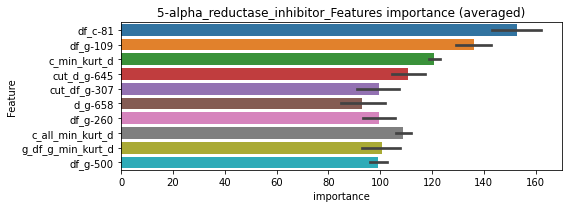

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000298962	valid_1's binary_logloss: 0.00118838
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000293701	valid_1's binary_logloss: 0.001176


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000301303	valid_1's binary_logloss: 0.00104425
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000294937	valid_1's binary_logloss: 0.00103117


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000301103	valid_1's binary_logloss: 0.00112791
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000292954	valid_1's binary_logloss: 0.00110463


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00029823	valid_1's binary_logloss: 0.0019816
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000292915	valid_1's binary_logloss: 0.00197448


5-alpha_reductase_inhibitor logloss: 0.0013215707510578294
11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000295372	valid_1's binary_logloss: 0.000831571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000289712	valid_1's binary_logloss: 0.00103864
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304841	valid_1's binary_logloss: 0.00218194
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013890, Threshold: 0.0040182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0040182, conf_0:0.00281, conf_1:0.00522
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0340182


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.000830726


threshold: 0.0340182, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.02721, conf_1:0.04082
threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.03062, conf_1:0.03742


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


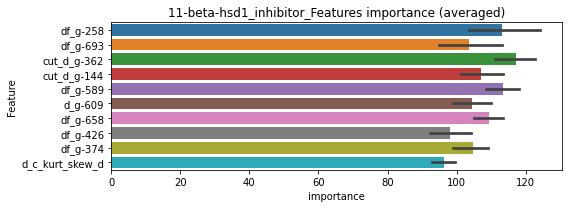

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315356	valid_1's binary_logloss: 0.000787529
Early stopping, best iteration is:
[1376]	training's binary_logloss: 0.000286904	valid_1's binary_logloss: 0.000739204


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000316526	valid_1's binary_logloss: 0.000954962
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.000289687	valid_1's binary_logloss: 0.000895336


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000316066	valid_1's binary_logloss: 0.00166113
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000320314	valid_1's binary_logloss: 0.00165756


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315116	valid_1's binary_logloss: 0.000724415
Early stopping, best iteration is:
[1319]	training's binary_logloss: 0.000290444	valid_1's binary_logloss: 0.000682792


11-beta-hsd1_inhibitor logloss: 0.0009938189180158168
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000336517	valid_1's binary_logloss: 0.00491599
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343889	valid_1's binary_logloss: 0.0039385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357722	valid_1's binary_logloss: 0.00231797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348473	valid_1's binary_logloss: 0.00688178


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018501, Threshold: 0.0046275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046275, conf_0:0.00324, conf_1:0.00602
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0346275
threshold: 0.0346275, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0346275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0346275, conf_0:0.02770, conf_1:0.04155
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0646275


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0646275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0646275, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


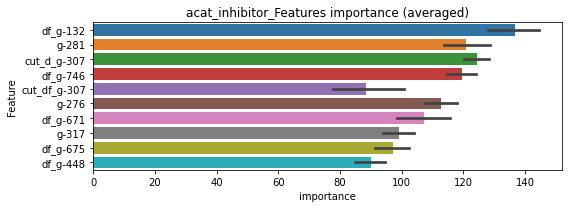

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000366884	valid_1's binary_logloss: 0.00395435
Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000338213	valid_1's binary_logloss: 0.00387902


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000370247	valid_1's binary_logloss: 0.00287802
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.00035635	valid_1's binary_logloss: 0.00283525


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000382564	valid_1's binary_logloss: 0.00259257


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367522	valid_1's binary_logloss: 0.00456493
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000353282	valid_1's binary_logloss: 0.00454307


acat_inhibitor logloss: 0.003462970474492328


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0636611	valid_1's binary_logloss: 0.121852
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.0514089	valid_1's binary_logloss: 0.119869
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0673245	valid_1's binary_logloss: 0.104287
Early stopping, best iteration is:
[1844]	training's binary_logloss: 0.0415571	valid_1's binary_logloss: 0.0975899
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0708412	valid_1's binary_logloss: 0.0881036
[2000]	training's binary_logloss: 0.040595	valid_1's binary_logloss: 0.0801222
Early stopping, best iteration is:
[2129]	training's binary_logloss: 0.0381548	valid_1's binary_logloss: 0.0796615
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0636621	valid_1's binary_logloss: 0.12437
Early stopping, b

1 / 3, AUC score:0.969, PR-AUC:0.942
y_Threshold: 0.0534183, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 508 → Positive_corect_labels: 1153/7167
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.05509, conf_1:0.10232
threshold: 0.0787052, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1153.0/7167, y_label_rate: 0.1608762
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336688	valid_1's binary_logloss: 0.0448707
[2000]	training's binary_logloss: 0.0184502	valid_1's binary_logloss: 0.0374146
[3000]	training's binary_logloss: 0.0121579	valid_1's binary_logloss: 0.0347227
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00995315	valid_1's binary_logloss: 0.0338983
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0326134	valid_1's binary_logloss: 0.0532724
[2000]	training's binary_logloss: 0.0178629	valid_1's binary_logloss: 0.0469951
Early stopping, best iteration is:
[2033]	training's binary_logloss: 0.0175673	valid_1's binary_logloss: 0.0468112
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343644	valid_1's binary_logloss: 0.0460634
[2000]	training's binary_logloss: 0.018926	valid_1's binary_logloss: 0.0383356
[3000]	training's binary_lo

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0436181, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1108.0/7077
p_label_rate: 0.0042692 Vs.target_rate: 0.00798
Num_p_label: 17.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.06296, conf_1:0.09445
threshold: 0.0787052, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1108.0/7077, y_label_rate: 0.1565635
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0192239	valid_1's binary_logloss: 0.0243498
[2000]	training's binary_logloss: 0.0102551	valid_1's binary_logloss: 0.0167146
[3000]	training's binary_logloss: 0.0069496	valid_1's binary_logloss: 0.0143473
[4000]	training's binary_logloss: 0.00520029	valid_1's binary_logloss: 0.0131145
[5000]	training's binary_logloss: 0.00414734	valid_1's binary_logloss: 0.0123315
[6000]	training's binary_logloss: 0.00342453	valid_1's binary_logloss: 0.0118488
Early stopping, best iteration is:
[6038]	training's binary_logloss: 0.00340292	valid_1's binary_logloss: 0.0118393
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0188466	valid_1's binary_logloss: 0.0249473
[2000]	training's binary_logloss: 0.0100533	valid_1's binary_logloss: 0.0176809
[3000]	training's binary_logloss: 0.00686707	valid_1's binary_logloss: 0.0154019
[4000]	training's binary_logloss: 0.00

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0456856, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 1095.0/7051
p_label_rate: 0.0070316 Vs.target_rate: 0.00798
Num_p_label: 28.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.07083, conf_1:0.08658
threshold: 0.0787052, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1095.0/7051, y_label_rate: 0.1552971


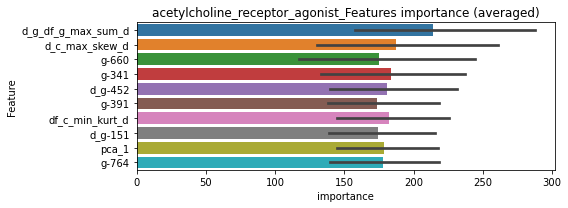

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0209005	valid_1's binary_logloss: 0.0263639
[2000]	training's binary_logloss: 0.0102791	valid_1's binary_logloss: 0.0150622
[3000]	training's binary_logloss: 0.00689699	valid_1's binary_logloss: 0.0114154
[4000]	training's binary_logloss: 0.00522066	valid_1's binary_logloss: 0.00965551
[5000]	training's binary_logloss: 0.00423241	valid_1's binary_logloss: 0.00861454
[6000]	training's binary_logloss: 0.00355966	valid_1's binary_logloss: 0.00787479
[7000]	training's binary_logloss: 0.00306678	valid_1's binary_logloss: 0.00737102
[8000]	training's binary_logloss: 0.00270889	valid_1's binary_logloss: 0.00696307
[9000]	training's binary_logloss: 0.00242295	valid_1's binary_logloss: 0.00665442
[10000]	training's binary_logloss: 0.00220044	valid_1's binary_logloss: 0.00643695
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00220044	valid_1's binary_logloss: 0.0

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0205606	valid_1's binary_logloss: 0.0257799
[2000]	training's binary_logloss: 0.0101326	valid_1's binary_logloss: 0.0147869
[3000]	training's binary_logloss: 0.00683586	valid_1's binary_logloss: 0.0112419
[4000]	training's binary_logloss: 0.0051741	valid_1's binary_logloss: 0.00948256
[5000]	training's binary_logloss: 0.00419319	valid_1's binary_logloss: 0.00847849
[6000]	training's binary_logloss: 0.00352808	valid_1's binary_logloss: 0.00777887
[7000]	training's binary_logloss: 0.00304027	valid_1's binary_logloss: 0.0072929
[8000]	training's binary_logloss: 0.00268416	valid_1's binary_logloss: 0.00688871
[9000]	training's binary_logloss: 0.0024041	valid_1's binary_logloss: 0.00657713
[10000]	training's binary_logloss: 0.00218202	valid_1's binary_logloss: 0.00636522
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00218202	valid_1's binary_logloss: 0.0063

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.021108	valid_1's binary_logloss: 0.0260182
[2000]	training's binary_logloss: 0.0104819	valid_1's binary_logloss: 0.0147559
[3000]	training's binary_logloss: 0.00703706	valid_1's binary_logloss: 0.0111197
[4000]	training's binary_logloss: 0.00532719	valid_1's binary_logloss: 0.00931923
[5000]	training's binary_logloss: 0.00432463	valid_1's binary_logloss: 0.00828709
[6000]	training's binary_logloss: 0.00364176	valid_1's binary_logloss: 0.00756241
[7000]	training's binary_logloss: 0.00314472	valid_1's binary_logloss: 0.00707523
[8000]	training's binary_logloss: 0.00277523	valid_1's binary_logloss: 0.00666772
[9000]	training's binary_logloss: 0.00248969	valid_1's binary_logloss: 0.00637269
[10000]	training's binary_logloss: 0.00226012	valid_1's binary_logloss: 0.00614819
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00226012	valid_1's binary_logloss: 0.00

len(train_index) : 5289
len(valid_index) : 1762
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0205358	valid_1's binary_logloss: 0.0252208
[2000]	training's binary_logloss: 0.0101842	valid_1's binary_logloss: 0.0140385
[3000]	training's binary_logloss: 0.00685777	valid_1's binary_logloss: 0.0103481
[4000]	training's binary_logloss: 0.00518362	valid_1's binary_logloss: 0.00853452
[5000]	training's binary_logloss: 0.00421075	valid_1's binary_logloss: 0.00751322
[6000]	training's binary_logloss: 0.00354393	valid_1's binary_logloss: 0.00675528
[7000]	training's binary_logloss: 0.00306316	valid_1's binary_logloss: 0.00626688
[8000]	training's binary_logloss: 0.00270453	valid_1's binary_logloss: 0.00587178
[9000]	training's binary_logloss: 0.00242112	valid_1's binary_logloss: 0.00556485
[10000]	training's binary_logloss: 0.0021972	valid_1's binary_logloss: 0.00536371
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0021972	valid_1's binary_logloss: 0.005

acetylcholine_receptor_agonist logloss: 0.006078619802325056


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0809694	valid_1's binary_logloss: 0.14089
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.0671024	valid_1's binary_logloss: 0.139185
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.082184	valid_1's binary_logloss: 0.137433
Early stopping, best iteration is:
[1323]	training's binary_logloss: 0.0672532	valid_1's binary_logloss: 0.135395
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.081168	valid_1's binary_logloss: 0.147139
Early stopping, best iteration is:
[1435]	training's binary_logloss: 0.0621669	valid_1's binary_logloss: 0.144226
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0815606	valid_1's binary_logloss: 0.13896
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0671539	valid_1's binary_loglos

1 / 3, AUC score:0.939, PR-AUC:0.901
y_Threshold: 0.0664436, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 748 → Positive_corect_labels: 1283/8292
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.06420, conf_1:0.11924
threshold: 0.0917206, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1283.0/8292, y_label_rate: 0.1547274
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0321329	valid_1's binary_logloss: 0.0637753
Early stopping, best iteration is:
[1724]	training's binary_logloss: 0.0203026	valid_1's binary_logloss: 0.0592471
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0338993	valid_1's binary_logloss: 0.0539537
[2000]	training's binary_logloss: 0.0184755	valid_1's binary_logloss: 0.0475398
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0156347	valid_1's binary_logloss: 0.0465963
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0356982	valid_1's binary_logloss: 0.0455294
[2000]	training's binary_logloss: 0.0194321	valid_1's binary_logloss: 0.0373244
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.013583	valid_1's binary_logloss: 0.0347757
Training until validation scores don't improve for 29 rounds
[1000]	train

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0356915, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1231.0/8188
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.07338, conf_1:0.11006
threshold: 0.0917206, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1231.0/8188, y_label_rate: 0.1503420
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0199126	valid_1's binary_logloss: 0.0292091
[2000]	training's binary_logloss: 0.0108114	valid_1's binary_logloss: 0.0225081
[3000]	training's binary_logloss: 0.00722254	valid_1's binary_logloss: 0.0202902
Early stopping, best iteration is:
[3567]	training's binary_logloss: 0.00602031	valid_1's binary_logloss: 0.0195841
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0191555	valid_1's binary_logloss: 0.0296742
[2000]	training's binary_logloss: 0.0104033	valid_1's binary_logloss: 0.0232819
[3000]	training's binary_logloss: 0.00691603	valid_1's binary_logloss: 0.0212745
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.00564739	valid_1's binary_logloss: 0.0206772
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0206695	valid_1's binary_logloss: 0.0262359
[2000]	training's binar

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0187694, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 1219.0/8164
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.08255, conf_1:0.10089
threshold: 0.0917206, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1219.0/8164, y_label_rate: 0.1493141


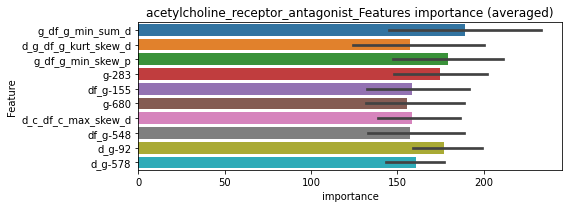

len(train_index) : 6123
len(valid_index) : 2041
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0221758	valid_1's binary_logloss: 0.0275126
[2000]	training's binary_logloss: 0.0117305	valid_1's binary_logloss: 0.0172379
[3000]	training's binary_logloss: 0.00816483	valid_1's binary_logloss: 0.0141348
[4000]	training's binary_logloss: 0.00626088	valid_1's binary_logloss: 0.012605
[5000]	training's binary_logloss: 0.00507515	valid_1's binary_logloss: 0.0117311
[6000]	training's binary_logloss: 0.00424103	valid_1's binary_logloss: 0.011136
[7000]	training's binary_logloss: 0.0036351	valid_1's binary_logloss: 0.0107484
[8000]	training's binary_logloss: 0.00318977	valid_1's binary_logloss: 0.0104384
[9000]	training's binary_logloss: 0.00283473	valid_1's binary_logloss: 0.010207
Early stopping, best iteration is:
[9550]	training's binary_logloss: 0.00266859	valid_1's binary_logloss: 0.0101085


len(train_index) : 6123
len(valid_index) : 2041
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0217459	valid_1's binary_logloss: 0.0307191
[2000]	training's binary_logloss: 0.0114836	valid_1's binary_logloss: 0.0206649
[3000]	training's binary_logloss: 0.00800199	valid_1's binary_logloss: 0.0176081
[4000]	training's binary_logloss: 0.00610135	valid_1's binary_logloss: 0.0162217
[5000]	training's binary_logloss: 0.00494212	valid_1's binary_logloss: 0.015448
Early stopping, best iteration is:
[5629]	training's binary_logloss: 0.00438102	valid_1's binary_logloss: 0.0150372


len(train_index) : 6123
len(valid_index) : 2041
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0224618	valid_1's binary_logloss: 0.0275086
[2000]	training's binary_logloss: 0.012064	valid_1's binary_logloss: 0.0175235
[3000]	training's binary_logloss: 0.00837815	valid_1's binary_logloss: 0.0144121
[4000]	training's binary_logloss: 0.00638087	valid_1's binary_logloss: 0.0129504
[5000]	training's binary_logloss: 0.00514295	valid_1's binary_logloss: 0.0120997
[6000]	training's binary_logloss: 0.0042805	valid_1's binary_logloss: 0.0114928
[7000]	training's binary_logloss: 0.00366086	valid_1's binary_logloss: 0.0110843
[8000]	training's binary_logloss: 0.00320102	valid_1's binary_logloss: 0.0107681
Early stopping, best iteration is:
[8921]	training's binary_logloss: 0.00286896	valid_1's binary_logloss: 0.0105373


len(train_index) : 6123
len(valid_index) : 2041
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0225763	valid_1's binary_logloss: 0.0282088
[2000]	training's binary_logloss: 0.012139	valid_1's binary_logloss: 0.0177384
[3000]	training's binary_logloss: 0.00843508	valid_1's binary_logloss: 0.014539
[4000]	training's binary_logloss: 0.00643279	valid_1's binary_logloss: 0.0129601
[5000]	training's binary_logloss: 0.00517617	valid_1's binary_logloss: 0.0119882
[6000]	training's binary_logloss: 0.00430643	valid_1's binary_logloss: 0.0113164
[7000]	training's binary_logloss: 0.00368308	valid_1's binary_logloss: 0.01081
Early stopping, best iteration is:
[7437]	training's binary_logloss: 0.00346791	valid_1's binary_logloss: 0.0106354


acetylcholine_receptor_antagonist logloss: 0.011579724291695225
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000685024	valid_1's binary_logloss: 0.0325866
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000671906	valid_1's binary_logloss: 0.0281289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000898113	valid_1's binary_logloss: 0.0176292
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000732003	valid_1's binary_logloss: 0.0236906


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0081002, Threshold: 0.0223018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0223018, conf_0:0.01561, conf_1:0.02899
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0523018
threshold: 0.0523018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00062549	valid_1's binary_logloss: 0.0339438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000685437	valid_1's binary_logloss: 0.0218289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000648642	valid_1's binary_logloss: 0.0195687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000633588	valid_1's binary_logloss: 0.0118497


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0422440, Threshold: 0.0523018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0115520 Vs.target_rate: 0.00307
Num_p_label: 46.0, Expected: 12.2, Threshold: 0.0523018, conf_0:0.04184, conf_1:0.06276
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.0823018
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.1123018
threshold: 0.1123018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000603334	valid_1's binary_logloss: 0.0264773
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000811472	valid_1's binary_logloss: 0.034059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000785764	valid_1's binary_logloss: 0.0201517
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000690087	valid_1's binary_logloss: 0.0212579


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0421190, Threshold: 0.1123018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, Expected: 12.2, Threshold: 0.1123018, conf_0:0.10107, conf_1:0.12353
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.1423018
threshold: 0.1423018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


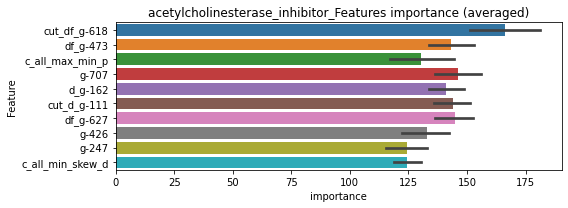

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000767338	valid_1's binary_logloss: 0.0253347
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000705466	valid_1's binary_logloss: 0.0250805


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00103751	valid_1's binary_logloss: 0.0359418


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00104988	valid_1's binary_logloss: 0.0125791


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000782403	valid_1's binary_logloss: 0.0242972
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000782403	valid_1's binary_logloss: 0.0242972


acetylcholinesterase_inhibitor logloss: 0.02447478853646549
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00054574	valid_1's binary_logloss: 0.0138032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000531352	valid_1's binary_logloss: 0.0177357
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000560756	valid_1's binary_logloss: 0.00634743
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00050505	valid_1's binary_logloss: 0.0095383


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040146, Threshold: 0.0164993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164993, conf_0:0.01155, conf_1:0.02145
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0464993
threshold: 0.0464993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.03720, conf_1:0.05580
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.04185, conf_1:0.05115
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


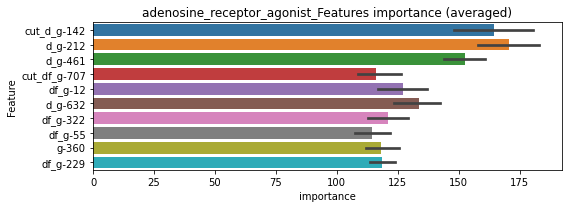

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000587783	valid_1's binary_logloss: 0.0100547
Early stopping, best iteration is:
[1276]	training's binary_logloss: 0.00050232	valid_1's binary_logloss: 0.00970339


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000636935	valid_1's binary_logloss: 0.015161


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000599428	valid_1's binary_logloss: 0.00499291
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000514859	valid_1's binary_logloss: 0.00476145


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000633089	valid_1's binary_logloss: 0.00935124


adenosine_receptor_agonist logloss: 0.009745693687158519
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0987489	valid_1's binary_logloss: 0.154011
[2000]	training's binary_logloss: 0.0549634	valid_1's binary_logloss: 0.117563
[3000]	training's binary_logloss: 0.0374999	valid_1's binary_logloss: 0.103882
Early stopping, best iteration is:
[3476]	training's binary_logloss: 0.032403	valid_1's binary_logloss: 0.100799
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.102467	valid_1's binary_logloss: 0.145878
[2000]	training's binary_logloss: 0.0573761	valid_1's binary_logloss: 0.103787
[3000]	training's binary_logloss: 0.0391925	valid_1's binary_logloss: 0.0868235
[4000]	training's binary_logloss: 0.0292699	valid_1's binary_logloss: 0.0778623
[5000]	training's binary_logloss: 0.0233253	valid_1's binary_logloss: 0.0723406
[6000]	training's binary_logloss: 0.0192646	valid_1's binary_logloss: 0.0685899
Early stopping, best iteration is:
[6930]	training'

1 / 3, AUC score:0.991, PR-AUC:0.979
y_Threshold: 0.0727799, Threshold: 0.1544365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 183 → Positive_corect_labels: 628/3742
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1544365, conf_0:0.10811, conf_1:0.20077
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_1: 0.1844365
threshold: 0.1844365, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.089684	valid_1's binary_logloss: 0.128469
[2000]	training's binary_logloss: 0.0475365	valid_1's binary_logloss: 0.0865833
[3000]	training's binary_logloss: 0.032005	valid_1's binary_logloss: 0.0710706
[4000]	training's binary_logloss: 0.0239573	valid_1's binary_logloss: 0.06332
[5000]	training's binary_logloss: 0.0191062	valid_1's binary_logloss: 0.0585704
[6000]	training's binary_logloss: 0.0158477	valid_1's binary_logloss: 0.0551986
Early stopping, best iteration is:
[6593]	training's binary_logloss: 0.0144019	valid_1's binary_logloss: 0.0536857
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0893265	valid_1's binary_logloss: 0.142098
[2000]	training's binary_logloss: 0.047859	valid_1's binary_logloss: 0.0989364
[3000]	training's binary_logloss: 0.0322412	valid_1's binary_logloss: 0.0817098
[4000]	training's binary_logloss: 0.0240987	valid_

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0992835, Threshold: 0.1844365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0143144 Vs.target_rate: 0.00403
Num_p_label: 57.0, Expected: 16.1, Threshold: 0.1844365, conf_0:0.14755, conf_1:0.22132
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.2144365
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_2: 0.2444365
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_3: 0.2744365
threshold: 0.2744365, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 613.0/3712, y_label_rate: 0.1651401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0862563	valid_1's binary_logloss: 0.122732
[2000]	training's binary_logloss: 0.0448349	valid_1's binary_logloss: 0.0803762
[3000]	training's binary_logloss: 0.0298474	valid_1's binary_logloss: 0.0647088
[4000]	training's binary_logloss: 0.0223012	valid_1's binary_logloss: 0.0567098
[5000]	training's binary_logloss: 0.0177427	valid_1's binary_logloss: 0.0518105
[6000]	training's binary_logloss: 0.0147251	valid_1's binary_logloss: 0.0483322
Early stopping, best iteration is:
[6488]	training's binary_logloss: 0.0136076	valid_1's binary_logloss: 0.0470551
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0840739	valid_1's binary_logloss: 0.126059
[2000]	training's binary_logloss: 0.0438874	valid_1's binary_logloss: 0.0854953
[3000]	training's binary_logloss: 0.029364	valid_1's binary_logloss: 0.0710846
[4000]	training's binary_logloss: 0.0219829	va

3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0972104, Threshold: 0.2744365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0123054 Vs.target_rate: 0.00403
Num_p_label: 49.0, Expected: 16.1, Threshold: 0.2744365, conf_0:0.24699, conf_1:0.30188
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_1: 0.3044365
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_2: 0.3344365
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_3: 0.3644365
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_4: 0.3944365
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_5: 0.4244365
threshold: 0.4244365, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 610.0/3706, y_label_rate: 0.1645979


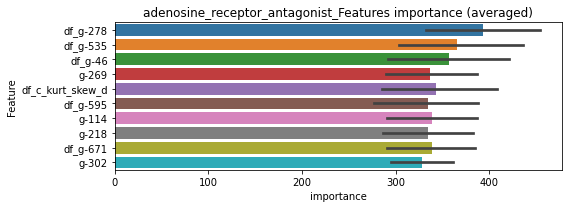

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.109763	valid_1's binary_logloss: 0.143349
[2000]	training's binary_logloss: 0.0603202	valid_1's binary_logloss: 0.0953812
[3000]	training's binary_logloss: 0.0414329	valid_1's binary_logloss: 0.0773042
[4000]	training's binary_logloss: 0.031461	valid_1's binary_logloss: 0.0674652
[5000]	training's binary_logloss: 0.0253671	valid_1's binary_logloss: 0.0613033
[6000]	training's binary_logloss: 0.0211517	valid_1's binary_logloss: 0.0574211
Early stopping, best iteration is:
[6290]	training's binary_logloss: 0.0201498	valid_1's binary_logloss: 0.0563268


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.106534	valid_1's binary_logloss: 0.156761
[2000]	training's binary_logloss: 0.0577337	valid_1's binary_logloss: 0.110488
[3000]	training's binary_logloss: 0.0392756	valid_1's binary_logloss: 0.0918075
[4000]	training's binary_logloss: 0.0297443	valid_1's binary_logloss: 0.0824395
[5000]	training's binary_logloss: 0.0239905	valid_1's binary_logloss: 0.0769066
Early stopping, best iteration is:
[5741]	training's binary_logloss: 0.0209312	valid_1's binary_logloss: 0.073456


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.109104	valid_1's binary_logloss: 0.14703
[2000]	training's binary_logloss: 0.0604178	valid_1's binary_logloss: 0.0989428
[3000]	training's binary_logloss: 0.0411895	valid_1's binary_logloss: 0.0792245
[4000]	training's binary_logloss: 0.0312383	valid_1's binary_logloss: 0.0686839
[5000]	training's binary_logloss: 0.0252408	valid_1's binary_logloss: 0.0621983
[6000]	training's binary_logloss: 0.021121	valid_1's binary_logloss: 0.057754
[7000]	training's binary_logloss: 0.0181093	valid_1's binary_logloss: 0.0544118
[8000]	training's binary_logloss: 0.0159022	valid_1's binary_logloss: 0.0520744
Early stopping, best iteration is:
[8854]	training's binary_logloss: 0.0143684	valid_1's binary_logloss: 0.0502847


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.112852	valid_1's binary_logloss: 0.135315
[2000]	training's binary_logloss: 0.0626491	valid_1's binary_logloss: 0.0830642
[3000]	training's binary_logloss: 0.0430464	valid_1's binary_logloss: 0.0618432
[4000]	training's binary_logloss: 0.0326599	valid_1's binary_logloss: 0.0510396
[5000]	training's binary_logloss: 0.0263636	valid_1's binary_logloss: 0.0443672
[6000]	training's binary_logloss: 0.022017	valid_1's binary_logloss: 0.0397546
[7000]	training's binary_logloss: 0.0188897	valid_1's binary_logloss: 0.0362985
[8000]	training's binary_logloss: 0.0165607	valid_1's binary_logloss: 0.033708
[9000]	training's binary_logloss: 0.0147214	valid_1's binary_logloss: 0.0316385
[10000]	training's binary_logloss: 0.013254	valid_1's binary_logloss: 0.0299755
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.013254	valid_1's binary_logloss: 0.0299755


adenosine_receptor_antagonist logloss: 0.05251741800027811
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000301577	valid_1's binary_logloss: 0.000690301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309077	valid_1's binary_logloss: 0.00177447
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000303345	valid_1's binary_logloss: 0.000805331
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014777, Threshold: 0.0079393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0079393, conf_0:0.00556, conf_1:0.01032
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0379393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0679393


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000301737	valid_1's binary_logloss: 0.00218482


threshold: 0.0679393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.0679393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.0679393, conf_0:0.05435, conf_1:0.08153
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0979393
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1279393
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1579393
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.1879393


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2179393
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2479393
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2779393
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3079393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.3379393
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.3379393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.3379393, conf_0:0.30415, conf_1:0.37173
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


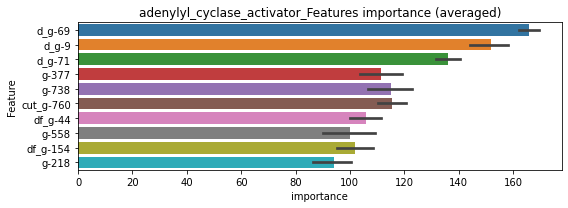

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00031237	valid_1's binary_logloss: 0.000611099
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.000285171	valid_1's binary_logloss: 0.000566784


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000310578	valid_1's binary_logloss: 0.000994004
Early stopping, best iteration is:
[1392]	training's binary_logloss: 0.000282359	valid_1's binary_logloss: 0.000935179


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314326	valid_1's binary_logloss: 0.000669905
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000289896	valid_1's binary_logloss: 0.000627202


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000311981	valid_1's binary_logloss: 0.00133556
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.000291878	valid_1's binary_logloss: 0.00128447


adenylyl_cyclase_activator logloss: 0.0008534208132841804


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0820732	valid_1's binary_logloss: 0.134317
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0519133	valid_1's binary_logloss: 0.12813
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0811906	valid_1's binary_logloss: 0.135966
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.0754536	valid_1's binary_logloss: 0.134708
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0789807	valid_1's binary_logloss: 0.14423
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.0695015	valid_1's binary_logloss: 0.142326
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0798269	valid_1's binary_logloss: 0.140075
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0565987	valid_1's binary_logl

1 / 3, AUC score:0.946, PR-AUC:0.909
y_Threshold: 0.0663713, Threshold: 0.0898649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 665 → Positive_corect_labels: 1197/7678
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0898649, conf_0:0.06291, conf_1:0.11682
threshold: 0.0898649, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1197.0/7678, y_label_rate: 0.1559000
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357468	valid_1's binary_logloss: 0.060193
[2000]	training's binary_logloss: 0.0197748	valid_1's binary_logloss: 0.0532376
Early stopping, best iteration is:
[2112]	training's binary_logloss: 0.0187475	valid_1's binary_logloss: 0.0528765
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0367267	valid_1's binary_logloss: 0.0595669
[2000]	training's binary_logloss: 0.020485	valid_1's binary_logloss: 0.0514139
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.019488	valid_1's binary_logloss: 0.0510788
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357799	valid_1's binary_logloss: 0.0598479
[2000]	training's binary_logloss: 0.0198525	valid_1's binary_logloss: 0.0531045
Early stopping, best iteration is:
[2783]	training's binary_logloss: 0.0142398	valid_1's binary_logloss: 0.051

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0558418, Threshold: 0.0898649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1141.0/7566
p_label_rate: 0.0097941 Vs.target_rate: 0.01134
Num_p_label: 39.0, Expected: 45.1, Threshold: 0.0898649, conf_0:0.07189, conf_1:0.10784
threshold: 0.0898649, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1141.0/7566, y_label_rate: 0.1508062
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0192509	valid_1's binary_logloss: 0.0274114
[2000]	training's binary_logloss: 0.0101547	valid_1's binary_logloss: 0.0187011
[3000]	training's binary_logloss: 0.00694775	valid_1's binary_logloss: 0.0159051
[4000]	training's binary_logloss: 0.00526602	valid_1's binary_logloss: 0.0145112
[5000]	training's binary_logloss: 0.00425131	valid_1's binary_logloss: 0.0137169
Early stopping, best iteration is:
[5672]	training's binary_logloss: 0.00376253	valid_1's binary_logloss: 0.0133144
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0194301	valid_1's binary_logloss: 0.0263721
[2000]	training's binary_logloss: 0.0102573	valid_1's binary_logloss: 0.0182611
[3000]	training's binary_logloss: 0.00698986	valid_1's binary_logloss: 0.0157237
[4000]	training's binary_logloss: 0.00530762	valid_1's binary_logloss: 0.0145157
[5000]	training's binary_logloss: 0.0

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0818272, Threshold: 0.0898649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 1130.0/7544
p_label_rate: 0.0160723 Vs.target_rate: 0.01134
Num_p_label: 64.0, Expected: 45.1, Threshold: 0.0898649, conf_0:0.08088, conf_1:0.09885
threshold: 0.0898649, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 1130.0/7544, y_label_rate: 0.1497879


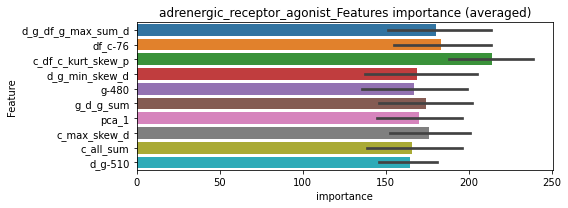

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241744	valid_1's binary_logloss: 0.0284184
[2000]	training's binary_logloss: 0.011974	valid_1's binary_logloss: 0.0151997
[3000]	training's binary_logloss: 0.00811078	valid_1's binary_logloss: 0.0110755
[4000]	training's binary_logloss: 0.00615785	valid_1's binary_logloss: 0.00892301
[5000]	training's binary_logloss: 0.00500411	valid_1's binary_logloss: 0.00764591
[6000]	training's binary_logloss: 0.00420885	valid_1's binary_logloss: 0.00677055
[7000]	training's binary_logloss: 0.00363848	valid_1's binary_logloss: 0.0061246
[8000]	training's binary_logloss: 0.00320845	valid_1's binary_logloss: 0.00562211
[9000]	training's binary_logloss: 0.00287146	valid_1's binary_logloss: 0.00523785
[10000]	training's binary_logloss: 0.0026115	valid_1's binary_logloss: 0.0049283
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0026115	valid_1's binary_logloss: 0.004928

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235857	valid_1's binary_logloss: 0.0320855
[2000]	training's binary_logloss: 0.0116667	valid_1's binary_logloss: 0.0193098
[3000]	training's binary_logloss: 0.00794539	valid_1's binary_logloss: 0.0153129
[4000]	training's binary_logloss: 0.00601852	valid_1's binary_logloss: 0.0133133
[5000]	training's binary_logloss: 0.00487928	valid_1's binary_logloss: 0.0121846
[6000]	training's binary_logloss: 0.00410129	valid_1's binary_logloss: 0.0114179
[7000]	training's binary_logloss: 0.0035433	valid_1's binary_logloss: 0.0108982
[8000]	training's binary_logloss: 0.00312465	valid_1's binary_logloss: 0.0104757
[9000]	training's binary_logloss: 0.00280131	valid_1's binary_logloss: 0.0101843
Early stopping, best iteration is:
[9378]	training's binary_logloss: 0.002699	valid_1's binary_logloss: 0.0100935


len(train_index) : 5658
len(valid_index) : 1886
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0240086	valid_1's binary_logloss: 0.0302702
[2000]	training's binary_logloss: 0.0118355	valid_1's binary_logloss: 0.0168918
[3000]	training's binary_logloss: 0.00803097	valid_1's binary_logloss: 0.0127167
[4000]	training's binary_logloss: 0.00606558	valid_1's binary_logloss: 0.0105356
[5000]	training's binary_logloss: 0.00491353	valid_1's binary_logloss: 0.00932035
[6000]	training's binary_logloss: 0.00413914	valid_1's binary_logloss: 0.00839219
[7000]	training's binary_logloss: 0.00357827	valid_1's binary_logloss: 0.00778786
[8000]	training's binary_logloss: 0.0031555	valid_1's binary_logloss: 0.00730006
[9000]	training's binary_logloss: 0.00282255	valid_1's binary_logloss: 0.00690292
[10000]	training's binary_logloss: 0.00256257	valid_1's binary_logloss: 0.00663965
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00256257	valid_1's binary_logloss: 0.006

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.023606	valid_1's binary_logloss: 0.0307883
[2000]	training's binary_logloss: 0.011724	valid_1's binary_logloss: 0.0179365
[3000]	training's binary_logloss: 0.00796975	valid_1's binary_logloss: 0.0139042
[4000]	training's binary_logloss: 0.00604185	valid_1's binary_logloss: 0.0119042
[5000]	training's binary_logloss: 0.00489709	valid_1's binary_logloss: 0.0107996
[6000]	training's binary_logloss: 0.00412451	valid_1's binary_logloss: 0.00998353
[7000]	training's binary_logloss: 0.00356025	valid_1's binary_logloss: 0.0094576
[8000]	training's binary_logloss: 0.00313099	valid_1's binary_logloss: 0.0090388
[9000]	training's binary_logloss: 0.00280304	valid_1's binary_logloss: 0.00870638
[10000]	training's binary_logloss: 0.00254511	valid_1's binary_logloss: 0.00848301
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00254511	valid_1's binary_logloss: 0.0084830

adrenergic_receptor_agonist logloss: 0.007536115981716338


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.027659	valid_1's binary_logloss: 0.153976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0431136	valid_1's binary_logloss: 0.188592
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0276567	valid_1's binary_logloss: 0.159042
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.939, PR-AUC:0.895
y_Threshold: 0.0531932, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 660 → Positive_corect_labels: 1128/7293
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.06565, conf_1:0.12191


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0369145	valid_1's binary_logloss: 0.165856


threshold: 0.0937789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1128.0/7293, y_label_rate: 0.1546689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00792264	valid_1's binary_logloss: 0.0761351
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0113764	valid_1's binary_logloss: 0.0995736
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00817211	valid_1's binary_logloss: 0.077493
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:0.991, PR-AUC:0.974
y_Threshold: 0.0481532, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1037.0/7111
p_label_rate: 0.0215972 Vs.target_rate: 0.01512
Num_p_label: 86.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.07502, conf_1:0.11253


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00882429	valid_1's binary_logloss: 0.0792224


threshold: 0.0937789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1037.0/7111, y_label_rate: 0.1458304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00347138	valid_1's binary_logloss: 0.0374791
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0271869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.002524	valid_1's binary_logloss: 0.0468697
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00131374	valid_1's binary_logloss: 0.0207719


y_Threshold: 0.0481822, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1003.0/7043
p_label_rate: 0.0298845 Vs.target_rate: 0.01512
Num_p_label: 119.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.08440, conf_1:0.10316
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1237789
Num_p_label: 91.0, Expected: 60.2, Adj_threshold_2: 0.1537789
Num_p_label: 86.0, Expected: 60.2, Adj_threshold_3: 0.1837789
threshold: 0.1837789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1003.0/7043, y_label_rate: 0.1424109


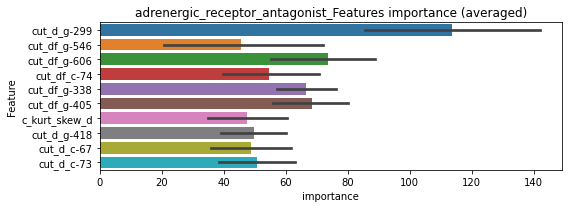

len(train_index) : 5282
len(valid_index) : 1761
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 5282


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00086673	valid_1's binary_logloss: 0.0127231


len(valid_index) : 1761
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000391645	valid_1's binary_logloss: 0.00627395
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000362787	valid_1's binary_logloss: 0.00619667


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 5283
len(valid_index) : 1760
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00123898	valid_1's binary_logloss: 0.0197335
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000874465	valid_1's binary_logloss: 0.0134163


adrenergic_receptor_antagonist logloss: 0.013017324696529137
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000573662	valid_1's binary_logloss: 0.0158949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000581931	valid_1's binary_logloss: 0.0188952
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000712187	valid_1's binary_logloss: 0.0178871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000612878	valid_1's binary_logloss: 0.0234772


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056892, Threshold: 0.0225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0225907, conf_0:0.01581, conf_1:0.02937
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.0525907
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0825907
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1125907
threshold: 0.1125907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.0121476
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000741333	valid_1's binary_logloss: 0.0186045
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000742394	valid_1's binary_logloss: 0.0148287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000615205	valid_1's binary_logloss: 0.0181063


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341104, Threshold: 0.1125907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1125907, conf_0:0.09007, conf_1:0.13511
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1425907
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1725907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2025907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.2325907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2625907
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.2925907
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3225907
threshold: 0.3225907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000548047	valid_1's binary_logloss: 0.00930094
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000582709	valid_1's binary_logloss: 0.0144841
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000583943	valid_1's binary_logloss: 0.00757063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000558079	valid_1's binary_logloss: 0.0264481


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290341, Threshold: 0.3225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3225907, conf_0:0.29033, conf_1:0.35485
threshold: 0.3225907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


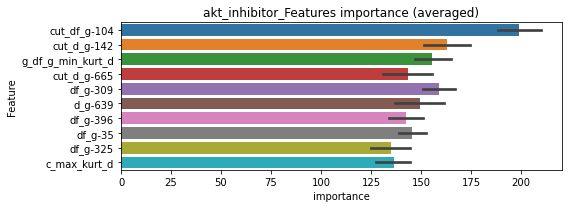

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000704936	valid_1's binary_logloss: 0.00902388
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000594033	valid_1's binary_logloss: 0.00854971


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000701577	valid_1's binary_logloss: 0.0235418
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000686731	valid_1's binary_logloss: 0.0234718


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000720239	valid_1's binary_logloss: 0.00667788
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.000572051	valid_1's binary_logloss: 0.00616954


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000786996	valid_1's binary_logloss: 0.0213285


akt_inhibitor logloss: 0.014879342961955548
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030128	valid_1's binary_logloss: 0.00110657
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297411	valid_1's binary_logloss: 0.00198953
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000300869	valid_1's binary_logloss: 0.000669514
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015422, Threshold: 0.0064593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0064593, conf_0:0.00452, conf_1:0.00840
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0364593
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0664593


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000300546	valid_1's binary_logloss: 0.000849411


threshold: 0.0664593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0664593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, Expected: 3.2, Threshold: 0.0664593, conf_0:0.05317, conf_1:0.07975
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0964593


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0964593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, Expected: 3.2, Threshold: 0.0964593, conf_0:0.08681, conf_1:0.10611
threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


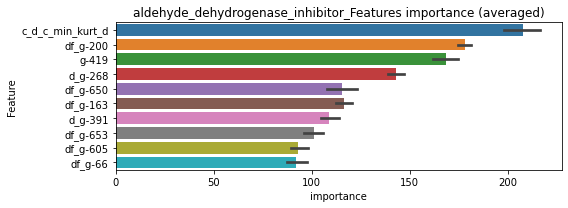

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000324502	valid_1's binary_logloss: 0.00117093
Early stopping, best iteration is:
[1303]	training's binary_logloss: 0.000294322	valid_1's binary_logloss: 0.00113145


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000326539	valid_1's binary_logloss: 0.00167558
Early stopping, best iteration is:
[1460]	training's binary_logloss: 0.000287572	valid_1's binary_logloss: 0.00157805


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000326714	valid_1's binary_logloss: 0.000603085
Early stopping, best iteration is:
[1430]	training's binary_logloss: 0.000291503	valid_1's binary_logloss: 0.000545351


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000324273	valid_1's binary_logloss: 0.000755464
Early stopping, best iteration is:
[1358]	training's binary_logloss: 0.000292091	valid_1's binary_logloss: 0.00070058


aldehyde_dehydrogenase_inhibitor logloss: 0.0009889312455532882
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000486189	valid_1's binary_logloss: 0.0120713
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000457894	valid_1's binary_logloss: 0.0117198
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000489002	valid_1's binary_logloss: 0.00368998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000505768	valid_1's binary_logloss: 0.00754023


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036046, Threshold: 0.0156094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0156094, conf_0:0.01093, conf_1:0.02029
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.0456094
threshold: 0.0456094, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000484016	valid_1's binary_logloss: 0.0112284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000464298	valid_1's binary_logloss: 0.0112455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000486353	valid_1's binary_logloss: 0.00284733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000459446	valid_1's binary_logloss: 0.005876


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242813, Threshold: 0.0456094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0456094, conf_0:0.03649, conf_1:0.05473
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.0756094
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1056094
threshold: 0.1056094, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00046215	valid_1's binary_logloss: 0.0117586
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000566243	valid_1's binary_logloss: 0.0175228
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.00446852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000468824	valid_1's binary_logloss: 0.00965026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130050, Threshold: 0.1056094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.1056094, conf_0:0.09505, conf_1:0.11617
threshold: 0.1056094, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


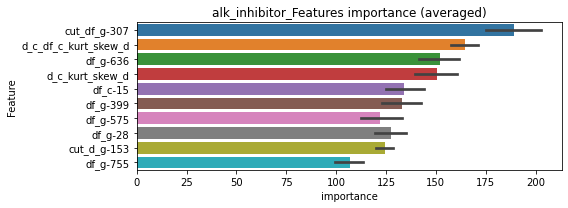

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000526892	valid_1's binary_logloss: 0.0118966
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000526892	valid_1's binary_logloss: 0.0118966


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000528697	valid_1's binary_logloss: 0.00493911
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000497849	valid_1's binary_logloss: 0.00482541


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000535816	valid_1's binary_logloss: 0.00537218
Early stopping, best iteration is:
[1281]	training's binary_logloss: 0.000469416	valid_1's binary_logloss: 0.00521055


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00053026	valid_1's binary_logloss: 0.00602785
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000492582	valid_1's binary_logloss: 0.00586771


alk_inhibitor logloss: 0.0069510618743686475
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000237565	valid_1's binary_logloss: 0.00179472
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238117	valid_1's binary_logloss: 0.00194385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000238308	valid_1's binary_logloss: 0.000402555
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008890, Threshold: 0.0038962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0038962, conf_0:0.00273, conf_1:0.00507
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0338962
threshold: 0.0338962, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.000929652


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.0338962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, Expected: 2.0, Threshold: 0.0338962, conf_0:0.02712, conf_1:0.04068
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0638962
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0938962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1238962


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.1238962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1238962, conf_0:0.11151, conf_1:0.13629
threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


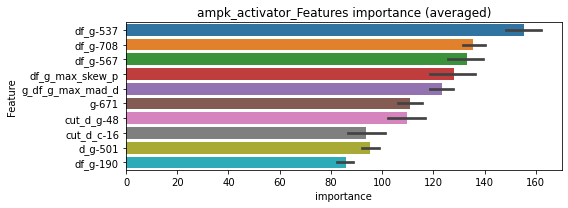

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000238913	valid_1's binary_logloss: 0.000861792
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000224143	valid_1's binary_logloss: 0.000831301


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000236019	valid_1's binary_logloss: 0.00269755
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000229169	valid_1's binary_logloss: 0.00268324


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000238613	valid_1's binary_logloss: 0.000324235
Early stopping, best iteration is:
[1190]	training's binary_logloss: 0.000225996	valid_1's binary_logloss: 0.000308177


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000237573	valid_1's binary_logloss: 0.000693741
Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.000228127	valid_1's binary_logloss: 0.000679681


ampk_activator logloss: 0.0011255997813114749
analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000250037	valid_1's binary_logloss: 0.000811305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000246072	valid_1's binary_logloss: 0.000523355
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000256743	valid_1's binary_logloss: 0.00033698
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011113, Threshold: 0.0170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0170543, conf_0:0.01194, conf_1:0.02217
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0470543
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0770543
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1070543


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00025024	valid_1's binary_logloss: 0.000509345


Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1370543
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1670543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1970543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2270543
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2570543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2870543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.3170543
threshold: 0.3170543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.3170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, Expected: 2.0, Threshold: 0.3170543, conf_0:0.25364, conf_1:0.38047
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.3470543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.3770543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4070543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4370543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4670543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4970543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5270543


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5570543
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.5570543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5570543, conf_0:0.50135, conf_1:0.61276
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


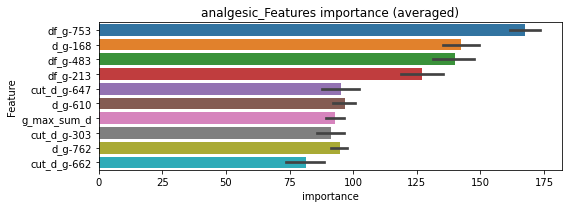

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000251158	valid_1's binary_logloss: 0.000369127
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.000238752	valid_1's binary_logloss: 0.000352373


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000253055	valid_1's binary_logloss: 0.000373196
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.000243167	valid_1's binary_logloss: 0.000360149


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00025047	valid_1's binary_logloss: 0.000365063
Early stopping, best iteration is:
[1138]	training's binary_logloss: 0.000241003	valid_1's binary_logloss: 0.00035311


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000254142	valid_1's binary_logloss: 0.000384415
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.000244248	valid_1's binary_logloss: 0.00037079


analgesic logloss: 0.00035910364434016997
androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000500579	valid_1's binary_logloss: 0.0157394
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526369	valid_1's binary_logloss: 0.0136869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00170681
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0040677, Threshold: 0.0092444, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000685124	valid_1's binary_logloss: 0.0181441


Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0092444, conf_0:0.00647, conf_1:0.01202
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0392444
threshold: 0.0392444, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03140, conf_1:0.04709
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03532, conf_1:0.04317
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


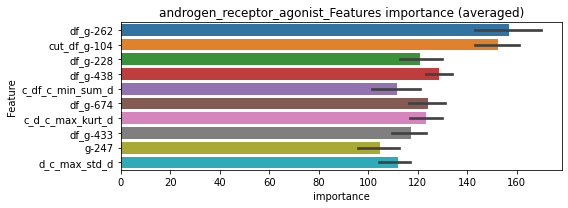

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000652965	valid_1's binary_logloss: 0.0151429


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000587748	valid_1's binary_logloss: 0.00734394
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.000501024	valid_1's binary_logloss: 0.00700948


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000595812	valid_1's binary_logloss: 0.00757861
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000548483	valid_1's binary_logloss: 0.00741564


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


androgen_receptor_agonist logloss: 0.012407126162376785


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00101371	valid_1's binary_logloss: 0.0200635


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00108392	valid_1's binary_logloss: 0.0533942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00109866	valid_1's binary_logloss: 0.0403294
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.0010541	valid_1's binary_logloss: 0.0270576
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000687266	valid_1's binary_logloss: 0.0331268


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0085820, Threshold: 0.0330483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0330483, conf_0:0.02313, conf_1:0.04296
Num_p_label: 11.0, Expected: 14.9, Adj_threshold_1: 0.0630483
threshold: 0.0630483, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00120772	valid_1's binary_logloss: 0.0506104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000723568	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000748183	valid_1's binary_logloss: 0.0365973
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00068483	valid_1's binary_logloss: 0.0207164


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0258344, Threshold: 0.0630483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0630483, conf_0:0.05044, conf_1:0.07566
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.0930483
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_2: 0.1230483
threshold: 0.1230483, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000694565	valid_1's binary_logloss: 0.0382965
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000755064	valid_1's binary_logloss: 0.0380708
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000701315	valid_1's binary_logloss: 0.0253419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000648289	valid_1's binary_logloss: 0.026751


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316004, Threshold: 0.1230483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00374
Num_p_label: 15.0, Expected: 14.9, Threshold: 0.1230483, conf_0:0.11074, conf_1:0.13535
threshold: 0.1230483, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 639.0/3766, y_label_rate: 0.1696760


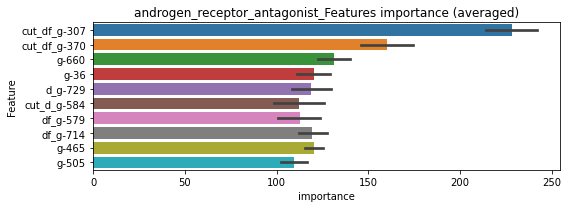

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00131168	valid_1's binary_logloss: 0.0387928


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00085246	valid_1's binary_logloss: 0.0286997
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000788103	valid_1's binary_logloss: 0.0283693


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000867836	valid_1's binary_logloss: 0.0161604
Early stopping, best iteration is:
[1416]	training's binary_logloss: 0.000672618	valid_1's binary_logloss: 0.0153803


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00140833	valid_1's binary_logloss: 0.0292774


androgen_receptor_antagonist logloss: 0.027957939971390282
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000805734	valid_1's binary_logloss: 0.0373528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000887396	valid_1's binary_logloss: 0.0388489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00065641	valid_1's binary_logloss: 0.0227294
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.997, PR-AUC:0.996
y_Threshold: 0.0075782, Threshold: 0.0140226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3788


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00126851	valid_1's binary_logloss: 0.0398361


p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0140226, conf_0:0.00982, conf_1:0.01823
Num_p_label: 3.0, Expected: 13.4, Adj_threshold_1: 0.0440226
threshold: 0.0440226, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3788, y_label_rate: 0.1718585
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000640697	valid_1's binary_logloss: 0.0262237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00065665	valid_1's binary_logloss: 0.0355458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000632052	valid_1's binary_logloss: 0.0199917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000605418	valid_1's binary_logloss: 0.0180682


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0263874, Threshold: 0.0440226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3786
p_label_rate: 0.0025113 Vs.target_rate: 0.00336
Num_p_label: 10.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03522, conf_1:0.05283
threshold: 0.0440226, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3786, y_label_rate: 0.1716852
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000825513	valid_1's binary_logloss: 0.0323522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000599036	valid_1's binary_logloss: 0.0221406
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000804399	valid_1's binary_logloss: 0.0258057
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0275158, Threshold: 0.0440226, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00108687	valid_1's binary_logloss: 0.0300572


Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3780
p_label_rate: 0.0042692 Vs.target_rate: 0.00336
Num_p_label: 17.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03962, conf_1:0.04842
threshold: 0.0440226, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3780, y_label_rate: 0.1711640


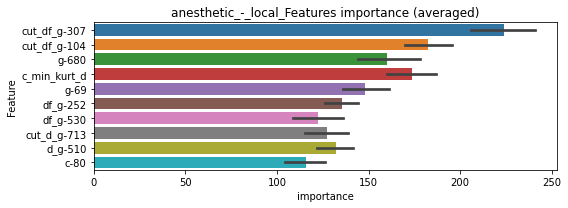

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000802478	valid_1's binary_logloss: 0.0253566


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00137196	valid_1's binary_logloss: 0.0336739
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00101264	valid_1's binary_logloss: 0.0289703


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0007687	valid_1's binary_logloss: 0.0182554
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000766552	valid_1's binary_logloss: 0.0182301


anesthetic_-_local logloss: 0.026557720246866076
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000405947	valid_1's binary_logloss: 0.00786467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000454054	valid_1's binary_logloss: 0.00968031
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000625617	valid_1's binary_logloss: 0.00629112
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031296, Threshold: 0.0145072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.00405881


Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0145072, conf_0:0.01016, conf_1:0.01886
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_1: 0.0445072
threshold: 0.0445072, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.0445072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, Expected: 6.0, Threshold: 0.0445072, conf_0:0.03561, conf_1:0.05341
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0745072
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.1045072
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1345072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.1645072
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.1645072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.1645072, conf_0:0.14806, conf_1:0.18096
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


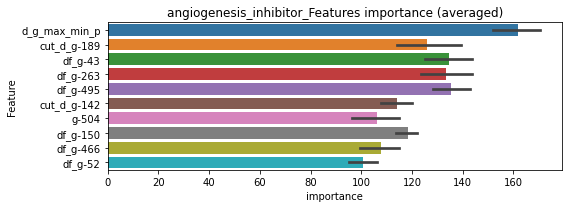

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000471835	valid_1's binary_logloss: 0.00888305


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000452224	valid_1's binary_logloss: 0.00603086
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000425873	valid_1's binary_logloss: 0.0059416


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000497287	valid_1's binary_logloss: 0.0051877


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000450507	valid_1's binary_logloss: 0.00344943
Early stopping, best iteration is:
[1212]	training's binary_logloss: 0.000409724	valid_1's binary_logloss: 0.00333354


angiogenesis_inhibitor logloss: 0.005836474988005995
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418584	valid_1's binary_logloss: 0.00556509
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000399961	valid_1's binary_logloss: 0.00405465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000416045	valid_1's binary_logloss: 0.00248361
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000469646	valid_1's binary_logloss: 0.00737596


y_Threshold: 0.0029452, Threshold: 0.0104258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0104258, conf_0:0.00730, conf_1:0.01355
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0404258
threshold: 0.0404258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000399668	valid_1's binary_logloss: 0.00454059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000397713	valid_1's binary_logloss: 0.00382142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000395653	valid_1's binary_logloss: 0.00279267
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00784232


y_Threshold: 0.0176026, Threshold: 0.0404258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, Expected: 6.2, Threshold: 0.0404258, conf_0:0.03234, conf_1:0.04851
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0704258
threshold: 0.0704258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039683	valid_1's binary_logloss: 0.00795515
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000392811	valid_1's binary_logloss: 0.00263301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000397313	valid_1's binary_logloss: 0.00177336
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000398883	valid_1's binary_logloss: 0.00415359


y_Threshold: 0.0381382, Threshold: 0.0704258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.0704258, conf_0:0.06338, conf_1:0.07747
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1004258
threshold: 0.1004258, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


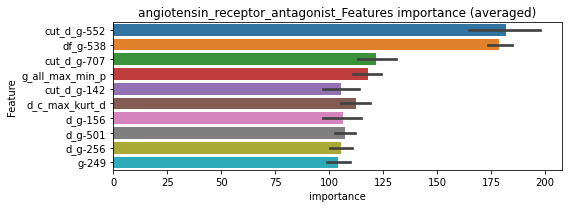

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000465065	valid_1's binary_logloss: 0.00571993
Early stopping, best iteration is:
[1433]	training's binary_logloss: 0.000391481	valid_1's binary_logloss: 0.0054684


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000474127	valid_1's binary_logloss: 0.0027472
Early stopping, best iteration is:
[1442]	training's binary_logloss: 0.000396492	valid_1's binary_logloss: 0.00252891


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000477054	valid_1's binary_logloss: 0.00178616
Early stopping, best iteration is:
[1452]	training's binary_logloss: 0.000398847	valid_1's binary_logloss: 0.0016016


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000469968	valid_1's binary_logloss: 0.00458868
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000454047	valid_1's binary_logloss: 0.00453043


angiotensin_receptor_antagonist logloss: 0.0035330405578830075
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000709731	valid_1's binary_logloss: 0.0297919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000743229	valid_1's binary_logloss: 0.0177298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00127118	valid_1's binary_logloss: 0.0416747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000643173	valid_1's binary_logloss: 0.0256803


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079713, Threshold: 0.0830347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0830347, conf_0:0.05812, conf_1:0.10795
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.1130347
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1430347
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1730347
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.2030347
threshold: 0.2030347, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00063774	valid_1's binary_logloss: 0.0206896
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00065508	valid_1's binary_logloss: 0.0263997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000850047	valid_1's binary_logloss: 0.0317273
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000716718	valid_1's binary_logloss: 0.0215343


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0313543, Threshold: 0.2030347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3787
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, Expected: 12.2, Threshold: 0.2030347, conf_0:0.16243, conf_1:0.24364
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.2330347
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.2630347
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2930347
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.3230347
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_5: 0.3530347
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3830347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.4130347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_8: 0.4430347
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.4730347
threshold: 0.4730347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
===========

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000957605	valid_1's binary_logloss: 0.034518
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00156359	valid_1's binary_logloss: 0.034108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000578716	valid_1's binary_logloss: 0.0283533
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00068037	valid_1's binary_logloss: 0.0180298


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0329758, Threshold: 0.4730347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4730347, conf_0:0.42573, conf_1:0.52034
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.5030347
threshold: 0.5030347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


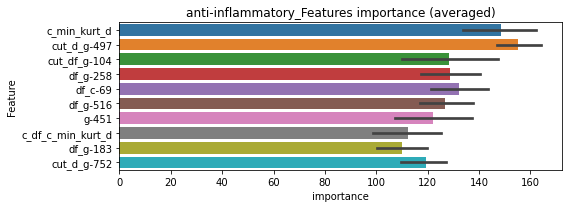

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000998607	valid_1's binary_logloss: 0.0278227


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000744329	valid_1's binary_logloss: 0.0199527
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000646695	valid_1's binary_logloss: 0.0196125


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000748836	valid_1's binary_logloss: 0.0098763
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000690188	valid_1's binary_logloss: 0.00968886


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds


anti-inflammatory logloss: 0.021128882511106797


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00134096	valid_1's binary_logloss: 0.0273981


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.00206632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000363848	valid_1's binary_logloss: 0.00297933
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364568	valid_1's binary_logloss: 0.00335179
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018350, Threshold: 0.0057782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057782, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0357782


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00313934


threshold: 0.0357782, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0357782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0357782, conf_0:0.02862, conf_1:0.04293
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0657782


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0657782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0657782, conf_0:0.05920, conf_1:0.07236


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


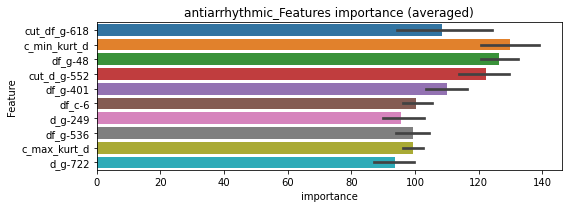

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000398324	valid_1's binary_logloss: 0.00195252
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000375784	valid_1's binary_logloss: 0.00189461


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000398269	valid_1's binary_logloss: 0.00159349
Early stopping, best iteration is:
[1242]	training's binary_logloss: 0.000364286	valid_1's binary_logloss: 0.0015272


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000398274	valid_1's binary_logloss: 0.00172613
Early stopping, best iteration is:
[1141]	training's binary_logloss: 0.000374416	valid_1's binary_logloss: 0.00168274


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397522	valid_1's binary_logloss: 0.00258658
Early stopping, best iteration is:
[1229]	training's binary_logloss: 0.000365611	valid_1's binary_logloss: 0.00249333


antiarrhythmic logloss: 0.0018999660500821983
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00050063	valid_1's binary_logloss: 0.0134287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000491328	valid_1's binary_logloss: 0.00595274
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000476723	valid_1's binary_logloss: 0.00179719
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039545, Threshold: 0.0274921, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00052383	valid_1's binary_logloss: 0.0115173


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0274921, conf_0:0.01924, conf_1:0.03574
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_1: 0.0574921
Num_p_label: 12.0, Expected: 7.2, Adj_threshold_2: 0.0874921
threshold: 0.0874921, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.0874921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00181
Num_p_label: 37.0, Expected: 7.2, Threshold: 0.0874921, conf_0:0.06999, conf_1:0.10499
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_1: 0.1174921
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1474921


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1774921
threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.1774921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1774921, conf_0:0.15974, conf_1:0.19524


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


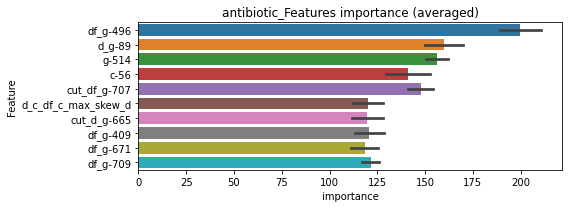

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000533833	valid_1's binary_logloss: 0.0116747
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.00050656	valid_1's binary_logloss: 0.0115664


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000579004	valid_1's binary_logloss: 0.00590807


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000549949	valid_1's binary_logloss: 0.00219671
Early stopping, best iteration is:
[1384]	training's binary_logloss: 0.000469117	valid_1's binary_logloss: 0.00200175


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00075622	valid_1's binary_logloss: 0.0114421


antibiotic logloss: 0.007729577725512044
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000270193	valid_1's binary_logloss: 0.00107908
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000269012	valid_1's binary_logloss: 0.00215964
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000281806	valid_1's binary_logloss: 0.0039961
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011744, Threshold: 0.0042642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042642, conf_0:0.00298, conf_1:0.00554
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342642


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000281271	valid_1's binary_logloss: 0.00150459


threshold: 0.0342642, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.02741, conf_1:0.04112


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.03084, conf_1:0.03769


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


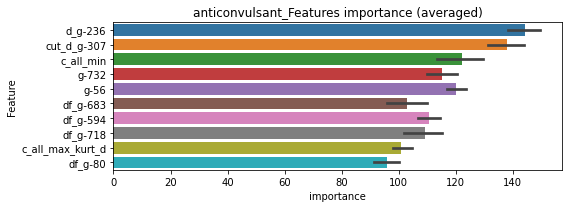

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000299595	valid_1's binary_logloss: 0.00103939
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000286095	valid_1's binary_logloss: 0.00101282


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000293437	valid_1's binary_logloss: 0.00270024
Early stopping, best iteration is:
[1223]	training's binary_logloss: 0.0002695	valid_1's binary_logloss: 0.00263474


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000414814	valid_1's binary_logloss: 0.0034119


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000294798	valid_1's binary_logloss: 0.00146399
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000265039	valid_1's binary_logloss: 0.00140047


anticonvulsant logloss: 0.0021151211711578377
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333521	valid_1's binary_logloss: 0.00244571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000349696	valid_1's binary_logloss: 0.00219507
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000340671	valid_1's binary_logloss: 0.0023464
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016560, Threshold: 0.0047737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0047737, conf_0:0.00334, conf_1:0.00621


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000335681	valid_1's binary_logloss: 0.00366964


Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0347737
threshold: 0.0347737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.02782, conf_1:0.04173


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.03130, conf_1:0.03825


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


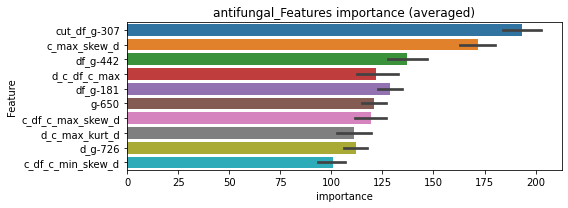

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000376107	valid_1's binary_logloss: 0.00202181
Early stopping, best iteration is:
[1363]	training's binary_logloss: 0.00033289	valid_1's binary_logloss: 0.0019234


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000375931	valid_1's binary_logloss: 0.00177723
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.00033659	valid_1's binary_logloss: 0.00170669


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377011	valid_1's binary_logloss: 0.00204522
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.00035501	valid_1's binary_logloss: 0.00198114


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000370604	valid_1's binary_logloss: 0.0024668
Early stopping, best iteration is:
[1373]	training's binary_logloss: 0.000327034	valid_1's binary_logloss: 0.00236964


antifungal logloss: 0.001995207216965293
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000300837	valid_1's binary_logloss: 0.00160641
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000301618	valid_1's binary_logloss: 0.00254366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000307666	valid_1's binary_logloss: 0.00128128
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015286, Threshold: 0.1284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1284315, conf_0:0.08990, conf_1:0.16696
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1584315
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1884315
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.2184315
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.2484315


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000307681	valid_1's binary_logloss: 0.00365955


Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2784315
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.3084315
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3384315
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3684315
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3984315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4284315
threshold: 0.4284315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.4284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4284315, conf_0:0.34275, conf_1:0.51412
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4584315
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_2: 0.4884315
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_3: 0.5184315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5484315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5784315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6084315


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6384315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6684315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6984315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7284315
threshold: 0.7284315, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.7284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7284315, conf_0:0.65559, conf_1:0.80127
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7584315
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7884315
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.8184315
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_4: 0.8484315


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8784315
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.9084315
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.9384315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9684315
threshold: 0.9684315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


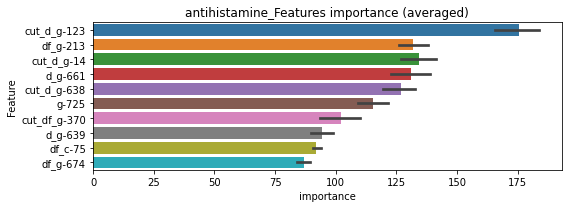

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000302598	valid_1's binary_logloss: 0.00122669
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.000287436	valid_1's binary_logloss: 0.00119324


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000303538	valid_1's binary_logloss: 0.00174691
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00172154


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00030864	valid_1's binary_logloss: 0.000518023
Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.00029591	valid_1's binary_logloss: 0.000498014


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0003018	valid_1's binary_logloss: 0.00162201
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000297166	valid_1's binary_logloss: 0.00161588


antihistamine logloss: 0.0012571907745337904
antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000319582	valid_1's binary_logloss: 0.000836848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000321904	valid_1's binary_logloss: 0.00221019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000315665	valid_1's binary_logloss: 0.00285749
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018172, Threshold: 0.0085367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085367, conf_0:0.00598, conf_1:0.01110
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0385367
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0685367


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000323833	valid_1's binary_logloss: 0.00269842


threshold: 0.0685367, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.0685367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0685367, conf_0:0.05483, conf_1:0.08224
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0985367
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1285367
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1585367
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1885367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2185367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2485367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2785367


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3085367
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3385367
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.3385367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3385367, conf_0:0.30468, conf_1:0.37239


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


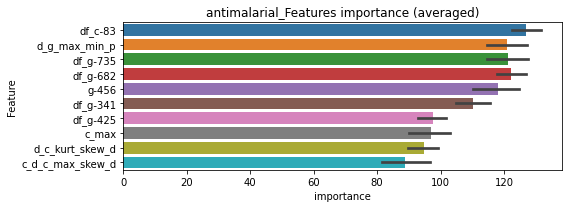

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00031727	valid_1's binary_logloss: 0.000706692
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.000302686	valid_1's binary_logloss: 0.000683146


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315667	valid_1's binary_logloss: 0.0017538
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.000303922	valid_1's binary_logloss: 0.00173186


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318443	valid_1's binary_logloss: 0.000726666
Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000308814	valid_1's binary_logloss: 0.000709285


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000321148	valid_1's binary_logloss: 0.00200237
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.000308575	valid_1's binary_logloss: 0.00196948


antimalarial logloss: 0.0012736761461286876
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000686895	valid_1's binary_logloss: 0.0324807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000724789	valid_1's binary_logloss: 0.0300102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000996273	valid_1's binary_logloss: 0.0210381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000833808	valid_1's binary_logloss: 0.0382962


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0067499, Threshold: 0.0261184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0261184, conf_0:0.01828, conf_1:0.03395
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.0561184
threshold: 0.0561184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000828785	valid_1's binary_logloss: 0.0256025
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000663886	valid_1's binary_logloss: 0.0283309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000627891	valid_1's binary_logloss: 0.0219533
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000955064	valid_1's binary_logloss: 0.0248305


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259076, Threshold: 0.0561184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0072828 Vs.target_rate: 0.00307
Num_p_label: 29.0, Expected: 12.2, Threshold: 0.0561184, conf_0:0.04489, conf_1:0.06734
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_1: 0.0861184
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_2: 0.1161184
threshold: 0.1161184, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00140633	valid_1's binary_logloss: 0.0470401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000604263	valid_1's binary_logloss: 0.0197722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000628302	valid_1's binary_logloss: 0.0228785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00059415	valid_1's binary_logloss: 0.0259236


3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0262982, Threshold: 0.1161184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.1161184, conf_0:0.10451, conf_1:0.12773
threshold: 0.1161184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


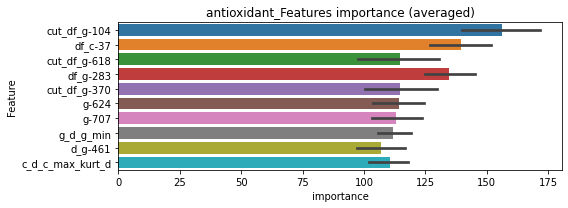

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00138314	valid_1's binary_logloss: 0.0326873
Training until validation scores don't improve for 29 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 antioxidant=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00136657	valid_1's binary_logloss: 0.0382854
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00178942	valid_1's binary_logloss: 0.0228575


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.00079966	valid_1's binary_logloss: 0.0185756


antioxidant logloss: 0.02810146353986766
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00357081
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000418203	valid_1's binary_logloss: 0.0053905
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000428433	valid_1's binary_logloss: 0.00158723
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000438563	valid_1's binary_logloss: 0.00620361


y_Threshold: 0.0031520, Threshold: 0.0113705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0113705, conf_0:0.00796, conf_1:0.01478
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0413705
threshold: 0.0413705, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03310, conf_1:0.04964
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03723, conf_1:0.04551
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


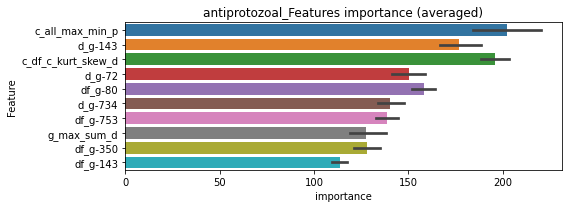

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000478935	valid_1's binary_logloss: 0.00261457
Early stopping, best iteration is:
[1324]	training's binary_logloss: 0.000411447	valid_1's binary_logloss: 0.00238841


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000483644	valid_1's binary_logloss: 0.00421617
Early stopping, best iteration is:
[1292]	training's binary_logloss: 0.000418974	valid_1's binary_logloss: 0.00400918


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000486845	valid_1's binary_logloss: 0.00141581
Early stopping, best iteration is:
[1393]	training's binary_logloss: 0.000413645	valid_1's binary_logloss: 0.00124154


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000482571	valid_1's binary_logloss: 0.0054899
Early stopping, best iteration is:
[1108]	training's binary_logloss: 0.000451587	valid_1's binary_logloss: 0.00540693


antiprotozoal logloss: 0.003261513307990572
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000306219	valid_1's binary_logloss: 0.00233665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000315179	valid_1's binary_logloss: 0.000983663
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000311016	valid_1's binary_logloss: 0.001009
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016440, Threshold: 0.0047377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047377, conf_0:0.00332, conf_1:0.00616
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0347377


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000310787	valid_1's binary_logloss: 0.00219868


threshold: 0.0347377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0347377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, Expected: 3.8, Threshold: 0.0347377, conf_0:0.02779, conf_1:0.04169
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0647377


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0647377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, Expected: 3.8, Threshold: 0.0647377, conf_0:0.05826, conf_1:0.07121
threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


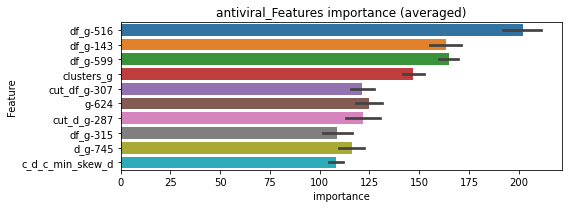

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000332338	valid_1's binary_logloss: 0.00152478
Early stopping, best iteration is:
[1392]	training's binary_logloss: 0.000296264	valid_1's binary_logloss: 0.00144174


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000338386	valid_1's binary_logloss: 0.000877873
Early stopping, best iteration is:
[1356]	training's binary_logloss: 0.000303418	valid_1's binary_logloss: 0.000810925


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000338997	valid_1's binary_logloss: 0.00117183
Early stopping, best iteration is:
[1454]	training's binary_logloss: 0.0002996	valid_1's binary_logloss: 0.00109413


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000334368	valid_1's binary_logloss: 0.00149651
Early stopping, best iteration is:
[1415]	training's binary_logloss: 0.000297113	valid_1's binary_logloss: 0.00141024


antiviral logloss: 0.0011896179254980489
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000862621	valid_1's binary_logloss: 0.0246164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000525137	valid_1's binary_logloss: 0.0199264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000504499	valid_1's binary_logloss: 0.00189393
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038700, Threshold: 0.0516404, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000559861	valid_1's binary_logloss: 0.0128709


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0516404, conf_0:0.03615, conf_1:0.06713
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_1: 0.0816404
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.1116404
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1416404
threshold: 0.1416404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000592317	valid_1's binary_logloss: 0.0231096
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000561713	valid_1's binary_logloss: 0.0187264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505169	valid_1's binary_logloss: 0.00210109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.013101


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166178, Threshold: 0.1416404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00206
Num_p_label: 47.0, Expected: 8.2, Threshold: 0.1416404, conf_0:0.11331, conf_1:0.16997
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_1: 0.1716404
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_2: 0.2016404
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.2316404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2616404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2916404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_6: 0.3216404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_7: 0.3516404
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3816404
threshold: 0.3816404, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000491576	valid_1's binary_logloss: 0.0134185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000543148	valid_1's binary_logloss: 0.0200518
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000510232	valid_1's binary_logloss: 0.0123087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00054681	valid_1's binary_logloss: 0.0169159


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0161885, Threshold: 0.3816404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3816404, conf_0:0.34348, conf_1:0.41980
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.4116404
threshold: 0.4116404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


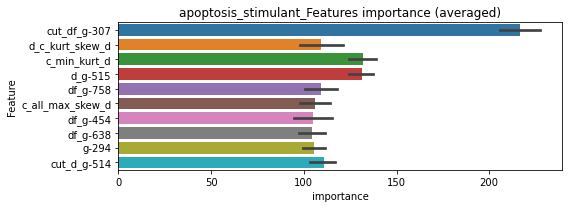

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000568613	valid_1's binary_logloss: 0.0069031
Early stopping, best iteration is:
[1177]	training's binary_logloss: 0.000511706	valid_1's binary_logloss: 0.00673418


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000653148	valid_1's binary_logloss: 0.0168911


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000678551	valid_1's binary_logloss: 0.0159124


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000577612	valid_1's binary_logloss: 0.0069776
Early stopping, best iteration is:
[1416]	training's binary_logloss: 0.000487439	valid_1's binary_logloss: 0.00672007


apoptosis_stimulant logloss: 0.01156463936450337
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00051386	valid_1's binary_logloss: 0.015369
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000516106	valid_1's binary_logloss: 0.0167593
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000605075	valid_1's binary_logloss: 0.00865664
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000493121	valid_1's binary_logloss: 0.00545652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037195, Threshold: 0.0118336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0118336, conf_0:0.00828, conf_1:0.01538
Num_p_label: 10.0, Expected: 7.9, Adj_threshold_1: 0.0418336
threshold: 0.0418336, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000565906	valid_1's binary_logloss: 0.0161302
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000590074	valid_1's binary_logloss: 0.0198864
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000518769	valid_1's binary_logloss: 0.0092998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482737	valid_1's binary_logloss: 0.00413297


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0126361, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03347, conf_1:0.05020
threshold: 0.0418336, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000509244	valid_1's binary_logloss: 0.0156106
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000495514	valid_1's binary_logloss: 0.00753214
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000486122	valid_1's binary_logloss: 0.00649245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000485669	valid_1's binary_logloss: 0.00536855


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188935, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00197
Num_p_label: 16.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03765, conf_1:0.04602
threshold: 0.0418336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


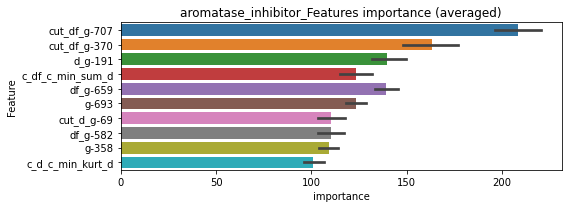

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000561288	valid_1's binary_logloss: 0.0140256
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.000519993	valid_1's binary_logloss: 0.0138543


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000604491	valid_1's binary_logloss: 0.00862821


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000565588	valid_1's binary_logloss: 0.00595905
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000532496	valid_1's binary_logloss: 0.0058293


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000572133	valid_1's binary_logloss: 0.00502925
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000527333	valid_1's binary_logloss: 0.00490491


aromatase_inhibitor logloss: 0.008304180842936897
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000260536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000157972	valid_1's binary_logloss: 0.000565774
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000153118	valid_1's binary_logloss: 0.000182664
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003764, Threshold: 0.0013820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013820, conf_0:0.00097, conf_1:0.00180
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113820
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413820


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000154379	valid_1's binary_logloss: 0.000494978


threshold: 0.2413820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.2413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.2413820, conf_0:0.19311, conf_1:0.28966
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.2713820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3913820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4213820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4513820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4813820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5113820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413820


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


threshold: 0.5413820, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.5413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413820, conf_0:0.48724, conf_1:0.59552
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5713820
threshold: 0.5713820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


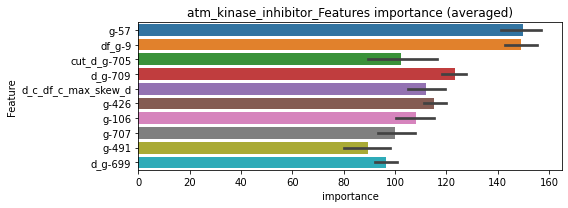

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167756	valid_1's binary_logloss: 0.000248124
Early stopping, best iteration is:
[1571]	training's binary_logloss: 0.000147291	valid_1's binary_logloss: 0.000223207


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00016731	valid_1's binary_logloss: 0.000343473
Early stopping, best iteration is:
[1682]	training's binary_logloss: 0.00014592	valid_1's binary_logloss: 0.000312503


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167403	valid_1's binary_logloss: 0.000177744
Early stopping, best iteration is:
[1687]	training's binary_logloss: 0.000146162	valid_1's binary_logloss: 0.000155272


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168022	valid_1's binary_logloss: 0.000497163
Early stopping, best iteration is:
[1633]	training's binary_logloss: 0.000145832	valid_1's binary_logloss: 0.000445852


atm_kinase_inhibitor logloss: 0.0002842085686204845
atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000177889	valid_1's binary_logloss: 0.000733222
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180515	valid_1's binary_logloss: 0.00132257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000182947	valid_1's binary_logloss: 0.000193594
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0016380, conf_0:0.00115, conf_1:0.00213
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0316380
threshold: 0.0316380, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.00022075


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.0316380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0316380, conf_0:0.02531, conf_1:0.03797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0616380
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0916380
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1216380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.1216380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1216380, conf_0:0.10947, conf_1:0.13380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


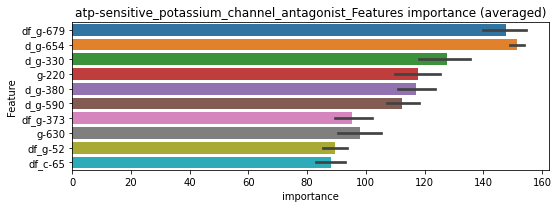

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000186464	valid_1's binary_logloss: 0.000238431
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.000173671	valid_1's binary_logloss: 0.000222494


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000187033	valid_1's binary_logloss: 0.000834769
Early stopping, best iteration is:
[1430]	training's binary_logloss: 0.000172092	valid_1's binary_logloss: 0.000807054


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000187782	valid_1's binary_logloss: 0.000204023
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.000173913	valid_1's binary_logloss: 0.000189583


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000188438	valid_1's binary_logloss: 0.00021452
Early stopping, best iteration is:
[1412]	training's binary_logloss: 0.000173623	valid_1's binary_logloss: 0.000198211


atp-sensitive_potassium_channel_antagonist logloss: 0.0003543525569011689
atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000275399	valid_1's binary_logloss: 0.00106002
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000267059	valid_1's binary_logloss: 0.000537844
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000267358	valid_1's binary_logloss: 0.000534944
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013214, Threshold: 0.0103970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0103970, conf_0:0.00728, conf_1:0.01352
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1303970
threshold: 0.1303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000267942	valid_1's binary_logloss: 0.000761697


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.1303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.1303970, conf_0:0.10432, conf_1:0.15648
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1603970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1903970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.2203970
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.2503970
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.2803970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3103970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3703970


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.4003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.4303970
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.4303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4303970, conf_0:0.38736, conf_1:0.47344
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


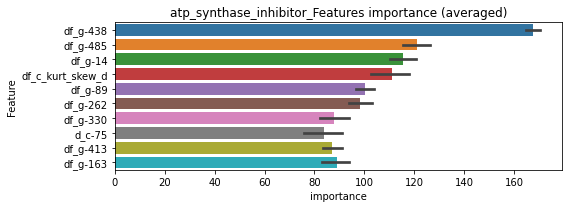

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000271261	valid_1's binary_logloss: 0.000834764
Early stopping, best iteration is:
[1158]	training's binary_logloss: 0.000259875	valid_1's binary_logloss: 0.000808995


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000273694	valid_1's binary_logloss: 0.000539619
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000263108	valid_1's binary_logloss: 0.000521745


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00027096	valid_1's binary_logloss: 0.000400058
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.000261171	valid_1's binary_logloss: 0.000386876


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000269943	valid_1's binary_logloss: 0.000594865
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.000257959	valid_1's binary_logloss: 0.000575926


atp_synthase_inhibitor logloss: 0.0005734847892627119
atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0636217	valid_1's binary_logloss: 0.126123
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0525327	valid_1's binary_logloss: 0.122191
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0661911	valid_1's binary_logloss: 0.111413
Early stopping, best iteration is:
[1836]	training's binary_logloss: 0.0405669	valid_1's binary_logloss: 0.102311
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0702379	valid_1's binary_logloss: 0.0909186
[2000]	training's binary_logloss: 0.0396689	valid_1's binary_logloss: 0.0774491
[3000]	training's binary_logloss: 0.0265492	valid_1's binary_logloss: 0.0728643
[4000]	training's binary_logloss: 0.0196259	valid_1's binary_logloss: 0.0706113
Early stopping, best iteration is:
[3978]	training's binary_logloss: 0.0197303	valid_1's binary_logloss: 0.0705

1 / 3, AUC score:0.985, PR-AUC:0.967
y_Threshold: 0.0486723, Threshold: 0.0789698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 208 → Positive_corect_labels: 616/3720
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0789698, conf_0:0.05528, conf_1:0.10266
Num_p_label: 6.0, Expected: 16.2, Adj_threshold_1: 0.1089698
threshold: 0.1089698, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 616.0/3720, y_label_rate: 0.1655914
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0485989	valid_1's binary_logloss: 0.0843465
[2000]	training's binary_logloss: 0.0270643	valid_1's binary_logloss: 0.0722509
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0238723	valid_1's binary_logloss: 0.0707163
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0497179	valid_1's binary_logloss: 0.0811238
[2000]	training's binary_logloss: 0.0277437	valid_1's binary_logloss: 0.0690203
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.0263829	valid_1's binary_logloss: 0.0684473
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0513405	valid_1's binary_logloss: 0.0708258
[2000]	training's binary_logloss: 0.0284368	valid_1's binary_logloss: 0.0578941
[3000]	training's binary_logloss: 0.0189831	valid_1's binary_logloss: 0.0528098
Early stopping, best iterat

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0469817, Threshold: 0.1089698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 598.0/3684
p_label_rate: 0.0012557 Vs.target_rate: 0.00407
Num_p_label: 5.0, Expected: 16.2, Threshold: 0.1089698, conf_0:0.08718, conf_1:0.13076
threshold: 0.1089698, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 598.0/3684, y_label_rate: 0.1623236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0392335	valid_1's binary_logloss: 0.0730133
[2000]	training's binary_logloss: 0.0214314	valid_1's binary_logloss: 0.0620299
Early stopping, best iteration is:
[2854]	training's binary_logloss: 0.0151315	valid_1's binary_logloss: 0.058745
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0417022	valid_1's binary_logloss: 0.0607516
[2000]	training's binary_logloss: 0.0227626	valid_1's binary_logloss: 0.0481121
[3000]	training's binary_logloss: 0.015206	valid_1's binary_logloss: 0.0438913
[4000]	training's binary_logloss: 0.0113	valid_1's binary_logloss: 0.041999
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.010844	valid_1's binary_logloss: 0.0417934
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0431187	valid_1's binary_logloss: 0.0548571
[2000]	training's binary_logloss: 

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0360111, Threshold: 0.1089698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 591.0/3670
p_label_rate: 0.0005023 Vs.target_rate: 0.00407
Num_p_label: 2.0, Expected: 16.2, Threshold: 0.1089698, conf_0:0.09807, conf_1:0.11987
threshold: 0.1089698, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 591.0/3670, y_label_rate: 0.1610354


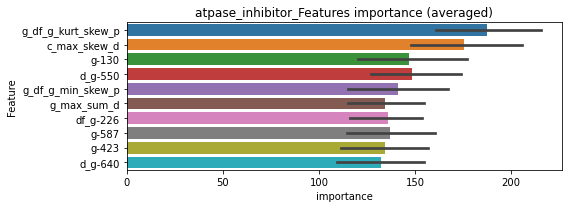

len(train_index) : 2752
len(valid_index) : 918
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0508788	valid_1's binary_logloss: 0.0699237
[2000]	training's binary_logloss: 0.0294873	valid_1's binary_logloss: 0.0533511
[3000]	training's binary_logloss: 0.0204022	valid_1's binary_logloss: 0.0475723
[4000]	training's binary_logloss: 0.0154311	valid_1's binary_logloss: 0.0448902
Early stopping, best iteration is:
[4359]	training's binary_logloss: 0.0141568	valid_1's binary_logloss: 0.044214


len(train_index) : 2752
len(valid_index) : 918
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0516699	valid_1's binary_logloss: 0.0661399
[2000]	training's binary_logloss: 0.0298625	valid_1's binary_logloss: 0.0490079
[3000]	training's binary_logloss: 0.0208006	valid_1's binary_logloss: 0.0430289
[4000]	training's binary_logloss: 0.0157474	valid_1's binary_logloss: 0.0403234
Early stopping, best iteration is:
[4447]	training's binary_logloss: 0.0141777	valid_1's binary_logloss: 0.039526


len(train_index) : 2753
len(valid_index) : 917
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0522584	valid_1's binary_logloss: 0.0677053
[2000]	training's binary_logloss: 0.0301026	valid_1's binary_logloss: 0.0498751
[3000]	training's binary_logloss: 0.020879	valid_1's binary_logloss: 0.0435468
[4000]	training's binary_logloss: 0.0157834	valid_1's binary_logloss: 0.0405258
[5000]	training's binary_logloss: 0.0126077	valid_1's binary_logloss: 0.0387713
[6000]	training's binary_logloss: 0.0104688	valid_1's binary_logloss: 0.0375315
Early stopping, best iteration is:
[6205]	training's binary_logloss: 0.0101098	valid_1's binary_logloss: 0.0372951


len(train_index) : 2753
len(valid_index) : 917
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0507052	valid_1's binary_logloss: 0.0690434
[2000]	training's binary_logloss: 0.0293256	valid_1's binary_logloss: 0.0522528
[3000]	training's binary_logloss: 0.0204456	valid_1's binary_logloss: 0.0460697
[4000]	training's binary_logloss: 0.0154608	valid_1's binary_logloss: 0.0427683
Early stopping, best iteration is:
[4274]	training's binary_logloss: 0.0144503	valid_1's binary_logloss: 0.0420192


atpase_inhibitor logloss: 0.040764187750331464
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034189	valid_1's binary_logloss: 0.000993679
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00033331	valid_1's binary_logloss: 0.00224811
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000340941	valid_1's binary_logloss: 0.000811743
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018670, Threshold: 0.0077848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0077848, conf_0:0.00545, conf_1:0.01012
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0377848
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0677848


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00300145


threshold: 0.0677848, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.0677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0677848, conf_0:0.05423, conf_1:0.08134
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0977848
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.1277848
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1577848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1877848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2177848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2477848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2777848
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.3077848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3377848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3677848
threshold: 0.3677848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.3677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3677848, conf_0:0.33101, conf_1:0.40456
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.3977848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.4277848
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.4577848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


threshold: 0.4577848, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


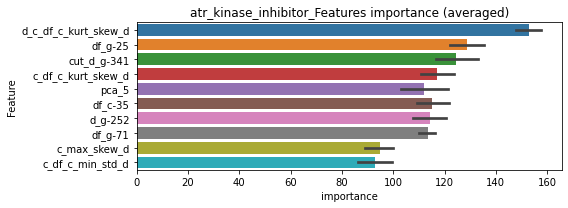

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000350535	valid_1's binary_logloss: 0.000794969
Early stopping, best iteration is:
[1317]	training's binary_logloss: 0.000322747	valid_1's binary_logloss: 0.000747898


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000346134	valid_1's binary_logloss: 0.00206446
Early stopping, best iteration is:
[1297]	training's binary_logloss: 0.000317045	valid_1's binary_logloss: 0.00197369


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000351727	valid_1's binary_logloss: 0.000619841
Early stopping, best iteration is:
[1362]	training's binary_logloss: 0.00032165	valid_1's binary_logloss: 0.000573472


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000361797	valid_1's binary_logloss: 0.0022486


atr_kinase_inhibitor logloss: 0.0013858637554899254
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.103505	valid_1's binary_logloss: 0.16876
[2000]	training's binary_logloss: 0.0569524	valid_1's binary_logloss: 0.127895
[3000]	training's binary_logloss: 0.0385713	valid_1's binary_logloss: 0.111458
Early stopping, best iteration is:
[3241]	training's binary_logloss: 0.0356988	valid_1's binary_logloss: 0.109127
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.105937	valid_1's binary_logloss: 0.154449
[2000]	training's binary_logloss: 0.0585517	valid_1's binary_logloss: 0.108283
[3000]	training's binary_logloss: 0.0394932	valid_1's binary_logloss: 0.0893214
[4000]	training's binary_logloss: 0.0295183	valid_1's binary_logloss: 0.0791915
[5000]	training's binary_logloss: 0.0234552	valid_1's binary_logloss: 0.0723766
[6000]	training's binary_logloss: 0.0194014	valid_1's binary_logloss: 0.0679539
Early stopping, best iteration is:
[6752]	training's

1 / 3, AUC score:0.989, PR-AUC:0.978
y_Threshold: 0.0760229, Threshold: 0.2615644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.2615644, conf_0:0.18310, conf_1:0.34003
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_1: 0.2915644
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_2: 0.3215644
threshold: 0.3215644, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0937357	valid_1's binary_logloss: 0.146028
[2000]	training's binary_logloss: 0.0498597	valid_1's binary_logloss: 0.101432
[3000]	training's binary_logloss: 0.0330977	valid_1's binary_logloss: 0.0847243
[4000]	training's binary_logloss: 0.0246351	valid_1's binary_logloss: 0.0750011
[5000]	training's binary_logloss: 0.019565	valid_1's binary_logloss: 0.0690397
Early stopping, best iteration is:
[5330]	training's binary_logloss: 0.0183228	valid_1's binary_logloss: 0.0673448
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0928601	valid_1's binary_logloss: 0.152146
[2000]	training's binary_logloss: 0.0490127	valid_1's binary_logloss: 0.107164
[3000]	training's binary_logloss: 0.0326265	valid_1's binary_logloss: 0.0883482
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.0283224	valid_1's binary_logloss: 0.0830098
Training unti

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.1156139, Threshold: 0.3215644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0130588 Vs.target_rate: 0.00403
Num_p_label: 52.0, Expected: 16.1, Threshold: 0.3215644, conf_0:0.25725, conf_1:0.38588
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_1: 0.3515644
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_2: 0.3815644
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_3: 0.4115644
threshold: 0.4115644, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 620.0/3729, y_label_rate: 0.1662644
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0906926	valid_1's binary_logloss: 0.139849
[2000]	training's binary_logloss: 0.0472768	valid_1's binary_logloss: 0.0964433
[3000]	training's binary_logloss: 0.0312905	valid_1's binary_logloss: 0.0788308
[4000]	training's binary_logloss: 0.023302	valid_1's binary_logloss: 0.0693188
[5000]	training's binary_logloss: 0.0185944	valid_1's binary_logloss: 0.0639284
[6000]	training's binary_logloss: 0.0153915	valid_1's binary_logloss: 0.059765
Early stopping, best iteration is:
[6013]	training's binary_logloss: 0.0153486	valid_1's binary_logloss: 0.0596758
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0929091	valid_1's binary_logloss: 0.126397
[2000]	training's binary_logloss: 0.048938	valid_1's binary_logloss: 0.0813751
[3000]	training's binary_logloss: 0.0324436	valid_1's binary_logloss: 0.0640013
[4000]	training's binary_logloss: 0.0241003	vali

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1102738, Threshold: 0.4115644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 615.0/3719
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, Expected: 16.1, Threshold: 0.4115644, conf_0:0.37041, conf_1:0.45272
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_1: 0.4415644
threshold: 0.4415644, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 615.0/3719, y_label_rate: 0.1653670


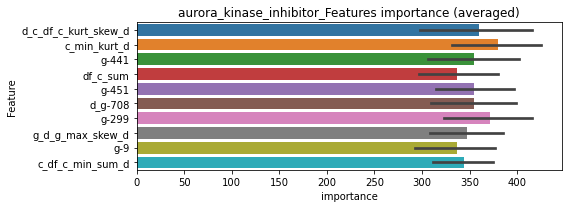

len(train_index) : 2789
len(valid_index) : 930
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.124311	valid_1's binary_logloss: 0.168068
[2000]	training's binary_logloss: 0.0676022	valid_1's binary_logloss: 0.113207
[3000]	training's binary_logloss: 0.0455643	valid_1's binary_logloss: 0.0909484
[4000]	training's binary_logloss: 0.0342879	valid_1's binary_logloss: 0.0789858
[5000]	training's binary_logloss: 0.0274675	valid_1's binary_logloss: 0.0719999
Early stopping, best iteration is:
[5725]	training's binary_logloss: 0.0239437	valid_1's binary_logloss: 0.0680395


len(train_index) : 2789
len(valid_index) : 930
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.122143	valid_1's binary_logloss: 0.183741
[2000]	training's binary_logloss: 0.0661564	valid_1's binary_logloss: 0.127054
[3000]	training's binary_logloss: 0.0447	valid_1's binary_logloss: 0.10205
[4000]	training's binary_logloss: 0.0335944	valid_1's binary_logloss: 0.0891547
[5000]	training's binary_logloss: 0.0268426	valid_1's binary_logloss: 0.0810527
[6000]	training's binary_logloss: 0.022295	valid_1's binary_logloss: 0.0753038
Early stopping, best iteration is:
[6666]	training's binary_logloss: 0.0200342	valid_1's binary_logloss: 0.072326


len(train_index) : 2789
len(valid_index) : 930
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.125351	valid_1's binary_logloss: 0.167228
[2000]	training's binary_logloss: 0.0677364	valid_1's binary_logloss: 0.107656
[3000]	training's binary_logloss: 0.045745	valid_1's binary_logloss: 0.0831009
[4000]	training's binary_logloss: 0.0342984	valid_1's binary_logloss: 0.0699934
[5000]	training's binary_logloss: 0.027382	valid_1's binary_logloss: 0.0616958
[6000]	training's binary_logloss: 0.0227901	valid_1's binary_logloss: 0.0559485
[7000]	training's binary_logloss: 0.0195165	valid_1's binary_logloss: 0.0517401
[8000]	training's binary_logloss: 0.0170143	valid_1's binary_logloss: 0.0484105
[9000]	training's binary_logloss: 0.0151121	valid_1's binary_logloss: 0.0458791
[10000]	training's binary_logloss: 0.013591	valid_1's binary_logloss: 0.0438334
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.013591	valid_1's binary_logloss: 0.0438334


len(train_index) : 2790
len(valid_index) : 929
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.125967	valid_1's binary_logloss: 0.161272
[2000]	training's binary_logloss: 0.0686061	valid_1's binary_logloss: 0.104949
[3000]	training's binary_logloss: 0.0461563	valid_1's binary_logloss: 0.0815659
[4000]	training's binary_logloss: 0.0345237	valid_1's binary_logloss: 0.0687059
[5000]	training's binary_logloss: 0.0275282	valid_1's binary_logloss: 0.0612424
[6000]	training's binary_logloss: 0.0228345	valid_1's binary_logloss: 0.0560064
[7000]	training's binary_logloss: 0.0194855	valid_1's binary_logloss: 0.0522772
[8000]	training's binary_logloss: 0.0169929	valid_1's binary_logloss: 0.0492838
[9000]	training's binary_logloss: 0.0150791	valid_1's binary_logloss: 0.0470196
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.0146041	valid_1's binary_logloss: 0.0464727


aurora_kinase_inhibitor logloss: 0.05767091692382249
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000240223
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000165465	valid_1's binary_logloss: 0.0015519
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000166417	valid_1's binary_logloss: 0.000202617
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005543, Threshold: 0.0042101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0042101, conf_0:0.00295, conf_1:0.00547
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0342101
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0642101
threshold: 0.0642101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000162438	valid_1's binary_logloss: 0.000263095


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.0642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00025
Num_p_label: 43.0, Expected: 1.0, Threshold: 0.0642101, conf_0:0.05137, conf_1:0.07705
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0942101
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1242101
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_3: 0.1542101
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_4: 0.1842101
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_5: 0.2142101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2442101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_7: 0.2742101
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.3042101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3342101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_10: 0.3642101
threshold: 0.3642101, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.3642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, Expected: 1.0, Threshold: 0.3642101, conf_0:0.32779, conf_1:0.40063
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.3942101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.4242101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.4542101
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4842101
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5142101
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5442101
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.5742101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6042101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.6342101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.6642101
threshold: 0.6642101, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


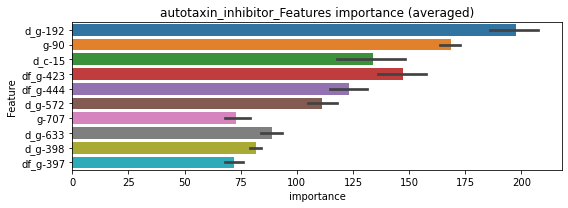

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000166	valid_1's binary_logloss: 0.000643229
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000147186	valid_1's binary_logloss: 0.000603101


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168507	valid_1's binary_logloss: 0.00019697
Early stopping, best iteration is:
[1620]	training's binary_logloss: 0.000150019	valid_1's binary_logloss: 0.000175571


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00016895	valid_1's binary_logloss: 0.000176984
Early stopping, best iteration is:
[1632]	training's binary_logloss: 0.000150097	valid_1's binary_logloss: 0.000157651


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168047	valid_1's binary_logloss: 0.000186914
Early stopping, best iteration is:
[1534]	training's binary_logloss: 0.000150726	valid_1's binary_logloss: 0.000168138


autotaxin_inhibitor logloss: 0.0002762007815418755
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000724653	valid_1's binary_logloss: 0.0326461
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0300991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.00380268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000628515	valid_1's binary_logloss: 0.0185971


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0072684, Threshold: 0.0240325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0240325, conf_0:0.01682, conf_1:0.03124
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.0540325
threshold: 0.0540325, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000632017	valid_1's binary_logloss: 0.017125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000534291	valid_1's binary_logloss: 0.0222518
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000559558	valid_1's binary_logloss: 0.0170414
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000695483	valid_1's binary_logloss: 0.0250899


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313949, Threshold: 0.0540325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0540325, conf_0:0.04323, conf_1:0.06484
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_1: 0.0840325
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1140325
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1440325
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000607169	valid_1's binary_logloss: 0.0180508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000914418	valid_1's binary_logloss: 0.028274
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607512	valid_1's binary_logloss: 0.0145562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000516503	valid_1's binary_logloss: 0.00861982


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315935, Threshold: 0.1440325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1440325, conf_0:0.12963, conf_1:0.15844
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


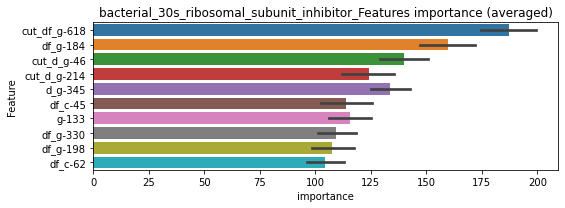

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000877235	valid_1's binary_logloss: 0.0135574


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000647361	valid_1's binary_logloss: 0.0178068
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.0006065	valid_1's binary_logloss: 0.0175747


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000726492	valid_1's binary_logloss: 0.0124454


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015957546408329033


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.0013523	valid_1's binary_logloss: 0.0202528


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0455049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00115196	valid_1's binary_logloss: 0.0240139
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00173709	valid_1's binary_logloss: 0.0369984
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0124266, Threshold: 0.0312871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 647/3788


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00203157	valid_1's binary_logloss: 0.0534913


p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0312871, conf_0:0.02190, conf_1:0.04067
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_1: 0.0612871
threshold: 0.0612871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00120227	valid_1's binary_logloss: 0.0279927
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000872178	valid_1's binary_logloss: 0.0264724
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000694109	valid_1's binary_logloss: 0.0183202
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000802067	valid_1's binary_logloss: 0.0287219


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370858, Threshold: 0.0612871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00336
Num_p_label: 36.0, Expected: 13.4, Threshold: 0.0612871, conf_0:0.04903, conf_1:0.07354
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_1: 0.0912871
threshold: 0.0912871, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3780, y_label_rate: 0.1701058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625724	valid_1's binary_logloss: 0.0246281
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000843588	valid_1's binary_logloss: 0.0285723
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00068765	valid_1's binary_logloss: 0.0172206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000620926	valid_1's binary_logloss: 0.0211007


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297883, Threshold: 0.0912871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3774
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, Expected: 13.4, Threshold: 0.0912871, conf_0:0.08216, conf_1:0.10042
threshold: 0.0912871, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3774, y_label_rate: 0.1695813


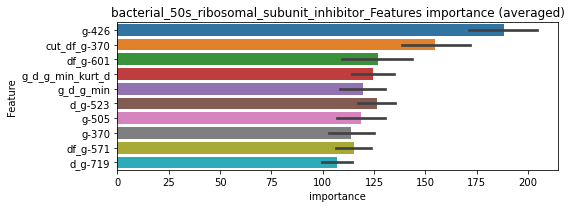

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000779837	valid_1's binary_logloss: 0.020385
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000651574	valid_1's binary_logloss: 0.0197248


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00101307	valid_1's binary_logloss: 0.0253491


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000795006	valid_1's binary_logloss: 0.0137803
Early stopping, best iteration is:
[1210]	training's binary_logloss: 0.000685516	valid_1's binary_logloss: 0.0134219


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000879813	valid_1's binary_logloss: 0.0273081


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.0214515467961473
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438836	valid_1's binary_logloss: 0.00525582
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000430252	valid_1's binary_logloss: 0.009092
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000439064	valid_1's binary_logloss: 0.00331118
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000427781	valid_1's binary_logloss: 0.00447511


y_Threshold: 0.0029435, Threshold: 0.0174206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0174206, conf_0:0.01219, conf_1:0.02265
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0474206
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0774206
threshold: 0.0774206, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


y_Threshold: 0.0449207, Threshold: 0.0774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151
Num_p_label: 46.0, Expected: 6.0, Threshold: 0.0774206, conf_0:0.06194, conf_1:0.09290
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1074206
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1374206
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1674206
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.1974206
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.2274206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_6: 0.2574206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.2874206
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3174206
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_9: 0.3474206
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_10: 0.3774206
threshold: 0.3774206, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3811, y_label_rate: 0.1723

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.3774206, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.3774206, conf_0:0.33968, conf_1:0.41516
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4074206
threshold: 0.4074206, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


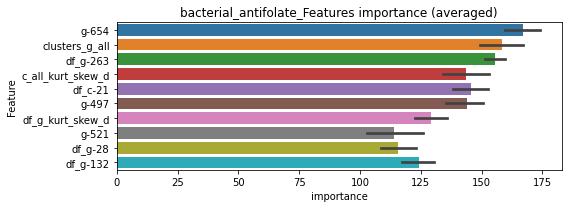

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000479345	valid_1's binary_logloss: 0.00430525
Early stopping, best iteration is:
[1243]	training's binary_logloss: 0.000432077	valid_1's binary_logloss: 0.00416861


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000475383	valid_1's binary_logloss: 0.00760707
Early stopping, best iteration is:
[1310]	training's binary_logloss: 0.000417103	valid_1's binary_logloss: 0.00737527


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000488931	valid_1's binary_logloss: 0.00250282
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.000429343	valid_1's binary_logloss: 0.0023828


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000480981	valid_1's binary_logloss: 0.00345128
Early stopping, best iteration is:
[1227]	training's binary_logloss: 0.000432553	valid_1's binary_logloss: 0.00329335


bacterial_antifolate logloss: 0.004306103477538053


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0695543	valid_1's binary_logloss: 0.115081
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0412842	valid_1's binary_logloss: 0.109569
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0670992	valid_1's binary_logloss: 0.127063
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.0507831	valid_1's binary_logloss: 0.124334
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0701682	valid_1's binary_logloss: 0.112705
Early stopping, best iteration is:
[1717]	training's binary_logloss: 0.046167	valid_1's binary_logloss: 0.107202
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0711606	valid_1's binary_logloss: 0.109283
[2000]	training's binary_logloss: 0.0402351	valid_1's binary_logloss: 0.102547
Early stopping, best

1 / 3, AUC score:0.965, PR-AUC:0.935
y_Threshold: 0.0552838, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 494 → Positive_corect_labels: 1067/6673
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.06071, conf_1:0.11275
threshold: 0.0867271, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1067.0/6673, y_label_rate: 0.1598981
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340596	valid_1's binary_logloss: 0.0493526
[2000]	training's binary_logloss: 0.0188018	valid_1's binary_logloss: 0.0421862
[3000]	training's binary_logloss: 0.0124655	valid_1's binary_logloss: 0.0398631
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.0122037	valid_1's binary_logloss: 0.039783
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346944	valid_1's binary_logloss: 0.0479944
[2000]	training's binary_logloss: 0.0192009	valid_1's binary_logloss: 0.0402789
[3000]	training's binary_logloss: 0.0127353	valid_1's binary_logloss: 0.038015
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.0126922	valid_1's binary_logloss: 0.0379892
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0310517	valid_1's binary_logloss: 0.070737
Early stopping, best iteration

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0432553, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1031.0/6601
p_label_rate: 0.0072828 Vs.target_rate: 0.00806
Num_p_label: 29.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.06938, conf_1:0.10407
threshold: 0.0867271, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1031.0/6601, y_label_rate: 0.1561885
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0224321	valid_1's binary_logloss: 0.0311779
[2000]	training's binary_logloss: 0.0123502	valid_1's binary_logloss: 0.0236101
[3000]	training's binary_logloss: 0.00829912	valid_1's binary_logloss: 0.020948
[4000]	training's binary_logloss: 0.0061894	valid_1's binary_logloss: 0.0197776
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00593389	valid_1's binary_logloss: 0.0195929
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0218547	valid_1's binary_logloss: 0.033166
[2000]	training's binary_logloss: 0.0119924	valid_1's binary_logloss: 0.0257414
[3000]	training's binary_logloss: 0.00808027	valid_1's binary_logloss: 0.0232362
Early stopping, best iteration is:
[3403]	training's binary_logloss: 0.00707948	valid_1's binary_logloss: 0.0225816
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0417170, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 1013.0/6565
p_label_rate: 0.0075339 Vs.target_rate: 0.00806
Num_p_label: 30.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.07805, conf_1:0.09540
threshold: 0.0867271, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1013.0/6565, y_label_rate: 0.1543031


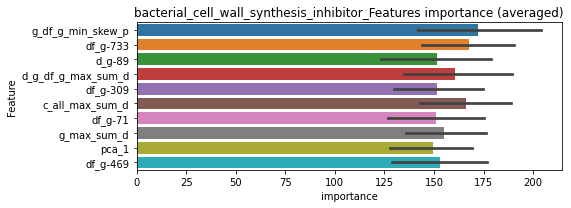

len(train_index) : 4923
len(valid_index) : 1642
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235512	valid_1's binary_logloss: 0.0257603
[2000]	training's binary_logloss: 0.0122351	valid_1's binary_logloss: 0.0137846
[3000]	training's binary_logloss: 0.00835482	valid_1's binary_logloss: 0.00971342
[4000]	training's binary_logloss: 0.00636307	valid_1's binary_logloss: 0.00767337
[5000]	training's binary_logloss: 0.00514313	valid_1's binary_logloss: 0.00639979
[6000]	training's binary_logloss: 0.00431483	valid_1's binary_logloss: 0.00554406
[7000]	training's binary_logloss: 0.00373152	valid_1's binary_logloss: 0.00494621
[8000]	training's binary_logloss: 0.00329006	valid_1's binary_logloss: 0.00447169
[9000]	training's binary_logloss: 0.00293348	valid_1's binary_logloss: 0.00409434
[10000]	training's binary_logloss: 0.00266076	valid_1's binary_logloss: 0.00379537
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00266076	valid_1's binary_logloss: 0.

len(train_index) : 4924
len(valid_index) : 1641
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233914	valid_1's binary_logloss: 0.0260843
[2000]	training's binary_logloss: 0.0119707	valid_1's binary_logloss: 0.0148154
[3000]	training's binary_logloss: 0.00815171	valid_1's binary_logloss: 0.0111391
[4000]	training's binary_logloss: 0.00618548	valid_1's binary_logloss: 0.00934428
[5000]	training's binary_logloss: 0.0049857	valid_1's binary_logloss: 0.0082508
[6000]	training's binary_logloss: 0.00417455	valid_1's binary_logloss: 0.00750241
[7000]	training's binary_logloss: 0.00360537	valid_1's binary_logloss: 0.00699982
[8000]	training's binary_logloss: 0.00317706	valid_1's binary_logloss: 0.00662796
[9000]	training's binary_logloss: 0.00283304	valid_1's binary_logloss: 0.00630785
[10000]	training's binary_logloss: 0.00256983	valid_1's binary_logloss: 0.00609985
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00256983	valid_1's binary_logloss: 0.006

len(train_index) : 4924
len(valid_index) : 1641
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0223895	valid_1's binary_logloss: 0.0334527
[2000]	training's binary_logloss: 0.0113479	valid_1's binary_logloss: 0.0211775
[3000]	training's binary_logloss: 0.00770819	valid_1's binary_logloss: 0.0170303
[4000]	training's binary_logloss: 0.00587703	valid_1's binary_logloss: 0.0149616
[5000]	training's binary_logloss: 0.00475014	valid_1's binary_logloss: 0.0137638
[6000]	training's binary_logloss: 0.0039964	valid_1's binary_logloss: 0.0128855
[7000]	training's binary_logloss: 0.00345545	valid_1's binary_logloss: 0.0123048
[8000]	training's binary_logloss: 0.00304697	valid_1's binary_logloss: 0.0118754
[9000]	training's binary_logloss: 0.00272011	valid_1's binary_logloss: 0.0115037
Early stopping, best iteration is:
[9366]	training's binary_logloss: 0.00261883	valid_1's binary_logloss: 0.0113996


len(train_index) : 4924
len(valid_index) : 1641
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0228317	valid_1's binary_logloss: 0.0284912
[2000]	training's binary_logloss: 0.0116441	valid_1's binary_logloss: 0.0168859
[3000]	training's binary_logloss: 0.00788514	valid_1's binary_logloss: 0.0129719
[4000]	training's binary_logloss: 0.00598624	valid_1's binary_logloss: 0.0110558
[5000]	training's binary_logloss: 0.00482821	valid_1's binary_logloss: 0.00991345
[6000]	training's binary_logloss: 0.00404574	valid_1's binary_logloss: 0.00911334
[7000]	training's binary_logloss: 0.00350538	valid_1's binary_logloss: 0.00859167
[8000]	training's binary_logloss: 0.0030961	valid_1's binary_logloss: 0.00816385
[9000]	training's binary_logloss: 0.00276369	valid_1's binary_logloss: 0.00783006
[10000]	training's binary_logloss: 0.00250587	valid_1's binary_logloss: 0.00761093
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00250587	valid_1's binary_logloss: 0.007

bacterial_cell_wall_synthesis_inhibitor logloss: 0.007225907576160903
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0610623	valid_1's binary_logloss: 0.107775
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0410616	valid_1's binary_logloss: 0.0992384
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0606483	valid_1's binary_logloss: 0.110644
[2000]	training's binary_logloss: 0.0344225	valid_1's binary_logloss: 0.100237
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0329704	valid_1's binary_logloss: 0.0998677
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0650297	valid_1's binary_logloss: 0.088014
[2000]	training's binary_logloss: 0.0369699	valid_1's binary_logloss: 0.0745938
[3000]	training's binary_logloss: 0.0246668	valid_1's binary_logloss: 0.0704605
Early stopping, best iteration is:
[2985]	training's binary_logloss: 0.0248063	valid_1's binary_logloss: 0.0704

1 / 3, AUC score:0.985, PR-AUC:0.971
y_Threshold: 0.0441851, Threshold: 0.0815391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 189 → Positive_corect_labels: 626/3741
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0815391, conf_0:0.05708, conf_1:0.10600
Num_p_label: 12.0, Expected: 14.9, Adj_threshold_1: 0.1115391
threshold: 0.1115391, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 626.0/3741, y_label_rate: 0.1673349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0470594	valid_1's binary_logloss: 0.0902054
[2000]	training's binary_logloss: 0.0257885	valid_1's binary_logloss: 0.0793097
Early stopping, best iteration is:
[2008]	training's binary_logloss: 0.025695	valid_1's binary_logloss: 0.0792495
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0482813	valid_1's binary_logloss: 0.0764488
[2000]	training's binary_logloss: 0.0266129	valid_1's binary_logloss: 0.0639804
Early stopping, best iteration is:
[2700]	training's binary_logloss: 0.0197721	valid_1's binary_logloss: 0.0608443
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0504672	valid_1's binary_logloss: 0.069888
[2000]	training's binary_logloss: 0.0278764	valid_1's binary_logloss: 0.055102
[3000]	training's binary_logloss: 0.0186692	valid_1's binary_logloss: 0.0499178
Early stopping, best iteration

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0483819, Threshold: 0.1115391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 607.0/3703
p_label_rate: 0.0113009 Vs.target_rate: 0.00374
Num_p_label: 45.0, Expected: 14.9, Threshold: 0.1115391, conf_0:0.08923, conf_1:0.13385
Num_p_label: 24.0, Expected: 14.9, Adj_threshold_1: 0.1415391
Num_p_label: 8.0, Expected: 14.9, Adj_threshold_2: 0.1715391
threshold: 0.1715391, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 607.0/3703, y_label_rate: 0.1639211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0399316	valid_1's binary_logloss: 0.0652942
[2000]	training's binary_logloss: 0.0218093	valid_1's binary_logloss: 0.0523121
[3000]	training's binary_logloss: 0.0145309	valid_1's binary_logloss: 0.0478079
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.013392	valid_1's binary_logloss: 0.0471119
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0402451	valid_1's binary_logloss: 0.0653067
[2000]	training's binary_logloss: 0.0219287	valid_1's binary_logloss: 0.0535047
Early stopping, best iteration is:
[2368]	training's binary_logloss: 0.0186103	valid_1's binary_logloss: 0.051889
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0420719	valid_1's binary_logloss: 0.0542517
[2000]	training's binary_logloss: 0.0229198	valid_1's binary_logloss: 0.040825
[3000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0416708, Threshold: 0.1715391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 598.0/3685
p_label_rate: 0.0060271 Vs.target_rate: 0.00374
Num_p_label: 24.0, Expected: 14.9, Threshold: 0.1715391, conf_0:0.15439, conf_1:0.18869
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.2015391
threshold: 0.2015391, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 598.0/3685, y_label_rate: 0.1622795


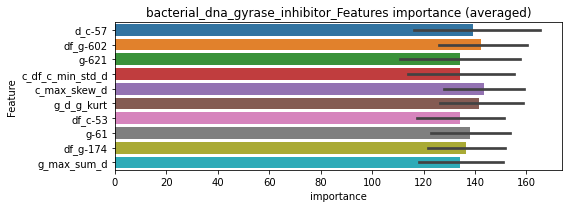

len(train_index) : 2763
len(valid_index) : 922
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0452012	valid_1's binary_logloss: 0.0758991
[2000]	training's binary_logloss: 0.0254897	valid_1's binary_logloss: 0.0622565
[3000]	training's binary_logloss: 0.017683	valid_1's binary_logloss: 0.0579985
Early stopping, best iteration is:
[3105]	training's binary_logloss: 0.0171054	valid_1's binary_logloss: 0.0576669


len(train_index) : 2764
len(valid_index) : 921
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.049539	valid_1's binary_logloss: 0.0629281
[2000]	training's binary_logloss: 0.0284386	valid_1's binary_logloss: 0.0446745
[3000]	training's binary_logloss: 0.0196439	valid_1's binary_logloss: 0.0382242
[4000]	training's binary_logloss: 0.0148359	valid_1's binary_logloss: 0.0348281
[5000]	training's binary_logloss: 0.011882	valid_1's binary_logloss: 0.0327337
[6000]	training's binary_logloss: 0.00986361	valid_1's binary_logloss: 0.0312061
Early stopping, best iteration is:
[6478]	training's binary_logloss: 0.00910815	valid_1's binary_logloss: 0.0305564


len(train_index) : 2764
len(valid_index) : 921
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0505837	valid_1's binary_logloss: 0.0619241
[2000]	training's binary_logloss: 0.0292702	valid_1's binary_logloss: 0.0437394
[3000]	training's binary_logloss: 0.0202951	valid_1's binary_logloss: 0.0374325
[4000]	training's binary_logloss: 0.015358	valid_1's binary_logloss: 0.034371
[5000]	training's binary_logloss: 0.0123166	valid_1's binary_logloss: 0.0323998
[6000]	training's binary_logloss: 0.0102275	valid_1's binary_logloss: 0.0309682
Early stopping, best iteration is:
[6479]	training's binary_logloss: 0.00945963	valid_1's binary_logloss: 0.0305173


len(train_index) : 2764
len(valid_index) : 921
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0486063	valid_1's binary_logloss: 0.0648217
[2000]	training's binary_logloss: 0.0280186	valid_1's binary_logloss: 0.0482561
[3000]	training's binary_logloss: 0.0194534	valid_1's binary_logloss: 0.0419772
[4000]	training's binary_logloss: 0.014739	valid_1's binary_logloss: 0.0391043
[5000]	training's binary_logloss: 0.0118142	valid_1's binary_logloss: 0.0374067
Early stopping, best iteration is:
[5576]	training's binary_logloss: 0.0105556	valid_1's binary_logloss: 0.0366309


bacterial_dna_gyrase_inhibitor logloss: 0.03884798461466691
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.152063	valid_1's binary_logloss: 0.254108
[2000]	training's binary_logloss: 0.0885197	valid_1's binary_logloss: 0.215048
[3000]	training's binary_logloss: 0.0606133	valid_1's binary_logloss: 0.198496
Early stopping, best iteration is:
[3353]	training's binary_logloss: 0.0542091	valid_1's binary_logloss: 0.194938
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.160147	valid_1's binary_logloss: 0.228226
[2000]	training's binary_logloss: 0.094302	valid_1's binary_logloss: 0.177436
[3000]	training's binary_logloss: 0.0648234	valid_1's binary_logloss: 0.154467
[4000]	training's binary_logloss: 0.0487538	valid_1's binary_logloss: 0.142021
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0468613	valid_1's binary_logloss: 0.140195
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.160

1 / 3, AUC score:0.959, PR-AUC:0.922
y_Threshold: 0.1234901, Threshold: 0.1858316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 356/2247
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1858316, conf_0:0.13008, conf_1:0.24158
Num_p_label: 14.0, Expected: 19.2, Adj_threshold_1: 0.2158316
threshold: 0.2158316, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 356.0/2247, y_label_rate: 0.1584335
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.127806	valid_1's binary_logloss: 0.205153
[2000]	training's binary_logloss: 0.0705019	valid_1's binary_logloss: 0.156889
[3000]	training's binary_logloss: 0.0476328	valid_1's binary_logloss: 0.138093
[4000]	training's binary_logloss: 0.035586	valid_1's binary_logloss: 0.127744
Early stopping, best iteration is:
[4155]	training's binary_logloss: 0.0342295	valid_1's binary_logloss: 0.126098
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.131093	valid_1's binary_logloss: 0.202249
[2000]	training's binary_logloss: 0.0725757	valid_1's binary_logloss: 0.150453
[3000]	training's binary_logloss: 0.0492066	valid_1's binary_logloss: 0.128507
[4000]	training's binary_logloss: 0.0366216	valid_1's binary_logloss: 0.116319
Early stopping, best iteration is:
[4226]	training's binary_logloss: 0.034671	valid_1's binary_logloss: 0.114523
Training until validat

2 / 3, AUC score:0.992, PR-AUC:0.983
y_Threshold: 0.1195393, Threshold: 0.2158316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 334.0/2203
p_label_rate: 0.0037670 Vs.target_rate: 0.00483
Num_p_label: 15.0, Expected: 19.2, Threshold: 0.2158316, conf_0:0.17267, conf_1:0.25900
threshold: 0.2158316, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 334.0/2203, y_label_rate: 0.1516114
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.118868	valid_1's binary_logloss: 0.195303
[2000]	training's binary_logloss: 0.0650173	valid_1's binary_logloss: 0.146617
[3000]	training's binary_logloss: 0.0436943	valid_1's binary_logloss: 0.126083
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.0360821	valid_1's binary_logloss: 0.118784
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.119097	valid_1's binary_logloss: 0.196648
[2000]	training's binary_logloss: 0.0641167	valid_1's binary_logloss: 0.146939
[3000]	training's binary_logloss: 0.0431073	valid_1's binary_logloss: 0.126186
Early stopping, best iteration is:
[3789]	training's binary_logloss: 0.033908	valid_1's binary_logloss: 0.116465
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.121887	valid_1's binary_logloss: 0.174494
[2000]	training's binary_logloss: 0.0659

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1241680, Threshold: 0.2158316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 327.0/2189
p_label_rate: 0.0035158 Vs.target_rate: 0.00483
Num_p_label: 14.0, Expected: 19.2, Threshold: 0.2158316, conf_0:0.19425, conf_1:0.23741
threshold: 0.2158316, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 327.0/2189, y_label_rate: 0.1493833


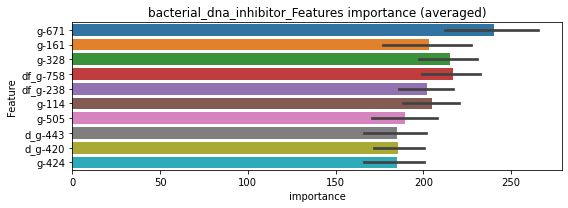

len(train_index) : 1641
len(valid_index) : 548
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.153599	valid_1's binary_logloss: 0.218759
[2000]	training's binary_logloss: 0.0897768	valid_1's binary_logloss: 0.156227
[3000]	training's binary_logloss: 0.0615388	valid_1's binary_logloss: 0.125395
[4000]	training's binary_logloss: 0.0467713	valid_1's binary_logloss: 0.108905
[5000]	training's binary_logloss: 0.0375242	valid_1's binary_logloss: 0.0982806
[6000]	training's binary_logloss: 0.0312851	valid_1's binary_logloss: 0.0912823
Early stopping, best iteration is:
[6256]	training's binary_logloss: 0.0299516	valid_1's binary_logloss: 0.0894474


len(train_index) : 1642
len(valid_index) : 547
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.153213	valid_1's binary_logloss: 0.208986
[2000]	training's binary_logloss: 0.0882573	valid_1's binary_logloss: 0.152392
[3000]	training's binary_logloss: 0.0603596	valid_1's binary_logloss: 0.125761
[4000]	training's binary_logloss: 0.0455005	valid_1's binary_logloss: 0.111585
Early stopping, best iteration is:
[4833]	training's binary_logloss: 0.0377231	valid_1's binary_logloss: 0.104565


len(train_index) : 1642
len(valid_index) : 547
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.153656	valid_1's binary_logloss: 0.21067
[2000]	training's binary_logloss: 0.0889185	valid_1's binary_logloss: 0.153171
[3000]	training's binary_logloss: 0.0611469	valid_1's binary_logloss: 0.125833
[4000]	training's binary_logloss: 0.0462516	valid_1's binary_logloss: 0.111027
[5000]	training's binary_logloss: 0.0371075	valid_1's binary_logloss: 0.102179
[6000]	training's binary_logloss: 0.0309313	valid_1's binary_logloss: 0.0959289
Early stopping, best iteration is:
[6905]	training's binary_logloss: 0.0268283	valid_1's binary_logloss: 0.0915823


len(train_index) : 1642
len(valid_index) : 547
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.15315	valid_1's binary_logloss: 0.21318
[2000]	training's binary_logloss: 0.0887439	valid_1's binary_logloss: 0.155697
[3000]	training's binary_logloss: 0.0606882	valid_1's binary_logloss: 0.128781
[4000]	training's binary_logloss: 0.0459234	valid_1's binary_logloss: 0.11436
[5000]	training's binary_logloss: 0.0368568	valid_1's binary_logloss: 0.10505
Early stopping, best iteration is:
[4994]	training's binary_logloss: 0.0368917	valid_1's binary_logloss: 0.104976


bacterial_dna_inhibitor logloss: 0.0976389873802852
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289556	valid_1's binary_logloss: 0.00112774
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000284769	valid_1's binary_logloss: 0.00291237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000296577	valid_1's binary_logloss: 0.000529757
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014733, Threshold: 0.0037130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0037130, conf_0:0.00260, conf_1:0.00483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0337130


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000299556	valid_1's binary_logloss: 0.00234247


threshold: 0.0337130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.02697, conf_1:0.04046


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.03034, conf_1:0.03708
threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


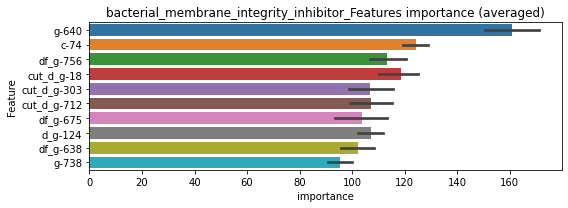

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000307134	valid_1's binary_logloss: 0.000912951
Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000287279	valid_1's binary_logloss: 0.000874817


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000312053	valid_1's binary_logloss: 0.0023873


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000308105	valid_1's binary_logloss: 0.00054359
Early stopping, best iteration is:
[1343]	training's binary_logloss: 0.000281831	valid_1's binary_logloss: 0.000504535


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000305088	valid_1's binary_logloss: 0.0020209
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000298023	valid_1's binary_logloss: 0.00200608


bacterial_membrane_integrity_inhibitor logloss: 0.0014430549405627861
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408752	valid_1's binary_logloss: 0.00683347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000397346	valid_1's binary_logloss: 0.0103882
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.00116731
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026365, Threshold: 0.0122576, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402611	valid_1's binary_logloss: 0.00399045


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0122576, conf_0:0.00858, conf_1:0.01593
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0422576
threshold: 0.0422576, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000385978	valid_1's binary_logloss: 0.00679559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000422315	valid_1's binary_logloss: 0.00956877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000386704	valid_1's binary_logloss: 0.000901964
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000374152	valid_1's binary_logloss: 0.00509628


y_Threshold: 0.0199874, Threshold: 0.0422576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00130
Num_p_label: 32.0, Expected: 5.2, Threshold: 0.0422576, conf_0:0.03381, conf_1:0.05071
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0722576
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.1022576
threshold: 0.1022576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000389009	valid_1's binary_logloss: 0.0077523
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383834	valid_1's binary_logloss: 0.00234204
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384846	valid_1's binary_logloss: 0.00187084
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371260, Threshold: 0.1022576, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000375328	valid_1's binary_logloss: 0.00146123


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.1022576, conf_0:0.09203, conf_1:0.11248
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.1322576
threshold: 0.1322576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


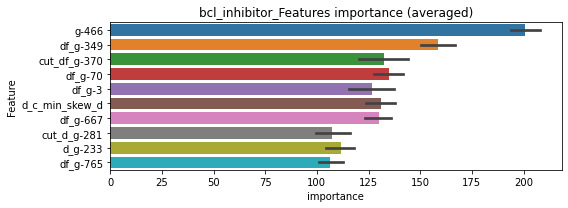

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000420422	valid_1's binary_logloss: 0.00453429
Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.000380257	valid_1's binary_logloss: 0.00440312


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000466281	valid_1's binary_logloss: 0.0032589


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000427828	valid_1's binary_logloss: 0.00239945
Early stopping, best iteration is:
[1243]	training's binary_logloss: 0.000389134	valid_1's binary_logloss: 0.00231707


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000425582	valid_1's binary_logloss: 0.00161126
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000384614	valid_1's binary_logloss: 0.00151639


bcl_inhibitor logloss: 0.002874456968712847
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000443812	valid_1's binary_logloss: 0.010414
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000444016	valid_1's binary_logloss: 0.00490266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000452303	valid_1's binary_logloss: 0.00119795
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029941, Threshold: 0.0555999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000461322	valid_1's binary_logloss: 0.00714455


Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0555999, conf_0:0.03892, conf_1:0.07228
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_1: 0.0855999
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1155999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1455999
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_4: 0.1755999
threshold: 0.1755999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000427973	valid_1's binary_logloss: 0.0105043
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00448414
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000438151	valid_1's binary_logloss: 0.00113687
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427603	valid_1's binary_logloss: 0.00742258


y_Threshold: 0.0291257, Threshold: 0.1755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1755999, conf_0:0.14048, conf_1:0.21072
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_1: 0.2055999
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.2355999
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2655999
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_4: 0.2955999
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.3255999
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_6: 0.3555999
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3855999
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.4155999
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_9: 0.4455999
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4755999
threshold: 0.4755999, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3803, y_label_rate: 0.1722

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000424348	valid_1's binary_logloss: 0.00365446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000575075	valid_1's binary_logloss: 0.00919752
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430526	valid_1's binary_logloss: 0.008626
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0583727, Threshold: 0.4755999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000445661	valid_1's binary_logloss: 0.00336214


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4755999, conf_0:0.42804, conf_1:0.52316
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_1: 0.5055999
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5355999
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_3: 0.5655999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_4: 0.5955999
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6255999
threshold: 0.6255999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


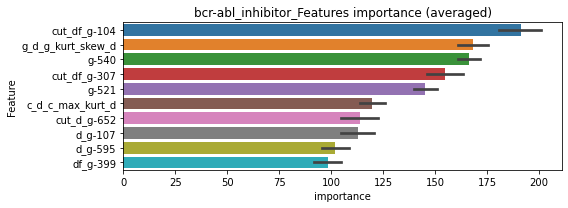

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000479065	valid_1's binary_logloss: 0.00429111
Early stopping, best iteration is:
[1183]	training's binary_logloss: 0.00043713	valid_1's binary_logloss: 0.00414017


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000486058	valid_1's binary_logloss: 0.00327311
Early stopping, best iteration is:
[1272]	training's binary_logloss: 0.00043133	valid_1's binary_logloss: 0.0031098


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000485862	valid_1's binary_logloss: 0.0050731
Early stopping, best iteration is:
[1283]	training's binary_logloss: 0.000434353	valid_1's binary_logloss: 0.00490843


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000490452	valid_1's binary_logloss: 0.00217944
Early stopping, best iteration is:
[1220]	training's binary_logloss: 0.000441609	valid_1's binary_logloss: 0.00206885


bcr-abl_inhibitor logloss: 0.0035582128250638704
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00115052	valid_1's binary_logloss: 0.0293143
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00079441	valid_1's binary_logloss: 0.0323256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000570989	valid_1's binary_logloss: 0.010798
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000764153	valid_1's binary_logloss: 0.0247641


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0073642, Threshold: 0.0170939, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0170939, conf_0:0.01197, conf_1:0.02222
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_1: 0.0470939
threshold: 0.0470939, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000551734	valid_1's binary_logloss: 0.0258099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548367	valid_1's binary_logloss: 0.0222416
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000553218	valid_1's binary_logloss: 0.00818272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000563427	valid_1's binary_logloss: 0.0113462


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0295066, Threshold: 0.0470939, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, Expected: 11.2, Threshold: 0.0470939, conf_0:0.03768, conf_1:0.05651
Num_p_label: 12.0, Expected: 11.2, Adj_threshold_1: 0.0770939
threshold: 0.0770939, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000551734	valid_1's binary_logloss: 0.0258099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548367	valid_1's binary_logloss: 0.0222416
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000553218	valid_1's binary_logloss: 0.00818272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000563427	valid_1's binary_logloss: 0.0113462


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0295066, Threshold: 0.0770939, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0030136 Vs.target_rate: 0.00281
Num_p_label: 12.0, Expected: 11.2, Threshold: 0.0770939, conf_0:0.06938, conf_1:0.08480
threshold: 0.0770939, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3799, y_label_rate: 0.1721506


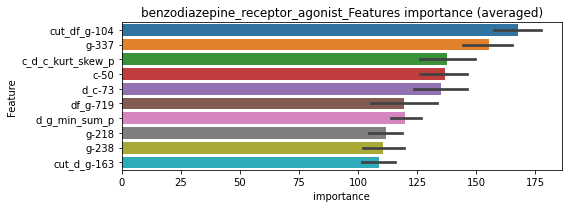

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000836309	valid_1's binary_logloss: 0.0234822


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000764062	valid_1's binary_logloss: 0.0211709


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000726698	valid_1's binary_logloss: 0.00836011
Early stopping, best iteration is:
[1181]	training's binary_logloss: 0.000637917	valid_1's binary_logloss: 0.00806085


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000719937	valid_1's binary_logloss: 0.0114693
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.000602175	valid_1's binary_logloss: 0.0109826


benzodiazepine_receptor_agonist logloss: 0.01592544011877285
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000356796	valid_1's binary_logloss: 0.00141694
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000357528	valid_1's binary_logloss: 0.00417412
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000360692	valid_1's binary_logloss: 0.0010827
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017754, Threshold: 0.0087557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00524421


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087557, conf_0:0.00613, conf_1:0.01138
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387557
threshold: 0.0387557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0387557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00101
Num_p_label: 20.0, Expected: 4.0, Threshold: 0.0387557, conf_0:0.03100, conf_1:0.04651
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0687557
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0987557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0987557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0987557, conf_0:0.08888, conf_1:0.10863


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


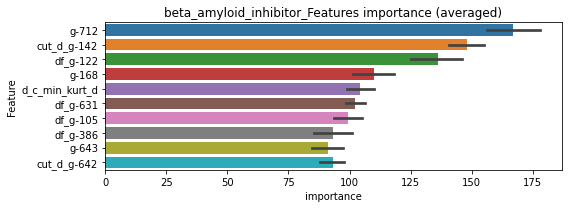

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00038886	valid_1's binary_logloss: 0.00162784
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.000363361	valid_1's binary_logloss: 0.00159832


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000413853	valid_1's binary_logloss: 0.00406893


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000391575	valid_1's binary_logloss: 0.00110916
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.00036466	valid_1's binary_logloss: 0.00105611


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000383836	valid_1's binary_logloss: 0.00499199
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000381551	valid_1's binary_logloss: 0.00497933


beta_amyloid_inhibitor logloss: 0.0029256749898163956
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000867677	valid_1's binary_logloss: 0.0344369
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000642748	valid_1's binary_logloss: 0.0299681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00060665	valid_1's binary_logloss: 0.00723085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000640489	valid_1's binary_logloss: 0.017084


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061636, Threshold: 0.0155127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0155127, conf_0:0.01086, conf_1:0.02017
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0455127
threshold: 0.0455127, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000619576	valid_1's binary_logloss: 0.0308355
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00061629	valid_1's binary_logloss: 0.0223882
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000593247	valid_1's binary_logloss: 0.00595997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000579125	valid_1's binary_logloss: 0.0159572


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290634, Threshold: 0.0455127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00286
Num_p_label: 21.0, Expected: 11.4, Threshold: 0.0455127, conf_0:0.03641, conf_1:0.05462
Num_p_label: 14.0, Expected: 11.4, Adj_threshold_1: 0.0755127
threshold: 0.0755127, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00087384	valid_1's binary_logloss: 0.0256119
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000656669	valid_1's binary_logloss: 0.0278025
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000605546	valid_1's binary_logloss: 0.0127411
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000724385	valid_1's binary_logloss: 0.0206871


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0300103, Threshold: 0.0755127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0032647 Vs.target_rate: 0.00286
Num_p_label: 13.0, Expected: 11.4, Threshold: 0.0755127, conf_0:0.06796, conf_1:0.08306
threshold: 0.0755127, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


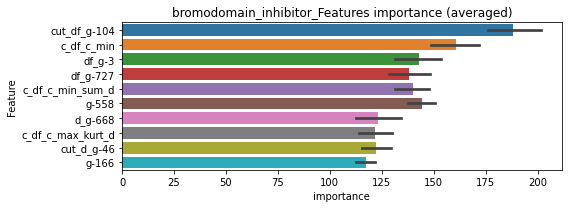

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000969657	valid_1's binary_logloss: 0.0231809


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00131872	valid_1's binary_logloss: 0.0251576
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000748812	valid_1's binary_logloss: 0.0156432
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000704986	valid_1's binary_logloss: 0.0153648


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000757836	valid_1's binary_logloss: 0.014129
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000639399	valid_1's binary_logloss: 0.0136593


bromodomain_inhibitor logloss: 0.019343174408306813
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399742	valid_1's binary_logloss: 0.00770931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000399078	valid_1's binary_logloss: 0.00376342
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000392236	valid_1's binary_logloss: 0.00190306
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383595	valid_1's binary_logloss: 0.0019679


y_Threshold: 0.0029157, Threshold: 0.0223795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0223795, conf_0:0.01567, conf_1:0.02909
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0523795
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0823795
threshold: 0.0823795, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


y_Threshold: 0.0178647, Threshold: 0.0823795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, Expected: 4.8, Threshold: 0.0823795, conf_0:0.06590, conf_1:0.09886
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.1123795
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.1423795
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.1423795, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, Expected: 4.8, Threshold: 0.1423795, conf_0:0.12814, conf_1:0.15662
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


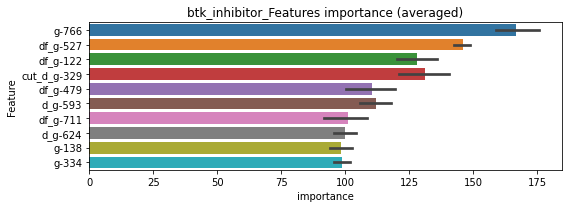

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000511774	valid_1's binary_logloss: 0.00728746


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000450859	valid_1's binary_logloss: 0.00311594
Early stopping, best iteration is:
[1313]	training's binary_logloss: 0.000388639	valid_1's binary_logloss: 0.00299968


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000451417	valid_1's binary_logloss: 0.00139969
Early stopping, best iteration is:
[1410]	training's binary_logloss: 0.000383123	valid_1's binary_logloss: 0.00128391


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000446428	valid_1's binary_logloss: 0.00206404
Early stopping, best iteration is:
[1470]	training's binary_logloss: 0.000375402	valid_1's binary_logloss: 0.00188332


btk_inhibitor logloss: 0.0033637691282648427
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000247461	valid_1's binary_logloss: 0.000948648
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000253546	valid_1's binary_logloss: 0.00125534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000252139	valid_1's binary_logloss: 0.000373391
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011931, Threshold: 0.0145597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0145597, conf_0:0.01019, conf_1:0.01893
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0445597
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0745597
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1045597


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247754	valid_1's binary_logloss: 0.000913194


threshold: 0.1045597, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.1045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, Expected: 2.0, Threshold: 0.1045597, conf_0:0.08365, conf_1:0.12547
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.1345597
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1645597
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1945597
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2245597
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2545597
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2845597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3145597
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3445597
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_9: 0.3745597
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_10: 0.4045597
threshold: 0.4045597, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.4045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.4045597, conf_0:0.36410, conf_1:0.44502
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.4345597
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.4645597
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4945597
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5245597
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.5545597
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.5845597
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.6145597
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6445597
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6745597
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7045597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


threshold: 0.7045597, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


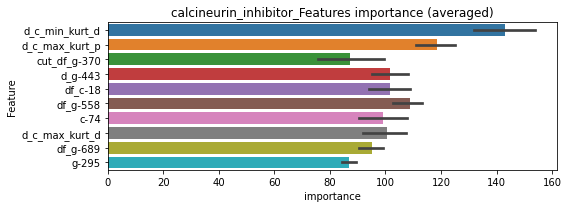

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000245013	valid_1's binary_logloss: 0.000428743
Early stopping, best iteration is:
[1167]	training's binary_logloss: 0.000236066	valid_1's binary_logloss: 0.00041521


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000245812	valid_1's binary_logloss: 0.00100246
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000237962	valid_1's binary_logloss: 0.000981845


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000246549	valid_1's binary_logloss: 0.000370657
Early stopping, best iteration is:
[1179]	training's binary_logloss: 0.000236898	valid_1's binary_logloss: 0.000357575


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000246556	valid_1's binary_logloss: 0.000641879
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000242328	valid_1's binary_logloss: 0.000633421


calcineurin_inhibitor logloss: 0.0005970126500466184


mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0869204	valid_1's binary_logloss: 0.153736
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.0784678	valid_1's binary_logloss: 0.152235
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0865305	valid_1's binary_logloss: 0.159911
Early stopping, best iteration is:
[1235]	training's binary_logloss: 0.0746011	valid_1's binary_logloss: 0.157746
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0899071	valid_1's binary_logloss: 0.137541
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.0696426	valid_1's binary_logloss: 0.13371
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0865798	valid_1's binary_logloss: 0.153332
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.0862723	valid_1's binary_log

1 / 3, AUC score:0.939, PR-AUC:0.896
y_Threshold: 0.0759099, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 652 → Positive_corect_labels: 1081/7022
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.07279, conf_1:0.13517
threshold: 0.1039786, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1081.0/7022, y_label_rate: 0.1539447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421325	valid_1's binary_logloss: 0.0536676
[2000]	training's binary_logloss: 0.023056	valid_1's binary_logloss: 0.0448012
[3000]	training's binary_logloss: 0.0151908	valid_1's binary_logloss: 0.0414664
Early stopping, best iteration is:
[3099]	training's binary_logloss: 0.0146885	valid_1's binary_logloss: 0.0412589
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0403922	valid_1's binary_logloss: 0.0634914
[2000]	training's binary_logloss: 0.0223285	valid_1's binary_logloss: 0.0550673
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0212648	valid_1's binary_logloss: 0.0547268
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.039844	valid_1's binary_logloss: 0.0699165
[2000]	training's binary_logloss: 0.0216679	valid_1's binary_logloss: 0.0623796
Early stopping, best iteratio

2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0514582, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1024.0/6908
p_label_rate: 0.0012557 Vs.target_rate: 0.01180
Num_p_label: 5.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.08318, conf_1:0.12477
threshold: 0.1039786, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1024.0/6908, y_label_rate: 0.1482339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233792	valid_1's binary_logloss: 0.0305665
[2000]	training's binary_logloss: 0.0128993	valid_1's binary_logloss: 0.0224849
[3000]	training's binary_logloss: 0.00868831	valid_1's binary_logloss: 0.0197699
[4000]	training's binary_logloss: 0.00645643	valid_1's binary_logloss: 0.0183936
Early stopping, best iteration is:
[4555]	training's binary_logloss: 0.00563718	valid_1's binary_logloss: 0.0178442
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0219056	valid_1's binary_logloss: 0.0400968
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0124575	valid_1's binary_logloss: 0.0333469
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0214698	valid_1's binary_logloss: 0.0400391
[2000]	training's binary_logloss: 0.0116899	valid_1's binary_logloss: 0.0328435
[3000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0354649, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 1009.0/6878
p_label_rate: 0.0000000 Vs.target_rate: 0.01180
Num_p_label: 0.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.09358, conf_1:0.11438
threshold: 0.1039786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1009.0/6878, y_label_rate: 0.1466996


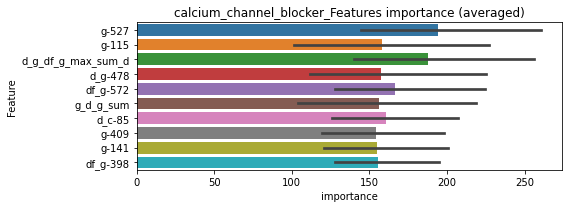

len(train_index) : 5158
len(valid_index) : 1720
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271901	valid_1's binary_logloss: 0.0294426
[2000]	training's binary_logloss: 0.0138382	valid_1's binary_logloss: 0.01604
[3000]	training's binary_logloss: 0.0094149	valid_1's binary_logloss: 0.0117525
[4000]	training's binary_logloss: 0.0071559	valid_1's binary_logloss: 0.00964343
[5000]	training's binary_logloss: 0.00578542	valid_1's binary_logloss: 0.00836148
[6000]	training's binary_logloss: 0.00484267	valid_1's binary_logloss: 0.00748139
[7000]	training's binary_logloss: 0.00417134	valid_1's binary_logloss: 0.00684555
[8000]	training's binary_logloss: 0.0036707	valid_1's binary_logloss: 0.00635539
[9000]	training's binary_logloss: 0.00327722	valid_1's binary_logloss: 0.00598567
[10000]	training's binary_logloss: 0.00296661	valid_1's binary_logloss: 0.00568709
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00296661	valid_1's binary_logloss: 0.005687

len(train_index) : 5158
len(valid_index) : 1720
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0265792	valid_1's binary_logloss: 0.0324387
[2000]	training's binary_logloss: 0.013315	valid_1's binary_logloss: 0.0190331
[3000]	training's binary_logloss: 0.00902045	valid_1's binary_logloss: 0.0148125
[4000]	training's binary_logloss: 0.0068342	valid_1's binary_logloss: 0.0127657
[5000]	training's binary_logloss: 0.00552556	valid_1's binary_logloss: 0.0115942
[6000]	training's binary_logloss: 0.00463367	valid_1's binary_logloss: 0.0107627
[7000]	training's binary_logloss: 0.00399943	valid_1's binary_logloss: 0.0102407
[8000]	training's binary_logloss: 0.00352011	valid_1's binary_logloss: 0.00980371
[9000]	training's binary_logloss: 0.00314175	valid_1's binary_logloss: 0.00948209
Early stopping, best iteration is:
[9360]	training's binary_logloss: 0.00302323	valid_1's binary_logloss: 0.00939605


len(train_index) : 5159
len(valid_index) : 1719
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251002	valid_1's binary_logloss: 0.0396
[2000]	training's binary_logloss: 0.0122925	valid_1's binary_logloss: 0.0263855
[3000]	training's binary_logloss: 0.00825687	valid_1's binary_logloss: 0.0222189
[4000]	training's binary_logloss: 0.00622109	valid_1's binary_logloss: 0.0203168
[5000]	training's binary_logloss: 0.00502933	valid_1's binary_logloss: 0.0193944
[6000]	training's binary_logloss: 0.00421151	valid_1's binary_logloss: 0.0185553
Early stopping, best iteration is:
[6775]	training's binary_logloss: 0.00374692	valid_1's binary_logloss: 0.0181748


len(train_index) : 5159
len(valid_index) : 1719
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.026957	valid_1's binary_logloss: 0.03535
[2000]	training's binary_logloss: 0.0136714	valid_1's binary_logloss: 0.0210442
[3000]	training's binary_logloss: 0.00928243	valid_1's binary_logloss: 0.0164705
[4000]	training's binary_logloss: 0.00704712	valid_1's binary_logloss: 0.0142282
[5000]	training's binary_logloss: 0.00570624	valid_1's binary_logloss: 0.0129509
[6000]	training's binary_logloss: 0.00478422	valid_1's binary_logloss: 0.0120225
[7000]	training's binary_logloss: 0.00412272	valid_1's binary_logloss: 0.0113931
[8000]	training's binary_logloss: 0.00362712	valid_1's binary_logloss: 0.0108912
[9000]	training's binary_logloss: 0.00323669	valid_1's binary_logloss: 0.010511
Early stopping, best iteration is:
[9360]	training's binary_logloss: 0.00311353	valid_1's binary_logloss: 0.010394


calcium_channel_blocker logloss: 0.010912000659576631
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00048955	valid_1's binary_logloss: 0.0146271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000507104	valid_1's binary_logloss: 0.00580496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000481259	valid_1's binary_logloss: 0.00243359
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000506884	valid_1's binary_logloss: 0.00998499


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037238, Threshold: 0.0146638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0146638, conf_0:0.01026, conf_1:0.01906
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_1: 0.0446638
threshold: 0.0446638, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.0446638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0446638, conf_0:0.03573, conf_1:0.05360
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.0746638
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.1046638
threshold: 0.1046638, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.1046638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00176
Num_p_label: 11.0, Expected: 7.0, Threshold: 0.1046638, conf_0:0.09420, conf_1:0.11513
threshold: 0.1046638, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


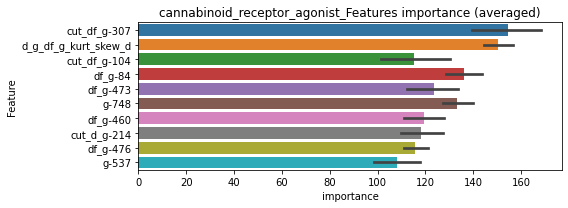

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000538398	valid_1's binary_logloss: 0.0130954
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.00053109	valid_1's binary_logloss: 0.0130666


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000587307	valid_1's binary_logloss: 0.00690629


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000557002	valid_1's binary_logloss: 0.00235373
Early stopping, best iteration is:
[1266]	training's binary_logloss: 0.000487918	valid_1's binary_logloss: 0.00215138


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000598238	valid_1's binary_logloss: 0.00861915


cannabinoid_receptor_agonist logloss: 0.0076858433509517385
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00162379	valid_1's binary_logloss: 0.0285605
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000549732	valid_1's binary_logloss: 0.0192662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000541675	valid_1's binary_logloss: 0.00961959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000612026	valid_1's binary_logloss: 0.0255456


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057189, Threshold: 0.0206289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0206289, conf_0:0.01444, conf_1:0.02682
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0506289
threshold: 0.0506289, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00101858	valid_1's binary_logloss: 0.0271532
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000576581	valid_1's binary_logloss: 0.0109615
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522432	valid_1's binary_logloss: 0.00927225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000528634	valid_1's binary_logloss: 0.0162774


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188368, Threshold: 0.0506289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, Expected: 9.2, Threshold: 0.0506289, conf_0:0.04050, conf_1:0.06075
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.0806289
threshold: 0.0806289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000567135	valid_1's binary_logloss: 0.0160821
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000646142	valid_1's binary_logloss: 0.0109647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000526838	valid_1's binary_logloss: 0.00679273
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00056509	valid_1's binary_logloss: 0.0160983


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130921, Threshold: 0.0806289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0806289, conf_0:0.07257, conf_1:0.08869
threshold: 0.0806289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


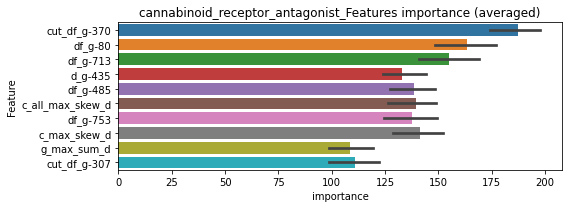

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000768656	valid_1's binary_logloss: 0.0148163


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00119417	valid_1's binary_logloss: 0.0229452
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000631367	valid_1's binary_logloss: 0.00470372
Early stopping, best iteration is:
[1389]	training's binary_logloss: 0.000521599	valid_1's binary_logloss: 0.00439758


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00061879	valid_1's binary_logloss: 0.0110647
Early stopping, best iteration is:
[1266]	training's binary_logloss: 0.000532795	valid_1's binary_logloss: 0.0107191


cannabinoid_receptor_antagonist logloss: 0.013221066793635742
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467783	valid_1's binary_logloss: 0.00697155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000485256	valid_1's binary_logloss: 0.00394066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000457815	valid_1's binary_logloss: 0.00172856
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032689, Threshold: 0.0261061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000488864	valid_1's binary_logloss: 0.0133226


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0261061, conf_0:0.01827, conf_1:0.03394
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0561061
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0861061
threshold: 0.0861061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.0861061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0861061, conf_0:0.06888, conf_1:0.10333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1161061
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1461061
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1761061
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.2061061
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.2061061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2061061, conf_0:0.18550, conf_1:0.22672
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


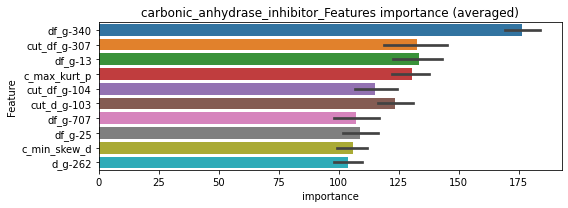

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000503013	valid_1's binary_logloss: 0.00585135
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000469938	valid_1's binary_logloss: 0.00571381


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000507358	valid_1's binary_logloss: 0.00322016
Early stopping, best iteration is:
[1219]	training's binary_logloss: 0.000461542	valid_1's binary_logloss: 0.00314934


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000514414	valid_1's binary_logloss: 0.00159748
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000472774	valid_1's binary_logloss: 0.00150098


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000496906	valid_1's binary_logloss: 0.0126294
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000463622	valid_1's binary_logloss: 0.0125459


carbonic_anhydrase_inhibitor logloss: 0.005727509491884991
casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039819	valid_1's binary_logloss: 0.00840014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390586	valid_1's binary_logloss: 0.00311233
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000409055	valid_1's binary_logloss: 0.00124985
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000398678	valid_1's binary_logloss: 0.0124354


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022210, Threshold: 0.0057150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0057150, conf_0:0.00400, conf_1:0.00743
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0357150
threshold: 0.0357150, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.02857, conf_1:0.04286
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.03214, conf_1:0.03929
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


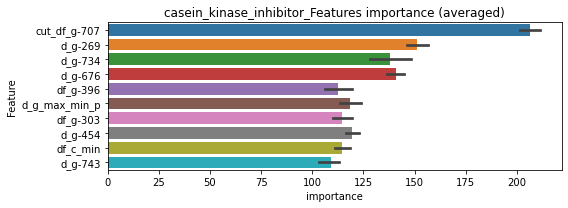

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000446461	valid_1's binary_logloss: 0.00742967
Early stopping, best iteration is:
[1324]	training's binary_logloss: 0.000388193	valid_1's binary_logloss: 0.00718795


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000459916	valid_1's binary_logloss: 0.00285763
Early stopping, best iteration is:
[1451]	training's binary_logloss: 0.000388066	valid_1's binary_logloss: 0.00268199


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000464067	valid_1's binary_logloss: 0.00134482
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.000400459	valid_1's binary_logloss: 0.00122555


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000491915	valid_1's binary_logloss: 0.0105203


casein_kinase_inhibitor logloss: 0.005403999713710783
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000291714	valid_1's binary_logloss: 0.001666
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293028	valid_1's binary_logloss: 0.00124441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002972	valid_1's binary_logloss: 0.00183409
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013201, Threshold: 0.0154419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0154419, conf_0:0.01081, conf_1:0.02007
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0454419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0754419
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1054419
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1354419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1654419


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.000711778


threshold: 0.1654419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.1654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, Expected: 3.0, Threshold: 0.1654419, conf_0:0.13235, conf_1:0.19853
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.1954419
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2254419
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2554419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2854419
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3154419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3454419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3754419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4054419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4354419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.4654419
threshold: 0.4654419, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.4654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00076
Num_p_label: 10.0, Expected: 3.0, Threshold: 0.4654419, conf_0:0.41890, conf_1:0.51199
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.4954419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.5254419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


threshold: 0.5254419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


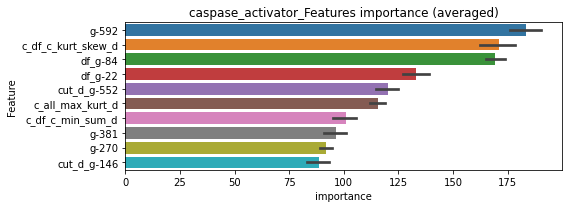

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000302762	valid_1's binary_logloss: 0.000704342
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.000284713	valid_1's binary_logloss: 0.000677667


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000302822	valid_1's binary_logloss: 0.00083695
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.000286972	valid_1's binary_logloss: 0.000805645


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000302674	valid_1's binary_logloss: 0.00187585
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000304072	valid_1's binary_logloss: 0.00187399


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000302576	valid_1's binary_logloss: 0.000611077
Early stopping, best iteration is:
[1258]	training's binary_logloss: 0.00028395	valid_1's binary_logloss: 0.0005807


caspase_activator logloss: 0.000984374078584476
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000300892	valid_1's binary_logloss: 0.00235806
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030148	valid_1's binary_logloss: 0.00129317
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000301082	valid_1's binary_logloss: 0.000533716
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016696, Threshold: 0.0090984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090984, conf_0:0.00637, conf_1:0.01183
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390984


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00030142	valid_1's binary_logloss: 0.00746218


threshold: 0.0390984, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.0390984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.0390984, conf_0:0.03128, conf_1:0.04692
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0690984
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0990984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1290984


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.1290984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1290984, conf_0:0.11619, conf_1:0.14201
threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


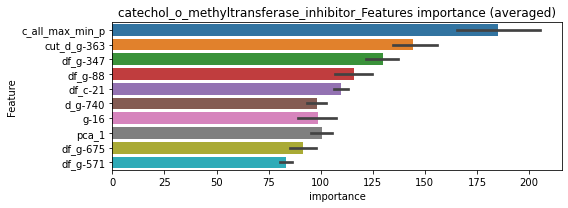

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315073	valid_1's binary_logloss: 0.00111095
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000296767	valid_1's binary_logloss: 0.00107377


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314812	valid_1's binary_logloss: 0.0010671
Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.000297942	valid_1's binary_logloss: 0.00103092


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000316032	valid_1's binary_logloss: 0.000457689
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.000300465	valid_1's binary_logloss: 0.000436746


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000307886	valid_1's binary_logloss: 0.00501929
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.00029642	valid_1's binary_logloss: 0.00498312


catechol_o_methyltransferase_inhibitor logloss: 0.001881765554559519
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.063953	valid_1's binary_logloss: 0.134965
Early stopping, best iteration is:
[1207]	training's binary_logloss: 0.0557617	valid_1's binary_logloss: 0.132534
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0676769	valid_1's binary_logloss: 0.118062
[2000]	training's binary_logloss: 0.038928	valid_1's binary_logloss: 0.106608
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0370608	valid_1's binary_logloss: 0.105866
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0713919	valid_1's binary_logloss: 0.0946517
[2000]	training's binary_logloss: 0.0406448	valid_1's binary_logloss: 0.0814301
Early stopping, best iteration is:
[2542]	training's binary_logloss: 0.0321582	valid_1's binary_logloss: 0.0789195
Training until validation scores don't improve for 29 rounds
[1000]	training's 

1 / 3, AUC score:0.981, PR-AUC:0.960
y_Threshold: 0.0534689, Threshold: 0.1039200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 222 → Positive_corect_labels: 610/3710
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1039200, conf_0:0.07274, conf_1:0.13510
Num_p_label: 14.0, Expected: 17.1, Adj_threshold_1: 0.1339200
threshold: 0.1339200, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 610.0/3710, y_label_rate: 0.1644205
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0488884	valid_1's binary_logloss: 0.0701609
[2000]	training's binary_logloss: 0.0268323	valid_1's binary_logloss: 0.0574884
[3000]	training's binary_logloss: 0.0179855	valid_1's binary_logloss: 0.0534585
Early stopping, best iteration is:
[3069]	training's binary_logloss: 0.0175644	valid_1's binary_logloss: 0.0533452
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0441449	valid_1's binary_logloss: 0.0914508
Early stopping, best iteration is:
[1720]	training's binary_logloss: 0.0280565	valid_1's binary_logloss: 0.0826566
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0490349	valid_1's binary_logloss: 0.0663921
[2000]	training's binary_logloss: 0.0271511	valid_1's binary_logloss: 0.0541338
[3000]	training's binary_logloss: 0.0180726	valid_1's binary_logloss: 0.0495955
Early stopping, best iterat

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0560693, Threshold: 0.1339200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 585.0/3660
p_label_rate: 0.0072828 Vs.target_rate: 0.00428
Num_p_label: 29.0, Expected: 17.1, Threshold: 0.1339200, conf_0:0.10714, conf_1:0.16070
Num_p_label: 17.0, Expected: 17.1, Adj_threshold_1: 0.1639200
threshold: 0.1639200, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 585.0/3660, y_label_rate: 0.1598361
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0352722	valid_1's binary_logloss: 0.0540861
[2000]	training's binary_logloss: 0.0191674	valid_1's binary_logloss: 0.041266
[3000]	training's binary_logloss: 0.013012	valid_1's binary_logloss: 0.0369131
Early stopping, best iteration is:
[3962]	training's binary_logloss: 0.00989647	valid_1's binary_logloss: 0.0349024
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0361347	valid_1's binary_logloss: 0.0548516
[2000]	training's binary_logloss: 0.01971	valid_1's binary_logloss: 0.0428956
Early stopping, best iteration is:
[2868]	training's binary_logloss: 0.0139873	valid_1's binary_logloss: 0.039263
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0358717	valid_1's binary_logloss: 0.0536767
[2000]	training's binary_logloss: 0.0195256	valid_1's binary_logloss: 0.0403372
[3000]	training's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0546691, Threshold: 0.1639200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 573.0/3636
p_label_rate: 0.0062783 Vs.target_rate: 0.00428
Num_p_label: 25.0, Expected: 17.1, Threshold: 0.1639200, conf_0:0.14753, conf_1:0.18031
threshold: 0.1639200, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 573.0/3636, y_label_rate: 0.1575908


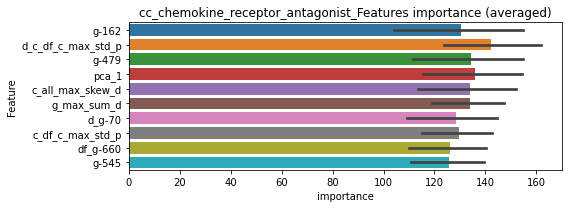

len(train_index) : 2727
len(valid_index) : 909
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.040911	valid_1's binary_logloss: 0.0562107
[2000]	training's binary_logloss: 0.0222703	valid_1's binary_logloss: 0.03783
[3000]	training's binary_logloss: 0.0153365	valid_1's binary_logloss: 0.0314917
[4000]	training's binary_logloss: 0.011679	valid_1's binary_logloss: 0.0283408
[5000]	training's binary_logloss: 0.00939501	valid_1's binary_logloss: 0.0264222
[6000]	training's binary_logloss: 0.00785425	valid_1's binary_logloss: 0.0250792
[7000]	training's binary_logloss: 0.00675665	valid_1's binary_logloss: 0.0241971
Early stopping, best iteration is:
[7048]	training's binary_logloss: 0.00671245	valid_1's binary_logloss: 0.0241632


len(train_index) : 2727
len(valid_index) : 909
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0406782	valid_1's binary_logloss: 0.0581582
[2000]	training's binary_logloss: 0.0218726	valid_1's binary_logloss: 0.0411941
[3000]	training's binary_logloss: 0.0150233	valid_1's binary_logloss: 0.0357338
[4000]	training's binary_logloss: 0.0114226	valid_1's binary_logloss: 0.0331303
[5000]	training's binary_logloss: 0.00920335	valid_1's binary_logloss: 0.031633
Early stopping, best iteration is:
[4996]	training's binary_logloss: 0.00921079	valid_1's binary_logloss: 0.0316266


len(train_index) : 2727
len(valid_index) : 909
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0427007	valid_1's binary_logloss: 0.0514078
[2000]	training's binary_logloss: 0.0237956	valid_1's binary_logloss: 0.0319514
[3000]	training's binary_logloss: 0.0164663	valid_1's binary_logloss: 0.0248757
[4000]	training's binary_logloss: 0.0125655	valid_1's binary_logloss: 0.0213566
[5000]	training's binary_logloss: 0.0101207	valid_1's binary_logloss: 0.0190931
[6000]	training's binary_logloss: 0.00846051	valid_1's binary_logloss: 0.0174468
[7000]	training's binary_logloss: 0.00727101	valid_1's binary_logloss: 0.0162859
[8000]	training's binary_logloss: 0.00638922	valid_1's binary_logloss: 0.0154234
[9000]	training's binary_logloss: 0.00568968	valid_1's binary_logloss: 0.0147213
[10000]	training's binary_logloss: 0.00514183	valid_1's binary_logloss: 0.0141776
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00514183	valid_1's binary_logloss: 0.0141776


len(train_index) : 2727
len(valid_index) : 909
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0416602	valid_1's binary_logloss: 0.0532605
[2000]	training's binary_logloss: 0.0229532	valid_1's binary_logloss: 0.0354684
[3000]	training's binary_logloss: 0.0158794	valid_1's binary_logloss: 0.0294529
[4000]	training's binary_logloss: 0.012101	valid_1's binary_logloss: 0.026502
[5000]	training's binary_logloss: 0.00975016	valid_1's binary_logloss: 0.0246884
Early stopping, best iteration is:
[5366]	training's binary_logloss: 0.00910393	valid_1's binary_logloss: 0.0241759


cc_chemokine_receptor_antagonist logloss: 0.02353580541684879
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000309292	valid_1's binary_logloss: 0.00163279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000312886	valid_1's binary_logloss: 0.00216559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000306231	valid_1's binary_logloss: 0.000886177
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013995, Threshold: 0.0032761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032761, conf_0:0.00229, conf_1:0.00426
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332761


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000311249	valid_1's binary_logloss: 0.000914939


threshold: 0.0332761, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02662, conf_1:0.03993


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02995, conf_1:0.03660


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


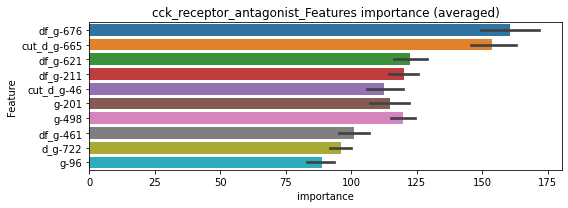

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000333464	valid_1's binary_logloss: 0.00102272
Early stopping, best iteration is:
[1264]	training's binary_logloss: 0.000305812	valid_1's binary_logloss: 0.000965034


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000330268	valid_1's binary_logloss: 0.00175732
Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000304512	valid_1's binary_logloss: 0.00169005


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000337364	valid_1's binary_logloss: 0.000651704
Early stopping, best iteration is:
[1391]	training's binary_logloss: 0.000301382	valid_1's binary_logloss: 0.000596135


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000335118	valid_1's binary_logloss: 0.000812444
Early stopping, best iteration is:
[1363]	training's binary_logloss: 0.000301017	valid_1's binary_logloss: 0.000750176


cck_receptor_antagonist logloss: 0.0010005383048409253


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0224934	valid_1's binary_logloss: 0.138341
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.0158639	valid_1's binary_logloss: 0.13248
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.0173987	valid_1's binary_logloss: 0.141291
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.964, PR-AUC:0.934
y_Threshold: 0.0414128, Threshold: 0.0588798, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0245295	valid_1's binary_logloss: 0.146884


Remove_noisy_data: 620 → Positive_corect_labels: 1358/8479
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04122, conf_1:0.07654
threshold: 0.0588798, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1358.0/8479, y_label_rate: 0.1601604
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00698076	valid_1's binary_logloss: 0.0782604
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00713723	valid_1's binary_logloss: 0.081442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00619199	valid_1's binary_logloss: 0.0742652
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00623151	valid_1's binary_logloss: 0.0808613


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0361790, Threshold: 0.0588798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 1282.0/8327
p_label_rate: 0.0055249 Vs.target_rate: 0.01478
Num_p_label: 22.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04710, conf_1:0.07066
threshold: 0.0588798, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1282.0/8327, y_label_rate: 0.1539570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00453085	valid_1's binary_logloss: 0.0611776
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00532288	valid_1's binary_logloss: 0.0497872
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00163855	valid_1's binary_logloss: 0.0363986
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0310620, Threshold: 0.0588798, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00474696	valid_1's binary_logloss: 0.0523011


Remove_noisy_data: 72 → Positive_corect_labels: 1246.0/8255
p_label_rate: 0.0042692 Vs.target_rate: 0.01478
Num_p_label: 17.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.05299, conf_1:0.06477
threshold: 0.0588798, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1246.0/8255, y_label_rate: 0.1509388


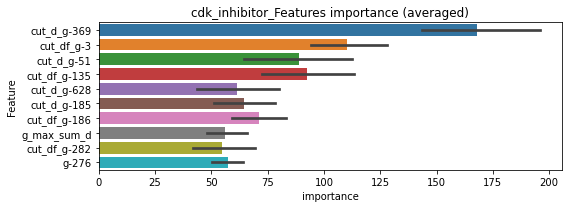

len(train_index) : 6191
len(valid_index) : 2064
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 6191
len(valid_index) : 2064
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00336099	valid_1's binary_logloss: 0.0374754
Training until validation scores don't improve for 29 rounds


len(train_index) : 6191
len(valid_index) : 2064


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00336765	valid_1's binary_logloss: 0.0393776


================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 6192
len(valid_index) : 2063
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00224113	valid_1's binary_logloss: 0.0245431
Training until validation scores don't improve for 29 rounds


cdk_inhibitor logloss: 0.038325063724818635
cdk_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.0034776	valid_1's binary_logloss: 0.0519107


chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000634091	valid_1's binary_logloss: 0.0241802
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000551893	valid_1's binary_logloss: 0.0164156
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000527497	valid_1's binary_logloss: 0.00492219
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0048108, Threshold: 0.0163525, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000660421	valid_1's binary_logloss: 0.0241797


Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0163525, conf_0:0.01145, conf_1:0.02126
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0463525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0763525
threshold: 0.0763525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000569702	valid_1's binary_logloss: 0.0221034
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000531259	valid_1's binary_logloss: 0.0135341
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00052534	valid_1's binary_logloss: 0.00460284
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000635901	valid_1's binary_logloss: 0.0237219


y_Threshold: 0.0227620, Threshold: 0.0763525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00227
Num_p_label: 27.0, Expected: 9.0, Threshold: 0.0763525, conf_0:0.06108, conf_1:0.09162
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1063525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.1363525
threshold: 0.1363525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520362	valid_1's binary_logloss: 0.00868488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520119	valid_1's binary_logloss: 0.0154487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000522669	valid_1's binary_logloss: 0.0178838
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0230638, Threshold: 0.1363525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000730166	valid_1's binary_logloss: 0.0243716


p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, Expected: 9.0, Threshold: 0.1363525, conf_0:0.12272, conf_1:0.14999
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.1663525
threshold: 0.1663525, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


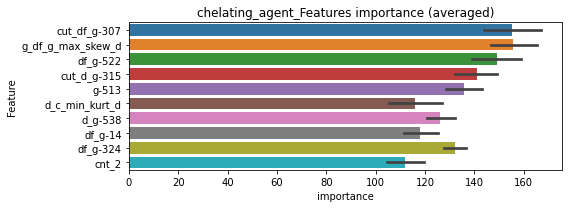

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000608379	valid_1's binary_logloss: 0.00823225
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000568681	valid_1's binary_logloss: 0.00813969


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2846


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000928282	valid_1's binary_logloss: 0.0217191


len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000611121	valid_1's binary_logloss: 0.0081526
Early stopping, best iteration is:
[1247]	training's binary_logloss: 0.000532471	valid_1's binary_logloss: 0.00782698


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000930853	valid_1's binary_logloss: 0.0168753


chelating_agent logloss: 0.013640946320294178
chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000345422	valid_1's binary_logloss: 0.00113867
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000349739	valid_1's binary_logloss: 0.00191171
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000363195	valid_1's binary_logloss: 0.000866409
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027590, Threshold: 0.0524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0524497, conf_0:0.03671, conf_1:0.06818


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000359771	valid_1's binary_logloss: 0.00107256


Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0824497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.1124497
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1424497
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.1724497
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2024497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.2324497
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2624497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2924497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3224497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3524497
threshold: 0.3524497, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.3524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00101
Num_p_label: 36.0, Expected: 4.0, Threshold: 0.3524497, conf_0:0.28196, conf_1:0.42294
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.3824497
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.4124497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4424497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4724497


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 27.0, Expected: 4.0, Adj_threshold_5: 0.5024497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.5324497
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.5624497
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5924497
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6224497
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6524497
threshold: 0.6524497, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.6524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6524497, conf_0:0.58720, conf_1:0.71769
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.6824497
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7124497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7424497


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7724497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.8024497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8324497
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8624497
threshold: 0.8624497, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


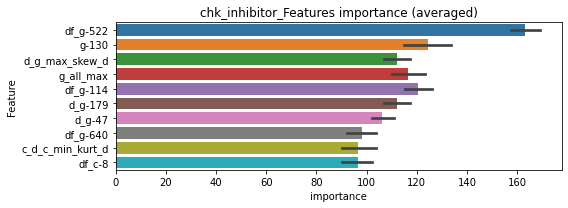

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000363707	valid_1's binary_logloss: 0.000859945
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000349064	valid_1's binary_logloss: 0.00083919


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000360211	valid_1's binary_logloss: 0.00131295
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.00034455	valid_1's binary_logloss: 0.00127894


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000363199	valid_1's binary_logloss: 0.000875114
Early stopping, best iteration is:
[1156]	training's binary_logloss: 0.00034623	valid_1's binary_logloss: 0.000846151


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000359903	valid_1's binary_logloss: 0.00106385
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000345181	valid_1's binary_logloss: 0.00103103


chk_inhibitor logloss: 0.0009988261528614257
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470364	valid_1's binary_logloss: 0.00593944
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466538	valid_1's binary_logloss: 0.0121803
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000472255	valid_1's binary_logloss: 0.00520967
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000469761	valid_1's binary_logloss: 0.00879355


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036083, Threshold: 0.0307272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0307272, conf_0:0.02151, conf_1:0.03995
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0607272
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0907272
threshold: 0.0907272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


y_Threshold: 0.0394437, Threshold: 0.0907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00176
Num_p_label: 62.0, Expected: 7.0, Threshold: 0.0907272, conf_0:0.07258, conf_1:0.10887
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_1: 0.1207272
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_2: 0.1507272
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1807272
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_4: 0.2107272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2407272
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.2707272
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.3007272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3307272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3607272
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3907272
threshold: 0.3907272, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3802, y_label_rate: 0.1722

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.3907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3907272, conf_0:0.35165, conf_1:0.42980
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4207272
threshold: 0.4207272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


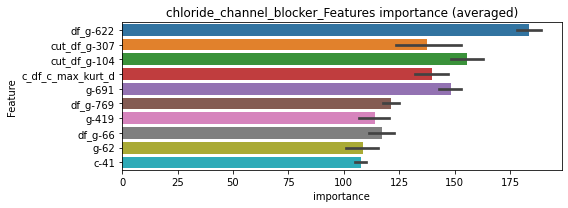

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000520509	valid_1's binary_logloss: 0.0047394
Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.00047173	valid_1's binary_logloss: 0.00455614


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000518227	valid_1's binary_logloss: 0.00745888
Early stopping, best iteration is:
[1174]	training's binary_logloss: 0.000477234	valid_1's binary_logloss: 0.00732646


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000525519	valid_1's binary_logloss: 0.00440615
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000494071	valid_1's binary_logloss: 0.00432037


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000522312	valid_1's binary_logloss: 0.00757047
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000469828	valid_1's binary_logloss: 0.00735961


chloride_channel_blocker logloss: 0.005893871231804769
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000490532	valid_1's binary_logloss: 0.0106264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000510735	valid_1's binary_logloss: 0.0127336
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000490598	valid_1's binary_logloss: 0.00252564
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477508	valid_1's binary_logloss: 0.00833974


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041254, Threshold: 0.0132104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0132104, conf_0:0.00925, conf_1:0.01717
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0432104
threshold: 0.0432104, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03457, conf_1:0.05185
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03889, conf_1:0.04753
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


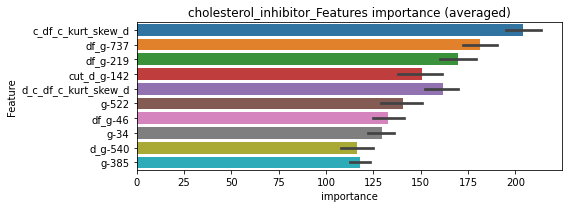

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000557444	valid_1's binary_logloss: 0.0082333
Early stopping, best iteration is:
[1255]	training's binary_logloss: 0.000489329	valid_1's binary_logloss: 0.00809626


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000611788	valid_1's binary_logloss: 0.012246


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000573945	valid_1's binary_logloss: 0.00300366
Early stopping, best iteration is:
[1333]	training's binary_logloss: 0.00049164	valid_1's binary_logloss: 0.00282155


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000564613	valid_1's binary_logloss: 0.00860355
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000553238	valid_1's binary_logloss: 0.00857029


cholesterol_inhibitor logloss: 0.007936131007503289
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.0145485
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00055695	valid_1's binary_logloss: 0.0142857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000580293	valid_1's binary_logloss: 0.0101624
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000758515	valid_1's binary_logloss: 0.0145313


y_Threshold: 0.0044919, Threshold: 0.0097991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0097991, conf_0:0.00686, conf_1:0.01274
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0397991
threshold: 0.0397991, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00053355	valid_1's binary_logloss: 0.0146893
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000525474	valid_1's binary_logloss: 0.0144009
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509151	valid_1's binary_logloss: 0.00973826
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000602406	valid_1's binary_logloss: 0.0138061


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271513, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03184, conf_1:0.04776
threshold: 0.0397991, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000566546	valid_1's binary_logloss: 0.0208555
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000504642	valid_1's binary_logloss: 0.00676098
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000568739	valid_1's binary_logloss: 0.0063707
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000563409	valid_1's binary_logloss: 0.022914


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311180, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03582, conf_1:0.04378
threshold: 0.0397991, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


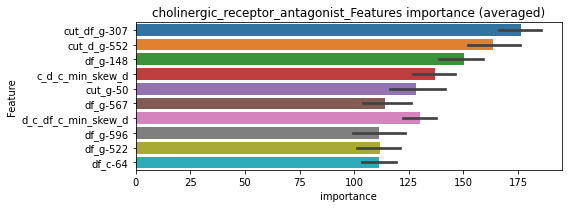

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000607942	valid_1's binary_logloss: 0.00851278
Early stopping, best iteration is:
[1226]	training's binary_logloss: 0.000534629	valid_1's binary_logloss: 0.00830735


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000718875	valid_1's binary_logloss: 0.0134167


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000607182	valid_1's binary_logloss: 0.0104814
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000566722	valid_1's binary_logloss: 0.0102648


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000605198	valid_1's binary_logloss: 0.0119413
Early stopping, best iteration is:
[1167]	training's binary_logloss: 0.00054796	valid_1's binary_logloss: 0.0117849


cholinergic_receptor_antagonist logloss: 0.01094273968409714
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000339175	valid_1's binary_logloss: 0.00147322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000331164	valid_1's binary_logloss: 0.00231605
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000340977	valid_1's binary_logloss: 0.00175983
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020091, Threshold: 0.0104905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0104905, conf_0:0.00734, conf_1:0.01364


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000356108	valid_1's binary_logloss: 0.00653134


Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0404905
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0704905
threshold: 0.0704905, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.05639, conf_1:0.08459


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.06344, conf_1:0.07754


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


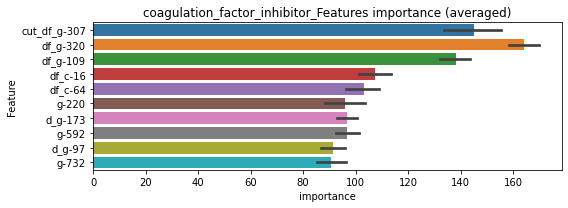

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000393646	valid_1's binary_logloss: 0.00113902
Early stopping, best iteration is:
[1445]	training's binary_logloss: 0.000335614	valid_1's binary_logloss: 0.00102778


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389099	valid_1's binary_logloss: 0.00220053
Early stopping, best iteration is:
[1358]	training's binary_logloss: 0.000337853	valid_1's binary_logloss: 0.00207592


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389251	valid_1's binary_logloss: 0.00134082
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.000345152	valid_1's binary_logloss: 0.00124339


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00040984	valid_1's binary_logloss: 0.00438813


coagulation_factor_inhibitor logloss: 0.0021834709425048956
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000437964	valid_1's binary_logloss: 0.00369693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00042659	valid_1's binary_logloss: 0.00980145
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000432317	valid_1's binary_logloss: 0.00349006
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000443437	valid_1's binary_logloss: 0.0066927


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039783, Threshold: 0.0114101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0114101, conf_0:0.00799, conf_1:0.01483
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0414101
threshold: 0.0414101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00042482	valid_1's binary_logloss: 0.00347474
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000435962	valid_1's binary_logloss: 0.00936016
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000418204	valid_1's binary_logloss: 0.00333058
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000439073	valid_1's binary_logloss: 0.00512681


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0458100, Threshold: 0.0414101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0414101, conf_0:0.03313, conf_1:0.04969
threshold: 0.0414101, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00042482	valid_1's binary_logloss: 0.00347474
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000435962	valid_1's binary_logloss: 0.00936016
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000418204	valid_1's binary_logloss: 0.00333058
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000439073	valid_1's binary_logloss: 0.00512681


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0458100, Threshold: 0.0414101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0414101, conf_0:0.03727, conf_1:0.04555
threshold: 0.0414101, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


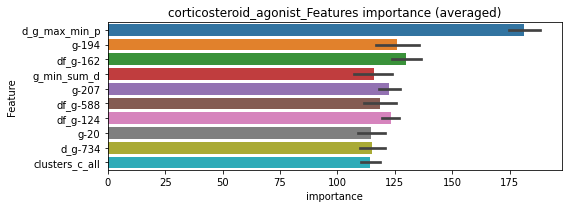

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000503395	valid_1's binary_logloss: 0.00359082
Early stopping, best iteration is:
[1413]	training's binary_logloss: 0.000422397	valid_1's binary_logloss: 0.00337273


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000499433	valid_1's binary_logloss: 0.00802128
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000445599	valid_1's binary_logloss: 0.00781986


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000501317	valid_1's binary_logloss: 0.00314179
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000474843	valid_1's binary_logloss: 0.00306781


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000500363	valid_1's binary_logloss: 0.00500043
Early stopping, best iteration is:
[1356]	training's binary_logloss: 0.000424607	valid_1's binary_logloss: 0.00474054


corticosteroid_agonist logloss: 0.004751034837112868
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.25278	valid_1's binary_logloss: 0.399223
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.194228	valid_1's binary_logloss: 0.379902
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.192537	valid_1's binary_logloss: 0.365094
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.183394	valid_1's binary_logloss: 0.362897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.215938	valid_1's binary_logloss: 0.373472


1 / 3, AUC score:0.735, PR-AUC:0.567
y_Threshold: 0.1769543, Threshold: 0.3878324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 752 → Positive_corect_labels: 335/3124
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.3878324, conf_0:0.27148, conf_1:0.50418
threshold: 0.3878324, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 335.0/3124, y_label_rate: 0.1072343
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0977815	valid_1's binary_logloss: 0.187718
Early stopping, best iteration is:
[1806]	training's binary_logloss: 0.057568	valid_1's binary_logloss: 0.164817
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.101112	valid_1's binary_logloss: 0.180935
[2000]	training's binary_logloss: 0.0545918	valid_1's binary_logloss: 0.150793
Early stopping, best iteration is:
[2702]	training's binary_logloss: 0.0403308	valid_1's binary_logloss: 0.141558
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0988054	valid_1's binary_logloss: 0.191239
[2000]	training's binary_logloss: 0.0530487	valid_1's binary_logloss: 0.165253
Early stopping, best iteration is:
[2749]	training's binary_logloss: 0.0383763	valid_1's binary_logloss: 0.157386
Training until validation scores don't improve for 29 rounds
[1000]	training's bin

2 / 3, AUC score:0.974, PR-AUC:0.912
y_Threshold: 0.0929003, Threshold: 0.3878324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 281.0/3016
p_label_rate: 0.0346560 Vs.target_rate: 0.01827
Num_p_label: 138.0, Expected: 72.7, Threshold: 0.3878324, conf_0:0.31027, conf_1:0.46540
Num_p_label: 131.0, Expected: 72.7, Adj_threshold_1: 0.4178324
Num_p_label: 127.0, Expected: 72.7, Adj_threshold_2: 0.4478324
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_3: 0.4778324
Num_p_label: 118.0, Expected: 72.7, Adj_threshold_4: 0.5078324
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_5: 0.5378324
Num_p_label: 104.0, Expected: 72.7, Adj_threshold_6: 0.5678324
threshold: 0.5678324, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 281.0/3016, y_label_rate: 0.0931698
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0777907	valid_1's binary_logloss: 0.143045
[2000]	training's binary_logloss: 0.040176	valid_1's binary_logloss: 0.115481
Early stopping, best iteration is:
[2847]	training's binary_logloss: 0.0277883	valid_1's binary_logloss: 0.107557
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0767209	valid_1's binary_logloss: 0.155624
[2000]	training's binary_logloss: 0.0392894	valid_1's binary_logloss: 0.12966
Early stopping, best iteration is:
[2463]	training's binary_logloss: 0.0316613	valid_1's binary_logloss: 0.124249
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0796387	valid_1's binary_logloss: 0.143766
[2000]	training's binary_logloss: 0.0412163	valid_1's binary_logloss: 0.114672
Early stopping, best iteration is:
[2841]	training's binary_logloss: 0.0284901	valid_1's binary_logloss: 0.103833
Tra

3 / 3, AUC score:0.989, PR-AUC:0.959
y_Threshold: 0.0732349, Threshold: 0.5678324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 257.0/2968
p_label_rate: 0.0336514 Vs.target_rate: 0.01827
Num_p_label: 134.0, Expected: 72.7, Threshold: 0.5678324, conf_0:0.51105, conf_1:0.62462
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_1: 0.5978324
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_2: 0.6278324
Num_p_label: 114.0, Expected: 72.7, Adj_threshold_3: 0.6578324
Num_p_label: 101.0, Expected: 72.7, Adj_threshold_4: 0.6878324
threshold: 0.6878324, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 257.0/2968, y_label_rate: 0.0865903


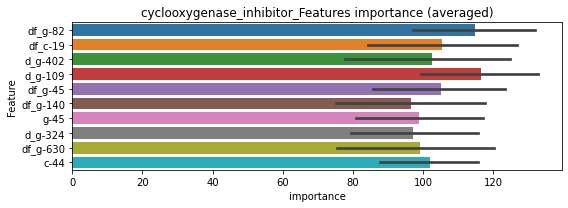

len(train_index) : 2226
len(valid_index) : 742
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0918688	valid_1's binary_logloss: 0.14678
[2000]	training's binary_logloss: 0.0480488	valid_1's binary_logloss: 0.110067
[3000]	training's binary_logloss: 0.0320982	valid_1's binary_logloss: 0.0970468
[4000]	training's binary_logloss: 0.0238391	valid_1's binary_logloss: 0.0898131
Early stopping, best iteration is:
[4222]	training's binary_logloss: 0.0225804	valid_1's binary_logloss: 0.0888629


len(train_index) : 2226
len(valid_index) : 742
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0927399	valid_1's binary_logloss: 0.148621
[2000]	training's binary_logloss: 0.0484784	valid_1's binary_logloss: 0.110537
[3000]	training's binary_logloss: 0.0323746	valid_1's binary_logloss: 0.0968713
[4000]	training's binary_logloss: 0.0239891	valid_1's binary_logloss: 0.0900438
Early stopping, best iteration is:
[4448]	training's binary_logloss: 0.0215648	valid_1's binary_logloss: 0.0883002


len(train_index) : 2226
len(valid_index) : 742
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0949909	valid_1's binary_logloss: 0.142919
[2000]	training's binary_logloss: 0.0499705	valid_1's binary_logloss: 0.104626
[3000]	training's binary_logloss: 0.0334483	valid_1's binary_logloss: 0.0911118
[4000]	training's binary_logloss: 0.0248049	valid_1's binary_logloss: 0.0838614
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.023068	valid_1's binary_logloss: 0.0824621


len(train_index) : 2226
len(valid_index) : 742
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0956586	valid_1's binary_logloss: 0.143771
[2000]	training's binary_logloss: 0.0504106	valid_1's binary_logloss: 0.103315
[3000]	training's binary_logloss: 0.0336918	valid_1's binary_logloss: 0.0885573
[4000]	training's binary_logloss: 0.0250265	valid_1's binary_logloss: 0.0814808
[5000]	training's binary_logloss: 0.0199005	valid_1's binary_logloss: 0.0772034
Early stopping, best iteration is:
[5051]	training's binary_logloss: 0.0196994	valid_1's binary_logloss: 0.0770833


cyclooxygenase_inhibitor logloss: 0.08417713917198273
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0668048	valid_1's binary_logloss: 0.132437
Early stopping, best iteration is:
[1713]	training's binary_logloss: 0.0436261	valid_1's binary_logloss: 0.124258
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0683008	valid_1's binary_logloss: 0.12414
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.0419439	valid_1's binary_logloss: 0.114261
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0747363	valid_1's binary_logloss: 0.0960879
[2000]	training's binary_logloss: 0.0420764	valid_1's binary_logloss: 0.0807642
Early stopping, best iteration is:
[2885]	training's binary_logloss: 0.0290636	valid_1's binary_logloss: 0.0755238
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0730921	valid_1's binary_logloss: 0.104361
[2000]	training's

1 / 3, AUC score:0.983, PR-AUC:0.963
y_Threshold: 0.0519764, Threshold: 0.1036294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 211 → Positive_corect_labels: 614/3714
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1036294, conf_0:0.07254, conf_1:0.13472
Num_p_label: 13.0, Expected: 17.4, Adj_threshold_1: 0.1336294
threshold: 0.1336294, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 614.0/3714, y_label_rate: 0.1653204
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519824	valid_1's binary_logloss: 0.0888867
[2000]	training's binary_logloss: 0.0289209	valid_1's binary_logloss: 0.0758188
Early stopping, best iteration is:
[2059]	training's binary_logloss: 0.0281025	valid_1's binary_logloss: 0.0752489
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0535221	valid_1's binary_logloss: 0.0791298
[2000]	training's binary_logloss: 0.0294982	valid_1's binary_logloss: 0.0655392
[3000]	training's binary_logloss: 0.019592	valid_1's binary_logloss: 0.0609869
Early stopping, best iteration is:
[3617]	training's binary_logloss: 0.0161234	valid_1's binary_logloss: 0.0594968
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0534852	valid_1's binary_logloss: 0.0793254
[2000]	training's binary_logloss: 0.0296506	valid_1's binary_logloss: 0.0657289
[3000]	training's binary_log

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0556957, Threshold: 0.1336294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 586.0/3658
p_label_rate: 0.0102963 Vs.target_rate: 0.00437
Num_p_label: 41.0, Expected: 17.4, Threshold: 0.1336294, conf_0:0.10690, conf_1:0.16036
Num_p_label: 22.0, Expected: 17.4, Adj_threshold_1: 0.1636294
threshold: 0.1636294, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 586.0/3658, y_label_rate: 0.1601968
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0414361	valid_1's binary_logloss: 0.0544054
[2000]	training's binary_logloss: 0.0228162	valid_1's binary_logloss: 0.0404277
[3000]	training's binary_logloss: 0.0153475	valid_1's binary_logloss: 0.0353096
Early stopping, best iteration is:
[3618]	training's binary_logloss: 0.0127154	valid_1's binary_logloss: 0.0335149
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0371129	valid_1's binary_logloss: 0.0715243
[2000]	training's binary_logloss: 0.0202503	valid_1's binary_logloss: 0.0608286
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.019214	valid_1's binary_logloss: 0.0602425
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0420586	valid_1's binary_logloss: 0.0506827
[2000]	training's binary_logloss: 0.023381	valid_1's binary_logloss: 0.0370741
[3000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0472459, Threshold: 0.1636294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 571.0/3628
p_label_rate: 0.0092918 Vs.target_rate: 0.00437
Num_p_label: 37.0, Expected: 17.4, Threshold: 0.1636294, conf_0:0.14727, conf_1:0.17999
Num_p_label: 21.0, Expected: 17.4, Adj_threshold_1: 0.1936294
threshold: 0.1936294, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 571.0/3628, y_label_rate: 0.1573870


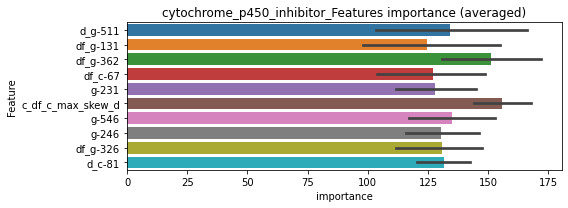

len(train_index) : 2721
len(valid_index) : 907
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0427146	valid_1's binary_logloss: 0.0624699
[2000]	training's binary_logloss: 0.0234261	valid_1's binary_logloss: 0.0449681
[3000]	training's binary_logloss: 0.0162418	valid_1's binary_logloss: 0.0389979
[4000]	training's binary_logloss: 0.0123315	valid_1's binary_logloss: 0.0359884
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.0114867	valid_1's binary_logloss: 0.035447


len(train_index) : 2721
len(valid_index) : 907
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0441875	valid_1's binary_logloss: 0.0534075
[2000]	training's binary_logloss: 0.0247745	valid_1's binary_logloss: 0.0349477
[3000]	training's binary_logloss: 0.0172112	valid_1's binary_logloss: 0.0281285
[4000]	training's binary_logloss: 0.0130927	valid_1's binary_logloss: 0.0247708
[5000]	training's binary_logloss: 0.0105335	valid_1's binary_logloss: 0.022683
[6000]	training's binary_logloss: 0.00880989	valid_1's binary_logloss: 0.0212895
[7000]	training's binary_logloss: 0.00755284	valid_1's binary_logloss: 0.0202756
[8000]	training's binary_logloss: 0.00661361	valid_1's binary_logloss: 0.0193592
Early stopping, best iteration is:
[8539]	training's binary_logloss: 0.00620037	valid_1's binary_logloss: 0.0189409


len(train_index) : 2721
len(valid_index) : 907
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0447882	valid_1's binary_logloss: 0.0547941
[2000]	training's binary_logloss: 0.0248505	valid_1's binary_logloss: 0.0369459
[3000]	training's binary_logloss: 0.0171766	valid_1's binary_logloss: 0.0306186
[4000]	training's binary_logloss: 0.0130776	valid_1's binary_logloss: 0.0276766
[5000]	training's binary_logloss: 0.0105349	valid_1's binary_logloss: 0.0257266
[6000]	training's binary_logloss: 0.00880644	valid_1's binary_logloss: 0.0244777
[7000]	training's binary_logloss: 0.00755688	valid_1's binary_logloss: 0.0235576
Early stopping, best iteration is:
[7303]	training's binary_logloss: 0.00724508	valid_1's binary_logloss: 0.0233376


len(train_index) : 2721
len(valid_index) : 907
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.042333	valid_1's binary_logloss: 0.0621091
[2000]	training's binary_logloss: 0.0232755	valid_1's binary_logloss: 0.04465
[3000]	training's binary_logloss: 0.0161843	valid_1's binary_logloss: 0.038888
[4000]	training's binary_logloss: 0.0122763	valid_1's binary_logloss: 0.0363339
[5000]	training's binary_logloss: 0.00991175	valid_1's binary_logloss: 0.0348264
Early stopping, best iteration is:
[5700]	training's binary_logloss: 0.00869114	valid_1's binary_logloss: 0.0339512


cytochrome_p450_inhibitor logloss: 0.027919188062275214
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00040523	valid_1's binary_logloss: 0.00666886
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000427196	valid_1's binary_logloss: 0.00562887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00041925	valid_1's binary_logloss: 0.00102386
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415082	valid_1's binary_logloss: 0.00195199


y_Threshold: 0.0029265, Threshold: 0.0115218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0115218, conf_0:0.00807, conf_1:0.01498
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_1: 0.0415218
threshold: 0.0415218, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0415218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, Expected: 6.0, Threshold: 0.0415218, conf_0:0.03322, conf_1:0.04983
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0715218
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0715218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0715218, conf_0:0.06437, conf_1:0.07867
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


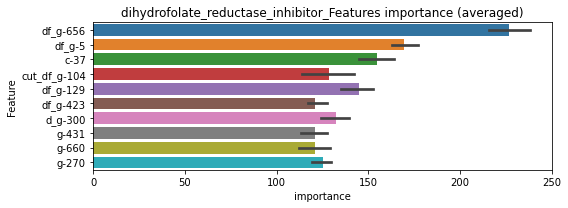

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00046855	valid_1's binary_logloss: 0.00493836
Early stopping, best iteration is:
[1252]	training's binary_logloss: 0.000415827	valid_1's binary_logloss: 0.00479356


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000467143	valid_1's binary_logloss: 0.00498432
Early stopping, best iteration is:
[1279]	training's binary_logloss: 0.000410721	valid_1's binary_logloss: 0.00479983


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000474315	valid_1's binary_logloss: 0.00105929
Early stopping, best iteration is:
[1398]	training's binary_logloss: 0.000410318	valid_1's binary_logloss: 0.00094787


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00047343	valid_1's binary_logloss: 0.00167013
Early stopping, best iteration is:
[1364]	training's binary_logloss: 0.000411405	valid_1's binary_logloss: 0.00153827


dihydrofolate_reductase_inhibitor logloss: 0.003020814932398994
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357403	valid_1's binary_logloss: 0.00254559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000356851	valid_1's binary_logloss: 0.00198374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000359962	valid_1's binary_logloss: 0.000809725
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023813, Threshold: 0.0099776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0099776, conf_0:0.00698, conf_1:0.01297
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0399776


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00037487	valid_1's binary_logloss: 0.00508198


threshold: 0.0399776, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.0399776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105
Num_p_label: 28.0, Expected: 4.2, Threshold: 0.0399776, conf_0:0.03198, conf_1:0.04797
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0699776
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0999776
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.1299776


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1599776
threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.1599776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.1599776, conf_0:0.14398, conf_1:0.17598


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


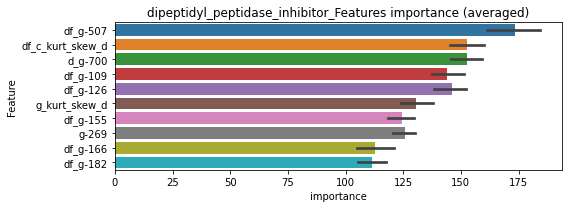

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000387297	valid_1's binary_logloss: 0.00191071
Early stopping, best iteration is:
[1370]	training's binary_logloss: 0.000342114	valid_1's binary_logloss: 0.00179019


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000391045	valid_1's binary_logloss: 0.00149774
Early stopping, best iteration is:
[1310]	training's binary_logloss: 0.000349273	valid_1's binary_logloss: 0.00142317


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000395343	valid_1's binary_logloss: 0.00102837
Early stopping, best iteration is:
[1243]	training's binary_logloss: 0.000355852	valid_1's binary_logloss: 0.0009484


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000390197	valid_1's binary_logloss: 0.00339101
Early stopping, best iteration is:
[1218]	training's binary_logloss: 0.000354621	valid_1's binary_logloss: 0.00332639


dipeptidyl_peptidase_inhibitor logloss: 0.001872125131236558
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000176586	valid_1's binary_logloss: 0.0039209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00017455	valid_1's binary_logloss: 0.00180481
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000174989	valid_1's binary_logloss: 0.000211316
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004962, Threshold: 0.0018108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018108, conf_0:0.00127, conf_1:0.00235
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318108
threshold: 0.0318108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000231277


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.0318108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, Expected: 1.0, Threshold: 0.0318108, conf_0:0.02545, conf_1:0.03817
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0618108
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0918108
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1218108
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1518108
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1818108
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.1818108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1818108, conf_0:0.16363, conf_1:0.19999
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


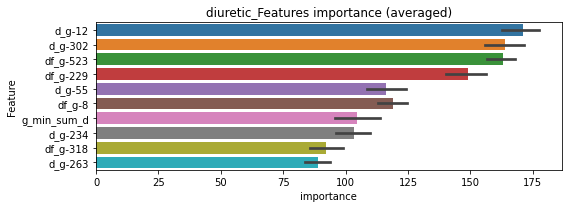

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000182643	valid_1's binary_logloss: 0.000333414
Early stopping, best iteration is:
[1472]	training's binary_logloss: 0.000164292	valid_1's binary_logloss: 0.000308668


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000183457	valid_1's binary_logloss: 0.00248222
Early stopping, best iteration is:
[1415]	training's binary_logloss: 0.000165393	valid_1's binary_logloss: 0.00242866


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00018474	valid_1's binary_logloss: 0.000207629
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.000164683	valid_1's binary_logloss: 0.000185587


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000182568	valid_1's binary_logloss: 0.000218979
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.000163208	valid_1's binary_logloss: 0.000196322


diuretic logloss: 0.0007796859552616604
dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000487165	valid_1's binary_logloss: 0.012756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000494882	valid_1's binary_logloss: 0.0167968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000502488	valid_1's binary_logloss: 0.0030484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00048914	valid_1's binary_logloss: 0.0142329


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037524, Threshold: 0.0855297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0855297, conf_0:0.05987, conf_1:0.11119
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.1155297
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1455297
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1755297
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2055297
threshold: 0.2055297, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497674	valid_1's binary_logloss: 0.0125171
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000485036	valid_1's binary_logloss: 0.0131483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482282	valid_1's binary_logloss: 0.00338707
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000494534	valid_1's binary_logloss: 0.0131269


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0745539, Threshold: 0.2055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2055297, conf_0:0.16442, conf_1:0.24664
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_1: 0.2355297
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2655297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_3: 0.2955297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3255297
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_5: 0.3555297
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_6: 0.3855297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_7: 0.4155297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_8: 0.4455297
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_9: 0.4755297
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_10: 0.5055297
threshold: 0.5055297, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.0162652
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000495703	valid_1's binary_logloss: 0.00641886
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000486554	valid_1's binary_logloss: 0.00614384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000485481	valid_1's binary_logloss: 0.0060295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0748767, Threshold: 0.5055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0153189 Vs.target_rate: 0.00202
Num_p_label: 61.0, Expected: 8.0, Threshold: 0.5055297, conf_0:0.45498, conf_1:0.55608
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.5355297
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.5655297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.5955297
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_4: 0.6255297
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_5: 0.6555297
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_6: 0.6855297
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_7: 0.7155297
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_8: 0.7455297
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.7755297
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.8055297
threshold: 0.8055297, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_la

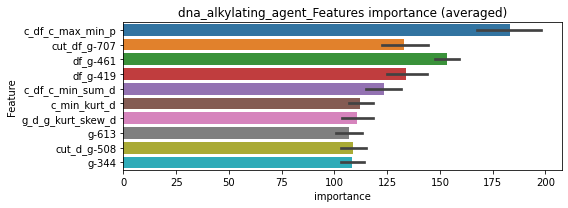

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000547655	valid_1's binary_logloss: 0.00760505
Early stopping, best iteration is:
[1220]	training's binary_logloss: 0.000486068	valid_1's binary_logloss: 0.00732928


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000549058	valid_1's binary_logloss: 0.0084154
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000521795	valid_1's binary_logloss: 0.00834638


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00054769	valid_1's binary_logloss: 0.00742253
Early stopping, best iteration is:
[1392]	training's binary_logloss: 0.000466011	valid_1's binary_logloss: 0.00714408


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000546029	valid_1's binary_logloss: 0.00501659
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000501897	valid_1's binary_logloss: 0.00488139


dna_alkylating_agent logloss: 0.006926098436841397


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.104705	valid_1's binary_logloss: 0.181124
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0843446	valid_1's binary_logloss: 0.175877
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.101829	valid_1's binary_logloss: 0.195191
Early stopping, best iteration is:
[1288]	training's binary_logloss: 0.0849162	valid_1's binary_logloss: 0.191023
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.105304	valid_1's binary_logloss: 0.180095
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0709475	valid_1's binary_logloss: 0.172729
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.103728	valid_1's binary_logloss: 0.179122
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.092848	valid_1's binary_logloss

1 / 3, AUC score:0.923, PR-AUC:0.870
y_Threshold: 0.0925576, Threshold: 0.1431379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 828 → Positive_corect_labels: 1142/7659
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1431379, conf_0:0.10020, conf_1:0.18608
threshold: 0.1431379, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1142.0/7659, y_label_rate: 0.1491056
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0507156	valid_1's binary_logloss: 0.0791598
[2000]	training's binary_logloss: 0.0272537	valid_1's binary_logloss: 0.0670334
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0213239	valid_1's binary_logloss: 0.0642221
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.046422	valid_1's binary_logloss: 0.10015
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.0284168	valid_1's binary_logloss: 0.0924412
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519487	valid_1's binary_logloss: 0.0728271
[2000]	training's binary_logloss: 0.0277686	valid_1's binary_logloss: 0.0595955
[3000]	training's binary_logloss: 0.0183107	valid_1's binary_logloss: 0.0555067
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.016797	valid_1's binary_logloss: 0.0549

2 / 3, AUC score:0.996, PR-AUC:0.984
y_Threshold: 0.0603801, Threshold: 0.1431379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1070.0/7515
p_label_rate: 0.0075339 Vs.target_rate: 0.01688
Num_p_label: 30.0, Expected: 67.2, Threshold: 0.1431379, conf_0:0.11451, conf_1:0.17177
threshold: 0.1431379, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1070.0/7515, y_label_rate: 0.1423819
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344317	valid_1's binary_logloss: 0.0506818
[2000]	training's binary_logloss: 0.0182541	valid_1's binary_logloss: 0.0381279
[3000]	training's binary_logloss: 0.0120432	valid_1's binary_logloss: 0.0340003
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.0110335	valid_1's binary_logloss: 0.0333494
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0332153	valid_1's binary_logloss: 0.0511372
[2000]	training's binary_logloss: 0.0175237	valid_1's binary_logloss: 0.0392877
[3000]	training's binary_logloss: 0.0115554	valid_1's binary_logloss: 0.03503
Early stopping, best iteration is:
[3522]	training's binary_logloss: 0.00974431	valid_1's binary_logloss: 0.0339227
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319945	valid_1's binary_logloss: 0.058287
[2000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0494852, Threshold: 0.1431379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1041.0/7457
p_label_rate: 0.0087896 Vs.target_rate: 0.01688
Num_p_label: 35.0, Expected: 67.2, Threshold: 0.1431379, conf_0:0.12882, conf_1:0.15745
threshold: 0.1431379, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1041.0/7457, y_label_rate: 0.1396004


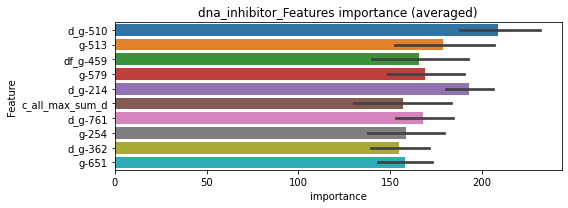

len(train_index) : 5592
len(valid_index) : 1865
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0356054	valid_1's binary_logloss: 0.0481786
[2000]	training's binary_logloss: 0.018719	valid_1's binary_logloss: 0.0315445
[3000]	training's binary_logloss: 0.0128026	valid_1's binary_logloss: 0.0260655
[4000]	training's binary_logloss: 0.00966577	valid_1's binary_logloss: 0.0231353
[5000]	training's binary_logloss: 0.00770426	valid_1's binary_logloss: 0.0213847
[6000]	training's binary_logloss: 0.00643058	valid_1's binary_logloss: 0.0202041
Early stopping, best iteration is:
[6862]	training's binary_logloss: 0.00560853	valid_1's binary_logloss: 0.0195063


len(train_index) : 5593
len(valid_index) : 1864
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0362823	valid_1's binary_logloss: 0.0471871
[2000]	training's binary_logloss: 0.0194401	valid_1's binary_logloss: 0.0297281
[3000]	training's binary_logloss: 0.0133628	valid_1's binary_logloss: 0.0236257
[4000]	training's binary_logloss: 0.0100322	valid_1's binary_logloss: 0.0204175
[5000]	training's binary_logloss: 0.00799266	valid_1's binary_logloss: 0.0183862
[6000]	training's binary_logloss: 0.00663449	valid_1's binary_logloss: 0.0169852
[7000]	training's binary_logloss: 0.00566376	valid_1's binary_logloss: 0.0159995
Early stopping, best iteration is:
[7429]	training's binary_logloss: 0.00535	valid_1's binary_logloss: 0.0156602


len(train_index) : 5593
len(valid_index) : 1864
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.035056	valid_1's binary_logloss: 0.0515239
[2000]	training's binary_logloss: 0.0184757	valid_1's binary_logloss: 0.0350157
[3000]	training's binary_logloss: 0.0126532	valid_1's binary_logloss: 0.0292752
[4000]	training's binary_logloss: 0.00952588	valid_1's binary_logloss: 0.0262283
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.00789415	valid_1's binary_logloss: 0.0247153


len(train_index) : 5593
len(valid_index) : 1864
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0360135	valid_1's binary_logloss: 0.0483093
[2000]	training's binary_logloss: 0.0189992	valid_1's binary_logloss: 0.0307398
[3000]	training's binary_logloss: 0.0131035	valid_1's binary_logloss: 0.0248392
[4000]	training's binary_logloss: 0.00989467	valid_1's binary_logloss: 0.0217022
[5000]	training's binary_logloss: 0.0079047	valid_1's binary_logloss: 0.0196992
[6000]	training's binary_logloss: 0.00658243	valid_1's binary_logloss: 0.018416
[7000]	training's binary_logloss: 0.00562388	valid_1's binary_logloss: 0.0175088
[8000]	training's binary_logloss: 0.00493325	valid_1's binary_logloss: 0.0168395
Early stopping, best iteration is:
[8728]	training's binary_logloss: 0.00452981	valid_1's binary_logloss: 0.0164809


dna_inhibitor logloss: 0.019090725566827664


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.105749	valid_1's binary_logloss: 0.233623
Early stopping, best iteration is:
[1542]	training's binary_logloss: 0.0763907	valid_1's binary_logloss: 0.223854
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.121453	valid_1's binary_logloss: 0.154963
[2000]	training's binary_logloss: 0.0709517	valid_1's binary_logloss: 0.130896
[3000]	training's binary_logloss: 0.0482045	valid_1's binary_logloss: 0.121816
Early stopping, best iteration is:
[3090]	training's binary_logloss: 0.0468232	valid_1's binary_logloss: 0.121264
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.117686	valid_1's binary_logloss: 0.175789
[2000]	training's binary_logloss: 0.0693137	valid_1's binary_logloss: 0.150832
[3000]	training's binary_logloss: 0.0472803	valid_1's binary_logloss: 0.141712
Early stopping, best iteration is:
[306

1 / 3, AUC score:0.949, PR-AUC:0.902
y_Threshold: 0.0850380, Threshold: 0.1210551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 205 → Positive_corect_labels: 357/2301
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1210551, conf_0:0.08474, conf_1:0.15737
Num_p_label: 15.0, Expected: 20.2, Adj_threshold_1: 0.1510551
threshold: 0.1510551, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 357.0/2301, y_label_rate: 0.1551499
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0769042	valid_1's binary_logloss: 0.144598
[2000]	training's binary_logloss: 0.0427539	valid_1's binary_logloss: 0.127004
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0408194	valid_1's binary_logloss: 0.126308
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0807287	valid_1's binary_logloss: 0.114378
[2000]	training's binary_logloss: 0.0454793	valid_1's binary_logloss: 0.0898186
[3000]	training's binary_logloss: 0.030872	valid_1's binary_logloss: 0.081005
Early stopping, best iteration is:
[3769]	training's binary_logloss: 0.0245501	valid_1's binary_logloss: 0.076816
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0799944	valid_1's binary_logloss: 0.117267
[2000]	training's binary_logloss: 0.0450797	valid_1's binary_logloss: 0.0950045
[3000]	training's binary_logloss: 0

2 / 3, AUC score:0.991, PR-AUC:0.975
y_Threshold: 0.0718653, Threshold: 0.1510551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 332.0/2251
p_label_rate: 0.0032647 Vs.target_rate: 0.00508
Num_p_label: 13.0, Expected: 20.2, Threshold: 0.1510551, conf_0:0.12084, conf_1:0.18127
threshold: 0.1510551, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 332.0/2251, y_label_rate: 0.1474900
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0621985	valid_1's binary_logloss: 0.0963028
[2000]	training's binary_logloss: 0.0341331	valid_1's binary_logloss: 0.0755524
[3000]	training's binary_logloss: 0.0231252	valid_1's binary_logloss: 0.0685642
Early stopping, best iteration is:
[3618]	training's binary_logloss: 0.0191613	valid_1's binary_logloss: 0.0663033
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0616058	valid_1's binary_logloss: 0.100493
[2000]	training's binary_logloss: 0.0339774	valid_1's binary_logloss: 0.0814546
[3000]	training's binary_logloss: 0.0228822	valid_1's binary_logloss: 0.0749982
Early stopping, best iteration is:
[3175]	training's binary_logloss: 0.021619	valid_1's binary_logloss: 0.0742173
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.062091	valid_1's binary_logloss: 0.0954889
[2000]	training's binary_loglo

3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0551769, Threshold: 0.1510551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 320.0/2227
p_label_rate: 0.0032647 Vs.target_rate: 0.00508
Num_p_label: 13.0, Expected: 20.2, Threshold: 0.1510551, conf_0:0.13595, conf_1:0.16616
threshold: 0.1510551, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 320.0/2227, y_label_rate: 0.1436911


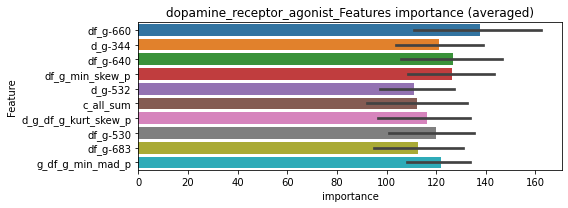

len(train_index) : 1670
len(valid_index) : 557
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0721641	valid_1's binary_logloss: 0.110063
[2000]	training's binary_logloss: 0.039636	valid_1's binary_logloss: 0.0836258
[3000]	training's binary_logloss: 0.0276838	valid_1's binary_logloss: 0.0745438
[4000]	training's binary_logloss: 0.021047	valid_1's binary_logloss: 0.0698982
Early stopping, best iteration is:
[4290]	training's binary_logloss: 0.019667	valid_1's binary_logloss: 0.0692294


len(train_index) : 1670
len(valid_index) : 557
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0733256	valid_1's binary_logloss: 0.110807
[2000]	training's binary_logloss: 0.0408401	valid_1's binary_logloss: 0.0783593
[3000]	training's binary_logloss: 0.0284812	valid_1's binary_logloss: 0.0671032
[4000]	training's binary_logloss: 0.0216981	valid_1's binary_logloss: 0.0614166
[5000]	training's binary_logloss: 0.0174658	valid_1's binary_logloss: 0.0577527
[6000]	training's binary_logloss: 0.0145747	valid_1's binary_logloss: 0.0554476
[7000]	training's binary_logloss: 0.0125095	valid_1's binary_logloss: 0.0536763
Early stopping, best iteration is:
[7883]	training's binary_logloss: 0.0111219	valid_1's binary_logloss: 0.0523089


len(train_index) : 1670
len(valid_index) : 557
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0728243	valid_1's binary_logloss: 0.10705
[2000]	training's binary_logloss: 0.0397281	valid_1's binary_logloss: 0.0766925
[3000]	training's binary_logloss: 0.0277738	valid_1's binary_logloss: 0.0666747
[4000]	training's binary_logloss: 0.0211439	valid_1's binary_logloss: 0.0615695
Early stopping, best iteration is:
[4807]	training's binary_logloss: 0.0177443	valid_1's binary_logloss: 0.0592333


len(train_index) : 1671
len(valid_index) : 556
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0788085	valid_1's binary_logloss: 0.0879152
[2000]	training's binary_logloss: 0.0437109	valid_1's binary_logloss: 0.0551362
[3000]	training's binary_logloss: 0.0304533	valid_1's binary_logloss: 0.0440981
[4000]	training's binary_logloss: 0.0232123	valid_1's binary_logloss: 0.0381495
[5000]	training's binary_logloss: 0.0187293	valid_1's binary_logloss: 0.0345213
[6000]	training's binary_logloss: 0.0156768	valid_1's binary_logloss: 0.0319974
[7000]	training's binary_logloss: 0.0134537	valid_1's binary_logloss: 0.0301304
[8000]	training's binary_logloss: 0.0118077	valid_1's binary_logloss: 0.0286079
[9000]	training's binary_logloss: 0.0105035	valid_1's binary_logloss: 0.0274517
Early stopping, best iteration is:
[9319]	training's binary_logloss: 0.0101531	valid_1's binary_logloss: 0.0272047


dopamine_receptor_agonist logloss: 0.05200518673505776
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.106011	valid_1's binary_logloss: 0.192126
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.087925	valid_1's binary_logloss: 0.189052
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.105361	valid_1's binary_logloss: 0.190411
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.0851331	valid_1's binary_logloss: 0.18665
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.10681	valid_1's binary_logloss: 0.188693
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0700638	valid_1's binary_logloss: 0.181177
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.106334	valid_1's binary_logloss: 0.1894
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.102949	valid_1's binary_logloss: 0.1

1 / 3, AUC score:0.910, PR-AUC:0.856
y_Threshold: 0.0923204, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 880 → Positive_corect_labels: 1169/7896
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.08977, conf_1:0.16671
threshold: 0.1282379, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1169.0/7896, y_label_rate: 0.1480496
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0505441	valid_1's binary_logloss: 0.0800023
[2000]	training's binary_logloss: 0.0273085	valid_1's binary_logloss: 0.0689729
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0214324	valid_1's binary_logloss: 0.0665282
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0477872	valid_1's binary_logloss: 0.0977286
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.0270877	valid_1's binary_logloss: 0.0891013
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.052274	valid_1's binary_logloss: 0.0722576
[2000]	training's binary_logloss: 0.028296	valid_1's binary_logloss: 0.059537
[3000]	training's binary_logloss: 0.0186671	valid_1's binary_logloss: 0.0552951
Early stopping, best iteration is:
[3803]	training's binary_logloss: 0.014516	valid_1's binary_logloss: 0.0534

2 / 3, AUC score:0.993, PR-AUC:0.977
y_Threshold: 0.0669842, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 1083.0/7724
p_label_rate: 0.0120542 Vs.target_rate: 0.01780
Num_p_label: 48.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.10259, conf_1:0.15389
threshold: 0.1282379, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1083.0/7724, y_label_rate: 0.1402123
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0296334	valid_1's binary_logloss: 0.0404223
[2000]	training's binary_logloss: 0.0156896	valid_1's binary_logloss: 0.0285293
[3000]	training's binary_logloss: 0.0105622	valid_1's binary_logloss: 0.024654
Early stopping, best iteration is:
[3249]	training's binary_logloss: 0.00973526	valid_1's binary_logloss: 0.0240352
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0276896	valid_1's binary_logloss: 0.0479128
[2000]	training's binary_logloss: 0.0144434	valid_1's binary_logloss: 0.0362394
[3000]	training's binary_logloss: 0.00972093	valid_1's binary_logloss: 0.0324087
Early stopping, best iteration is:
[3840]	training's binary_logloss: 0.0075598	valid_1's binary_logloss: 0.0309629
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284599	valid_1's binary_logloss: 0.0458592
[2000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0730802, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1059.0/7676
p_label_rate: 0.0198393 Vs.target_rate: 0.01780
Num_p_label: 79.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.11541, conf_1:0.14106
threshold: 0.1282379, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 1059.0/7676, y_label_rate: 0.1379625


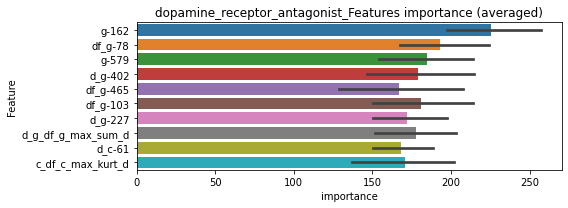

len(train_index) : 5757
len(valid_index) : 1919
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0311033	valid_1's binary_logloss: 0.0464319
[2000]	training's binary_logloss: 0.0152224	valid_1's binary_logloss: 0.0293593
[3000]	training's binary_logloss: 0.0101851	valid_1's binary_logloss: 0.0240476
[4000]	training's binary_logloss: 0.00771896	valid_1's binary_logloss: 0.0214687
[5000]	training's binary_logloss: 0.0062286	valid_1's binary_logloss: 0.0199922
[6000]	training's binary_logloss: 0.00520876	valid_1's binary_logloss: 0.0188513
[7000]	training's binary_logloss: 0.00448824	valid_1's binary_logloss: 0.0181198
Early stopping, best iteration is:
[7425]	training's binary_logloss: 0.00424003	valid_1's binary_logloss: 0.0178603


len(train_index) : 5757
len(valid_index) : 1919
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323961	valid_1's binary_logloss: 0.0401698
[2000]	training's binary_logloss: 0.015991	valid_1's binary_logloss: 0.0221968
[3000]	training's binary_logloss: 0.0107646	valid_1's binary_logloss: 0.0164532
[4000]	training's binary_logloss: 0.00817808	valid_1's binary_logloss: 0.0136058
[5000]	training's binary_logloss: 0.00660586	valid_1's binary_logloss: 0.0118094
[6000]	training's binary_logloss: 0.00550851	valid_1's binary_logloss: 0.0105455
[7000]	training's binary_logloss: 0.00474406	valid_1's binary_logloss: 0.00964431
[8000]	training's binary_logloss: 0.00417597	valid_1's binary_logloss: 0.00892687
[9000]	training's binary_logloss: 0.00372686	valid_1's binary_logloss: 0.008369
[10000]	training's binary_logloss: 0.00337546	valid_1's binary_logloss: 0.00793887
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00337546	valid_1's binary_logloss: 0.00793887

len(train_index) : 5757
len(valid_index) : 1919
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0315971	valid_1's binary_logloss: 0.0431996
[2000]	training's binary_logloss: 0.0154514	valid_1's binary_logloss: 0.0259497
[3000]	training's binary_logloss: 0.010385	valid_1's binary_logloss: 0.0203986
[4000]	training's binary_logloss: 0.0078755	valid_1's binary_logloss: 0.0177072
[5000]	training's binary_logloss: 0.00635217	valid_1's binary_logloss: 0.0160662
[6000]	training's binary_logloss: 0.00529948	valid_1's binary_logloss: 0.0148722
[7000]	training's binary_logloss: 0.00457192	valid_1's binary_logloss: 0.0140461
[8000]	training's binary_logloss: 0.00401772	valid_1's binary_logloss: 0.0133697
[9000]	training's binary_logloss: 0.00358621	valid_1's binary_logloss: 0.0128434
Early stopping, best iteration is:
[9280]	training's binary_logloss: 0.00347966	valid_1's binary_logloss: 0.0127107


len(train_index) : 5757
len(valid_index) : 1919
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319642	valid_1's binary_logloss: 0.0414112
[2000]	training's binary_logloss: 0.0158321	valid_1's binary_logloss: 0.023661
[3000]	training's binary_logloss: 0.0106265	valid_1's binary_logloss: 0.0177393
[4000]	training's binary_logloss: 0.00805175	valid_1's binary_logloss: 0.0148832
[5000]	training's binary_logloss: 0.00650218	valid_1's binary_logloss: 0.0132038
[6000]	training's binary_logloss: 0.00542514	valid_1's binary_logloss: 0.011955
[7000]	training's binary_logloss: 0.00468706	valid_1's binary_logloss: 0.0111362
[8000]	training's binary_logloss: 0.00412109	valid_1's binary_logloss: 0.0104586
[9000]	training's binary_logloss: 0.0036759	valid_1's binary_logloss: 0.00991801
[10000]	training's binary_logloss: 0.00333395	valid_1's binary_logloss: 0.0095501
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00333395	valid_1's binary_logloss: 0.0095501


dopamine_receptor_antagonist logloss: 0.012014983885434526


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0925665	valid_1's binary_logloss: 0.148691
[2000]	training's binary_logloss: 0.0522279	valid_1's binary_logloss: 0.135564
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.0484238	valid_1's binary_logloss: 0.134554
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0905124	valid_1's binary_logloss: 0.154263
[2000]	training's binary_logloss: 0.0510792	valid_1's binary_logloss: 0.143534
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0498228	valid_1's binary_logloss: 0.143041
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0898424	valid_1's binary_logloss: 0.157354
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0599258	valid_1's binary_logloss: 0.149298
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.948, PR-AUC:0.911
y_Threshold: 0.0775935, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 717 → Positive_corect_labels: 1303/8347
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.09852, conf_1:0.18297
threshold: 0.1407428, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1303.0/8347, y_label_rate: 0.1561040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.049543	valid_1's binary_logloss: 0.0793655
[2000]	training's binary_logloss: 0.0264948	valid_1's binary_logloss: 0.065531
[3000]	training's binary_logloss: 0.0173607	valid_1's binary_logloss: 0.0608782
Early stopping, best iteration is:
[3193]	training's binary_logloss: 0.0163073	valid_1's binary_logloss: 0.0603586
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0496366	valid_1's binary_logloss: 0.0763154
[2000]	training's binary_logloss: 0.026797	valid_1's binary_logloss: 0.0619978
Early stopping, best iteration is:
[2633]	training's binary_logloss: 0.0201946	valid_1's binary_logloss: 0.0583695
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.04936	valid_1's binary_logloss: 0.0800119
[2000]	training's binary_logloss: 0.0267426	valid_1's binary_logloss: 0.0672
Early stopping, best iteration is:


2 / 3, AUC score:0.996, PR-AUC:0.986
y_Threshold: 0.0724497, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1236.0/8213
p_label_rate: 0.0150678 Vs.target_rate: 0.01411
Num_p_label: 60.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.11259, conf_1:0.16889
threshold: 0.1407428, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 1236.0/8213, y_label_rate: 0.1504931
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344193	valid_1's binary_logloss: 0.0498672
[2000]	training's binary_logloss: 0.0177969	valid_1's binary_logloss: 0.0357174
[3000]	training's binary_logloss: 0.011802	valid_1's binary_logloss: 0.0313877
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00974796	valid_1's binary_logloss: 0.0299071
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0347294	valid_1's binary_logloss: 0.0524328
[2000]	training's binary_logloss: 0.0178713	valid_1's binary_logloss: 0.0381332
[3000]	training's binary_logloss: 0.0117249	valid_1's binary_logloss: 0.033255
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.0116857	valid_1's binary_logloss: 0.0332387
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0337806	valid_1's binary_logloss: 0.0543009
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0674741, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1207.0/8155
p_label_rate: 0.0178302 Vs.target_rate: 0.01411
Num_p_label: 71.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.12667, conf_1:0.15482
threshold: 0.1407428, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 1207.0/8155, y_label_rate: 0.1480074


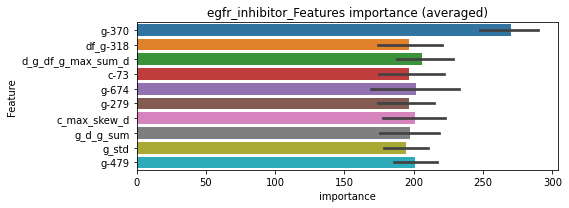

len(train_index) : 6116
len(valid_index) : 2039
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0388054	valid_1's binary_logloss: 0.0540066
[2000]	training's binary_logloss: 0.0193538	valid_1's binary_logloss: 0.0332455
[3000]	training's binary_logloss: 0.0129776	valid_1's binary_logloss: 0.0266015
[4000]	training's binary_logloss: 0.00977574	valid_1's binary_logloss: 0.0231846
[5000]	training's binary_logloss: 0.00782352	valid_1's binary_logloss: 0.0211202
[6000]	training's binary_logloss: 0.00653255	valid_1's binary_logloss: 0.0197354
[7000]	training's binary_logloss: 0.00559158	valid_1's binary_logloss: 0.0187271
[8000]	training's binary_logloss: 0.00488085	valid_1's binary_logloss: 0.017958
Early stopping, best iteration is:
[8532]	training's binary_logloss: 0.00457379	valid_1's binary_logloss: 0.017588


len(train_index) : 6116
len(valid_index) : 2039
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0399948	valid_1's binary_logloss: 0.046142
[2000]	training's binary_logloss: 0.0201523	valid_1's binary_logloss: 0.0254282
[3000]	training's binary_logloss: 0.0135532	valid_1's binary_logloss: 0.0187028
[4000]	training's binary_logloss: 0.0102036	valid_1's binary_logloss: 0.0153477
[5000]	training's binary_logloss: 0.00815981	valid_1's binary_logloss: 0.0132039
[6000]	training's binary_logloss: 0.00681476	valid_1's binary_logloss: 0.0118382
[7000]	training's binary_logloss: 0.00585133	valid_1's binary_logloss: 0.0108247
[8000]	training's binary_logloss: 0.00509911	valid_1's binary_logloss: 0.00994414
[9000]	training's binary_logloss: 0.00452335	valid_1's binary_logloss: 0.00927296
[10000]	training's binary_logloss: 0.00407632	valid_1's binary_logloss: 0.0087445
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00407632	valid_1's binary_logloss: 0.0087445


len(train_index) : 6116
len(valid_index) : 2039
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0393272	valid_1's binary_logloss: 0.0529585
[2000]	training's binary_logloss: 0.0197377	valid_1's binary_logloss: 0.031069
[3000]	training's binary_logloss: 0.0132822	valid_1's binary_logloss: 0.0239911
[4000]	training's binary_logloss: 0.0100223	valid_1's binary_logloss: 0.0204132
[5000]	training's binary_logloss: 0.00801889	valid_1's binary_logloss: 0.0181191
[6000]	training's binary_logloss: 0.00669623	valid_1's binary_logloss: 0.016584
[7000]	training's binary_logloss: 0.00573998	valid_1's binary_logloss: 0.015481
[8000]	training's binary_logloss: 0.00500715	valid_1's binary_logloss: 0.0145256
[9000]	training's binary_logloss: 0.00443632	valid_1's binary_logloss: 0.0137868
Early stopping, best iteration is:
[9306]	training's binary_logloss: 0.00428275	valid_1's binary_logloss: 0.0136084


len(train_index) : 6117
len(valid_index) : 2038
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0382588	valid_1's binary_logloss: 0.0572119
[2000]	training's binary_logloss: 0.018884	valid_1's binary_logloss: 0.0362412
[3000]	training's binary_logloss: 0.0127074	valid_1's binary_logloss: 0.0297224
[4000]	training's binary_logloss: 0.00958637	valid_1's binary_logloss: 0.0264629
[5000]	training's binary_logloss: 0.00766842	valid_1's binary_logloss: 0.0245905
[6000]	training's binary_logloss: 0.00639528	valid_1's binary_logloss: 0.0232266
Early stopping, best iteration is:
[6315]	training's binary_logloss: 0.00606443	valid_1's binary_logloss: 0.0228956


egfr_inhibitor logloss: 0.01570823228604129
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000232452	valid_1's binary_logloss: 0.000859439
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230216	valid_1's binary_logloss: 0.000734649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023171	valid_1's binary_logloss: 0.000380352
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008658, Threshold: 0.0027007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0027007, conf_0:0.00189, conf_1:0.00351
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0327007
threshold: 0.0327007, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000228512	valid_1's binary_logloss: 0.00134341


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02616, conf_1:0.03924
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


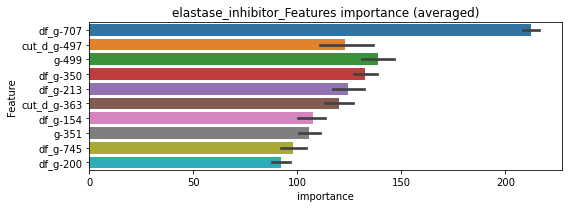

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000242886	valid_1's binary_logloss: 0.00106617
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.00023158	valid_1's binary_logloss: 0.0010366


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000243205	valid_1's binary_logloss: 0.000854883
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000238739	valid_1's binary_logloss: 0.000847705


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000242955	valid_1's binary_logloss: 0.000320366
Early stopping, best iteration is:
[1242]	training's binary_logloss: 0.000228897	valid_1's binary_logloss: 0.000303247


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000240208	valid_1's binary_logloss: 0.000729882
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000227291	valid_1's binary_logloss: 0.000706694


elastase_inhibitor logloss: 0.0007235602484344621
erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000362937	valid_1's binary_logloss: 0.00277857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000322508	valid_1's binary_logloss: 0.0025593
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000324188	valid_1's binary_logloss: 0.000841975
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020080, Threshold: 0.0065932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0065932, conf_0:0.00462, conf_1:0.00857
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_1: 0.0365932


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328764	valid_1's binary_logloss: 0.000908318


threshold: 0.0365932, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0365932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0365932, conf_0:0.02927, conf_1:0.04391
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0665932


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0665932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0665932, conf_0:0.05993, conf_1:0.07325


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


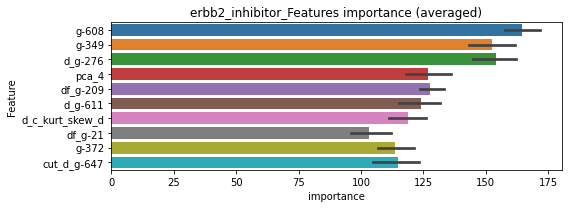

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000366766	valid_1's binary_logloss: 0.00258567


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000354687	valid_1's binary_logloss: 0.00120626
Early stopping, best iteration is:
[1382]	training's binary_logloss: 0.000313521	valid_1's binary_logloss: 0.00112317


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000353087	valid_1's binary_logloss: 0.000674231
Early stopping, best iteration is:
[1361]	training's binary_logloss: 0.000314349	valid_1's binary_logloss: 0.000610934


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000354635	valid_1's binary_logloss: 0.000893781
Early stopping, best iteration is:
[1341]	training's binary_logloss: 0.000317391	valid_1's binary_logloss: 0.000821596


erbb2_inhibitor logloss: 0.0012855218568799103


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.083948	valid_1's binary_logloss: 0.134299
[2000]	training's binary_logloss: 0.0484151	valid_1's binary_logloss: 0.123058
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.0485235	valid_1's binary_logloss: 0.122949
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0817118	valid_1's binary_logloss: 0.144339
Early stopping, best iteration is:
[1679]	training's binary_logloss: 0.0545563	valid_1's binary_logloss: 0.138333
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0845	valid_1's binary_logloss: 0.128058
[2000]	training's binary_logloss: 0.048807	valid_1's binary_logloss: 0.116707
Early stopping, best iteration is:
[2160]	training's binary_logloss: 0.0453441	valid_1's binary_logloss: 0.115717
Training until validation scores don't improve for 29 rounds
[1000]	training's binary

1 / 3, AUC score:0.959, PR-AUC:0.925
y_Threshold: 0.0668288, Threshold: 0.0985860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 356 → Positive_corect_labels: 701/4439
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0985860, conf_0:0.06901, conf_1:0.12816
Num_p_label: 13.0, Expected: 26.4, Adj_threshold_1: 0.1285860
threshold: 0.1285860, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 701.0/4439, y_label_rate: 0.1579185
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0470539	valid_1's binary_logloss: 0.0704771
[2000]	training's binary_logloss: 0.0259846	valid_1's binary_logloss: 0.059212
[3000]	training's binary_logloss: 0.0174433	valid_1's binary_logloss: 0.055594
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.0170653	valid_1's binary_logloss: 0.0554594
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0478103	valid_1's binary_logloss: 0.0638114
[2000]	training's binary_logloss: 0.0266058	valid_1's binary_logloss: 0.0519632
[3000]	training's binary_logloss: 0.0178382	valid_1's binary_logloss: 0.0476667
Early stopping, best iteration is:
[3067]	training's binary_logloss: 0.0174432	valid_1's binary_logloss: 0.0474676
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0449622	valid_1's binary_logloss: 0.0800301
[2000]	training's binary_logl

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0527203, Threshold: 0.1285860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 671.0/4379
p_label_rate: 0.0047715 Vs.target_rate: 0.00663
Num_p_label: 19.0, Expected: 26.4, Threshold: 0.1285860, conf_0:0.10287, conf_1:0.15430
threshold: 0.1285860, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 671.0/4379, y_label_rate: 0.1532313
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343618	valid_1's binary_logloss: 0.0473334
[2000]	training's binary_logloss: 0.0187258	valid_1's binary_logloss: 0.0353882
[3000]	training's binary_logloss: 0.0125934	valid_1's binary_logloss: 0.0312588
Early stopping, best iteration is:
[3771]	training's binary_logloss: 0.0100127	valid_1's binary_logloss: 0.0297643
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327981	valid_1's binary_logloss: 0.0529011
[2000]	training's binary_logloss: 0.0179417	valid_1's binary_logloss: 0.040778
[3000]	training's binary_logloss: 0.0120638	valid_1's binary_logloss: 0.0364819
Early stopping, best iteration is:
[3785]	training's binary_logloss: 0.00957452	valid_1's binary_logloss: 0.0348918
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0339657	valid_1's binary_logloss: 0.0498923
[2000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0405706, Threshold: 0.1285860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 659.0/4355
p_label_rate: 0.0090407 Vs.target_rate: 0.00663
Num_p_label: 36.0, Expected: 26.4, Threshold: 0.1285860, conf_0:0.11573, conf_1:0.14144
threshold: 0.1285860, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 659.0/4355, y_label_rate: 0.1513203


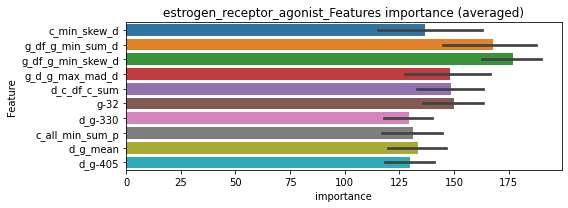

len(train_index) : 3266
len(valid_index) : 1089
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0374488	valid_1's binary_logloss: 0.0550572
[2000]	training's binary_logloss: 0.0202215	valid_1's binary_logloss: 0.0387867
[3000]	training's binary_logloss: 0.0140332	valid_1's binary_logloss: 0.0333782
Early stopping, best iteration is:
[3721]	training's binary_logloss: 0.0115317	valid_1's binary_logloss: 0.0313512


len(train_index) : 3266
len(valid_index) : 1089
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0378532	valid_1's binary_logloss: 0.0495595
[2000]	training's binary_logloss: 0.020467	valid_1's binary_logloss: 0.0328525
[3000]	training's binary_logloss: 0.0141242	valid_1's binary_logloss: 0.0272062
[4000]	training's binary_logloss: 0.0107979	valid_1's binary_logloss: 0.0244367
[5000]	training's binary_logloss: 0.00872947	valid_1's binary_logloss: 0.0227534
[6000]	training's binary_logloss: 0.0073066	valid_1's binary_logloss: 0.0215969
Early stopping, best iteration is:
[6475]	training's binary_logloss: 0.00678973	valid_1's binary_logloss: 0.021158


len(train_index) : 3266
len(valid_index) : 1089
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0388107	valid_1's binary_logloss: 0.0463389
[2000]	training's binary_logloss: 0.021401	valid_1's binary_logloss: 0.0289755
[3000]	training's binary_logloss: 0.0147351	valid_1's binary_logloss: 0.0228261
[4000]	training's binary_logloss: 0.0112342	valid_1's binary_logloss: 0.0196713
[5000]	training's binary_logloss: 0.00905673	valid_1's binary_logloss: 0.0179039
[6000]	training's binary_logloss: 0.00754694	valid_1's binary_logloss: 0.016461
[7000]	training's binary_logloss: 0.0064845	valid_1's binary_logloss: 0.0154674
[8000]	training's binary_logloss: 0.00569622	valid_1's binary_logloss: 0.014703
[9000]	training's binary_logloss: 0.00507267	valid_1's binary_logloss: 0.0140683
[10000]	training's binary_logloss: 0.00458183	valid_1's binary_logloss: 0.0136285
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00458183	valid_1's binary_logloss: 0.0136285


len(train_index) : 3267
len(valid_index) : 1088
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383523	valid_1's binary_logloss: 0.0488275
[2000]	training's binary_logloss: 0.0208495	valid_1's binary_logloss: 0.0316119
[3000]	training's binary_logloss: 0.014395	valid_1's binary_logloss: 0.0258211
[4000]	training's binary_logloss: 0.0110134	valid_1's binary_logloss: 0.0229215
[5000]	training's binary_logloss: 0.00888941	valid_1's binary_logloss: 0.0212526
[6000]	training's binary_logloss: 0.00742584	valid_1's binary_logloss: 0.0199255
Early stopping, best iteration is:
[6857]	training's binary_logloss: 0.0065099	valid_1's binary_logloss: 0.0192023


estrogen_receptor_agonist logloss: 0.02133579076608215
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00052112	valid_1's binary_logloss: 0.00952746
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.0139528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000538499	valid_1's binary_logloss: 0.00393803
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049400, Threshold: 0.1903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1903560, conf_0:0.13325, conf_1:0.24746
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.2203560
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.2503560


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00121031	valid_1's binary_logloss: 0.0265691


Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3103560
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3403560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.3703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4003560
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4303560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4603560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4903560
threshold: 0.4903560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000512582	valid_1's binary_logloss: 0.00748627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000560406	valid_1's binary_logloss: 0.013222
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000499526	valid_1's binary_logloss: 0.00431506
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0376580, Threshold: 0.4903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, Expected: 8.0, Threshold: 0.4903560, conf_0:0.39228, conf_1:0.58843
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5203560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5503560
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.5803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6103560


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00102477	valid_1's binary_logloss: 0.0278137


Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6403560
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.6703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.7003560
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7303560
threshold: 0.7303560, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000468066	valid_1's binary_logloss: 0.00451032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000506699	valid_1's binary_logloss: 0.00878163
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000514102	valid_1's binary_logloss: 0.00741139
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000521993	valid_1's binary_logloss: 0.0177837


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0451250, Threshold: 0.7303560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.7303560, conf_0:0.65732, conf_1:0.80339
threshold: 0.7303560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


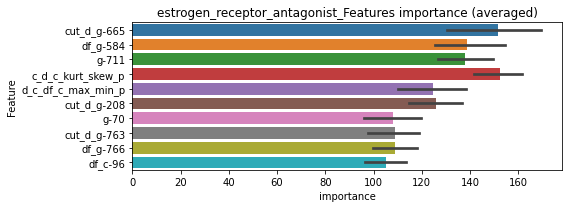

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000551545	valid_1's binary_logloss: 0.00536604
Early stopping, best iteration is:
[1108]	training's binary_logloss: 0.000516153	valid_1's binary_logloss: 0.00527193


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00106146	valid_1's binary_logloss: 0.0176717
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000546493	valid_1's binary_logloss: 0.00934193
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000508012	valid_1's binary_logloss: 0.00917821


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000563565	valid_1's binary_logloss: 0.00397979
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.000497161	valid_1's binary_logloss: 0.00379127


estrogen_receptor_antagonist logloss: 0.008979595558223873
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000453312	valid_1's binary_logloss: 0.00551267
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000424357	valid_1's binary_logloss: 0.00484501
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000422203	valid_1's binary_logloss: 0.00240841
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028585, Threshold: 0.0094032, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042021	valid_1's binary_logloss: 0.0042654


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0094032, conf_0:0.00658, conf_1:0.01222
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0394032
threshold: 0.0394032, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03152, conf_1:0.04728
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03546, conf_1:0.04334
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


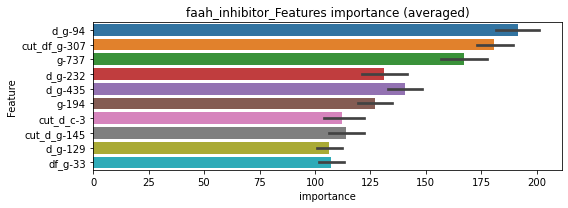

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000460935	valid_1's binary_logloss: 0.00446085
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.00043266	valid_1's binary_logloss: 0.00439596


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000459701	valid_1's binary_logloss: 0.00443803
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000455009	valid_1's binary_logloss: 0.00442129


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000473085	valid_1's binary_logloss: 0.0021215
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.000420432	valid_1's binary_logloss: 0.0020139


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000462663	valid_1's binary_logloss: 0.00343181
Early stopping, best iteration is:
[1291]	training's binary_logloss: 0.000406515	valid_1's binary_logloss: 0.00329169


faah_inhibitor logloss: 0.0035312319172182563
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000294267	valid_1's binary_logloss: 0.00138727
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287027	valid_1's binary_logloss: 0.000989525
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000294857	valid_1's binary_logloss: 0.000523521
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014914, Threshold: 0.0039949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039949, conf_0:0.00280, conf_1:0.00519
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339949


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000294923	valid_1's binary_logloss: 0.00342668


threshold: 0.0339949, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0339949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339949, conf_0:0.02720, conf_1:0.04079
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0639949
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0639949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0639949, conf_0:0.05760, conf_1:0.07039
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


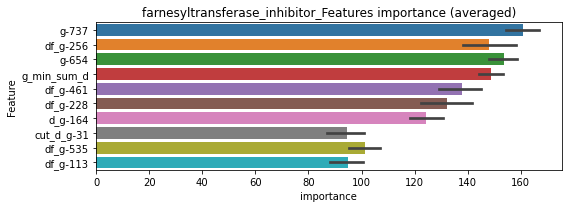

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314314	valid_1's binary_logloss: 0.00146666
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.00029346	valid_1's binary_logloss: 0.00142293


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314197	valid_1's binary_logloss: 0.000824582
Early stopping, best iteration is:
[1411]	training's binary_logloss: 0.000279593	valid_1's binary_logloss: 0.00077211


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315102	valid_1's binary_logloss: 0.000536111
Early stopping, best iteration is:
[1333]	training's binary_logloss: 0.000284877	valid_1's binary_logloss: 0.000489269


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000327859	valid_1's binary_logloss: 0.00317888


farnesyltransferase_inhibitor logloss: 0.001465787861753311
fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000339498	valid_1's binary_logloss: 0.00115366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000337202	valid_1's binary_logloss: 0.00721403
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000347535	valid_1's binary_logloss: 0.00164577
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019709, Threshold: 0.0089775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0089775, conf_0:0.00628, conf_1:0.01167
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0389775
threshold: 0.0389775, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000464814	valid_1's binary_logloss: 0.00582089


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000328965	valid_1's binary_logloss: 0.00100649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000330453	valid_1's binary_logloss: 0.00610751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000336006	valid_1's binary_logloss: 0.00162638
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298382, Threshold: 0.0389775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00105
Num_p_label: 18.0, Expected: 4.2, Threshold: 0.0389775, conf_0:0.03118, conf_1:0.04677
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0689775


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000421339	valid_1's binary_logloss: 0.0068925


threshold: 0.0689775, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000328965	valid_1's binary_logloss: 0.00100649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000330453	valid_1's binary_logloss: 0.00610751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000336006	valid_1's binary_logloss: 0.00162638
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298382, Threshold: 0.0689775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.0689775, conf_0:0.06208, conf_1:0.07588


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000421339	valid_1's binary_logloss: 0.0068925


threshold: 0.0689775, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


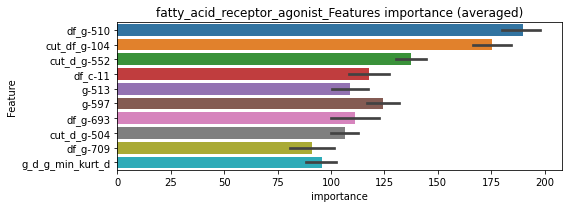

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000374701	valid_1's binary_logloss: 0.000881869
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.000338163	valid_1's binary_logloss: 0.000820353


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000368222	valid_1's binary_logloss: 0.00497443
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.00034826	valid_1's binary_logloss: 0.00489154


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377179	valid_1's binary_logloss: 0.00150404
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000352781	valid_1's binary_logloss: 0.00145564


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000389642	valid_1's binary_logloss: 0.00650976


fatty_acid_receptor_agonist logloss: 0.003419385974638453
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000514423	valid_1's binary_logloss: 0.0175326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000512766	valid_1's binary_logloss: 0.0073775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00052688	valid_1's binary_logloss: 0.00446889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.0109288


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043282, Threshold: 0.0176913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0176913, conf_0:0.01238, conf_1:0.02300
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0476913
threshold: 0.0476913, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000677432	valid_1's binary_logloss: 0.0177828
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000498116	valid_1's binary_logloss: 0.00624964
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00051051	valid_1's binary_logloss: 0.00377615
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000498538	valid_1's binary_logloss: 0.0110419


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246261, Threshold: 0.0476913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00210
Num_p_label: 30.0, Expected: 8.4, Threshold: 0.0476913, conf_0:0.03815, conf_1:0.05723
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_1: 0.0776913
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000489695	valid_1's binary_logloss: 0.00513002
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526	valid_1's binary_logloss: 0.0151451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00050432	valid_1's binary_logloss: 0.00162243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000492852	valid_1's binary_logloss: 0.0155387


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0190430, Threshold: 0.0776913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0776913, conf_0:0.06992, conf_1:0.08546
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


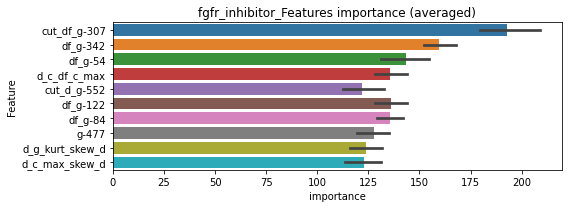

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000611764	valid_1's binary_logloss: 0.00823541
Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000536567	valid_1's binary_logloss: 0.00803269


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000614704	valid_1's binary_logloss: 0.00731066
Early stopping, best iteration is:
[1287]	training's binary_logloss: 0.000526126	valid_1's binary_logloss: 0.00705559


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000618019	valid_1's binary_logloss: 0.00345835
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.000519206	valid_1's binary_logloss: 0.00319202


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000599229	valid_1's binary_logloss: 0.0116973
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.00056945	valid_1's binary_logloss: 0.0115857


fgfr_inhibitor logloss: 0.007467716396004691


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0578875	valid_1's binary_logloss: 0.144741
Early stopping, best iteration is:
[1383]	training's binary_logloss: 0.0424055	valid_1's binary_logloss: 0.140181
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0574516	valid_1's binary_logloss: 0.149525
Early stopping, best iteration is:
[1410]	training's binary_logloss: 0.0410142	valid_1's binary_logloss: 0.144955
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0594478	valid_1's binary_logloss: 0.123149
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.0313755	valid_1's binary_logloss: 0.11172
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0578529	valid_1's binary_logloss: 0.143485
Early stopping, best iteration is:
[1890]	training's binary_logloss: 0.0305765	valid_1's binary_log

1 / 3, AUC score:0.962, PR-AUC:0.930
y_Threshold: 0.0654645, Threshold: 0.1006016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 549 → Positive_corect_labels: 1157/7258
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1006016, conf_0:0.07042, conf_1:0.13078
threshold: 0.1006016, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1157.0/7258, y_label_rate: 0.1594103
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0375101	valid_1's binary_logloss: 0.0778178
[2000]	training's binary_logloss: 0.0187548	valid_1's binary_logloss: 0.0674428
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.0148244	valid_1's binary_logloss: 0.0654546
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0365092	valid_1's binary_logloss: 0.0948307
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0213571	valid_1's binary_logloss: 0.0872378
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0385885	valid_1's binary_logloss: 0.072463
[2000]	training's binary_logloss: 0.0192521	valid_1's binary_logloss: 0.0615186
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0149326	valid_1's binary_logloss: 0.0589351
Training until validation scores don't improve for 29 rounds
[1000]	train

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0613906, Threshold: 0.1006016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 1096.0/7136
p_label_rate: 0.0138122 Vs.target_rate: 0.01172
Num_p_label: 55.0, Expected: 46.7, Threshold: 0.1006016, conf_0:0.08048, conf_1:0.12072
threshold: 0.1006016, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1096.0/7136, y_label_rate: 0.1535874
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271084	valid_1's binary_logloss: 0.0615376
[2000]	training's binary_logloss: 0.0135884	valid_1's binary_logloss: 0.0519919
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0129053	valid_1's binary_logloss: 0.0516405
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275431	valid_1's binary_logloss: 0.0607912
[2000]	training's binary_logloss: 0.013905	valid_1's binary_logloss: 0.0511178
Early stopping, best iteration is:
[2621]	training's binary_logloss: 0.0104881	valid_1's binary_logloss: 0.0487497
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284798	valid_1's binary_logloss: 0.0486406
[2000]	training's binary_logloss: 0.0143425	valid_1's binary_logloss: 0.0383083
[3000]	training's binary_logloss: 0.00938983	valid_1's binary_logloss: 0.0346115
Early stopping, best iterat

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0487467, Threshold: 0.1006016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1070.0/7084
p_label_rate: 0.0143144 Vs.target_rate: 0.01172
Num_p_label: 57.0, Expected: 46.7, Threshold: 0.1006016, conf_0:0.09054, conf_1:0.11066
threshold: 0.1006016, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1070.0/7084, y_label_rate: 0.1510446


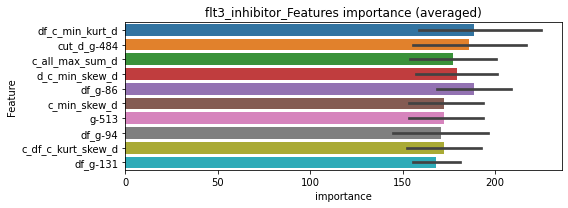

len(train_index) : 5313
len(valid_index) : 1771
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346089	valid_1's binary_logloss: 0.0466623
[2000]	training's binary_logloss: 0.0182516	valid_1's binary_logloss: 0.0317583
[3000]	training's binary_logloss: 0.0121996	valid_1's binary_logloss: 0.0262677
[4000]	training's binary_logloss: 0.00910011	valid_1's binary_logloss: 0.0234605
[5000]	training's binary_logloss: 0.00723918	valid_1's binary_logloss: 0.021731
[6000]	training's binary_logloss: 0.00602699	valid_1's binary_logloss: 0.0206311
[7000]	training's binary_logloss: 0.00516085	valid_1's binary_logloss: 0.0197678
Early stopping, best iteration is:
[7877]	training's binary_logloss: 0.00458192	valid_1's binary_logloss: 0.0191846


len(train_index) : 5313
len(valid_index) : 1771
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327105	valid_1's binary_logloss: 0.0527155
[2000]	training's binary_logloss: 0.0171389	valid_1's binary_logloss: 0.0394563
[3000]	training's binary_logloss: 0.0114852	valid_1's binary_logloss: 0.0351371
[4000]	training's binary_logloss: 0.00859333	valid_1's binary_logloss: 0.0329439
Early stopping, best iteration is:
[4049]	training's binary_logloss: 0.00848704	valid_1's binary_logloss: 0.032877


len(train_index) : 5313
len(valid_index) : 1771
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0322908	valid_1's binary_logloss: 0.058067
[2000]	training's binary_logloss: 0.0168687	valid_1's binary_logloss: 0.0451994
[3000]	training's binary_logloss: 0.0112712	valid_1's binary_logloss: 0.0409296
Early stopping, best iteration is:
[3588]	training's binary_logloss: 0.00942849	valid_1's binary_logloss: 0.0395963


len(train_index) : 5313
len(valid_index) : 1771
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336159	valid_1's binary_logloss: 0.0492241
[2000]	training's binary_logloss: 0.0176201	valid_1's binary_logloss: 0.0359143
[3000]	training's binary_logloss: 0.0117591	valid_1's binary_logloss: 0.0312264
[4000]	training's binary_logloss: 0.00880397	valid_1's binary_logloss: 0.0289025
Early stopping, best iteration is:
[4556]	training's binary_logloss: 0.0077117	valid_1's binary_logloss: 0.028052


flt3_inhibitor logloss: 0.02992747495465027
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00118516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297237	valid_1's binary_logloss: 0.00197324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288964	valid_1's binary_logloss: 0.00115505
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014519, Threshold: 0.0051613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051613, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0351613


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000288802	valid_1's binary_logloss: 0.00104823


threshold: 0.0351613, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0351613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0351613, conf_0:0.02813, conf_1:0.04219
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0651613


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0651613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0651613, conf_0:0.05865, conf_1:0.07168


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


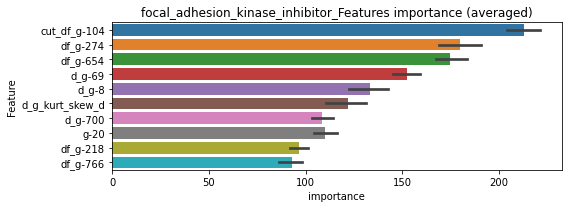

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000321588	valid_1's binary_logloss: 0.000908987
Early stopping, best iteration is:
[1509]	training's binary_logloss: 0.000278154	valid_1's binary_logloss: 0.000821932


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000319436	valid_1's binary_logloss: 0.00139385
Early stopping, best iteration is:
[1396]	training's binary_logloss: 0.000282058	valid_1's binary_logloss: 0.0013002


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00032147	valid_1's binary_logloss: 0.000719365
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.000278602	valid_1's binary_logloss: 0.000653059


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000323804	valid_1's binary_logloss: 0.000833122
Early stopping, best iteration is:
[1571]	training's binary_logloss: 0.000278597	valid_1's binary_logloss: 0.000750571


focal_adhesion_kinase_inhibitor logloss: 0.0008815021705452364
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000295281	valid_1's binary_logloss: 0.000980463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000296919	valid_1's binary_logloss: 0.00130742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295748	valid_1's binary_logloss: 0.000676627
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014677, Threshold: 0.0061014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0061014, conf_0:0.00427, conf_1:0.00793
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0361014


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000301416	valid_1's binary_logloss: 0.0022544


threshold: 0.0361014, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0361014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0361014, conf_0:0.02888, conf_1:0.04332
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0661014
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0961014
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0961014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0961014, conf_0:0.08649, conf_1:0.10571
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


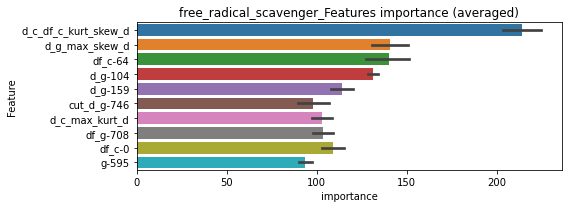

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000319129	valid_1's binary_logloss: 0.000809441
Early stopping, best iteration is:
[1394]	training's binary_logloss: 0.000286441	valid_1's binary_logloss: 0.000746733


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000315673	valid_1's binary_logloss: 0.00113467
Early stopping, best iteration is:
[1316]	training's binary_logloss: 0.000287115	valid_1's binary_logloss: 0.00106724


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000319106	valid_1's binary_logloss: 0.000535912
Early stopping, best iteration is:
[1321]	training's binary_logloss: 0.000289222	valid_1's binary_logloss: 0.000496619


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000321162	valid_1's binary_logloss: 0.00173645
Early stopping, best iteration is:
[1156]	training's binary_logloss: 0.000301063	valid_1's binary_logloss: 0.00170324


free_radical_scavenger logloss: 0.00100346036410221
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000353994	valid_1's binary_logloss: 0.0014373
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000358147	valid_1's binary_logloss: 0.00699769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357463	valid_1's binary_logloss: 0.000822493
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019324, Threshold: 0.0069234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003528	valid_1's binary_logloss: 0.00224403


p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0069234, conf_0:0.00485, conf_1:0.00900
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_1: 0.0369234
threshold: 0.0369234, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176620, Threshold: 0.0369234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


p_label_rate: 0.0045203 Vs.target_rate: 0.00097
Num_p_label: 18.0, Expected: 3.8, Threshold: 0.0369234, conf_0:0.02954, conf_1:0.04431
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_1: 0.0669234
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_2: 0.0969234
threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176620, Threshold: 0.0969234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0969234, conf_0:0.08723, conf_1:0.10662


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


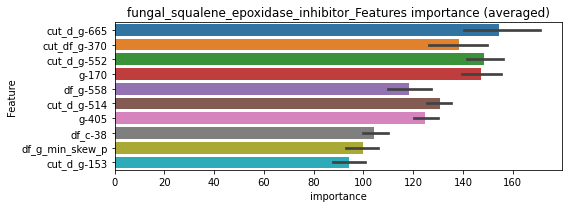

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000379466	valid_1's binary_logloss: 0.00123647
Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000358982	valid_1's binary_logloss: 0.00119798


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000374373	valid_1's binary_logloss: 0.00747834
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.00036932	valid_1's binary_logloss: 0.00746217


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000382588	valid_1's binary_logloss: 0.000826193
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.000364287	valid_1's binary_logloss: 0.000796188


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377638	valid_1's binary_logloss: 0.0021281
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000369441	valid_1's binary_logloss: 0.00210538


fungal_squalene_epoxidase_inhibitor logloss: 0.002890635380697041
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0676847	valid_1's binary_logloss: 0.130355
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0456322	valid_1's binary_logloss: 0.122286
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0699236	valid_1's binary_logloss: 0.116565
[2000]	training's binary_logloss: 0.0396974	valid_1's binary_logloss: 0.104029
Early stopping, best iteration is:
[2252]	training's binary_logloss: 0.0355814	valid_1's binary_logloss: 0.102616
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0709513	valid_1's binary_logloss: 0.109857
[2000]	training's binary_logloss: 0.0402714	valid_1's binary_logloss: 0.0977107
Early stopping, best iteration is:
[2603]	training's binary_logloss: 0.0312105	valid_1's binary_logloss: 0.0956596
Training until validation scores don't improve for 29 rounds
[1000]	training's

1 / 3, AUC score:0.982, PR-AUC:0.960
y_Threshold: 0.0533799, Threshold: 0.1516109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 217 → Positive_corect_labels: 610/3703
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1516109, conf_0:0.10613, conf_1:0.19709
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.1816109
threshold: 0.1816109, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 610.0/3703, y_label_rate: 0.1647313
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519832	valid_1's binary_logloss: 0.0732383
[2000]	training's binary_logloss: 0.0287886	valid_1's binary_logloss: 0.0582667
[3000]	training's binary_logloss: 0.0192814	valid_1's binary_logloss: 0.0531326
[4000]	training's binary_logloss: 0.0143367	valid_1's binary_logloss: 0.050508
Early stopping, best iteration is:
[4660]	training's binary_logloss: 0.0122715	valid_1's binary_logloss: 0.0492233
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0466195	valid_1's binary_logloss: 0.0985366
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.0306065	valid_1's binary_logloss: 0.0900816
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519346	valid_1's binary_logloss: 0.0678218
[2000]	training's binary_logloss: 0.0287173	valid_1's binary_logloss: 0.0543722
[3000]	training's binary_log

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0621249, Threshold: 0.1816109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 585.0/3653
p_label_rate: 0.0228528 Vs.target_rate: 0.00445
Num_p_label: 91.0, Expected: 17.7, Threshold: 0.1816109, conf_0:0.14529, conf_1:0.21793
Num_p_label: 76.0, Expected: 17.7, Adj_threshold_1: 0.2116109
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_2: 0.2416109
Num_p_label: 51.0, Expected: 17.7, Adj_threshold_3: 0.2716109
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_4: 0.3016109
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_5: 0.3316109
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_6: 0.3616109
threshold: 0.3616109, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 585.0/3653, y_label_rate: 0.1601423
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0371324	valid_1's binary_logloss: 0.0612522
[2000]	training's binary_logloss: 0.0202378	valid_1's binary_logloss: 0.0487017
[3000]	training's binary_logloss: 0.0136558	valid_1's binary_logloss: 0.0442994
Early stopping, best iteration is:
[3030]	training's binary_logloss: 0.0135201	valid_1's binary_logloss: 0.0442441
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0381392	valid_1's binary_logloss: 0.0607535
[2000]	training's binary_logloss: 0.0208327	valid_1's binary_logloss: 0.0467437
Early stopping, best iteration is:
[2966]	training's binary_logloss: 0.0141412	valid_1's binary_logloss: 0.0420788
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0386512	valid_1's binary_logloss: 0.0542361
[2000]	training's binary_logloss: 0.0211941	valid_1's binary_logloss: 0.0415948
[3000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0584053, Threshold: 0.3616109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 570.0/3623
p_label_rate: 0.0170768 Vs.target_rate: 0.00445
Num_p_label: 68.0, Expected: 17.7, Threshold: 0.3616109, conf_0:0.32545, conf_1:0.39777
Num_p_label: 53.0, Expected: 17.7, Adj_threshold_1: 0.3916109
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_2: 0.4216109
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_3: 0.4516109
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_4: 0.4816109
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_5: 0.5116109
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_6: 0.5416109
threshold: 0.5416109, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 570.0/3623, y_label_rate: 0.1573282


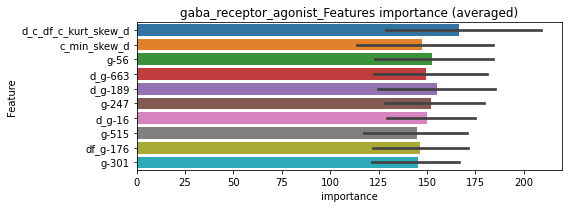

len(train_index) : 2717
len(valid_index) : 906
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0420227	valid_1's binary_logloss: 0.0587825
[2000]	training's binary_logloss: 0.0225174	valid_1's binary_logloss: 0.039577
[3000]	training's binary_logloss: 0.0155453	valid_1's binary_logloss: 0.0332879
[4000]	training's binary_logloss: 0.0118613	valid_1's binary_logloss: 0.0300448
[5000]	training's binary_logloss: 0.00955855	valid_1's binary_logloss: 0.0282557
[6000]	training's binary_logloss: 0.00798074	valid_1's binary_logloss: 0.0269862
[7000]	training's binary_logloss: 0.00685506	valid_1's binary_logloss: 0.026175
[8000]	training's binary_logloss: 0.00601935	valid_1's binary_logloss: 0.0255405
Early stopping, best iteration is:
[8534]	training's binary_logloss: 0.00564696	valid_1's binary_logloss: 0.0251969


len(train_index) : 2717
len(valid_index) : 906
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421574	valid_1's binary_logloss: 0.0571239
[2000]	training's binary_logloss: 0.0228145	valid_1's binary_logloss: 0.0380478
[3000]	training's binary_logloss: 0.0158145	valid_1's binary_logloss: 0.0314554
[4000]	training's binary_logloss: 0.0120698	valid_1's binary_logloss: 0.0280601
[5000]	training's binary_logloss: 0.00974636	valid_1's binary_logloss: 0.0260372
[6000]	training's binary_logloss: 0.00814405	valid_1's binary_logloss: 0.0246116
[7000]	training's binary_logloss: 0.0069968	valid_1's binary_logloss: 0.0236398
Early stopping, best iteration is:
[7480]	training's binary_logloss: 0.0065627	valid_1's binary_logloss: 0.0232888


len(train_index) : 2717
len(valid_index) : 906
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0449268	valid_1's binary_logloss: 0.050038
[2000]	training's binary_logloss: 0.0246374	valid_1's binary_logloss: 0.0294018
[3000]	training's binary_logloss: 0.0171292	valid_1's binary_logloss: 0.0224182
[4000]	training's binary_logloss: 0.0130479	valid_1's binary_logloss: 0.0188594
[5000]	training's binary_logloss: 0.0105146	valid_1's binary_logloss: 0.0164822
[6000]	training's binary_logloss: 0.00877246	valid_1's binary_logloss: 0.0147801
[7000]	training's binary_logloss: 0.00751896	valid_1's binary_logloss: 0.0136077
[8000]	training's binary_logloss: 0.00659657	valid_1's binary_logloss: 0.0126776
[9000]	training's binary_logloss: 0.00588008	valid_1's binary_logloss: 0.0119699
[10000]	training's binary_logloss: 0.00531086	valid_1's binary_logloss: 0.0114204
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00531086	valid_1's binary_logloss: 0.0114204


len(train_index) : 2718
len(valid_index) : 905
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0422939	valid_1's binary_logloss: 0.056942
[2000]	training's binary_logloss: 0.022695	valid_1's binary_logloss: 0.0380174
[3000]	training's binary_logloss: 0.0156788	valid_1's binary_logloss: 0.0317501
[4000]	training's binary_logloss: 0.0119637	valid_1's binary_logloss: 0.0286282
[5000]	training's binary_logloss: 0.00963829	valid_1's binary_logloss: 0.0267028
[6000]	training's binary_logloss: 0.00805162	valid_1's binary_logloss: 0.0253823
[7000]	training's binary_logloss: 0.0069051	valid_1's binary_logloss: 0.0244726
Early stopping, best iteration is:
[7484]	training's binary_logloss: 0.00646393	valid_1's binary_logloss: 0.024166


gaba_receptor_agonist logloss: 0.021017178594667243


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.077147	valid_1's binary_logloss: 0.114597
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0485056	valid_1's binary_logloss: 0.106358
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0733999	valid_1's binary_logloss: 0.13521
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.0605638	valid_1's binary_logloss: 0.13253
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0749626	valid_1's binary_logloss: 0.124157
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.0487422	valid_1's binary_logloss: 0.117778
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0742464	valid_1's binary_logloss: 0.130413
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0472553	valid_1's binary_loglo

1 / 3, AUC score:0.962, PR-AUC:0.932
y_Threshold: 0.0630738, Threshold: 0.0832333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 391 → Positive_corect_labels: 832/5214
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0832333, conf_0:0.05826, conf_1:0.10820
threshold: 0.0832333, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 832.0/5214, y_label_rate: 0.1595704
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0431431	valid_1's binary_logloss: 0.058649
[2000]	training's binary_logloss: 0.0237981	valid_1's binary_logloss: 0.0483071
Early stopping, best iteration is:
[2903]	training's binary_logloss: 0.0164544	valid_1's binary_logloss: 0.0450183
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0424423	valid_1's binary_logloss: 0.0641534
[2000]	training's binary_logloss: 0.0233279	valid_1's binary_logloss: 0.0542469
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.0170472	valid_1's binary_logloss: 0.051868
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404294	valid_1's binary_logloss: 0.0717477
Early stopping, best iteration is:
[1903]	training's binary_logloss: 0.0232587	valid_1's binary_logloss: 0.0629358
Training until validation scores don't improve for 29 rounds
[1000]	traini

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0469471, Threshold: 0.0832333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 793.0/5136
p_label_rate: 0.0050226 Vs.target_rate: 0.00693
Num_p_label: 20.0, Expected: 27.6, Threshold: 0.0832333, conf_0:0.06659, conf_1:0.09988
threshold: 0.0832333, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 793.0/5136, y_label_rate: 0.1544003
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0272127	valid_1's binary_logloss: 0.038284
[2000]	training's binary_logloss: 0.0147252	valid_1's binary_logloss: 0.0292943
[3000]	training's binary_logloss: 0.00985578	valid_1's binary_logloss: 0.0264857
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00966372	valid_1's binary_logloss: 0.0264025
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.027814	valid_1's binary_logloss: 0.0355457
[2000]	training's binary_logloss: 0.0149542	valid_1's binary_logloss: 0.0249892
[3000]	training's binary_logloss: 0.0099906	valid_1's binary_logloss: 0.0212434
[4000]	training's binary_logloss: 0.00745172	valid_1's binary_logloss: 0.0193801
[5000]	training's binary_logloss: 0.0059356	valid_1's binary_logloss: 0.0182053
[6000]	training's binary_logloss: 0.00491814	valid_1's binary_logloss: 0.0174371
Early stopping, best iteration is:
[6391]

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0297587, Threshold: 0.0832333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 783.0/5116
p_label_rate: 0.0055249 Vs.target_rate: 0.00693
Num_p_label: 22.0, Expected: 27.6, Threshold: 0.0832333, conf_0:0.07491, conf_1:0.09156
threshold: 0.0832333, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 783.0/5116, y_label_rate: 0.1530493


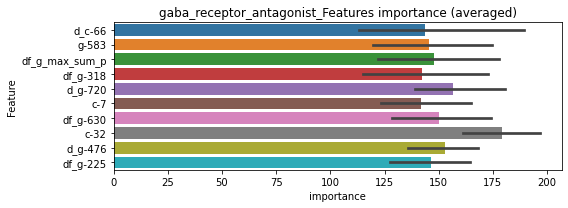

len(train_index) : 3837
len(valid_index) : 1279
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327542	valid_1's binary_logloss: 0.035284
[2000]	training's binary_logloss: 0.0175045	valid_1's binary_logloss: 0.0203123
[3000]	training's binary_logloss: 0.0121455	valid_1's binary_logloss: 0.0156044
[4000]	training's binary_logloss: 0.00923012	valid_1's binary_logloss: 0.0131883
[5000]	training's binary_logloss: 0.00742689	valid_1's binary_logloss: 0.0116581
[6000]	training's binary_logloss: 0.00620193	valid_1's binary_logloss: 0.0106655
[7000]	training's binary_logloss: 0.00532859	valid_1's binary_logloss: 0.00996124
[8000]	training's binary_logloss: 0.00467405	valid_1's binary_logloss: 0.00938691
[9000]	training's binary_logloss: 0.00415669	valid_1's binary_logloss: 0.00893689
[10000]	training's binary_logloss: 0.0037564	valid_1's binary_logloss: 0.00859305
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0037564	valid_1's binary_logloss: 0.00859305

len(train_index) : 3837
len(valid_index) : 1279
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.030525	valid_1's binary_logloss: 0.046533
[2000]	training's binary_logloss: 0.015874	valid_1's binary_logloss: 0.0317474
[3000]	training's binary_logloss: 0.011004	valid_1's binary_logloss: 0.0271468
[4000]	training's binary_logloss: 0.00837827	valid_1's binary_logloss: 0.0249259
[5000]	training's binary_logloss: 0.00676399	valid_1's binary_logloss: 0.0238416
[6000]	training's binary_logloss: 0.00563082	valid_1's binary_logloss: 0.0229405
Early stopping, best iteration is:
[6786]	training's binary_logloss: 0.00497877	valid_1's binary_logloss: 0.0224731


len(train_index) : 3837
len(valid_index) : 1279
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0338008	valid_1's binary_logloss: 0.036191
[2000]	training's binary_logloss: 0.0182693	valid_1's binary_logloss: 0.0204349
[3000]	training's binary_logloss: 0.0127329	valid_1's binary_logloss: 0.0153333
[4000]	training's binary_logloss: 0.00967806	valid_1's binary_logloss: 0.0127881
[5000]	training's binary_logloss: 0.0077976	valid_1's binary_logloss: 0.0111126
[6000]	training's binary_logloss: 0.00650342	valid_1's binary_logloss: 0.00994702
[7000]	training's binary_logloss: 0.00558089	valid_1's binary_logloss: 0.00916571
[8000]	training's binary_logloss: 0.00488931	valid_1's binary_logloss: 0.00849494
[9000]	training's binary_logloss: 0.00434557	valid_1's binary_logloss: 0.00800541
[10000]	training's binary_logloss: 0.00392723	valid_1's binary_logloss: 0.00762175
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00392723	valid_1's binary_logloss: 0.007621

len(train_index) : 3837
len(valid_index) : 1279
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0305535	valid_1's binary_logloss: 0.046066
[2000]	training's binary_logloss: 0.0158545	valid_1's binary_logloss: 0.0313668
[3000]	training's binary_logloss: 0.0109891	valid_1's binary_logloss: 0.0267829
[4000]	training's binary_logloss: 0.0083976	valid_1's binary_logloss: 0.0245503
[5000]	training's binary_logloss: 0.00678226	valid_1's binary_logloss: 0.0234579
[6000]	training's binary_logloss: 0.00567313	valid_1's binary_logloss: 0.0224803
Early stopping, best iteration is:
[6030]	training's binary_logloss: 0.00564537	valid_1's binary_logloss: 0.0224482


gaba_receptor_antagonist logloss: 0.01528401134368513
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00061414	valid_1's binary_logloss: 0.028672
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00059292	valid_1's binary_logloss: 0.0138343
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00053579	valid_1's binary_logloss: 0.00532702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000562109	valid_1's binary_logloss: 0.020655


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040846, Threshold: 0.0148952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0148952, conf_0:0.01043, conf_1:0.01936
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0448952
threshold: 0.0448952, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515198	valid_1's binary_logloss: 0.0268571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000513255	valid_1's binary_logloss: 0.0104279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000534547	valid_1's binary_logloss: 0.0056577
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234573, Threshold: 0.0448952, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000658203	valid_1's binary_logloss: 0.0193247


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, Expected: 9.4, Threshold: 0.0448952, conf_0:0.03592, conf_1:0.05387
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0748952
threshold: 0.0748952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000513834	valid_1's binary_logloss: 0.0151799
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000529141	valid_1's binary_logloss: 0.00726634
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000537653	valid_1's binary_logloss: 0.00794365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000624862	valid_1's binary_logloss: 0.0228448


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177893, Threshold: 0.0748952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, Expected: 9.4, Threshold: 0.0748952, conf_0:0.06741, conf_1:0.08238
threshold: 0.0748952, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


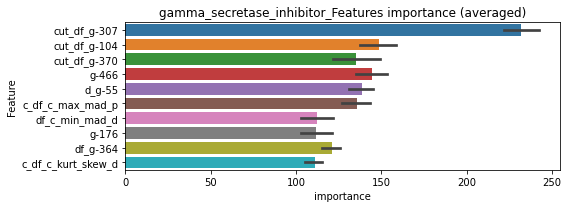

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00066403	valid_1's binary_logloss: 0.0192076


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000810489	valid_1's binary_logloss: 0.0173838


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000617913	valid_1's binary_logloss: 0.00927255
Early stopping, best iteration is:
[1298]	training's binary_logloss: 0.000522254	valid_1's binary_logloss: 0.00892288


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00111978	valid_1's binary_logloss: 0.0146029


gamma_secretase_inhibitor logloss: 0.015031286481554683


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0515213	valid_1's binary_logloss: 0.130309
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.0430674	valid_1's binary_logloss: 0.128742
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0515166	valid_1's binary_logloss: 0.125716
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0292767	valid_1's binary_logloss: 0.120468
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0527301	valid_1's binary_logloss: 0.120218
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0316851	valid_1's binary_logloss: 0.114419
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0524591	valid_1's binary_logloss: 0.121748
Early stopping, best iteration is:
[1541]	training's binary_logloss: 0.0341352	valid_1's binary_lo

1 / 3, AUC score:0.966, PR-AUC:0.939
y_Threshold: 0.0571515, Threshold: 0.0871865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 574 → Positive_corect_labels: 1290/8027
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.0871865, conf_0:0.06103, conf_1:0.11334
threshold: 0.0871865, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1290.0/8027, y_label_rate: 0.1607076
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0313505	valid_1's binary_logloss: 0.0715662
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.0166703	valid_1's binary_logloss: 0.0649904
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0312754	valid_1's binary_logloss: 0.0724274
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.0181416	valid_1's binary_logloss: 0.0659665
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319804	valid_1's binary_logloss: 0.0633822
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0166711	valid_1's binary_logloss: 0.0557772
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0321136	valid_1's binary_logloss: 0.0654119
[2000]	training's binary_logloss: 0.0157786	valid_1's binary_logloss: 0.0569444
Early stopp

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0550309, Threshold: 0.0871865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1232.0/7911
p_label_rate: 0.0027624 Vs.target_rate: 0.01117
Num_p_label: 11.0, Expected: 44.5, Threshold: 0.0871865, conf_0:0.06975, conf_1:0.10462
threshold: 0.0871865, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1232.0/7911, y_label_rate: 0.1557325
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0239039	valid_1's binary_logloss: 0.0436678
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0122508	valid_1's binary_logloss: 0.0369252
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235462	valid_1's binary_logloss: 0.044955
[2000]	training's binary_logloss: 0.0116197	valid_1's binary_logloss: 0.0372216
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.00977424	valid_1's binary_logloss: 0.0361548
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234346	valid_1's binary_logloss: 0.0497195
[2000]	training's binary_logloss: 0.0115879	valid_1's binary_logloss: 0.0424658
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.011004	valid_1's binary_logloss: 0.0421234
Training until validation scores don't improve for 29 rounds
[1000]	train

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0388291, Threshold: 0.0871865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1210.0/7867
p_label_rate: 0.0002511 Vs.target_rate: 0.01117
Num_p_label: 1.0, Expected: 44.5, Threshold: 0.0871865, conf_0:0.07847, conf_1:0.09591
threshold: 0.0871865, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 1210.0/7867, y_label_rate: 0.1538070


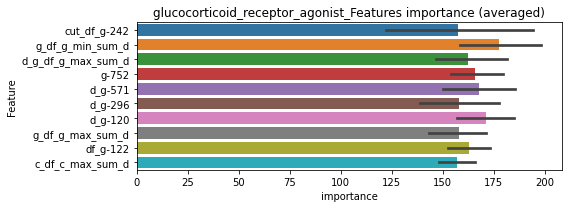

len(train_index) : 5900
len(valid_index) : 1967
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275884	valid_1's binary_logloss: 0.0435634
[2000]	training's binary_logloss: 0.0145472	valid_1's binary_logloss: 0.0335455
[3000]	training's binary_logloss: 0.00976195	valid_1's binary_logloss: 0.0303409
[4000]	training's binary_logloss: 0.00725871	valid_1's binary_logloss: 0.0285464
Early stopping, best iteration is:
[4083]	training's binary_logloss: 0.00710827	valid_1's binary_logloss: 0.0284594


len(train_index) : 5900
len(valid_index) : 1967
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271727	valid_1's binary_logloss: 0.0439762
[2000]	training's binary_logloss: 0.0144963	valid_1's binary_logloss: 0.0351104
[3000]	training's binary_logloss: 0.00970349	valid_1's binary_logloss: 0.0322444
Early stopping, best iteration is:
[3937]	training's binary_logloss: 0.00734071	valid_1's binary_logloss: 0.0308427


len(train_index) : 5900
len(valid_index) : 1967
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0280729	valid_1's binary_logloss: 0.0393494
[2000]	training's binary_logloss: 0.0147937	valid_1's binary_logloss: 0.0292854
[3000]	training's binary_logloss: 0.00987589	valid_1's binary_logloss: 0.0257396
[4000]	training's binary_logloss: 0.00734683	valid_1's binary_logloss: 0.0237595
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00607982	valid_1's binary_logloss: 0.0228537


len(train_index) : 5901
len(valid_index) : 1966
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0278322	valid_1's binary_logloss: 0.040206
[2000]	training's binary_logloss: 0.0148174	valid_1's binary_logloss: 0.0304811
[3000]	training's binary_logloss: 0.00991343	valid_1's binary_logloss: 0.0269543
[4000]	training's binary_logloss: 0.00739298	valid_1's binary_logloss: 0.0251739
Early stopping, best iteration is:
[4102]	training's binary_logloss: 0.0072056	valid_1's binary_logloss: 0.0250568


glucocorticoid_receptor_agonist logloss: 0.026803379677448218
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.00142496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249975	valid_1's binary_logloss: 0.000680271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000248947	valid_1's binary_logloss: 0.000434563
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010229, Threshold: 0.0030542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0030542, conf_0:0.00214, conf_1:0.00397
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0330542
threshold: 0.0330542, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000250396	valid_1's binary_logloss: 0.000817639


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0330542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, Expected: 2.2, Threshold: 0.0330542, conf_0:0.02644, conf_1:0.03967
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0630542
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0630542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0630542, conf_0:0.05675, conf_1:0.06936
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


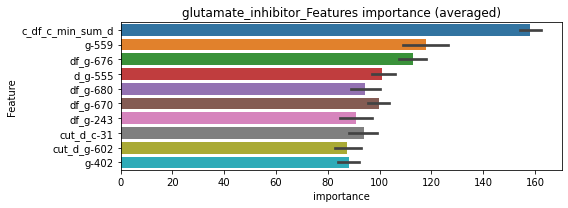

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000262503	valid_1's binary_logloss: 0.000850133
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.000246059	valid_1's binary_logloss: 0.000824889


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000260266	valid_1's binary_logloss: 0.000629977
Early stopping, best iteration is:
[1241]	training's binary_logloss: 0.000246164	valid_1's binary_logloss: 0.000604904


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264465	valid_1's binary_logloss: 0.000345015
Early stopping, best iteration is:
[1247]	training's binary_logloss: 0.000250425	valid_1's binary_logloss: 0.000328009


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00026309	valid_1's binary_logloss: 0.000670634
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000250854	valid_1's binary_logloss: 0.000651026


glutamate_inhibitor logloss: 0.0006022835241332534
glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000748119	valid_1's binary_logloss: 0.0308259
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000784267	valid_1's binary_logloss: 0.0249379
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000879338	valid_1's binary_logloss: 0.0263313
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000675097	valid_1's binary_logloss: 0.0228912


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072194, Threshold: 0.1998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1998152, conf_0:0.13987, conf_1:0.25976
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2298152
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2598152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2898152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3198152
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_5: 0.3498152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3798152
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4098152
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_8: 0.4398152
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_9: 0.4698152
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_10: 0.4998152
threshold: 0.4998152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000967325	valid_1's binary_logloss: 0.0388603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000626981	valid_1's binary_logloss: 0.0227668
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000891856	valid_1's binary_logloss: 0.0283766
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.0005884	valid_1's binary_logloss: 0.0128419


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0410252, Threshold: 0.4998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.4998152, conf_0:0.39985, conf_1:0.59978
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_1: 0.5298152
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.5598152
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5898152
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_4: 0.6198152
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_5: 0.6498152
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_6: 0.6798152
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7098152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7398152
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_9: 0.7698152
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_10: 0.7998152
threshold: 0.7998152, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000707584	valid_1's binary_logloss: 0.0140026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00115994	valid_1's binary_logloss: 0.0333995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000572377	valid_1's binary_logloss: 0.0170369
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0474202, Threshold: 0.7998152, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00100948	valid_1's binary_logloss: 0.0327813


Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0050226 Vs.target_rate: 0.00311
Num_p_label: 20.0, Expected: 12.4, Threshold: 0.7998152, conf_0:0.71983, conf_1:0.87980
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_1: 0.8298152
threshold: 0.8298152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


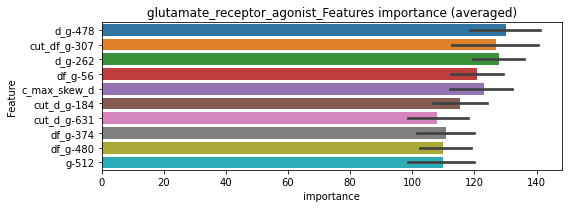

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000808139	valid_1's binary_logloss: 0.0301378


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000704962	valid_1's binary_logloss: 0.0189641
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.00065786	valid_1's binary_logloss: 0.0187245


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000730964	valid_1's binary_logloss: 0.00831423
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000592053	valid_1's binary_logloss: 0.00794391


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00128328	valid_1's binary_logloss: 0.0283642


glutamate_receptor_agonist logloss: 0.021292598471773543


mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0989302	valid_1's binary_logloss: 0.162423
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0819084	valid_1's binary_logloss: 0.159241
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0964879	valid_1's binary_logloss: 0.176633
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.0721383	valid_1's binary_logloss: 0.173039
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0971902	valid_1's binary_logloss: 0.174433
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.0807013	valid_1's binary_logloss: 0.172134
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0973974	valid_1's binary_logloss: 0.167711
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0721608	valid_1's binary_lo

1 / 3, AUC score:0.919, PR-AUC:0.871
y_Threshold: 0.0820989, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 819 → Positive_corect_labels: 1177/7835
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.08001, conf_1:0.14858
threshold: 0.1142929, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1177.0/7835, y_label_rate: 0.1502234
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0426216	valid_1's binary_logloss: 0.0630222
[2000]	training's binary_logloss: 0.0232248	valid_1's binary_logloss: 0.0542144
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.018571	valid_1's binary_logloss: 0.0523454
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0411491	valid_1's binary_logloss: 0.074274
[2000]	training's binary_logloss: 0.022407	valid_1's binary_logloss: 0.0660661
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0195883	valid_1's binary_logloss: 0.0649427
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0423217	valid_1's binary_logloss: 0.0652224
[2000]	training's binary_logloss: 0.0229703	valid_1's binary_logloss: 0.0565572
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0183784	valid_1's binary_logloss: 0.054

2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0504125, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1105.0/7691
p_label_rate: 0.0052737 Vs.target_rate: 0.01541
Num_p_label: 21.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.09143, conf_1:0.13715
threshold: 0.1142929, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1105.0/7691, y_label_rate: 0.1436744
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0230422	valid_1's binary_logloss: 0.0252135
[2000]	training's binary_logloss: 0.0121833	valid_1's binary_logloss: 0.0156144
[3000]	training's binary_logloss: 0.00822924	valid_1's binary_logloss: 0.0123784
[4000]	training's binary_logloss: 0.00617983	valid_1's binary_logloss: 0.0106529
[5000]	training's binary_logloss: 0.00492746	valid_1's binary_logloss: 0.00950262
[6000]	training's binary_logloss: 0.00410699	valid_1's binary_logloss: 0.00870066
[7000]	training's binary_logloss: 0.00352331	valid_1's binary_logloss: 0.00813896
[8000]	training's binary_logloss: 0.00308293	valid_1's binary_logloss: 0.00766613
[9000]	training's binary_logloss: 0.0027457	valid_1's binary_logloss: 0.00729392
[10000]	training's binary_logloss: 0.00247562	valid_1's binary_logloss: 0.00701731
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00247562	valid_1's binary_logloss: 0.007

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0557157, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 1088.0/7657
p_label_rate: 0.0095429 Vs.target_rate: 0.01541
Num_p_label: 38.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.10286, conf_1:0.12572
threshold: 0.1142929, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1088.0/7657, y_label_rate: 0.1420922


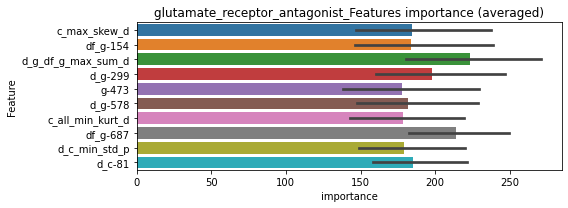

len(train_index) : 5742
len(valid_index) : 1915
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253151	valid_1's binary_logloss: 0.0335964
[2000]	training's binary_logloss: 0.0127395	valid_1's binary_logloss: 0.0198574
[3000]	training's binary_logloss: 0.00852336	valid_1's binary_logloss: 0.0152091
[4000]	training's binary_logloss: 0.00641335	valid_1's binary_logloss: 0.0128816
[5000]	training's binary_logloss: 0.00516938	valid_1's binary_logloss: 0.0115301
[6000]	training's binary_logloss: 0.00434487	valid_1's binary_logloss: 0.0105731
[7000]	training's binary_logloss: 0.00375299	valid_1's binary_logloss: 0.00987527
[8000]	training's binary_logloss: 0.00330507	valid_1's binary_logloss: 0.00936975
[9000]	training's binary_logloss: 0.002949	valid_1's binary_logloss: 0.00892339
[10000]	training's binary_logloss: 0.00266931	valid_1's binary_logloss: 0.00857692
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00266931	valid_1's binary_logloss: 0.008576

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0256892	valid_1's binary_logloss: 0.0305646
[2000]	training's binary_logloss: 0.0129398	valid_1's binary_logloss: 0.0170405
[3000]	training's binary_logloss: 0.00868029	valid_1's binary_logloss: 0.0124985
[4000]	training's binary_logloss: 0.00654698	valid_1's binary_logloss: 0.0102026
[5000]	training's binary_logloss: 0.00529415	valid_1's binary_logloss: 0.00889255
[6000]	training's binary_logloss: 0.00444332	valid_1's binary_logloss: 0.00796171
[7000]	training's binary_logloss: 0.00383541	valid_1's binary_logloss: 0.00729327
[8000]	training's binary_logloss: 0.00337393	valid_1's binary_logloss: 0.00679937
[9000]	training's binary_logloss: 0.0030071	valid_1's binary_logloss: 0.00639704
[10000]	training's binary_logloss: 0.0027257	valid_1's binary_logloss: 0.00610884
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0027257	valid_1's binary_logloss: 0.00610

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0252224	valid_1's binary_logloss: 0.0317306
[2000]	training's binary_logloss: 0.0127192	valid_1's binary_logloss: 0.0182406
[3000]	training's binary_logloss: 0.00852795	valid_1's binary_logloss: 0.0136081
[4000]	training's binary_logloss: 0.006408	valid_1's binary_logloss: 0.0112364
[5000]	training's binary_logloss: 0.00516774	valid_1's binary_logloss: 0.00987477
[6000]	training's binary_logloss: 0.00433464	valid_1's binary_logloss: 0.00889971
[7000]	training's binary_logloss: 0.00373665	valid_1's binary_logloss: 0.00823284
[8000]	training's binary_logloss: 0.00328742	valid_1's binary_logloss: 0.00769821
[9000]	training's binary_logloss: 0.00292762	valid_1's binary_logloss: 0.00726271
[10000]	training's binary_logloss: 0.00264899	valid_1's binary_logloss: 0.00694611
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00264899	valid_1's binary_logloss: 0.0069

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250123	valid_1's binary_logloss: 0.0324606
[2000]	training's binary_logloss: 0.0124439	valid_1's binary_logloss: 0.0194535
[3000]	training's binary_logloss: 0.00829695	valid_1's binary_logloss: 0.0151665
[4000]	training's binary_logloss: 0.00624592	valid_1's binary_logloss: 0.0129868
[5000]	training's binary_logloss: 0.00504179	valid_1's binary_logloss: 0.0117434
[6000]	training's binary_logloss: 0.004233	valid_1's binary_logloss: 0.0108977
[7000]	training's binary_logloss: 0.00365478	valid_1's binary_logloss: 0.0102856
[8000]	training's binary_logloss: 0.0032146	valid_1's binary_logloss: 0.00982993
[9000]	training's binary_logloss: 0.0028699	valid_1's binary_logloss: 0.009477
[10000]	training's binary_logloss: 0.00260116	valid_1's binary_logloss: 0.00920037
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00260116	valid_1's binary_logloss: 0.00920037


glutamate_receptor_antagonist logloss: 0.007708172645868172
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000327946	valid_1's binary_logloss: 0.00417093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000333201	valid_1's binary_logloss: 0.0022164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000327027	valid_1's binary_logloss: 0.00150829
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016159, Threshold: 0.0067539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067539, conf_0:0.00473, conf_1:0.00878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0367539


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000327101	valid_1's binary_logloss: 0.00230603


threshold: 0.0367539, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.0367539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0367539, conf_0:0.02940, conf_1:0.04410
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0667539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967539
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1267539


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.1267539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1267539, conf_0:0.11408, conf_1:0.13943
threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


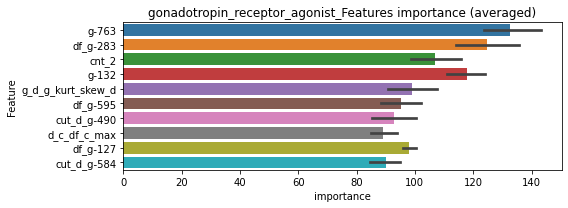

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000334821	valid_1's binary_logloss: 0.00279348
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000327624	valid_1's binary_logloss: 0.00277776


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00033586	valid_1's binary_logloss: 0.0023937
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000324559	valid_1's binary_logloss: 0.00237321


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000337772	valid_1's binary_logloss: 0.000858051
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000323376	valid_1's binary_logloss: 0.000834272


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000332541	valid_1's binary_logloss: 0.0016999
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000321708	valid_1's binary_logloss: 0.00167099


gonadotropin_receptor_agonist logloss: 0.0019143601734954252
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000555089	valid_1's binary_logloss: 0.0219872
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000539349	valid_1's binary_logloss: 0.011397
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000571239	valid_1's binary_logloss: 0.0040697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000571971	valid_1's binary_logloss: 0.0123742


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063958, Threshold: 0.0278116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0278116, conf_0:0.01947, conf_1:0.03616
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0578116
threshold: 0.0578116, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561291	valid_1's binary_logloss: 0.0227617
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000541903	valid_1's binary_logloss: 0.0118092
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000538336	valid_1's binary_logloss: 0.00257977
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000518816	valid_1's binary_logloss: 0.0107191


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0455323, Threshold: 0.0578116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00252
Num_p_label: 47.0, Expected: 10.0, Threshold: 0.0578116, conf_0:0.04625, conf_1:0.06937
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0878116
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1178116
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1478116
threshold: 0.1478116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000570492	valid_1's binary_logloss: 0.0204135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000544746	valid_1's binary_logloss: 0.0138702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011227	valid_1's binary_logloss: 0.0295565
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000535343	valid_1's binary_logloss: 0.00896161


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0313879, Threshold: 0.1478116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1478116, conf_0:0.13303, conf_1:0.16259
threshold: 0.1478116, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


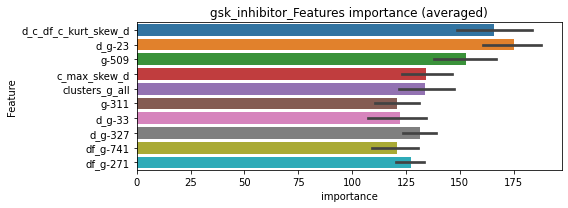

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00069789	valid_1's binary_logloss: 0.0115571
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.00058041	valid_1's binary_logloss: 0.0111848


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000685198	valid_1's binary_logloss: 0.0149231
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000679928	valid_1's binary_logloss: 0.0148639


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000702437	valid_1's binary_logloss: 0.00655197
Early stopping, best iteration is:
[1263]	training's binary_logloss: 0.00059323	valid_1's binary_logloss: 0.00616657


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000881532	valid_1's binary_logloss: 0.0143204


gsk_inhibitor logloss: 0.011633913868455775
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000957246	valid_1's binary_logloss: 0.0315015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000622498	valid_1's binary_logloss: 0.0206211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000693036	valid_1's binary_logloss: 0.0157464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000726623	valid_1's binary_logloss: 0.0230161


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063234, Threshold: 0.0158004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0158004, conf_0:0.01106, conf_1:0.02054
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0458004
threshold: 0.0458004, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000794629	valid_1's binary_logloss: 0.0257084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000589509	valid_1's binary_logloss: 0.0168623
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000590846	valid_1's binary_logloss: 0.0172516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000658313	valid_1's binary_logloss: 0.0248616


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0310752, Threshold: 0.0458004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0458004, conf_0:0.03664, conf_1:0.05496
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_1: 0.0758004
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_2: 0.1058004
threshold: 0.1058004, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000595674	valid_1's binary_logloss: 0.0205123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000698693	valid_1's binary_logloss: 0.0223995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000872754	valid_1's binary_logloss: 0.0280997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000591137	valid_1's binary_logloss: 0.0110312


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406768, Threshold: 0.1058004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, Expected: 12.0, Threshold: 0.1058004, conf_0:0.09522, conf_1:0.11638
threshold: 0.1058004, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


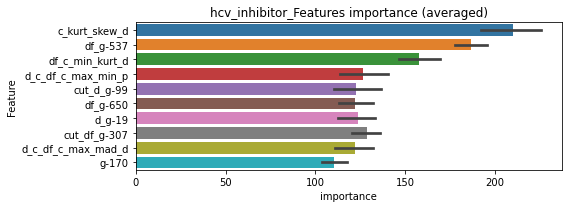

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000724549	valid_1's binary_logloss: 0.0184135
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000727141	valid_1's binary_logloss: 0.0183936


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00109995	valid_1's binary_logloss: 0.0279988


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000725941	valid_1's binary_logloss: 0.0154958
Early stopping, best iteration is:
[1179]	training's binary_logloss: 0.000643789	valid_1's binary_logloss: 0.015094


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


hcv_inhibitor logloss: 0.02483675222969386


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00141238	valid_1's binary_logloss: 0.0378606


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.062403	valid_1's binary_logloss: 0.135207
[2000]	training's binary_logloss: 0.0316571	valid_1's binary_logloss: 0.104393
[3000]	training's binary_logloss: 0.0207697	valid_1's binary_logloss: 0.0929014
Early stopping, best iteration is:
[3817]	training's binary_logloss: 0.0161846	valid_1's binary_logloss: 0.0881106
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0629044	valid_1's binary_logloss: 0.124486
[2000]	training's binary_logloss: 0.0317841	valid_1's binary_logloss: 0.0945231
[3000]	training's binary_logloss: 0.0209912	valid_1's binary_logloss: 0.0837378
[4000]	training's binary_logloss: 0.0156265	valid_1's binary_logloss: 0.0783316
Early stopping, best iteration is:
[4335]	training's binary_logloss: 0.0143833	valid_1's binary_logloss: 0.0769028
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_loglos

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0528077, Threshold: 0.1612945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1612945, conf_0:0.11291, conf_1:0.20968
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_1: 0.1912945
threshold: 0.1912945, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0567405	valid_1's binary_logloss: 0.113582
[2000]	training's binary_logloss: 0.0282498	valid_1's binary_logloss: 0.083944
[3000]	training's binary_logloss: 0.0186277	valid_1's binary_logloss: 0.0728952
[4000]	training's binary_logloss: 0.0138973	valid_1's binary_logloss: 0.0675085
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0133333	valid_1's binary_logloss: 0.066771
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0566418	valid_1's binary_logloss: 0.113888
[2000]	training's binary_logloss: 0.0280623	valid_1's binary_logloss: 0.0859477
[3000]	training's binary_logloss: 0.0184845	valid_1's binary_logloss: 0.0759021
[4000]	training's binary_logloss: 0.0137571	valid_1's binary_logloss: 0.0710477
Early stopping, best iteration is:
[4218]	training's binary_logloss: 0.0130388	valid_1's binary_logloss: 0.0701611
Training unt

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0906721, Threshold: 0.1912945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0143144 Vs.target_rate: 0.00445
Num_p_label: 57.0, Expected: 17.7, Threshold: 0.1912945, conf_0:0.15304, conf_1:0.22955
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_1: 0.2212945
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_2: 0.2512945
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_3: 0.2812945
threshold: 0.2812945, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 628.0/3744, y_label_rate: 0.1677350
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0543366	valid_1's binary_logloss: 0.112603
[2000]	training's binary_logloss: 0.0269048	valid_1's binary_logloss: 0.082062
[3000]	training's binary_logloss: 0.0177298	valid_1's binary_logloss: 0.0699416
Early stopping, best iteration is:
[3965]	training's binary_logloss: 0.0133112	valid_1's binary_logloss: 0.0635939
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0559405	valid_1's binary_logloss: 0.0943846
[2000]	training's binary_logloss: 0.0278982	valid_1's binary_logloss: 0.0638047
[3000]	training's binary_logloss: 0.0183953	valid_1's binary_logloss: 0.0524059
[4000]	training's binary_logloss: 0.0137078	valid_1's binary_logloss: 0.0466212
[5000]	training's binary_logloss: 0.0109247	valid_1's binary_logloss: 0.0428179
[6000]	training's binary_logloss: 0.00909216	valid_1's binary_logloss: 0.0401742
[7000]	training's binary_logloss: 0.00779881

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0976426, Threshold: 0.2812945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 622.0/3732
p_label_rate: 0.0055249 Vs.target_rate: 0.00445
Num_p_label: 22.0, Expected: 17.7, Threshold: 0.2812945, conf_0:0.25317, conf_1:0.30942
threshold: 0.2812945, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 622.0/3732, y_label_rate: 0.1666667


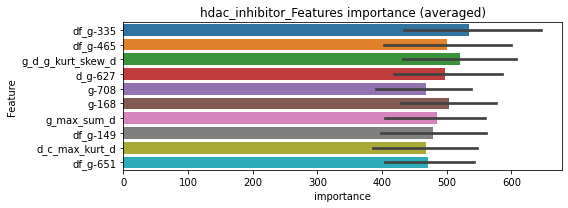

len(train_index) : 2799
len(valid_index) : 933
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.074808	valid_1's binary_logloss: 0.127063
[2000]	training's binary_logloss: 0.0388204	valid_1's binary_logloss: 0.0879825
[3000]	training's binary_logloss: 0.0258106	valid_1's binary_logloss: 0.0724901
[4000]	training's binary_logloss: 0.0192674	valid_1's binary_logloss: 0.063852
Early stopping, best iteration is:
[4825]	training's binary_logloss: 0.0159531	valid_1's binary_logloss: 0.0594705


len(train_index) : 2799
len(valid_index) : 933
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0748699	valid_1's binary_logloss: 0.12044
[2000]	training's binary_logloss: 0.0387186	valid_1's binary_logloss: 0.0854154
[3000]	training's binary_logloss: 0.0257917	valid_1's binary_logloss: 0.0717174
[4000]	training's binary_logloss: 0.0192778	valid_1's binary_logloss: 0.0644135
[5000]	training's binary_logloss: 0.0154385	valid_1's binary_logloss: 0.0596094
[6000]	training's binary_logloss: 0.0128422	valid_1's binary_logloss: 0.0562077
[7000]	training's binary_logloss: 0.0109777	valid_1's binary_logloss: 0.053866
Early stopping, best iteration is:
[7035]	training's binary_logloss: 0.0109201	valid_1's binary_logloss: 0.0537391


len(train_index) : 2799
len(valid_index) : 933
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0762781	valid_1's binary_logloss: 0.119688
[2000]	training's binary_logloss: 0.039621	valid_1's binary_logloss: 0.0824033
[3000]	training's binary_logloss: 0.0263385	valid_1's binary_logloss: 0.0680623
[4000]	training's binary_logloss: 0.0196359	valid_1's binary_logloss: 0.0604696
[5000]	training's binary_logloss: 0.0156941	valid_1's binary_logloss: 0.0561274
[6000]	training's binary_logloss: 0.0130513	valid_1's binary_logloss: 0.0529033
[7000]	training's binary_logloss: 0.0111951	valid_1's binary_logloss: 0.0506935
Early stopping, best iteration is:
[7954]	training's binary_logloss: 0.0098605	valid_1's binary_logloss: 0.0489975


len(train_index) : 2799
len(valid_index) : 933
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0744527	valid_1's binary_logloss: 0.128413
[2000]	training's binary_logloss: 0.0386341	valid_1's binary_logloss: 0.0911104
[3000]	training's binary_logloss: 0.0257741	valid_1's binary_logloss: 0.0760608
[4000]	training's binary_logloss: 0.0192852	valid_1's binary_logloss: 0.0678417
[5000]	training's binary_logloss: 0.0154567	valid_1's binary_logloss: 0.0628572
[6000]	training's binary_logloss: 0.0128472	valid_1's binary_logloss: 0.0590602
[7000]	training's binary_logloss: 0.0110025	valid_1's binary_logloss: 0.0564373
[8000]	training's binary_logloss: 0.00962876	valid_1's binary_logloss: 0.0541919
Early stopping, best iteration is:
[8513]	training's binary_logloss: 0.00905259	valid_1's binary_logloss: 0.0531415


hdac_inhibitor logloss: 0.05383718983824337
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000604738	valid_1's binary_logloss: 0.0308654
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0264239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000599084	valid_1's binary_logloss: 0.00835136
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.0160083


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044916, Threshold: 0.0113097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0113097, conf_0:0.00792, conf_1:0.01470
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0413097
threshold: 0.0413097, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000532573	valid_1's binary_logloss: 0.0282637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000671245	valid_1's binary_logloss: 0.0281672
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000706465	valid_1's binary_logloss: 0.00830879
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297420, Threshold: 0.0413097, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772995	valid_1's binary_logloss: 0.0177459


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00248
Num_p_label: 15.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03305, conf_1:0.04957
threshold: 0.0413097, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000648265	valid_1's binary_logloss: 0.021099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000596982	valid_1's binary_logloss: 0.0143308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000771285	valid_1's binary_logloss: 0.0199072
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000571399	valid_1's binary_logloss: 0.0243474


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0282593, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03718, conf_1:0.04544
threshold: 0.0413097, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


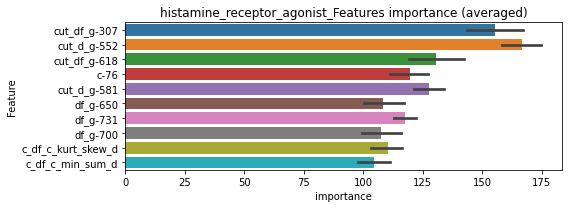

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000625434	valid_1's binary_logloss: 0.0191102
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000601093	valid_1's binary_logloss: 0.0189888


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000614259	valid_1's binary_logloss: 0.0203374
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.00057232	valid_1's binary_logloss: 0.0201212


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000929751	valid_1's binary_logloss: 0.0165919


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000851248	valid_1's binary_logloss: 0.0136536


histamine_receptor_agonist logloss: 0.01733887035032482


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0765825	valid_1's binary_logloss: 0.130647
Early stopping, best iteration is:
[1513]	training's binary_logloss: 0.055973	valid_1's binary_logloss: 0.126124
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0769067	valid_1's binary_logloss: 0.134892
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.0621876	valid_1's binary_logloss: 0.131497
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0790058	valid_1's binary_logloss: 0.11955
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.0495633	valid_1's binary_logloss: 0.112413
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.074776	valid_1's binary_logloss: 0.139109
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.0600013	valid_1's binary_loglo

1 / 3, AUC score:0.955, PR-AUC:0.921
y_Threshold: 0.0617114, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 583 → Positive_corect_labels: 1150/7281
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.05668, conf_1:0.10526
threshold: 0.0809691, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1150.0/7281, y_label_rate: 0.1579453
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.039058	valid_1's binary_logloss: 0.0573057
[2000]	training's binary_logloss: 0.0211202	valid_1's binary_logloss: 0.0489932
Early stopping, best iteration is:
[2865]	training's binary_logloss: 0.0146249	valid_1's binary_logloss: 0.0466136
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0370054	valid_1's binary_logloss: 0.0660786
[2000]	training's binary_logloss: 0.0203054	valid_1's binary_logloss: 0.0588483
Early stopping, best iteration is:
[2054]	training's binary_logloss: 0.0197976	valid_1's binary_logloss: 0.0586438
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383912	valid_1's binary_logloss: 0.0603201
[2000]	training's binary_logloss: 0.0208202	valid_1's binary_logloss: 0.0525786
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0183058	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0409338, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1103.0/7187
p_label_rate: 0.0022602 Vs.target_rate: 0.01012
Num_p_label: 9.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.06478, conf_1:0.09716
threshold: 0.0809691, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 1103.0/7187, y_label_rate: 0.1534715
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0256356	valid_1's binary_logloss: 0.0285434
[2000]	training's binary_logloss: 0.0138113	valid_1's binary_logloss: 0.0202881
[3000]	training's binary_logloss: 0.00919227	valid_1's binary_logloss: 0.0172895
[4000]	training's binary_logloss: 0.00683873	valid_1's binary_logloss: 0.0157453
[5000]	training's binary_logloss: 0.00543903	valid_1's binary_logloss: 0.0147664
[6000]	training's binary_logloss: 0.00451505	valid_1's binary_logloss: 0.0141381
[7000]	training's binary_logloss: 0.00385949	valid_1's binary_logloss: 0.0137248
[8000]	training's binary_logloss: 0.00337162	valid_1's binary_logloss: 0.0134198
Early stopping, best iteration is:
[8609]	training's binary_logloss: 0.00313068	valid_1's binary_logloss: 0.013268
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208684	valid_1's binary_logloss: 0.0525421
Early stopping, best iteration is:
[1

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0344897, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 1082.0/7145
p_label_rate: 0.0027624 Vs.target_rate: 0.01012
Num_p_label: 11.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809691, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1082.0/7145, y_label_rate: 0.1514346


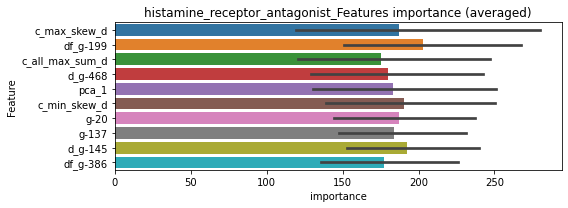

len(train_index) : 5358
len(valid_index) : 1787
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0255131	valid_1's binary_logloss: 0.0306598
[2000]	training's binary_logloss: 0.0135403	valid_1's binary_logloss: 0.0192343
[3000]	training's binary_logloss: 0.0094381	valid_1's binary_logloss: 0.0155956
[4000]	training's binary_logloss: 0.00720687	valid_1's binary_logloss: 0.0138509
[5000]	training's binary_logloss: 0.00582228	valid_1's binary_logloss: 0.0128024
[6000]	training's binary_logloss: 0.00485657	valid_1's binary_logloss: 0.0120725
[7000]	training's binary_logloss: 0.00416445	valid_1's binary_logloss: 0.0116012
[8000]	training's binary_logloss: 0.00365828	valid_1's binary_logloss: 0.0112357
[9000]	training's binary_logloss: 0.00323971	valid_1's binary_logloss: 0.0109224
[10000]	training's binary_logloss: 0.00292707	valid_1's binary_logloss: 0.0107486
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00292707	valid_1's binary_logloss: 0.0107486


len(train_index) : 5359
len(valid_index) : 1786
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262684	valid_1's binary_logloss: 0.0300365
[2000]	training's binary_logloss: 0.0142895	valid_1's binary_logloss: 0.0178296
[3000]	training's binary_logloss: 0.010023	valid_1's binary_logloss: 0.0137336
[4000]	training's binary_logloss: 0.00762548	valid_1's binary_logloss: 0.0116599
[5000]	training's binary_logloss: 0.00613719	valid_1's binary_logloss: 0.0103236
[6000]	training's binary_logloss: 0.00509277	valid_1's binary_logloss: 0.00935824
[7000]	training's binary_logloss: 0.00435788	valid_1's binary_logloss: 0.00868107
[8000]	training's binary_logloss: 0.0038125	valid_1's binary_logloss: 0.00811749
[9000]	training's binary_logloss: 0.00337516	valid_1's binary_logloss: 0.0076745
[10000]	training's binary_logloss: 0.00304449	valid_1's binary_logloss: 0.00733656
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00304449	valid_1's binary_logloss: 0.0073365

len(train_index) : 5359
len(valid_index) : 1786
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248272	valid_1's binary_logloss: 0.0356886
[2000]	training's binary_logloss: 0.013168	valid_1's binary_logloss: 0.0237765
[3000]	training's binary_logloss: 0.00919806	valid_1's binary_logloss: 0.0199079
[4000]	training's binary_logloss: 0.00703435	valid_1's binary_logloss: 0.0180342
[5000]	training's binary_logloss: 0.00568118	valid_1's binary_logloss: 0.0169693
[6000]	training's binary_logloss: 0.00473563	valid_1's binary_logloss: 0.0161067
Early stopping, best iteration is:
[6345]	training's binary_logloss: 0.00448128	valid_1's binary_logloss: 0.0158845


len(train_index) : 5359
len(valid_index) : 1786
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.025279	valid_1's binary_logloss: 0.0323494
[2000]	training's binary_logloss: 0.0134649	valid_1's binary_logloss: 0.0205686
[3000]	training's binary_logloss: 0.00936627	valid_1's binary_logloss: 0.0167635
[4000]	training's binary_logloss: 0.00712501	valid_1's binary_logloss: 0.0149674
[5000]	training's binary_logloss: 0.00575362	valid_1's binary_logloss: 0.0138625
[6000]	training's binary_logloss: 0.00479495	valid_1's binary_logloss: 0.0130858
[7000]	training's binary_logloss: 0.00411582	valid_1's binary_logloss: 0.0125704
[8000]	training's binary_logloss: 0.00360925	valid_1's binary_logloss: 0.0121356
[9000]	training's binary_logloss: 0.00319764	valid_1's binary_logloss: 0.0117926
[10000]	training's binary_logloss: 0.00288301	valid_1's binary_logloss: 0.0115823
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00288301	valid_1's binary_logloss: 0.0115823


histamine_receptor_antagonist logloss: 0.011387900242348174
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000369455	valid_1's binary_logloss: 0.00114519
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377085	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000375244	valid_1's binary_logloss: 0.000933239
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021060, Threshold: 0.0192562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00326198


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0192562, conf_0:0.01348, conf_1:0.02503
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.0492562
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.0792562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.1092562
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1692562
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1992562
threshold: 0.1992562, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.1992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.1992562, conf_0:0.15940, conf_1:0.23911
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_1: 0.2292562


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2592562
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2892562
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3192562
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.3492562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.3792562
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.4092562
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4692562
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.4992562
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.4992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.4992562, conf_0:0.44933, conf_1:0.54918
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


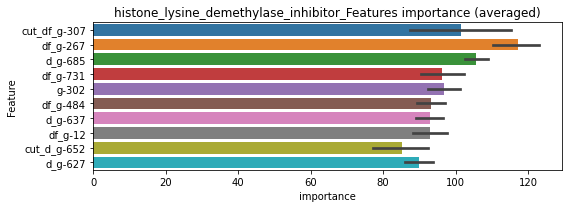

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402171	valid_1's binary_logloss: 0.0011531
Early stopping, best iteration is:
[1232]	training's binary_logloss: 0.000368665	valid_1's binary_logloss: 0.00109242


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000394555	valid_1's binary_logloss: 0.00264448
Early stopping, best iteration is:
[1280]	training's binary_logloss: 0.000357737	valid_1's binary_logloss: 0.00256834


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00040248	valid_1's binary_logloss: 0.000880592
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000366992	valid_1's binary_logloss: 0.000822103


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402704	valid_1's binary_logloss: 0.00213328
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.000367968	valid_1's binary_logloss: 0.00206157


histone_lysine_demethylase_inhibitor logloss: 0.001636248706557734
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000423709	valid_1's binary_logloss: 0.00730819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000429247	valid_1's binary_logloss: 0.00519131
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000405989	valid_1's binary_logloss: 0.00108827
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0027884, Threshold: 0.0072024, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000449703	valid_1's binary_logloss: 0.0151647


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0072024, conf_0:0.00504, conf_1:0.00936
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0372024
threshold: 0.0372024, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.02976, conf_1:0.04464
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.03348, conf_1:0.04092


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


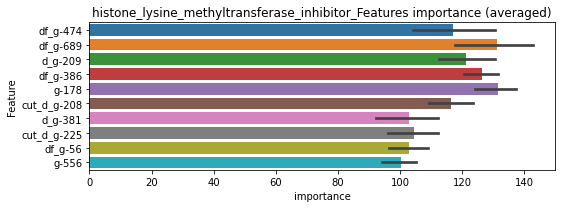

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000454996	valid_1's binary_logloss: 0.00174872
Early stopping, best iteration is:
[1384]	training's binary_logloss: 0.00038938	valid_1's binary_logloss: 0.00161756


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000508285	valid_1's binary_logloss: 0.00522548


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000458717	valid_1's binary_logloss: 0.00379337
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.000431077	valid_1's binary_logloss: 0.00372106


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000498651	valid_1's binary_logloss: 0.00903092


histone_lysine_methyltransferase_inhibitor logloss: 0.004898759897512152
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00111064	valid_1's binary_logloss: 0.0436643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000590017	valid_1's binary_logloss: 0.011604
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000605004	valid_1's binary_logloss: 0.0112544
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000600683	valid_1's binary_logloss: 0.0158191


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056001, Threshold: 0.0874065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0874065, conf_0:0.06118, conf_1:0.11363
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1174065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1474065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.1774065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2074065
threshold: 0.2074065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00129316	valid_1's binary_logloss: 0.0353438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000577296	valid_1's binary_logloss: 0.0109891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000578167	valid_1's binary_logloss: 0.0177745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000576074	valid_1's binary_logloss: 0.020948


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426367, Threshold: 0.2074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0138122 Vs.target_rate: 0.00302
Num_p_label: 55.0, Expected: 12.0, Threshold: 0.2074065, conf_0:0.16593, conf_1:0.24889
Num_p_label: 49.0, Expected: 12.0, Adj_threshold_1: 0.2374065
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_2: 0.2674065
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_3: 0.2974065
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_4: 0.3274065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_5: 0.3574065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_6: 0.3874065
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_7: 0.4174065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_8: 0.4474065
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_9: 0.4774065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.5074065
threshold: 0.5074065, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000634881	valid_1's binary_logloss: 0.0127883
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000637908	valid_1's binary_logloss: 0.0250466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000587019	valid_1's binary_logloss: 0.0249648
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00066412	valid_1's binary_logloss: 0.025552


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0410762, Threshold: 0.5074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0080362 Vs.target_rate: 0.00302
Num_p_label: 32.0, Expected: 12.0, Threshold: 0.5074065, conf_0:0.45667, conf_1:0.55815
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_1: 0.5374065
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_2: 0.5674065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.5974065
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.6274065
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.6574065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6874065
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_7: 0.7174065
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_8: 0.7474065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_9: 0.7774065
threshold: 0.7774065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


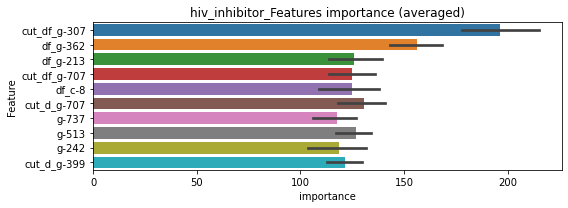

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000894568	valid_1's binary_logloss: 0.0209263


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000777741	valid_1's binary_logloss: 0.0213982


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000707063	valid_1's binary_logloss: 0.0274009
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000659019	valid_1's binary_logloss: 0.027103


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000714023	valid_1's binary_logloss: 0.0213833
Early stopping, best iteration is:
[1292]	training's binary_logloss: 0.000598114	valid_1's binary_logloss: 0.0208668


hiv_inhibitor logloss: 0.022573122944434035


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0793357	valid_1's binary_logloss: 0.130821
[2000]	training's binary_logloss: 0.0440171	valid_1's binary_logloss: 0.117025
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0373031	valid_1's binary_logloss: 0.114797
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0800997	valid_1's binary_logloss: 0.124718
[2000]	training's binary_logloss: 0.0443604	valid_1's binary_logloss: 0.113516
Early stopping, best iteration is:
[2195]	training's binary_logloss: 0.0403714	valid_1's binary_logloss: 0.112096
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0766641	valid_1's binary_logloss: 0.145112
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0488325	valid_1's binary_logloss: 0.137377
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.970, PR-AUC:0.939
y_Threshold: 0.0634838, Threshold: 0.0945673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 600 → Positive_corect_labels: 1328/8280
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0945673, conf_0:0.06620, conf_1:0.12294
threshold: 0.0945673, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1328.0/8280, y_label_rate: 0.1603865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0489393	valid_1's binary_logloss: 0.0797642
[2000]	training's binary_logloss: 0.0263045	valid_1's binary_logloss: 0.0669792
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0208198	valid_1's binary_logloss: 0.0643598
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0486719	valid_1's binary_logloss: 0.0825967
[2000]	training's binary_logloss: 0.0260009	valid_1's binary_logloss: 0.0701676
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0219953	valid_1's binary_logloss: 0.0682098
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0490961	valid_1's binary_logloss: 0.0806092
[2000]	training's binary_logloss: 0.0264119	valid_1's binary_logloss: 0.0667851
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0250476	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0628118, Threshold: 0.0945673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 1267.0/8158
p_label_rate: 0.0047715 Vs.target_rate: 0.01188
Num_p_label: 19.0, Expected: 47.3, Threshold: 0.0945673, conf_0:0.07565, conf_1:0.11348
threshold: 0.0945673, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 1267.0/8158, y_label_rate: 0.1553077
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0373928	valid_1's binary_logloss: 0.0542128
[2000]	training's binary_logloss: 0.0197348	valid_1's binary_logloss: 0.0399878
[3000]	training's binary_logloss: 0.0131491	valid_1's binary_logloss: 0.0352065
[4000]	training's binary_logloss: 0.00977426	valid_1's binary_logloss: 0.0328738
Early stopping, best iteration is:
[4329]	training's binary_logloss: 0.00901402	valid_1's binary_logloss: 0.0322121
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344345	valid_1's binary_logloss: 0.0694453
[2000]	training's binary_logloss: 0.0177926	valid_1's binary_logloss: 0.0570723
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0168908	valid_1's binary_logloss: 0.0564381
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383285	valid_1's binary_logloss: 0.0468967
[2000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0507590, Threshold: 0.0945673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1242.0/8108
p_label_rate: 0.0025113 Vs.target_rate: 0.01188
Num_p_label: 10.0, Expected: 47.3, Threshold: 0.0945673, conf_0:0.08511, conf_1:0.10402
threshold: 0.0945673, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 1242.0/8108, y_label_rate: 0.1531820


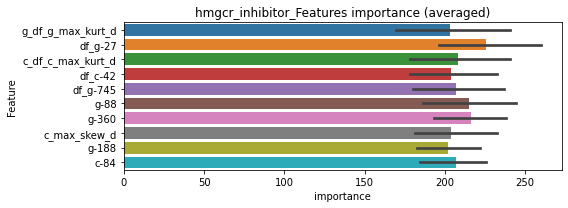

len(train_index) : 6081
len(valid_index) : 2027
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0431788	valid_1's binary_logloss: 0.0591972
[2000]	training's binary_logloss: 0.022706	valid_1's binary_logloss: 0.0404588
[3000]	training's binary_logloss: 0.015326	valid_1's binary_logloss: 0.0344397
[4000]	training's binary_logloss: 0.0115556	valid_1's binary_logloss: 0.0316608
[5000]	training's binary_logloss: 0.00923992	valid_1's binary_logloss: 0.0299621
Early stopping, best iteration is:
[5827]	training's binary_logloss: 0.00791815	valid_1's binary_logloss: 0.0289346


len(train_index) : 6081
len(valid_index) : 2027
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0432211	valid_1's binary_logloss: 0.0581081
[2000]	training's binary_logloss: 0.0229742	valid_1's binary_logloss: 0.0388912
[3000]	training's binary_logloss: 0.0155762	valid_1's binary_logloss: 0.0325384
[4000]	training's binary_logloss: 0.0117769	valid_1's binary_logloss: 0.0294304
Early stopping, best iteration is:
[4820]	training's binary_logloss: 0.0097556	valid_1's binary_logloss: 0.0277488


len(train_index) : 6081
len(valid_index) : 2027
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0437594	valid_1's binary_logloss: 0.0608954
[2000]	training's binary_logloss: 0.0236055	valid_1's binary_logloss: 0.041319
[3000]	training's binary_logloss: 0.0160496	valid_1's binary_logloss: 0.0349043
[4000]	training's binary_logloss: 0.0121411	valid_1's binary_logloss: 0.0319056
[5000]	training's binary_logloss: 0.0097247	valid_1's binary_logloss: 0.03004
[6000]	training's binary_logloss: 0.00806021	valid_1's binary_logloss: 0.0286614
Early stopping, best iteration is:
[6863]	training's binary_logloss: 0.00703217	valid_1's binary_logloss: 0.0279285


len(train_index) : 6081
len(valid_index) : 2027
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0430511	valid_1's binary_logloss: 0.0589617
[2000]	training's binary_logloss: 0.02284	valid_1's binary_logloss: 0.0391398
[3000]	training's binary_logloss: 0.0154875	valid_1's binary_logloss: 0.0325581
[4000]	training's binary_logloss: 0.0117007	valid_1's binary_logloss: 0.0294999
[5000]	training's binary_logloss: 0.00934784	valid_1's binary_logloss: 0.0276003
[6000]	training's binary_logloss: 0.00775411	valid_1's binary_logloss: 0.0262777
Early stopping, best iteration is:
[6811]	training's binary_logloss: 0.00683024	valid_1's binary_logloss: 0.0254827


hmgcr_inhibitor logloss: 0.027523646043590602
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00157964	valid_1's binary_logloss: 0.0575937
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000961511	valid_1's binary_logloss: 0.0308107
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00101608	valid_1's binary_logloss: 0.0249343
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000970224	valid_1's binary_logloss: 0.0403911


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0139076, Threshold: 0.1723806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1723806, conf_0:0.12067, conf_1:0.22409
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_1: 0.2023806
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.2323806
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.2623806
Num_p_label: 18.0, Expected: 15.6, Adj_threshold_4: 0.2923806
threshold: 0.2923806, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000939574	valid_1's binary_logloss: 0.0421514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00108037	valid_1's binary_logloss: 0.0402544
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000668317	valid_1's binary_logloss: 0.0119919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00104942	valid_1's binary_logloss: 0.0425674


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0684816, Threshold: 0.2923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0193370 Vs.target_rate: 0.00391
Num_p_label: 77.0, Expected: 15.6, Threshold: 0.2923806, conf_0:0.23390, conf_1:0.35086
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_1: 0.3223806
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_2: 0.3523806
Num_p_label: 59.0, Expected: 15.6, Adj_threshold_3: 0.3823806
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_4: 0.4123806
Num_p_label: 45.0, Expected: 15.6, Adj_threshold_5: 0.4423806
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_6: 0.4723806
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_7: 0.5023806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_8: 0.5323806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_9: 0.5623806
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5923806
threshold: 0.5923806, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000924441	valid_1's binary_logloss: 0.039587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000649254	valid_1's binary_logloss: 0.0131381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000749959	valid_1's binary_logloss: 0.0194639
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000660678	valid_1's binary_logloss: 0.0191177


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1216655, Threshold: 0.5923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3739
p_label_rate: 0.0110497 Vs.target_rate: 0.00391
Num_p_label: 44.0, Expected: 15.6, Threshold: 0.5923806, conf_0:0.53314, conf_1:0.65162
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_1: 0.6223806
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_2: 0.6523806
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.6823806
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_4: 0.7123806
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_5: 0.7423806
threshold: 0.7423806, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 626.0/3739, y_label_rate: 0.1674244


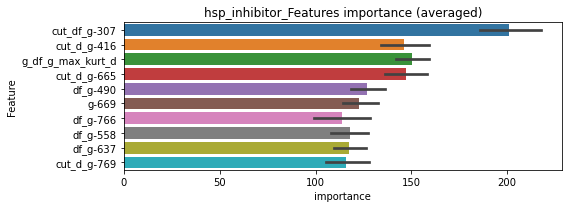

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00085658	valid_1's binary_logloss: 0.022438
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.000788162	valid_1's binary_logloss: 0.0221438


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000845799	valid_1's binary_logloss: 0.0281911
Early stopping, best iteration is:
[1075]	training's binary_logloss: 0.000797042	valid_1's binary_logloss: 0.0278605


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000865759	valid_1's binary_logloss: 0.0173439
Early stopping, best iteration is:
[1275]	training's binary_logloss: 0.00071858	valid_1's binary_logloss: 0.0166745


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.001313	valid_1's binary_logloss: 0.0249657


hsp_inhibitor logloss: 0.022910563996497425
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000461464	valid_1's binary_logloss: 0.022259
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000443908	valid_1's binary_logloss: 0.00797923
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000462339	valid_1's binary_logloss: 0.00192685
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0131745


y_Threshold: 0.0030040, Threshold: 0.0204141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0204141, conf_0:0.01429, conf_1:0.02654
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0504141
threshold: 0.0504141, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000454279	valid_1's binary_logloss: 0.0200194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.00723977
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000444238	valid_1's binary_logloss: 0.00171765
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291609, Threshold: 0.0504141, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000458993	valid_1's binary_logloss: 0.0122354


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0504141, conf_0:0.04033, conf_1:0.06050
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_1: 0.0804141
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.1104141
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1404141
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1704141
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2004141
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000499746	valid_1's binary_logloss: 0.00745819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000435578	valid_1's binary_logloss: 0.00777534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000456223	valid_1's binary_logloss: 0.0113402
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000436998	valid_1's binary_logloss: 0.0112084


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381314, Threshold: 0.2004141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.2004141, conf_0:0.18037, conf_1:0.22046
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


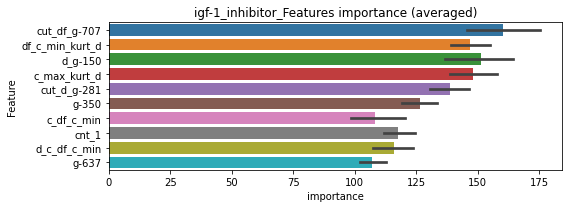

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000499249	valid_1's binary_logloss: 0.00797338
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000468383	valid_1's binary_logloss: 0.00785861


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000504014	valid_1's binary_logloss: 0.00603531
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000476485	valid_1's binary_logloss: 0.00596601


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000497778	valid_1's binary_logloss: 0.0104839
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000476784	valid_1's binary_logloss: 0.0104113


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000496826	valid_1's binary_logloss: 0.0117019
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000480919	valid_1's binary_logloss: 0.0116772


igf-1_inhibitor logloss: 0.008977979693870892
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00853836
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000364624	valid_1's binary_logloss: 0.00178726
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000357049	valid_1's binary_logloss: 0.000996381
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028853, Threshold: 0.0127299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00036891	valid_1's binary_logloss: 0.00152641


p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0127299, conf_0:0.00891, conf_1:0.01655
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0427299
threshold: 0.0427299, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.0427299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00126
Num_p_label: 35.0, Expected: 5.0, Threshold: 0.0427299, conf_0:0.03418, conf_1:0.05128


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0727299
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1027299
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.1027299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1027299, conf_0:0.09246, conf_1:0.11300
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


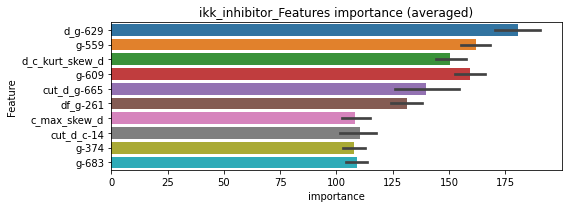

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397962	valid_1's binary_logloss: 0.00757049
Early stopping, best iteration is:
[1202]	training's binary_logloss: 0.000359844	valid_1's binary_logloss: 0.00742651


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000405049	valid_1's binary_logloss: 0.00154555
Early stopping, best iteration is:
[1368]	training's binary_logloss: 0.000352287	valid_1's binary_logloss: 0.00142103


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000406398	valid_1's binary_logloss: 0.000994954
Early stopping, best iteration is:
[1398]	training's binary_logloss: 0.000352204	valid_1's binary_logloss: 0.000885716


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00040408	valid_1's binary_logloss: 0.00120665
Early stopping, best iteration is:
[1418]	training's binary_logloss: 0.000346872	valid_1's binary_logloss: 0.00107882


ikk_inhibitor logloss: 0.002703020889374248
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000371479	valid_1's binary_logloss: 0.00385573
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.00743804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000368427	valid_1's binary_logloss: 0.00126785
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024106, Threshold: 0.0107881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000378856	valid_1's binary_logloss: 0.00331557


p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0107881, conf_0:0.00755, conf_1:0.01402
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0407881
threshold: 0.0407881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.0407881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0407881, conf_0:0.03263, conf_1:0.04895
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0707881


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1007881
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1307881
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.1307881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, Expected: 5.2, Threshold: 0.1307881, conf_0:0.11771, conf_1:0.14387


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


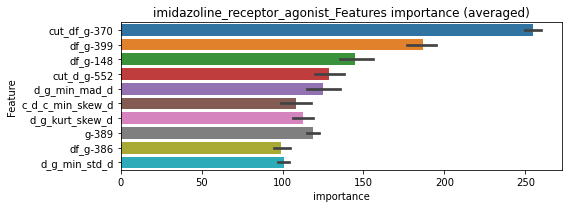

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000398628	valid_1's binary_logloss: 0.00286696
Early stopping, best iteration is:
[1280]	training's binary_logloss: 0.000358577	valid_1's binary_logloss: 0.00276864


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000391536	valid_1's binary_logloss: 0.00936119
Early stopping, best iteration is:
[1223]	training's binary_logloss: 0.000356902	valid_1's binary_logloss: 0.00925579


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000400642	valid_1's binary_logloss: 0.00104725
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.000364264	valid_1's binary_logloss: 0.000987589


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000400442	valid_1's binary_logloss: 0.00175791
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.000368094	valid_1's binary_logloss: 0.00168637


imidazoline_receptor_agonist logloss: 0.003676444772767542
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0825622	valid_1's binary_logloss: 0.127179
[2000]	training's binary_logloss: 0.044029	valid_1's binary_logloss: 0.0901488
[3000]	training's binary_logloss: 0.0296976	valid_1's binary_logloss: 0.0761721
[4000]	training's binary_logloss: 0.0222316	valid_1's binary_logloss: 0.0684424
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0213568	valid_1's binary_logloss: 0.0675276
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0835259	valid_1's binary_logloss: 0.122548
[2000]	training's binary_logloss: 0.0446044	valid_1's binary_logloss: 0.0856912
[3000]	training's binary_logloss: 0.0298131	valid_1's binary_logloss: 0.0712489
[4000]	training's binary_logloss: 0.0223586	valid_1's binary_logloss: 0.0638505
[5000]	training's binary_logloss: 0.0178286	valid_1's binary_logloss: 0.0592552
Early stopping, best iteration is:
[5385]	trai

1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0568128, Threshold: 0.1154666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1154666, conf_0:0.08083, conf_1:0.15011
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_1: 0.1454666
Num_p_label: 11.0, Expected: 12.2, Adj_threshold_2: 0.1754666
threshold: 0.1754666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 643.0/3774, y_label_rate: 0.1703763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0760857	valid_1's binary_logloss: 0.123952
[2000]	training's binary_logloss: 0.0398432	valid_1's binary_logloss: 0.0849341
[3000]	training's binary_logloss: 0.0267204	valid_1's binary_logloss: 0.0697228
[4000]	training's binary_logloss: 0.019874	valid_1's binary_logloss: 0.0617259
[5000]	training's binary_logloss: 0.0158511	valid_1's binary_logloss: 0.0568522
[6000]	training's binary_logloss: 0.0131863	valid_1's binary_logloss: 0.0535338
Early stopping, best iteration is:
[6343]	training's binary_logloss: 0.0124483	valid_1's binary_logloss: 0.0525183
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0775324	valid_1's binary_logloss: 0.116981
[2000]	training's binary_logloss: 0.0400715	valid_1's binary_logloss: 0.0786099
[3000]	training's binary_logloss: 0.0267907	valid_1's binary_logloss: 0.0647412
[4000]	training's binary_logloss: 0.0199596	va

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0897169, Threshold: 0.1754666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3768
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.1754666, conf_0:0.14037, conf_1:0.21056
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.2054666
threshold: 0.2054666, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0762133	valid_1's binary_logloss: 0.115563
[2000]	training's binary_logloss: 0.0393719	valid_1's binary_logloss: 0.0792353
[3000]	training's binary_logloss: 0.0263083	valid_1's binary_logloss: 0.0663399
[4000]	training's binary_logloss: 0.019659	valid_1's binary_logloss: 0.0595668
Early stopping, best iteration is:
[4563]	training's binary_logloss: 0.017194	valid_1's binary_logloss: 0.0571046
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0767588	valid_1's binary_logloss: 0.11817
[2000]	training's binary_logloss: 0.0394978	valid_1's binary_logloss: 0.0797774
[3000]	training's binary_logloss: 0.0262433	valid_1's binary_logloss: 0.0651607
[4000]	training's binary_logloss: 0.019642	valid_1's binary_logloss: 0.057458
[5000]	training's binary_logloss: 0.0156327	valid_1's binary_logloss: 0.0527748
Early stopping, best iteration is:
[5685]	training

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0769258, Threshold: 0.2054666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.2054666, conf_0:0.18492, conf_1:0.22601
threshold: 0.2054666, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 633.0/3754, y_label_rate: 0.1686201


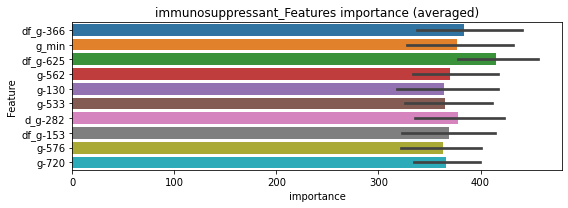

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.105587	valid_1's binary_logloss: 0.146252
[2000]	training's binary_logloss: 0.0567733	valid_1's binary_logloss: 0.09376
[3000]	training's binary_logloss: 0.0380267	valid_1's binary_logloss: 0.0716125
[4000]	training's binary_logloss: 0.0285236	valid_1's binary_logloss: 0.0602106
[5000]	training's binary_logloss: 0.0228535	valid_1's binary_logloss: 0.0535248
[6000]	training's binary_logloss: 0.0189965	valid_1's binary_logloss: 0.0487659
[7000]	training's binary_logloss: 0.0162792	valid_1's binary_logloss: 0.0455884
[8000]	training's binary_logloss: 0.0141986	valid_1's binary_logloss: 0.0428301
[9000]	training's binary_logloss: 0.0126047	valid_1's binary_logloss: 0.0407975
Early stopping, best iteration is:
[9308]	training's binary_logloss: 0.0121674	valid_1's binary_logloss: 0.04025


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.10529	valid_1's binary_logloss: 0.138925
[2000]	training's binary_logloss: 0.0568057	valid_1's binary_logloss: 0.0896922
[3000]	training's binary_logloss: 0.037555	valid_1's binary_logloss: 0.0690874
[4000]	training's binary_logloss: 0.0280648	valid_1's binary_logloss: 0.0586728
[5000]	training's binary_logloss: 0.0224624	valid_1's binary_logloss: 0.0525452
[6000]	training's binary_logloss: 0.018726	valid_1's binary_logloss: 0.0481441
[7000]	training's binary_logloss: 0.0160178	valid_1's binary_logloss: 0.0450149
[8000]	training's binary_logloss: 0.0139801	valid_1's binary_logloss: 0.0423894
[9000]	training's binary_logloss: 0.0124356	valid_1's binary_logloss: 0.0403494
Early stopping, best iteration is:
[9036]	training's binary_logloss: 0.0123827	valid_1's binary_logloss: 0.0402578


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.10518	valid_1's binary_logloss: 0.142269
[2000]	training's binary_logloss: 0.0566905	valid_1's binary_logloss: 0.0931201
[3000]	training's binary_logloss: 0.0376735	valid_1's binary_logloss: 0.0727035
[4000]	training's binary_logloss: 0.0282036	valid_1's binary_logloss: 0.0621337
[5000]	training's binary_logloss: 0.0225817	valid_1's binary_logloss: 0.0553301
[6000]	training's binary_logloss: 0.0188177	valid_1's binary_logloss: 0.0508606
[7000]	training's binary_logloss: 0.0161463	valid_1's binary_logloss: 0.0478931
[8000]	training's binary_logloss: 0.0141082	valid_1's binary_logloss: 0.0452252
[9000]	training's binary_logloss: 0.0125496	valid_1's binary_logloss: 0.0432237
Early stopping, best iteration is:
[9300]	training's binary_logloss: 0.0121331	valid_1's binary_logloss: 0.042636


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.106619	valid_1's binary_logloss: 0.137717
[2000]	training's binary_logloss: 0.0573322	valid_1's binary_logloss: 0.0888481
[3000]	training's binary_logloss: 0.0382441	valid_1's binary_logloss: 0.0680123
[4000]	training's binary_logloss: 0.0287227	valid_1's binary_logloss: 0.0579985
[5000]	training's binary_logloss: 0.0230132	valid_1's binary_logloss: 0.0519952
[6000]	training's binary_logloss: 0.0191329	valid_1's binary_logloss: 0.0478792
[7000]	training's binary_logloss: 0.0163836	valid_1's binary_logloss: 0.045078
[8000]	training's binary_logloss: 0.014311	valid_1's binary_logloss: 0.0426222
[9000]	training's binary_logloss: 0.0127384	valid_1's binary_logloss: 0.0408825
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.0123163	valid_1's binary_logloss: 0.040383


immunosuppressant logloss: 0.040881339006336836
immunosuppressant is unpredictable(><)!
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000479429	valid_1's binary_logloss: 0.00954221
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000442697	valid_1's binary_logloss: 0.00432739
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000418688	valid_1's binary_logloss: 0.00139069
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026352, Threshold: 0.0105819, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000404523	valid_1's binary_logloss: 0.00630081


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0105819, conf_0:0.00741, conf_1:0.01376
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0405819
threshold: 0.0405819, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000425651	valid_1's binary_logloss: 0.00978789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000422083	valid_1's binary_logloss: 0.00344465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000397086	valid_1's binary_logloss: 0.00100748
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000413102	valid_1's binary_logloss: 0.00622526


y_Threshold: 0.0296064, Threshold: 0.0405819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0065294 Vs.target_rate: 0.00126
Num_p_label: 26.0, Expected: 5.0, Threshold: 0.0405819, conf_0:0.03247, conf_1:0.04870
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0705819
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1005819
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1305819
threshold: 0.1305819, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000425651	valid_1's binary_logloss: 0.00978789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000422083	valid_1's binary_logloss: 0.00344465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000397086	valid_1's binary_logloss: 0.00100748
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296064, Threshold: 0.1305819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00126


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000413102	valid_1's binary_logloss: 0.00622526


Num_p_label: 10.0, Expected: 5.0, Threshold: 0.1305819, conf_0:0.11752, conf_1:0.14364
threshold: 0.1305819, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


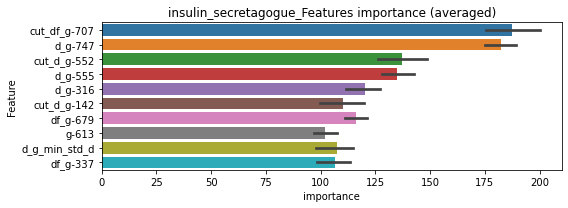

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000443807	valid_1's binary_logloss: 0.00876874
Early stopping, best iteration is:
[1141]	training's binary_logloss: 0.000414001	valid_1's binary_logloss: 0.00864978


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000450365	valid_1's binary_logloss: 0.0037236
Early stopping, best iteration is:
[1220]	training's binary_logloss: 0.000411036	valid_1's binary_logloss: 0.00360456


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000459482	valid_1's binary_logloss: 0.0012132
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000429851	valid_1's binary_logloss: 0.00114869


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000486878	valid_1's binary_logloss: 0.0067742


insulin_secretagogue logloss: 0.005045536075711184
insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000494077	valid_1's binary_logloss: 0.0120158
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00049087	valid_1's binary_logloss: 0.00510336
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000524045	valid_1's binary_logloss: 0.0166681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000600014	valid_1's binary_logloss: 0.0268047


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038190, Threshold: 0.0091664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0091664, conf_0:0.00642, conf_1:0.01192
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0391664
threshold: 0.0391664, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000529765	valid_1's binary_logloss: 0.0129686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048324	valid_1's binary_logloss: 0.0049315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506197	valid_1's binary_logloss: 0.0146937
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217402, Threshold: 0.0391664, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000872561	valid_1's binary_logloss: 0.0261283


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00214
Num_p_label: 12.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03133, conf_1:0.04700
threshold: 0.0391664, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000478184	valid_1's binary_logloss: 0.0102039
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000487196	valid_1's binary_logloss: 0.0114558
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000504616	valid_1's binary_logloss: 0.0138751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0073301


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298497, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00214
Num_p_label: 14.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03525, conf_1:0.04308
threshold: 0.0391664, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


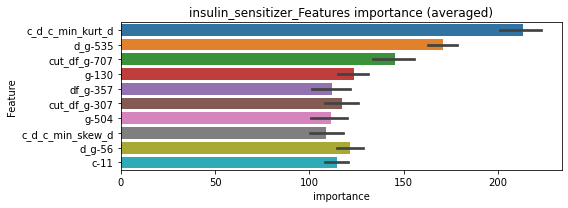

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000612428	valid_1's binary_logloss: 0.0108466


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000654038	valid_1's binary_logloss: 0.0123835


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000562544	valid_1's binary_logloss: 0.0137244
Early stopping, best iteration is:
[1283]	training's binary_logloss: 0.000486362	valid_1's binary_logloss: 0.0133806


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00057419	valid_1's binary_logloss: 0.00774344
Early stopping, best iteration is:
[1276]	training's binary_logloss: 0.000494331	valid_1's binary_logloss: 0.00749528


insulin_sensitizer logloss: 0.011027776026979044
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000495583	valid_1's binary_logloss: 0.0106609
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000448253	valid_1's binary_logloss: 0.00641679
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000463825	valid_1's binary_logloss: 0.0038384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000451215	valid_1's binary_logloss: 0.00760444


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044229, Threshold: 0.0148987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0148987, conf_0:0.01043, conf_1:0.01937
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_1: 0.0448987
threshold: 0.0448987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0448987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0448987, conf_0:0.03592, conf_1:0.05388
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0748987
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0748987, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, Expected: 7.0, Threshold: 0.0748987, conf_0:0.06741, conf_1:0.08239
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


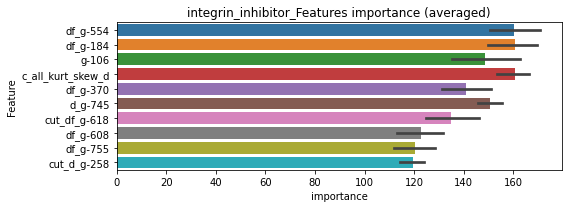

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000523574	valid_1's binary_logloss: 0.00930114
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000462799	valid_1's binary_logloss: 0.00911914


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000534443	valid_1's binary_logloss: 0.00496864
Early stopping, best iteration is:
[1124]	training's binary_logloss: 0.000491884	valid_1's binary_logloss: 0.00484009


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000542239	valid_1's binary_logloss: 0.00299361
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000527929	valid_1's binary_logloss: 0.00296503


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000531297	valid_1's binary_logloss: 0.00779575
Early stopping, best iteration is:
[1365]	training's binary_logloss: 0.000443296	valid_1's binary_logloss: 0.00744331


integrin_inhibitor logloss: 0.006092768851896103
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00112883	valid_1's binary_logloss: 0.0524191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00124061	valid_1's binary_logloss: 0.0413063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000925519	valid_1's binary_logloss: 0.0184325
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00102445	valid_1's binary_logloss: 0.0353317


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0109471, Threshold: 0.1278113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1278113, conf_0:0.08947, conf_1:0.16615
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.1578113
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_2: 0.1878113
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2178113
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2478113
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2778113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_6: 0.3078113
threshold: 0.3078113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00100039	valid_1's binary_logloss: 0.0406916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00071407	valid_1's binary_logloss: 0.0245631
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000943473	valid_1's binary_logloss: 0.0308705
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000674393	valid_1's binary_logloss: 0.0233685


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0436618, Threshold: 0.3078113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00386
Num_p_label: 36.0, Expected: 15.4, Threshold: 0.3078113, conf_0:0.24625, conf_1:0.36937
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.3378113
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.3678113
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_3: 0.3978113
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.4278113
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.4578113
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.4878113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5178113
threshold: 0.5178113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000950433	valid_1's binary_logloss: 0.0247327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00104485	valid_1's binary_logloss: 0.0417498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000735695	valid_1's binary_logloss: 0.0232221
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000799638	valid_1's binary_logloss: 0.0308959


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0304182, Threshold: 0.5178113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5178113, conf_0:0.46603, conf_1:0.56959
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5478113
threshold: 0.5478113, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3770, y_label_rate: 0.1697613


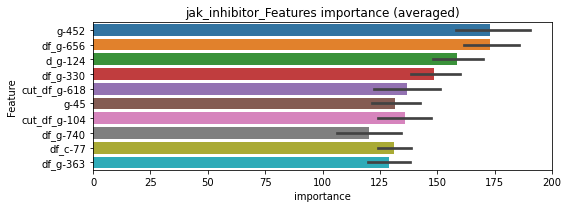

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00105063	valid_1's binary_logloss: 0.0229861


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2828
len(valid_index) : 942


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00161477	valid_1's binary_logloss: 0.0374198


================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000899658	valid_1's binary_logloss: 0.012216
Early stopping, best iteration is:
[1270]	training's binary_logloss: 0.000742682	valid_1's binary_logloss: 0.0116614


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00134957	valid_1's binary_logloss: 0.0366046


jak_inhibitor logloss: 0.027169579204240624


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0553311	valid_1's binary_logloss: 0.127679
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0379167	valid_1's binary_logloss: 0.122223
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0539877	valid_1's binary_logloss: 0.142284
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.0351441	valid_1's binary_logloss: 0.137641
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0553983	valid_1's binary_logloss: 0.126732
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0284889	valid_1's binary_logloss: 0.11723
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0558992	valid_1's binary_logloss: 0.125922
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0316945	valid_1's binary_log

1 / 3, AUC score:0.965, PR-AUC:0.935
y_Threshold: 0.0590140, Threshold: 0.0972357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 556 → Positive_corect_labels: 1228/7659
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0972357, conf_0:0.06806, conf_1:0.12641
threshold: 0.0972357, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1228.0/7659, y_label_rate: 0.1603342
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0353503	valid_1's binary_logloss: 0.0694594
[2000]	training's binary_logloss: 0.0175287	valid_1's binary_logloss: 0.0597259
Early stopping, best iteration is:
[2701]	training's binary_logloss: 0.0127596	valid_1's binary_logloss: 0.0571258
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0338426	valid_1's binary_logloss: 0.0861311
Early stopping, best iteration is:
[1634]	training's binary_logloss: 0.0207313	valid_1's binary_logloss: 0.080156
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357019	valid_1's binary_logloss: 0.0654253
[2000]	training's binary_logloss: 0.01776	valid_1's binary_logloss: 0.0562485
Early stopping, best iteration is:
[2408]	training's binary_logloss: 0.0145682	valid_1's binary_logloss: 0.0544524
Training until validation scores don't improve for 29 rounds
[1000]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0577583, Threshold: 0.0972357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1176.0/7555
p_label_rate: 0.0085384 Vs.target_rate: 0.01146
Num_p_label: 34.0, Expected: 45.6, Threshold: 0.0972357, conf_0:0.07779, conf_1:0.11668
threshold: 0.0972357, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1176.0/7555, y_label_rate: 0.1556585
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.026489	valid_1's binary_logloss: 0.0564071
[2000]	training's binary_logloss: 0.0132556	valid_1's binary_logloss: 0.0488129
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0126035	valid_1's binary_logloss: 0.0484474
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0263978	valid_1's binary_logloss: 0.0591925
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.0153922	valid_1's binary_logloss: 0.0521782
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279496	valid_1's binary_logloss: 0.0439885
[2000]	training's binary_logloss: 0.0140071	valid_1's binary_logloss: 0.0345084
[3000]	training's binary_logloss: 0.00919717	valid_1's binary_logloss: 0.0311073
Early stopping, best iteration is:
[3592]	training's binary_logloss: 0.00762816	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0554316, Threshold: 0.0972357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1146.0/7495
p_label_rate: 0.0107986 Vs.target_rate: 0.01146
Num_p_label: 43.0, Expected: 45.6, Threshold: 0.0972357, conf_0:0.08751, conf_1:0.10696
threshold: 0.0972357, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1146.0/7495, y_label_rate: 0.1529019


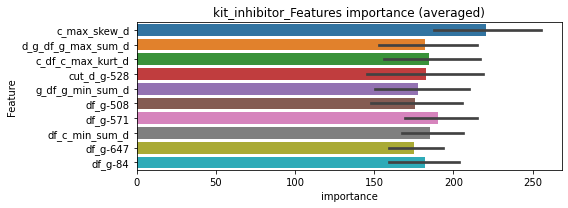

len(train_index) : 5621
len(valid_index) : 1874
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0314902	valid_1's binary_logloss: 0.0495838
[2000]	training's binary_logloss: 0.0164633	valid_1's binary_logloss: 0.0381902
[3000]	training's binary_logloss: 0.0110031	valid_1's binary_logloss: 0.0345171
Early stopping, best iteration is:
[3739]	training's binary_logloss: 0.00881778	valid_1's binary_logloss: 0.03313


len(train_index) : 5621
len(valid_index) : 1874
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0313362	valid_1's binary_logloss: 0.0491248
[2000]	training's binary_logloss: 0.0163206	valid_1's binary_logloss: 0.0370377
[3000]	training's binary_logloss: 0.0108925	valid_1's binary_logloss: 0.0328853
[4000]	training's binary_logloss: 0.0081573	valid_1's binary_logloss: 0.0308324
Early stopping, best iteration is:
[4046]	training's binary_logloss: 0.00806167	valid_1's binary_logloss: 0.0307847


len(train_index) : 5621
len(valid_index) : 1874
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0313644	valid_1's binary_logloss: 0.0488086
[2000]	training's binary_logloss: 0.0164231	valid_1's binary_logloss: 0.0359702
[3000]	training's binary_logloss: 0.0109671	valid_1's binary_logloss: 0.031525
[4000]	training's binary_logloss: 0.00819349	valid_1's binary_logloss: 0.0292213
[5000]	training's binary_logloss: 0.00654407	valid_1's binary_logloss: 0.0279055
Early stopping, best iteration is:
[5385]	training's binary_logloss: 0.00606948	valid_1's binary_logloss: 0.0274138


len(train_index) : 5622
len(valid_index) : 1873
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0314797	valid_1's binary_logloss: 0.048228
[2000]	training's binary_logloss: 0.0165214	valid_1's binary_logloss: 0.0362826
[3000]	training's binary_logloss: 0.0110042	valid_1's binary_logloss: 0.031983
[4000]	training's binary_logloss: 0.00824124	valid_1's binary_logloss: 0.0299258
Early stopping, best iteration is:
[4743]	training's binary_logloss: 0.00692988	valid_1's binary_logloss: 0.0290176


kit_inhibitor logloss: 0.030086660566580662
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000153357	valid_1's binary_logloss: 0.000194661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000151233	valid_1's binary_logloss: 0.00126174
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000151549	valid_1's binary_logloss: 0.000181455
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004303, Threshold: 0.0012664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012664, conf_0:0.00089, conf_1:0.00165
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312664
threshold: 0.0312664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000153112	valid_1's binary_logloss: 0.000202879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0312664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312664, conf_0:0.02501, conf_1:0.03752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0612664
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0612664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0612664, conf_0:0.05514, conf_1:0.06739
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


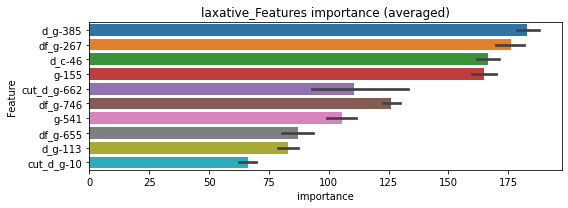

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167581	valid_1's binary_logloss: 0.000197715
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.000145966	valid_1's binary_logloss: 0.000172834


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000166134	valid_1's binary_logloss: 0.000890837
Early stopping, best iteration is:
[1549]	training's binary_logloss: 0.00014535	valid_1's binary_logloss: 0.000847007


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167961	valid_1's binary_logloss: 0.000181842
Early stopping, best iteration is:
[1633]	training's binary_logloss: 0.00014626	valid_1's binary_logloss: 0.000158628


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0001678	valid_1's binary_logloss: 0.000216871
Early stopping, best iteration is:
[1672]	training's binary_logloss: 0.000145323	valid_1's binary_logloss: 0.000190734


laxative logloss: 0.0003422987197176723
leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000160577	valid_1's binary_logloss: 0.000536264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000159342	valid_1's binary_logloss: 0.00552908
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000161386	valid_1's binary_logloss: 0.000233207
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005549, Threshold: 0.0012812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012812, conf_0:0.00090, conf_1:0.00167
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312812
threshold: 0.0312812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000158883	valid_1's binary_logloss: 0.00019661


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.0312812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312812, conf_0:0.02502, conf_1:0.03754
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0612812
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0912812
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1212812
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.1212812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1212812, conf_0:0.10915, conf_1:0.13341
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


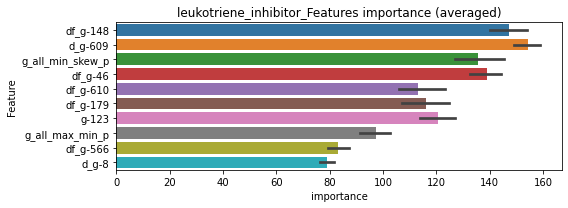

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00017158	valid_1's binary_logloss: 0.000360957
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.000150844	valid_1's binary_logloss: 0.000333103


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000170679	valid_1's binary_logloss: 0.00179744
Early stopping, best iteration is:
[1486]	training's binary_logloss: 0.000150328	valid_1's binary_logloss: 0.00172385


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000170371	valid_1's binary_logloss: 0.000203257
Early stopping, best iteration is:
[1622]	training's binary_logloss: 0.000148425	valid_1's binary_logloss: 0.000178209


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000172693	valid_1's binary_logloss: 0.00018817
Early stopping, best iteration is:
[1587]	training's binary_logloss: 0.000150648	valid_1's binary_logloss: 0.000164351


leukotriene_inhibitor logloss: 0.0005998797829732676
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000799006	valid_1's binary_logloss: 0.0407184
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0395104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000653404	valid_1's binary_logloss: 0.00590019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000641074	valid_1's binary_logloss: 0.0186809


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0051143, Threshold: 0.0112192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0112192, conf_0:0.00785, conf_1:0.01458
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0412192
threshold: 0.0412192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00116604	valid_1's binary_logloss: 0.0331577
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00134352	valid_1's binary_logloss: 0.0265792
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000562298	valid_1's binary_logloss: 0.0121777
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000645801	valid_1's binary_logloss: 0.0269961


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0233006, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03298, conf_1:0.04946
threshold: 0.0412192, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.0159546
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000648451	valid_1's binary_logloss: 0.0246976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000863604	valid_1's binary_logloss: 0.0218708
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00056696	valid_1's binary_logloss: 0.0140177


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266769, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412192, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


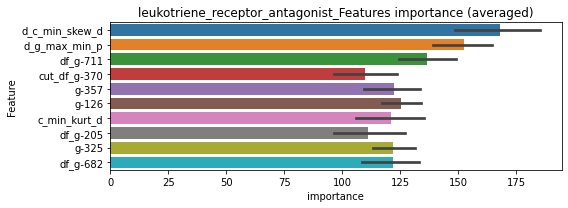

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000775285	valid_1's binary_logloss: 0.0193103


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000761809	valid_1's binary_logloss: 0.0137952


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000825379	valid_1's binary_logloss: 0.0136668


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000874571	valid_1's binary_logloss: 0.0177107


leukotriene_receptor_antagonist logloss: 0.01612157033341958
lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000218448	valid_1's binary_logloss: 0.00507746
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218282	valid_1's binary_logloss: 0.00085662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000228785	valid_1's binary_logloss: 0.000283942
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008451, Threshold: 0.0019468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019468, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319468


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000223586	valid_1's binary_logloss: 0.00133144


threshold: 0.0319468, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0319468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0319468, conf_0:0.02556, conf_1:0.03834
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0619468
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0619468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0619468, conf_0:0.05575, conf_1:0.06814
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


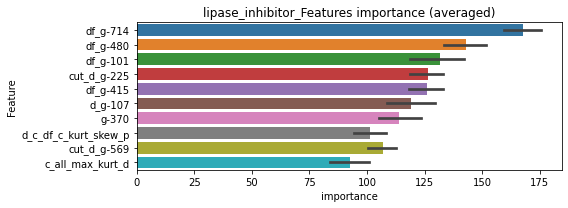

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000234052	valid_1's binary_logloss: 0.00243349
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000214757	valid_1's binary_logloss: 0.00238432


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00023418	valid_1's binary_logloss: 0.000459578
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.000215595	valid_1's binary_logloss: 0.000431972


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000235189	valid_1's binary_logloss: 0.000291734
Early stopping, best iteration is:
[1260]	training's binary_logloss: 0.000217531	valid_1's binary_logloss: 0.000270718


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000232729	valid_1's binary_logloss: 0.000788078
Early stopping, best iteration is:
[1419]	training's binary_logloss: 0.000208972	valid_1's binary_logloss: 0.000747834


lipase_inhibitor logloss: 0.0009591305710810647
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642394	valid_1's binary_logloss: 0.019137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000534407	valid_1's binary_logloss: 0.00968382
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000558863	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565183	valid_1's binary_logloss: 0.0233765


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054360, Threshold: 0.0847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0847418, conf_0:0.05932, conf_1:0.11016
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_1: 0.1147418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1447418
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1747418
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_4: 0.2047418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_5: 0.2347418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.2647418
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2947418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3247418
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3547418
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_10: 0.3847418
threshold: 0.3847418, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000760533	valid_1's binary_logloss: 0.0206911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0167079
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000533622	valid_1's binary_logloss: 0.00934085
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0257960, Threshold: 0.3847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3847418, conf_0:0.30779, conf_1:0.46169


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00110275	valid_1's binary_logloss: 0.0351071


Num_p_label: 36.0, Expected: 10.2, Adj_threshold_1: 0.4147418
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_2: 0.4447418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_3: 0.4747418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.5047418
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_5: 0.5347418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.5647418
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.5947418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_8: 0.6247418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_9: 0.6547418
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.6847418
threshold: 0.6847418, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000928793	valid_1's binary_logloss: 0.0250806
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000578	valid_1's binary_logloss: 0.0143207
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000576415	valid_1's binary_logloss: 0.0147836
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.0118693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0309536, Threshold: 0.6847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, Expected: 10.2, Threshold: 0.6847418, conf_0:0.61627, conf_1:0.75322
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7147418
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_2: 0.7447418
threshold: 0.7447418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


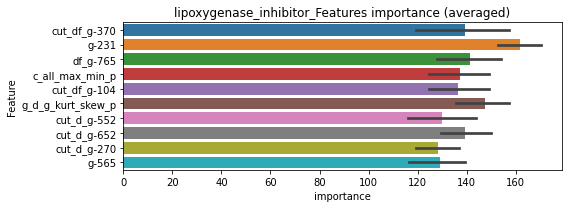

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000656898	valid_1's binary_logloss: 0.0100781
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.00062889	valid_1's binary_logloss: 0.00999418


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000727781	valid_1's binary_logloss: 0.0139834


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000774901	valid_1's binary_logloss: 0.0199888


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000652553	valid_1's binary_logloss: 0.0177412
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000640298	valid_1's binary_logloss: 0.0176949


lipoxygenase_inhibitor logloss: 0.015413534893906452
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000168462	valid_1's binary_logloss: 0.000944164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000169353	valid_1's binary_logloss: 0.00142441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000173981	valid_1's binary_logloss: 0.000203808
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004834, Threshold: 0.0023534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0023534, conf_0:0.00165, conf_1:0.00306
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0323534
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0623534


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000166301	valid_1's binary_logloss: 0.000551345


threshold: 0.0623534, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.0623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, Expected: 1.0, Threshold: 0.0623534, conf_0:0.04988, conf_1:0.07482
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0923534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1223534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1523534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1823534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2123534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.2423534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2723534
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3023534


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3323534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3623534
threshold: 0.3623534, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.3623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3623534, conf_0:0.32612, conf_1:0.39859
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3923534
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4223534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4523534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4823534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5123534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.5423534


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.5723534
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.6023534
threshold: 0.6023534, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


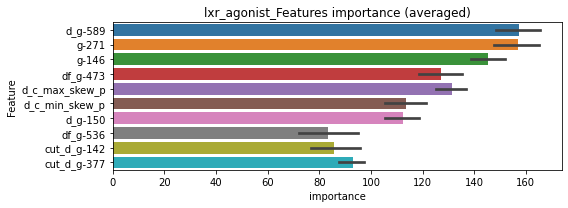

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000170304	valid_1's binary_logloss: 0.000390102
Early stopping, best iteration is:
[1601]	training's binary_logloss: 0.000152362	valid_1's binary_logloss: 0.000365978


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168486	valid_1's binary_logloss: 0.000508636
Early stopping, best iteration is:
[1524]	training's binary_logloss: 0.000151227	valid_1's binary_logloss: 0.000475679


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000170594	valid_1's binary_logloss: 0.000184931
Early stopping, best iteration is:
[1616]	training's binary_logloss: 0.000152143	valid_1's binary_logloss: 0.000164767


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00016935	valid_1's binary_logloss: 0.000216184
Early stopping, best iteration is:
[1556]	training's binary_logloss: 0.000151512	valid_1's binary_logloss: 0.000194504


lxr_agonist logloss: 0.00030023914028012806
mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000403088	valid_1's binary_logloss: 0.00696813
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000430864	valid_1's binary_logloss: 0.00401303
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.00253557
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409915	valid_1's binary_logloss: 0.00449951


y_Threshold: 0.0027126, Threshold: 0.0361704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0361704, conf_0:0.02532, conf_1:0.04702
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0661704
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0961704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1261704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.1561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1861704
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2161704
threshold: 0.2161704, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.2161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00130
Num_p_label: 35.0, Expected: 5.2, Threshold: 0.2161704, conf_0:0.17294, conf_1:0.25940
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.2461704
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.2761704
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_3: 0.3061704
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.3361704
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3661704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_6: 0.3961704
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.4261704
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_8: 0.4561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4861704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5161704
threshold: 0.5161704, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.5161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


Num_p_label: 13.0, Expected: 5.2, Threshold: 0.5161704, conf_0:0.46455, conf_1:0.56779
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.5461704
threshold: 0.5461704, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


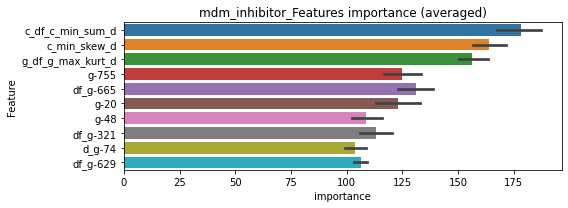

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000440025	valid_1's binary_logloss: 0.00378343
Early stopping, best iteration is:
[1249]	training's binary_logloss: 0.000398075	valid_1's binary_logloss: 0.00369135


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00043988	valid_1's binary_logloss: 0.00365313
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000437019	valid_1's binary_logloss: 0.00365014


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000442553	valid_1's binary_logloss: 0.00132721
Early stopping, best iteration is:
[1370]	training's binary_logloss: 0.000392469	valid_1's binary_logloss: 0.00122104


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000440765	valid_1's binary_logloss: 0.00278105
Early stopping, best iteration is:
[1221]	training's binary_logloss: 0.0004023	valid_1's binary_logloss: 0.00269557


mdm_inhibitor logloss: 0.002814697219832506
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000614321	valid_1's binary_logloss: 0.0256426
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000600395	valid_1's binary_logloss: 0.0239754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000590767	valid_1's binary_logloss: 0.00569473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000669241	valid_1's binary_logloss: 0.0296798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057713, Threshold: 0.0209722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0209722, conf_0:0.01468, conf_1:0.02726
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0509722
threshold: 0.0509722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00062487	valid_1's binary_logloss: 0.0262689
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000585085	valid_1's binary_logloss: 0.0237277
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000591348	valid_1's binary_logloss: 0.0047423
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000611814	valid_1's binary_logloss: 0.0247701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201435, Threshold: 0.0509722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0509722, conf_0:0.04078, conf_1:0.06117
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0809722
threshold: 0.0809722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00071069	valid_1's binary_logloss: 0.0181859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597334	valid_1's binary_logloss: 0.0134643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000590545	valid_1's binary_logloss: 0.0165468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00067439	valid_1's binary_logloss: 0.0141217


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246051, Threshold: 0.0809722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0809722, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


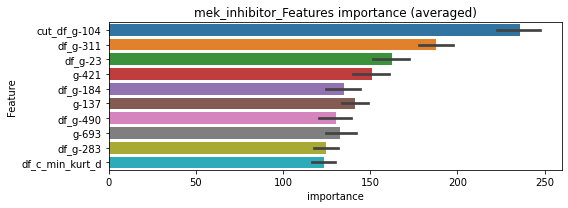

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000753312	valid_1's binary_logloss: 0.0214961
Early stopping, best iteration is:
[1124]	training's binary_logloss: 0.000683206	valid_1's binary_logloss: 0.0211759


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000762241	valid_1's binary_logloss: 0.0182525
Early stopping, best iteration is:
[1340]	training's binary_logloss: 0.00061597	valid_1's binary_logloss: 0.0172702


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000793871	valid_1's binary_logloss: 0.0160477


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000759548	valid_1's binary_logloss: 0.0181204
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000743361	valid_1's binary_logloss: 0.0180249


mek_inhibitor logloss: 0.018130475603471526
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0208992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000660533	valid_1's binary_logloss: 0.0279782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000988466	valid_1's binary_logloss: 0.0310065
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000786763	valid_1's binary_logloss: 0.0300372


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0057424, Threshold: 0.0181684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0181684, conf_0:0.01272, conf_1:0.02362
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0481684
threshold: 0.0481684, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000786701	valid_1's binary_logloss: 0.0231906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000632664	valid_1's binary_logloss: 0.0275624
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000779746	valid_1's binary_logloss: 0.0233566
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211019, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0037670 Vs.target_rate: 0.00311
Num_p_label: 15.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.03853, conf_1:0.05780


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00103321	valid_1's binary_logloss: 0.0337524


threshold: 0.0481684, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000566713	valid_1's binary_logloss: 0.0175932
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000609897	valid_1's binary_logloss: 0.0263719
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000709556	valid_1's binary_logloss: 0.0330151
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000764553	valid_1's binary_logloss: 0.0290297


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173244, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0032647 Vs.target_rate: 0.00311
Num_p_label: 13.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.04335, conf_1:0.05299
threshold: 0.0481684, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


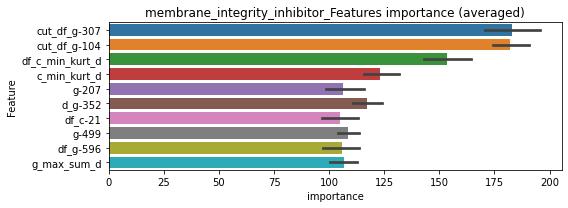

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000942464	valid_1's binary_logloss: 0.022113


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000904751	valid_1's binary_logloss: 0.0236489


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000776306	valid_1's binary_logloss: 0.0115234


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000969057	valid_1's binary_logloss: 0.0308955


membrane_integrity_inhibitor logloss: 0.02204522605846573
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347145	valid_1's binary_logloss: 0.00208707
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351549	valid_1's binary_logloss: 0.00254108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000353168	valid_1's binary_logloss: 0.00140059
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018504, Threshold: 0.0051409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051409, conf_0:0.00360, conf_1:0.00668
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0351409


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000360299	valid_1's binary_logloss: 0.00822544


threshold: 0.0351409, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.02811, conf_1:0.04217
threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.03163, conf_1:0.03865


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


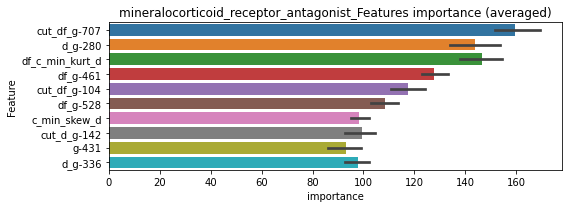

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377078	valid_1's binary_logloss: 0.00195107
Early stopping, best iteration is:
[1241]	training's binary_logloss: 0.000344441	valid_1's binary_logloss: 0.00185923


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000380541	valid_1's binary_logloss: 0.00233686
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000358587	valid_1's binary_logloss: 0.00228184


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000382221	valid_1's binary_logloss: 0.00129122
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000349829	valid_1's binary_logloss: 0.00122759


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000396523	valid_1's binary_logloss: 0.00750998


mineralocorticoid_receptor_antagonist logloss: 0.0032200834500453546
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00022456	valid_1's binary_logloss: 0.00213293
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000228446	valid_1's binary_logloss: 0.00369653
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000229948	valid_1's binary_logloss: 0.000417409
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008240, Threshold: 0.0018187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0018187, conf_0:0.00127, conf_1:0.00236
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0318187
threshold: 0.0318187, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000229791	valid_1's binary_logloss: 0.000356436


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02545, conf_1:0.03818


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02864, conf_1:0.03500
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


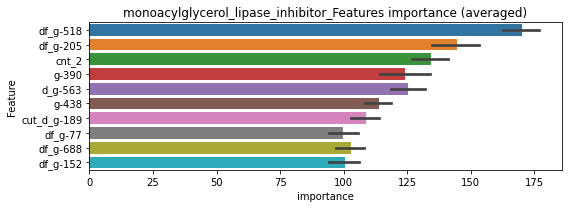

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000235957	valid_1's binary_logloss: 0.00242487
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000222457	valid_1's binary_logloss: 0.00237603


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000234915	valid_1's binary_logloss: 0.00254888
Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.000219601	valid_1's binary_logloss: 0.0025241


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000233177	valid_1's binary_logloss: 0.000304619
Early stopping, best iteration is:
[1286]	training's binary_logloss: 0.000216616	valid_1's binary_logloss: 0.000284154


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000233747	valid_1's binary_logloss: 0.000417421
Early stopping, best iteration is:
[1263]	training's binary_logloss: 0.000216598	valid_1's binary_logloss: 0.000395651


monoacylglycerol_lipase_inhibitor logloss: 0.001394982779270703
monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0578035	valid_1's binary_logloss: 0.10754
[2000]	training's binary_logloss: 0.0328691	valid_1's binary_logloss: 0.0973333
Early stopping, best iteration is:
[2313]	training's binary_logloss: 0.0286873	valid_1's binary_logloss: 0.0956973
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0603172	valid_1's binary_logloss: 0.0957025
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0357196	valid_1's binary_logloss: 0.0853268
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0623131	valid_1's binary_logloss: 0.0840425
[2000]	training's binary_logloss: 0.0352931	valid_1's binary_logloss: 0.0732193
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.033629	valid_1's binary_logloss: 0.0725716
Training until validation scores don't improve for 29 rounds
[1000]	trainin

1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0435698, Threshold: 0.0709203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 623/3732
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0709203, conf_0:0.04964, conf_1:0.09220
Num_p_label: 6.0, Expected: 14.2, Adj_threshold_1: 0.1009203
threshold: 0.1009203, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 623.0/3732, y_label_rate: 0.1669346
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0458113	valid_1's binary_logloss: 0.0713553
[2000]	training's binary_logloss: 0.0254378	valid_1's binary_logloss: 0.0591646
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.0183709	valid_1's binary_logloss: 0.0556845
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0434424	valid_1's binary_logloss: 0.0809185
[2000]	training's binary_logloss: 0.0239799	valid_1's binary_logloss: 0.070246
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0228568	valid_1's binary_logloss: 0.0696495
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0478297	valid_1's binary_logloss: 0.061057
[2000]	training's binary_logloss: 0.0263263	valid_1's binary_logloss: 0.0484546
[3000]	training's binary_logloss: 0.0176443	valid_1's binary_logloss: 0.0445334
Early stopping, best iteratio

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0459238, Threshold: 0.1009203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0025113 Vs.target_rate: 0.00357
Num_p_label: 10.0, Expected: 14.2, Threshold: 0.1009203, conf_0:0.08074, conf_1:0.12110
threshold: 0.1009203, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 606.0/3698, y_label_rate: 0.1638724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0364035	valid_1's binary_logloss: 0.0682854
[2000]	training's binary_logloss: 0.0199604	valid_1's binary_logloss: 0.0565704
Early stopping, best iteration is:
[2491]	training's binary_logloss: 0.0161702	valid_1's binary_logloss: 0.0541421
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0376725	valid_1's binary_logloss: 0.0588358
[2000]	training's binary_logloss: 0.0206982	valid_1's binary_logloss: 0.0469703
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.0149234	valid_1's binary_logloss: 0.043416
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0393093	valid_1's binary_logloss: 0.0477337
[2000]	training's binary_logloss: 0.0217699	valid_1's binary_logloss: 0.0362471
[3000]	training's binary_logloss: 0.0146881	valid_1's binary_logloss: 0.0322211
Early stopping, best iterati

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0419363, Threshold: 0.1009203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 596.0/3678
p_label_rate: 0.0015068 Vs.target_rate: 0.00357
Num_p_label: 6.0, Expected: 14.2, Threshold: 0.1009203, conf_0:0.09083, conf_1:0.11101
threshold: 0.1009203, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 596.0/3678, y_label_rate: 0.1620446


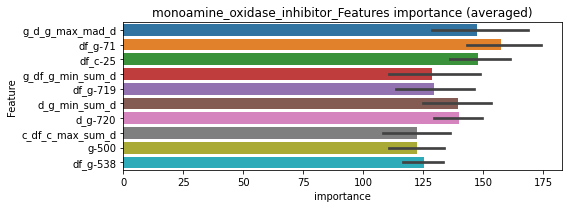

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0432289	valid_1's binary_logloss: 0.0677882
[2000]	training's binary_logloss: 0.0243543	valid_1's binary_logloss: 0.0525481
[3000]	training's binary_logloss: 0.016917	valid_1's binary_logloss: 0.0476985
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0152642	valid_1's binary_logloss: 0.0468776


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0449053	valid_1's binary_logloss: 0.0596054
[2000]	training's binary_logloss: 0.025563	valid_1's binary_logloss: 0.0428405
[3000]	training's binary_logloss: 0.017696	valid_1's binary_logloss: 0.0366867
[4000]	training's binary_logloss: 0.0134099	valid_1's binary_logloss: 0.0335618
Early stopping, best iteration is:
[4815]	training's binary_logloss: 0.0111864	valid_1's binary_logloss: 0.0321255


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0465843	valid_1's binary_logloss: 0.0540768
[2000]	training's binary_logloss: 0.0266238	valid_1's binary_logloss: 0.0377896
[3000]	training's binary_logloss: 0.0185232	valid_1's binary_logloss: 0.0320696
[4000]	training's binary_logloss: 0.0140836	valid_1's binary_logloss: 0.0293181
[5000]	training's binary_logloss: 0.0113172	valid_1's binary_logloss: 0.0276879
[6000]	training's binary_logloss: 0.00944215	valid_1's binary_logloss: 0.0265415
Early stopping, best iteration is:
[6317]	training's binary_logloss: 0.00895662	valid_1's binary_logloss: 0.0262755


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0466313	valid_1's binary_logloss: 0.0581648
[2000]	training's binary_logloss: 0.0268153	valid_1's binary_logloss: 0.040775
[3000]	training's binary_logloss: 0.018635	valid_1's binary_logloss: 0.0345829
[4000]	training's binary_logloss: 0.0141871	valid_1's binary_logloss: 0.0314401
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.0117987	valid_1's binary_logloss: 0.0297803


monoamine_oxidase_inhibitor logloss: 0.03376784689767527
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.000888263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311369	valid_1's binary_logloss: 0.00179395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00030891	valid_1's binary_logloss: 0.00218472
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016201, Threshold: 0.0166980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0166980, conf_0:0.01169, conf_1:0.02171
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0466980
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0766980
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1066980
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1366980


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307446	valid_1's binary_logloss: 0.00275058


threshold: 0.1366980, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.1366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.1366980, conf_0:0.10936, conf_1:0.16404
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1666980
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1966980
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.2266980
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.2566980
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2866980
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3166980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3466980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3766980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4066980
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.4366980
threshold: 0.4366980, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.4366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.4366980, conf_0:0.39303, conf_1:0.48037
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4666980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


threshold: 0.4666980, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


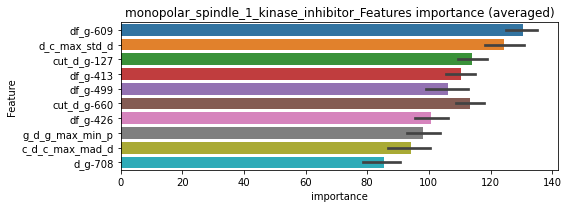

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00031292	valid_1's binary_logloss: 0.00058228
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000305388	valid_1's binary_logloss: 0.000570649


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000310687	valid_1's binary_logloss: 0.0015418
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000294304	valid_1's binary_logloss: 0.00151821


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314178	valid_1's binary_logloss: 0.00109427
Early stopping, best iteration is:
[1129]	training's binary_logloss: 0.000302426	valid_1's binary_logloss: 0.00107746


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000311753	valid_1's binary_logloss: 0.00139413
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000304345	valid_1's binary_logloss: 0.00137696


monopolar_spindle_1_kinase_inhibitor logloss: 0.00113573433452526


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0972468	valid_1's binary_logloss: 0.169237
[2000]	training's binary_logloss: 0.0551516	valid_1's binary_logloss: 0.150604
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0444723	valid_1's binary_logloss: 0.146529
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0998306	valid_1's binary_logloss: 0.151699
[2000]	training's binary_logloss: 0.0568437	valid_1's binary_logloss: 0.131496
Early stopping, best iteration is:
[2899]	training's binary_logloss: 0.0399637	valid_1's binary_logloss: 0.123798
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0961079	valid_1's binary_logloss: 0.182778
[2000]	training's binary_logloss: 0.054648	valid_1's binary_logloss: 0.163924
Early stopping, best iteration is:
[2497]	training's binary_logloss: 0.0442405	valid_1's binary_logloss: 0.160074
Tr

1 / 3, AUC score:0.968, PR-AUC:0.940
y_Threshold: 0.0723554, Threshold: 0.1160973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 210 → Positive_corect_labels: 494/3056
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1160973, conf_0:0.08127, conf_1:0.15093
Num_p_label: 10.0, Expected: 21.7, Adj_threshold_1: 0.1460973
threshold: 0.1460973, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 494.0/3056, y_label_rate: 0.1616492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0728487	valid_1's binary_logloss: 0.139109
[2000]	training's binary_logloss: 0.0405055	valid_1's binary_logloss: 0.120266
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.033296	valid_1's binary_logloss: 0.116494
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.076447	valid_1's binary_logloss: 0.122882
[2000]	training's binary_logloss: 0.0422845	valid_1's binary_logloss: 0.0997908
[3000]	training's binary_logloss: 0.0286579	valid_1's binary_logloss: 0.0919223
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.0264136	valid_1's binary_logloss: 0.0906656
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0794373	valid_1's binary_logloss: 0.111879
[2000]	training's binary_logloss: 0.0439146	valid_1's binary_logloss: 0.0873285
[3000]	training's binary_logloss: 

2 / 3, AUC score:0.993, PR-AUC:0.983
y_Threshold: 0.0730360, Threshold: 0.1460973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 464.0/2996
p_label_rate: 0.0072828 Vs.target_rate: 0.00546
Num_p_label: 29.0, Expected: 21.7, Threshold: 0.1460973, conf_0:0.11688, conf_1:0.17532
threshold: 0.1460973, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 464.0/2996, y_label_rate: 0.1548732
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0603611	valid_1's binary_logloss: 0.107133
[2000]	training's binary_logloss: 0.0326663	valid_1's binary_logloss: 0.0856146
[3000]	training's binary_logloss: 0.022168	valid_1's binary_logloss: 0.0783921
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.0183934	valid_1's binary_logloss: 0.0760313
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0628928	valid_1's binary_logloss: 0.0972729
[2000]	training's binary_logloss: 0.0341765	valid_1's binary_logloss: 0.0742636
[3000]	training's binary_logloss: 0.0231102	valid_1's binary_logloss: 0.0667242
Early stopping, best iteration is:
[3783]	training's binary_logloss: 0.0183486	valid_1's binary_logloss: 0.0635809
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0667586	valid_1's binary_logloss: 0.0800353
[2000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0716523, Threshold: 0.1460973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 451.0/2970
p_label_rate: 0.0075339 Vs.target_rate: 0.00546
Num_p_label: 30.0, Expected: 21.7, Threshold: 0.1460973, conf_0:0.13149, conf_1:0.16071
threshold: 0.1460973, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 451.0/2970, y_label_rate: 0.1518519


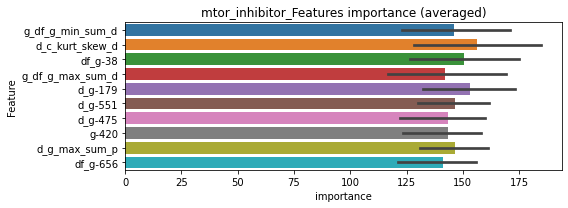

len(train_index) : 2227
len(valid_index) : 743
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0771358	valid_1's binary_logloss: 0.110118
[2000]	training's binary_logloss: 0.0434987	valid_1's binary_logloss: 0.0777201
[3000]	training's binary_logloss: 0.0300545	valid_1's binary_logloss: 0.0656449
[4000]	training's binary_logloss: 0.0228239	valid_1's binary_logloss: 0.0591732
[5000]	training's binary_logloss: 0.0183039	valid_1's binary_logloss: 0.0553111
Early stopping, best iteration is:
[5825]	training's binary_logloss: 0.0157193	valid_1's binary_logloss: 0.0528105


len(train_index) : 2227
len(valid_index) : 743
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0757025	valid_1's binary_logloss: 0.107854
[2000]	training's binary_logloss: 0.0420935	valid_1's binary_logloss: 0.0786888
[3000]	training's binary_logloss: 0.0290468	valid_1's binary_logloss: 0.0679883
[4000]	training's binary_logloss: 0.0221015	valid_1's binary_logloss: 0.0630582
Early stopping, best iteration is:
[4496]	training's binary_logloss: 0.0197237	valid_1's binary_logloss: 0.0611817


len(train_index) : 2228
len(valid_index) : 742
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0781361	valid_1's binary_logloss: 0.100431
[2000]	training's binary_logloss: 0.0437425	valid_1's binary_logloss: 0.0691281
[3000]	training's binary_logloss: 0.0301638	valid_1's binary_logloss: 0.0577974
[4000]	training's binary_logloss: 0.0228679	valid_1's binary_logloss: 0.0519515
[5000]	training's binary_logloss: 0.0183356	valid_1's binary_logloss: 0.0484268
[6000]	training's binary_logloss: 0.0153099	valid_1's binary_logloss: 0.0457178
Early stopping, best iteration is:
[6262]	training's binary_logloss: 0.0146639	valid_1's binary_logloss: 0.045141


len(train_index) : 2228
len(valid_index) : 742
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0759033	valid_1's binary_logloss: 0.105939
[2000]	training's binary_logloss: 0.0423775	valid_1's binary_logloss: 0.0760806
[3000]	training's binary_logloss: 0.029501	valid_1's binary_logloss: 0.0657497
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0267349	valid_1's binary_logloss: 0.0636575


mtor_inhibitor logloss: 0.05569854216927875
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000476707	valid_1's binary_logloss: 0.0121389
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000476726	valid_1's binary_logloss: 0.00956389
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000493206	valid_1's binary_logloss: 0.00312973
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0037370, Threshold: 0.0989376, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000594824	valid_1's binary_logloss: 0.0192982


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0989376, conf_0:0.06926, conf_1:0.12862
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.1589376
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1889376
threshold: 0.1889376, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000473679	valid_1's binary_logloss: 0.00505381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000465914	valid_1's binary_logloss: 0.00466512
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000465649	valid_1's binary_logloss: 0.00539976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000469593	valid_1's binary_logloss: 0.0122536


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1002446, Threshold: 0.1889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0188348 Vs.target_rate: 0.00202
Num_p_label: 75.0, Expected: 8.0, Threshold: 0.1889376, conf_0:0.15115, conf_1:0.22673
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2189376
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2489376
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_3: 0.2789376
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_4: 0.3089376
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3389376
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_6: 0.3689376
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.3989376
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4289376
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.4589376
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4889376
threshold: 0.4889376, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000468772	valid_1's binary_logloss: 0.00565936
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470265	valid_1's binary_logloss: 0.00519889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000471949	valid_1's binary_logloss: 0.0058831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000461626	valid_1's binary_logloss: 0.00353389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1380826, Threshold: 0.4889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0123054 Vs.target_rate: 0.00202
Num_p_label: 49.0, Expected: 8.0, Threshold: 0.4889376, conf_0:0.44004, conf_1:0.53783
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_1: 0.5189376
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_2: 0.5489376
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_3: 0.5789376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.6089376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.6389376
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6689376
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_7: 0.6989376
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_8: 0.7289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.7589376
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.7889376
threshold: 0.7889376, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

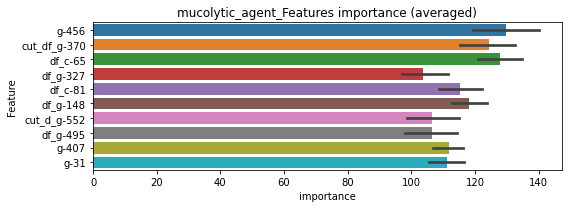

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000553669	valid_1's binary_logloss: 0.0069798
Early stopping, best iteration is:
[1275]	training's binary_logloss: 0.000480223	valid_1's binary_logloss: 0.00678446


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000547181	valid_1's binary_logloss: 0.00592298
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.000472369	valid_1's binary_logloss: 0.00569975


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000548874	valid_1's binary_logloss: 0.00625952
Early stopping, best iteration is:
[1273]	training's binary_logloss: 0.00047765	valid_1's binary_logloss: 0.00603636


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000560314	valid_1's binary_logloss: 0.00481789
Early stopping, best iteration is:
[1307]	training's binary_logloss: 0.000481133	valid_1's binary_logloss: 0.0045449


mucolytic_agent logloss: 0.0057676544271186925
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000514495	valid_1's binary_logloss: 0.0107466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000437088	valid_1's binary_logloss: 0.00359975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000452749	valid_1's binary_logloss: 0.00716617
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028542, Threshold: 0.0132299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000445505	valid_1's binary_logloss: 0.00750395


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132299, conf_0:0.00926, conf_1:0.01720
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432299
threshold: 0.0432299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0432299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0432299, conf_0:0.03458, conf_1:0.05188
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0732299
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0732299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.0732299, conf_0:0.06591, conf_1:0.08055


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


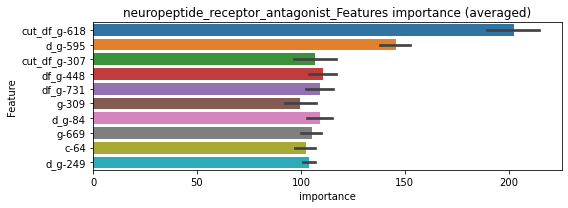

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000500226	valid_1's binary_logloss: 0.00893439


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000467821	valid_1's binary_logloss: 0.00292333
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000464741	valid_1's binary_logloss: 0.00291317


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000698581	valid_1's binary_logloss: 0.0063683


================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00046405	valid_1's binary_logloss: 0.00638407
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000461424	valid_1's binary_logloss: 0.00637443


neuropeptide_receptor_antagonist logloss: 0.006147572793870028


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10016
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10016


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.19151	valid_1's binary_logloss: 0.305378
[2000]	training's binary_logloss: 0.120502	valid_1's binary_logloss: 0.278808
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.117107	valid_1's binary_logloss: 0.277755
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.1926	valid_1's binary_logloss: 0.30849
[2000]	training's binary_logloss: 0.121229	valid_1's binary_logloss: 0.282653
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.116173	valid_1's binary_logloss: 0.281259
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.193782	valid_1's binary_logloss: 0.301634
[2000]	training's binary_logloss: 0.12156	valid_1's binary_logloss: 0.272493
Early stopping, best iteration is:
[2748]	training's binary_logloss: 0.0927888	valid_1's binary_logloss: 0.264713
Training until

1 / 3, AUC score:0.860, PR-AUC:0.771
y_Threshold: 0.1606712, Threshold: 0.3116651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1575 → Positive_corect_labels: 1416/10444
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.3116651, conf_0:0.21817, conf_1:0.40516
threshold: 0.3116651, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1416.0/10444, y_label_rate: 0.1355802
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.117412	valid_1's binary_logloss: 0.180052
[2000]	training's binary_logloss: 0.0655643	valid_1's binary_logloss: 0.139596
[3000]	training's binary_logloss: 0.044069	valid_1's binary_logloss: 0.121841
Early stopping, best iteration is:
[3763]	training's binary_logloss: 0.0348053	valid_1's binary_logloss: 0.114022
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.115869	valid_1's binary_logloss: 0.192666
[2000]	training's binary_logloss: 0.0644818	valid_1's binary_logloss: 0.15434
[3000]	training's binary_logloss: 0.0434161	valid_1's binary_logloss: 0.138289
Early stopping, best iteration is:
[3757]	training's binary_logloss: 0.0343325	valid_1's binary_logloss: 0.131635
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.115345	valid_1's binary_logloss: 0.192415
[2000]	training's binary_logloss: 0.06372

2 / 3, AUC score:0.983, PR-AUC:0.953
y_Threshold: 0.1274040, Threshold: 0.3116651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 304 → Positive_corect_labels: 1264.0/10140
p_label_rate: 0.0082873 Vs.target_rate: 0.03494
Num_p_label: 33.0, Expected: 139.1, Threshold: 0.3116651, conf_0:0.24933, conf_1:0.37400
threshold: 0.3116651, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1264.0/10140, y_label_rate: 0.1246548
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0986588	valid_1's binary_logloss: 0.15327
[2000]	training's binary_logloss: 0.0529374	valid_1's binary_logloss: 0.114793
[3000]	training's binary_logloss: 0.0350642	valid_1's binary_logloss: 0.09814
Early stopping, best iteration is:
[3312]	training's binary_logloss: 0.0317183	valid_1's binary_logloss: 0.0952238
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0990148	valid_1's binary_logloss: 0.158165
[2000]	training's binary_logloss: 0.0531311	valid_1's binary_logloss: 0.120768
[3000]	training's binary_logloss: 0.0353	valid_1's binary_logloss: 0.104982
Early stopping, best iteration is:
[3773]	training's binary_logloss: 0.0276743	valid_1's binary_logloss: 0.0976199
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.100493	valid_1's binary_logloss: 0.151483
[2000]	training's binary_logloss: 0.0537

3 / 3, AUC score:0.992, PR-AUC:0.978
y_Threshold: 0.1244741, Threshold: 0.3116651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 1185.0/9982
p_label_rate: 0.0060271 Vs.target_rate: 0.03494
Num_p_label: 24.0, Expected: 139.1, Threshold: 0.3116651, conf_0:0.28050, conf_1:0.34283
threshold: 0.3116651, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 1185.0/9982, y_label_rate: 0.1187137


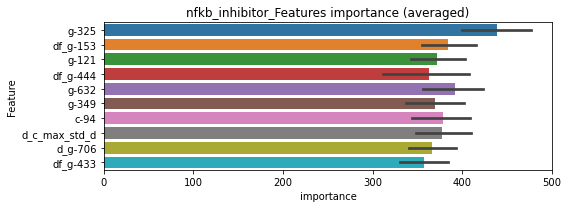

len(train_index) : 7486
len(valid_index) : 2496
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.117928	valid_1's binary_logloss: 0.16666
[2000]	training's binary_logloss: 0.0668886	valid_1's binary_logloss: 0.121415
[3000]	training's binary_logloss: 0.0454307	valid_1's binary_logloss: 0.101176
[4000]	training's binary_logloss: 0.0340669	valid_1's binary_logloss: 0.0899417
[5000]	training's binary_logloss: 0.0270827	valid_1's binary_logloss: 0.0827288
Early stopping, best iteration is:
[5562]	training's binary_logloss: 0.0242591	valid_1's binary_logloss: 0.0797687


len(train_index) : 7486
len(valid_index) : 2496
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.11738	valid_1's binary_logloss: 0.166722
[2000]	training's binary_logloss: 0.0664423	valid_1's binary_logloss: 0.122952
[3000]	training's binary_logloss: 0.0449477	valid_1's binary_logloss: 0.103168
[4000]	training's binary_logloss: 0.033784	valid_1's binary_logloss: 0.0931109
Early stopping, best iteration is:
[4942]	training's binary_logloss: 0.0272176	valid_1's binary_logloss: 0.0861467


len(train_index) : 7487
len(valid_index) : 2495
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.118085	valid_1's binary_logloss: 0.160898
[2000]	training's binary_logloss: 0.0667837	valid_1's binary_logloss: 0.115749
[3000]	training's binary_logloss: 0.0451403	valid_1's binary_logloss: 0.0958267
[4000]	training's binary_logloss: 0.0338936	valid_1's binary_logloss: 0.0855819
[5000]	training's binary_logloss: 0.0268647	valid_1's binary_logloss: 0.0788115
Early stopping, best iteration is:
[5561]	training's binary_logloss: 0.0240447	valid_1's binary_logloss: 0.0760585


len(train_index) : 7487
len(valid_index) : 2495
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.116471	valid_1's binary_logloss: 0.170215
[2000]	training's binary_logloss: 0.0660737	valid_1's binary_logloss: 0.126495
[3000]	training's binary_logloss: 0.0448703	valid_1's binary_logloss: 0.106857
[4000]	training's binary_logloss: 0.0336877	valid_1's binary_logloss: 0.0962389
Early stopping, best iteration is:
[4847]	training's binary_logloss: 0.0275845	valid_1's binary_logloss: 0.0904605


nfkb_inhibitor logloss: 0.0831085857466776
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000238678	valid_1's binary_logloss: 0.00175164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000236937	valid_1's binary_logloss: 0.00121174
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000246325	valid_1's binary_logloss: 0.000460892
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009120, Threshold: 0.0051276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0051276, conf_0:0.00359, conf_1:0.00667
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0351276
threshold: 0.0351276, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000239429	valid_1's binary_logloss: 0.000773861


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0351276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0351276, conf_0:0.02810, conf_1:0.04215
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0651276
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0951276
threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0951276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0951276, conf_0:0.08561, conf_1:0.10464
threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


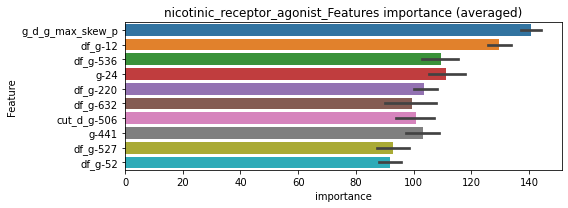

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000256034	valid_1's binary_logloss: 0.000523116
Early stopping, best iteration is:
[1281]	training's binary_logloss: 0.000239319	valid_1's binary_logloss: 0.000499383


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000254942	valid_1's binary_logloss: 0.000802287
Early stopping, best iteration is:
[1264]	training's binary_logloss: 0.000238372	valid_1's binary_logloss: 0.000773617


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000253854	valid_1's binary_logloss: 0.000397516
Early stopping, best iteration is:
[1334]	training's binary_logloss: 0.000238123	valid_1's binary_logloss: 0.000374666


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000256338	valid_1's binary_logloss: 0.000496389
Early stopping, best iteration is:
[1324]	training's binary_logloss: 0.000240331	valid_1's binary_logloss: 0.000475398


nicotinic_receptor_agonist logloss: 0.0005307963961060803
nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000377243	valid_1's binary_logloss: 0.00619259
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361423	valid_1's binary_logloss: 0.00241037
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000378031	valid_1's binary_logloss: 0.00141091
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027561, Threshold: 0.0365256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365105	valid_1's binary_logloss: 0.00183201


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0365256, conf_0:0.02557, conf_1:0.04748
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0665256
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0965256
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1265256
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1565256
threshold: 0.1565256, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.1565256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.1565256, conf_0:0.12522, conf_1:0.18783
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1865256


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2165256
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2465256
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2765256
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_5: 0.3065256
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3365256
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_7: 0.3665256
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_8: 0.3965256
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4265256
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.4265256, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4265256, conf_0:0.38387, conf_1:0.46918
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


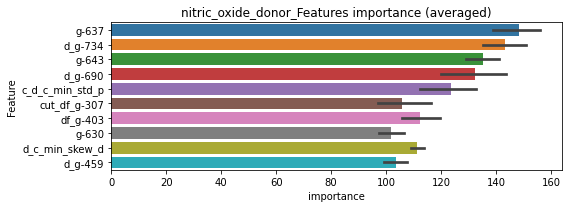

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377666	valid_1's binary_logloss: 0.00460978
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000368693	valid_1's binary_logloss: 0.0045789


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000379186	valid_1's binary_logloss: 0.00141531
Early stopping, best iteration is:
[1155]	training's binary_logloss: 0.000357371	valid_1's binary_logloss: 0.00136766


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000380644	valid_1's binary_logloss: 0.00121586
Early stopping, best iteration is:
[1206]	training's binary_logloss: 0.000357294	valid_1's binary_logloss: 0.00116637


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000381327	valid_1's binary_logloss: 0.00151212
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.000353873	valid_1's binary_logloss: 0.00146236


nitric_oxide_donor logloss: 0.0021438233210301326
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000375672	valid_1's binary_logloss: 0.00447262
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000353039	valid_1's binary_logloss: 0.00524729
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000357332	valid_1's binary_logloss: 0.00109795
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023205, Threshold: 0.0075482, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00223764


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0075482, conf_0:0.00528, conf_1:0.00981
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0375482
threshold: 0.0375482, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0375482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0375482, conf_0:0.03004, conf_1:0.04506
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_1: 0.0675482
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0675482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00122
Num_p_label: 5.0, Expected: 4.8, Threshold: 0.0675482, conf_0:0.06079, conf_1:0.07430
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


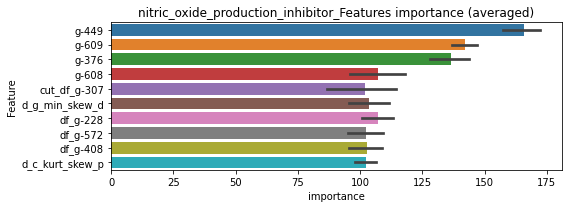

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389489	valid_1's binary_logloss: 0.00539577
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000383811	valid_1's binary_logloss: 0.00537935


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000385556	valid_1's binary_logloss: 0.0043329
Early stopping, best iteration is:
[1075]	training's binary_logloss: 0.000370113	valid_1's binary_logloss: 0.00426379


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000393398	valid_1's binary_logloss: 0.00107557
Early stopping, best iteration is:
[1364]	training's binary_logloss: 0.000347747	valid_1's binary_logloss: 0.000981181


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000391772	valid_1's binary_logloss: 0.00222292
Early stopping, best iteration is:
[1327]	training's binary_logloss: 0.000348391	valid_1's binary_logloss: 0.00205817


nitric_oxide_production_inhibitor logloss: 0.0031714902451628743
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000382956	valid_1's binary_logloss: 0.00400104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000389693	valid_1's binary_logloss: 0.00145589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000383193	valid_1's binary_logloss: 0.00100479
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027906, Threshold: 0.0240505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000377714	valid_1's binary_logloss: 0.00287639


Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0240505, conf_0:0.01684, conf_1:0.03127
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0540505
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0840505
threshold: 0.0840505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.0840505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


p_label_rate: 0.0110497 Vs.target_rate: 0.00109
Num_p_label: 44.0, Expected: 4.3, Threshold: 0.0840505, conf_0:0.06724, conf_1:0.10086
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.1140505
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.1440505
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1740505
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2040505
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.2340505
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2640505
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_7: 0.2940505
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.2940505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2940505, conf_0:0.26465, conf_1:0.32346


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


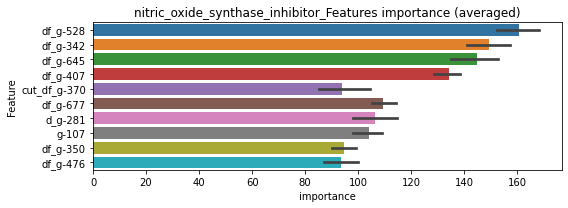

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397452	valid_1's binary_logloss: 0.00414336
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000387338	valid_1's binary_logloss: 0.00410194


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402433	valid_1's binary_logloss: 0.00140921
Early stopping, best iteration is:
[1232]	training's binary_logloss: 0.000374988	valid_1's binary_logloss: 0.00135651


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00040524	valid_1's binary_logloss: 0.000884559
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000387682	valid_1's binary_logloss: 0.00085625


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402527	valid_1's binary_logloss: 0.00184685
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.00036871	valid_1's binary_logloss: 0.0017597


nitric_oxide_synthase_inhibitor logloss: 0.002018669567513229
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000183581	valid_1's binary_logloss: 0.00165967
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000189225	valid_1's binary_logloss: 0.0027749
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000183492	valid_1's binary_logloss: 0.000233643
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006083, Threshold: 0.0028739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0028739, conf_0:0.00201, conf_1:0.00374
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0328739
threshold: 0.0328739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000185383	valid_1's binary_logloss: 0.000247557


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.0328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00029
Num_p_label: 26.0, Expected: 1.2, Threshold: 0.0328739, conf_0:0.02630, conf_1:0.03945
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0628739
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0928739
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.1228739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1528739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1828739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2128739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2428739
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.2728739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3028739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3328739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.3328739, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.3328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3328739, conf_0:0.29959, conf_1:0.36616
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3628739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3928739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4228739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4528739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4828739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5128739
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.5428739
threshold: 0.5428739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


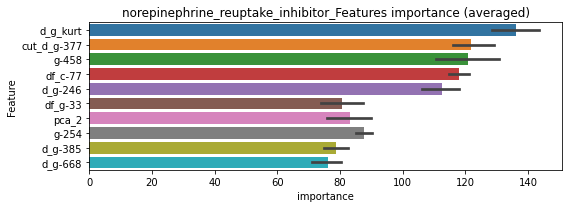

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000187309	valid_1's binary_logloss: 0.00103564
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.000175079	valid_1's binary_logloss: 0.00100508


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000185743	valid_1's binary_logloss: 0.000932448


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[1242]	training's binary_logloss: 0.000174825	valid_1's binary_logloss: 0.000908026


================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00018702	valid_1's binary_logloss: 0.00020542


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[1210]	training's binary_logloss: 0.000177117	valid_1's binary_logloss: 0.000194738


================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000186543	valid_1's binary_logloss: 0.000219267
Early stopping, best iteration is:
[1319]	training's binary_logloss: 0.000174382	valid_1's binary_logloss: 0.000205193


norepinephrine_reuptake_inhibitor logloss: 0.0005782683281191411
nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000273712	valid_1's binary_logloss: 0.00280958
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000268375	valid_1's binary_logloss: 0.00343378
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000271747	valid_1's binary_logloss: 0.00042958
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000269443	valid_1's binary_logloss: 0.000814483


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013650, Threshold: 0.0046269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0046269, conf_0:0.00324, conf_1:0.00602
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0346269
threshold: 0.0346269, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0346269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0346269, conf_0:0.02770, conf_1:0.04155
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0646269


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0646269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0646269, conf_0:0.05816, conf_1:0.07109
threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


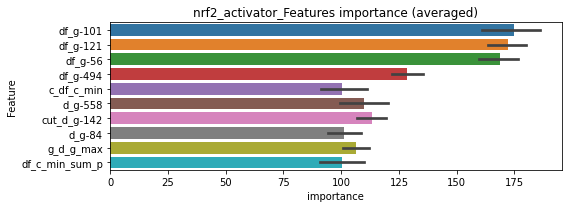

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.0018533
Early stopping, best iteration is:
[1409]	training's binary_logloss: 0.000257785	valid_1's binary_logloss: 0.00175268


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000291568	valid_1's binary_logloss: 0.0028571
Early stopping, best iteration is:
[1446]	training's binary_logloss: 0.000260849	valid_1's binary_logloss: 0.0027662


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00029496	valid_1's binary_logloss: 0.000381359
Early stopping, best iteration is:
[1391]	training's binary_logloss: 0.000264179	valid_1's binary_logloss: 0.000343359


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000290908	valid_1's binary_logloss: 0.000737597
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.00026013	valid_1's binary_logloss: 0.000689


nrf2_activator logloss: 0.0013878088912613812
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000641862	valid_1's binary_logloss: 0.0241858
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000708853	valid_1's binary_logloss: 0.0265121
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000572552	valid_1's binary_logloss: 0.0126501
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000656129	valid_1's binary_logloss: 0.0245179


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045783, Threshold: 0.0166179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0166179, conf_0:0.01163, conf_1:0.02160
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_1: 0.0466179
threshold: 0.0466179, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000750975	valid_1's binary_logloss: 0.0344887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000631051	valid_1's binary_logloss: 0.0217084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000585883	valid_1's binary_logloss: 0.0159011
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000645289	valid_1's binary_logloss: 0.021062


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303178, Threshold: 0.0466179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0466179, conf_0:0.03729, conf_1:0.05594
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0766179
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1066179
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_3: 0.1366179
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1666179
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_5: 0.1966179
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_6: 0.2266179
threshold: 0.2266179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000915217	valid_1's binary_logloss: 0.0266504
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000676286	valid_1's binary_logloss: 0.020661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000563221	valid_1's binary_logloss: 0.0101559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000587492	valid_1's binary_logloss: 0.0121729


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0439013, Threshold: 0.2266179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.2266179, conf_0:0.20396, conf_1:0.24928
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_1: 0.2566179
threshold: 0.2566179, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


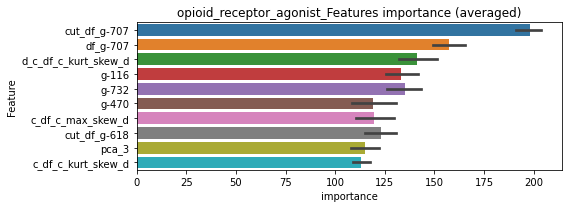

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00126658	valid_1's binary_logloss: 0.0303794
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000664929	valid_1's binary_logloss: 0.0218915
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.000630293	valid_1's binary_logloss: 0.0216844


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2841
len(valid_index) : 947


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00111587	valid_1's binary_logloss: 0.0271546


================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000775793	valid_1's binary_logloss: 0.0172297


opioid_receptor_agonist logloss: 0.024112056421304297
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0649419	valid_1's binary_logloss: 0.122263
Early stopping, best iteration is:
[1501]	training's binary_logloss: 0.0478413	valid_1's binary_logloss: 0.11497
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0678972	valid_1's binary_logloss: 0.112429
[2000]	training's binary_logloss: 0.0390364	valid_1's binary_logloss: 0.100669
Early stopping, best iteration is:
[1999]	training's binary_logloss: 0.0390581	valid_1's binary_logloss: 0.100649
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0700665	valid_1's binary_logloss: 0.0931223
[2000]	training's binary_logloss: 0.0400047	valid_1's binary_logloss: 0.0801954
[3000]	training's binary_logloss: 0.0267258	valid_1's binary_logloss: 0.075593
Early stopping, best iteration is:
[3622]	training's binary_logloss: 0.0219044	valid_1's binary_logloss: 0.0740761

1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0529443, Threshold: 0.1195739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 218 → Positive_corect_labels: 612/3715
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1195739, conf_0:0.08370, conf_1:0.15545
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_1: 0.1495739
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.1795739
threshold: 0.1795739, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 612.0/3715, y_label_rate: 0.1647376
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0478984	valid_1's binary_logloss: 0.0689484
[2000]	training's binary_logloss: 0.0268256	valid_1's binary_logloss: 0.0543841
[3000]	training's binary_logloss: 0.0181114	valid_1's binary_logloss: 0.0495299
Early stopping, best iteration is:
[3953]	training's binary_logloss: 0.0136975	valid_1's binary_logloss: 0.0470306
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0429319	valid_1's binary_logloss: 0.0920128
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0248844	valid_1's binary_logloss: 0.0832299
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471964	valid_1's binary_logloss: 0.0652872
[2000]	training's binary_logloss: 0.0263324	valid_1's binary_logloss: 0.051816
[3000]	training's binary_logloss: 0.017749	valid_1's binary_logloss: 0.0465334
Early stopping, best iteratio

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0655804, Threshold: 0.1795739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 580.0/3651
p_label_rate: 0.0226017 Vs.target_rate: 0.00403
Num_p_label: 90.0, Expected: 16.1, Threshold: 0.1795739, conf_0:0.14366, conf_1:0.21549
Num_p_label: 86.0, Expected: 16.1, Adj_threshold_1: 0.2095739
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_2: 0.2395739
Num_p_label: 57.0, Expected: 16.1, Adj_threshold_3: 0.2695739
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_4: 0.2995739
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_5: 0.3295739
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_6: 0.3595739
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_7: 0.3895739
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_8: 0.4195739
threshold: 0.4195739, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 580.0/3651, y_label_rate: 0.1588606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0312119	valid_1's binary_logloss: 0.0448028
[2000]	training's binary_logloss: 0.0166359	valid_1's binary_logloss: 0.0317742
[3000]	training's binary_logloss: 0.0113813	valid_1's binary_logloss: 0.0276437
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00946328	valid_1's binary_logloss: 0.0262721
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0282828	valid_1's binary_logloss: 0.0532217
[2000]	training's binary_logloss: 0.014846	valid_1's binary_logloss: 0.0415862
[3000]	training's binary_logloss: 0.0101975	valid_1's binary_logloss: 0.0383811
Early stopping, best iteration is:
[3454]	training's binary_logloss: 0.00892159	valid_1's binary_logloss: 0.0375602
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319895	valid_1's binary_logloss: 0.0345516
[2000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0695140, Threshold: 0.4195739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 568.0/3627
p_label_rate: 0.0130588 Vs.target_rate: 0.00403
Num_p_label: 52.0, Expected: 16.1, Threshold: 0.4195739, conf_0:0.37762, conf_1:0.46153
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_1: 0.4495739
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_2: 0.4795739
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_3: 0.5095739
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_4: 0.5395739
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_5: 0.5695739
threshold: 0.5695739, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 568.0/3627, y_label_rate: 0.1566033


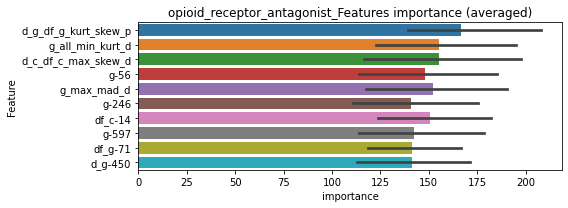

len(train_index) : 2720
len(valid_index) : 907
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0353424	valid_1's binary_logloss: 0.0423149
[2000]	training's binary_logloss: 0.0176675	valid_1's binary_logloss: 0.023531
[3000]	training's binary_logloss: 0.0119283	valid_1's binary_logloss: 0.0173515
[4000]	training's binary_logloss: 0.00907389	valid_1's binary_logloss: 0.0143442
[5000]	training's binary_logloss: 0.00732719	valid_1's binary_logloss: 0.0125708
[6000]	training's binary_logloss: 0.00618307	valid_1's binary_logloss: 0.011325
[7000]	training's binary_logloss: 0.00534624	valid_1's binary_logloss: 0.0104676
[8000]	training's binary_logloss: 0.00472353	valid_1's binary_logloss: 0.00982167
[9000]	training's binary_logloss: 0.00423081	valid_1's binary_logloss: 0.00929036
[10000]	training's binary_logloss: 0.00382589	valid_1's binary_logloss: 0.00889871
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00382589	valid_1's binary_logloss: 0.00889871

len(train_index) : 2720
len(valid_index) : 907
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0347641	valid_1's binary_logloss: 0.0482859
[2000]	training's binary_logloss: 0.0172417	valid_1's binary_logloss: 0.0290622
[3000]	training's binary_logloss: 0.0115745	valid_1's binary_logloss: 0.0226768
[4000]	training's binary_logloss: 0.00881767	valid_1's binary_logloss: 0.0195746
[5000]	training's binary_logloss: 0.00709681	valid_1's binary_logloss: 0.0176792
[6000]	training's binary_logloss: 0.005988	valid_1's binary_logloss: 0.0164032
[7000]	training's binary_logloss: 0.00517319	valid_1's binary_logloss: 0.0154865
[8000]	training's binary_logloss: 0.00457915	valid_1's binary_logloss: 0.014798
[9000]	training's binary_logloss: 0.00410754	valid_1's binary_logloss: 0.0142529
[10000]	training's binary_logloss: 0.00371869	valid_1's binary_logloss: 0.0138149
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00371869	valid_1's binary_logloss: 0.0138149


len(train_index) : 2720
len(valid_index) : 907
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357935	valid_1's binary_logloss: 0.0417471
[2000]	training's binary_logloss: 0.0181049	valid_1's binary_logloss: 0.0228222
[3000]	training's binary_logloss: 0.0122045	valid_1's binary_logloss: 0.0165424
[4000]	training's binary_logloss: 0.00931328	valid_1's binary_logloss: 0.0134768
[5000]	training's binary_logloss: 0.00752434	valid_1's binary_logloss: 0.0115449
[6000]	training's binary_logloss: 0.00635212	valid_1's binary_logloss: 0.0103097
[7000]	training's binary_logloss: 0.00549467	valid_1's binary_logloss: 0.00940009
[8000]	training's binary_logloss: 0.00486057	valid_1's binary_logloss: 0.00872376
[9000]	training's binary_logloss: 0.00435674	valid_1's binary_logloss: 0.00819942
[10000]	training's binary_logloss: 0.00394537	valid_1's binary_logloss: 0.00778138
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00394537	valid_1's binary_logloss: 0.00778

len(train_index) : 2721
len(valid_index) : 906
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346581	valid_1's binary_logloss: 0.0499739
[2000]	training's binary_logloss: 0.0170907	valid_1's binary_logloss: 0.0313443
[3000]	training's binary_logloss: 0.0114558	valid_1's binary_logloss: 0.0253515
[4000]	training's binary_logloss: 0.0086992	valid_1's binary_logloss: 0.0224972
[5000]	training's binary_logloss: 0.00701834	valid_1's binary_logloss: 0.0208608
[6000]	training's binary_logloss: 0.0059188	valid_1's binary_logloss: 0.0197725
[7000]	training's binary_logloss: 0.00511974	valid_1's binary_logloss: 0.0190205
[8000]	training's binary_logloss: 0.00453427	valid_1's binary_logloss: 0.018463
[9000]	training's binary_logloss: 0.004066	valid_1's binary_logloss: 0.017965
Early stopping, best iteration is:
[9503]	training's binary_logloss: 0.00386174	valid_1's binary_logloss: 0.0177917


opioid_receptor_antagonist logloss: 0.012070097394725606
orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408515	valid_1's binary_logloss: 0.00948051
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000441188	valid_1's binary_logloss: 0.0078803
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000433062	valid_1's binary_logloss: 0.00288825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419533	valid_1's binary_logloss: 0.00227722


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027897, Threshold: 0.0066891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0066891, conf_0:0.00468, conf_1:0.00870
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0366891
threshold: 0.0366891, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0366891, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0366891, conf_0:0.02935, conf_1:0.04403
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0666891
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0666891, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0666891, conf_0:0.06002, conf_1:0.07336
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


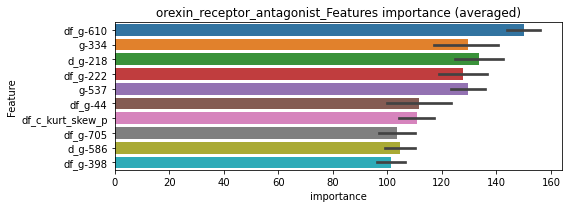

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000469563	valid_1's binary_logloss: 0.00839033
Early stopping, best iteration is:
[1124]	training's binary_logloss: 0.000436545	valid_1's binary_logloss: 0.0082601


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000471889	valid_1's binary_logloss: 0.00965298
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000474574	valid_1's binary_logloss: 0.0096496


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000480878	valid_1's binary_logloss: 0.00193694
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.000415982	valid_1's binary_logloss: 0.00180613


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000473974	valid_1's binary_logloss: 0.00264954
Early stopping, best iteration is:
[1391]	training's binary_logloss: 0.000405607	valid_1's binary_logloss: 0.00250511


orexin_receptor_antagonist logloss: 0.00555617419576419
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000661168	valid_1's binary_logloss: 0.0172723
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000660016	valid_1's binary_logloss: 0.0173125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000757567	valid_1's binary_logloss: 0.0125423
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.018688


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062367, Threshold: 0.0339920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0339920, conf_0:0.02379, conf_1:0.04419
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0639920
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0939920
threshold: 0.0939920, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000545868	valid_1's binary_logloss: 0.0130716
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000592322	valid_1's binary_logloss: 0.0127144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557617	valid_1's binary_logloss: 0.0121288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000588611	valid_1's binary_logloss: 0.0125816


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297218, Threshold: 0.0939920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0939920, conf_0:0.07519, conf_1:0.11279
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1239920
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1539920
threshold: 0.1539920, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000538424	valid_1's binary_logloss: 0.0105619
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000562716	valid_1's binary_logloss: 0.010794
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000544013	valid_1's binary_logloss: 0.010336
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.0188376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268616, Threshold: 0.1539920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, Expected: 10.4, Threshold: 0.1539920, conf_0:0.13859, conf_1:0.16939
threshold: 0.1539920, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


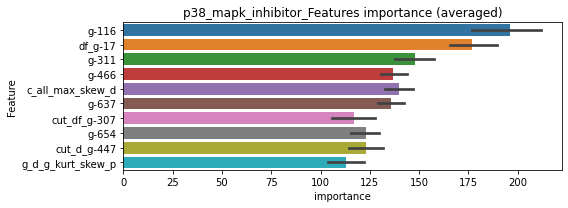

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000665733	valid_1's binary_logloss: 0.0128689
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000640386	valid_1's binary_logloss: 0.012801


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000655183	valid_1's binary_logloss: 0.00839345
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.00056187	valid_1's binary_logloss: 0.00807818


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000660477	valid_1's binary_logloss: 0.00900965
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000561289	valid_1's binary_logloss: 0.00855564


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000836664	valid_1's binary_logloss: 0.0235057


p38_mapk_inhibitor logloss: 0.013235034893050383
p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000324215	valid_1's binary_logloss: 0.00118327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000329664	valid_1's binary_logloss: 0.00702921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00033583	valid_1's binary_logloss: 0.000762062
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019519, Threshold: 0.0123772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00102209


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0123772, conf_0:0.00866, conf_1:0.01609
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0423772
threshold: 0.0423772, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.0423772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0423772, conf_0:0.03390, conf_1:0.05085
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0723772
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1023772
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.1023772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1023772, conf_0:0.09214, conf_1:0.11261


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


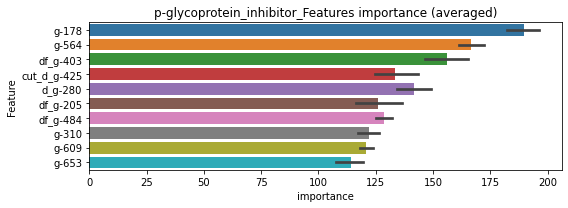

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000360806	valid_1's binary_logloss: 0.00109396
Early stopping, best iteration is:
[1439]	training's binary_logloss: 0.000315723	valid_1's binary_logloss: 0.00100083


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.00037274	valid_1's binary_logloss: 0.00447738


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000361295	valid_1's binary_logloss: 0.000858685
Early stopping, best iteration is:
[1410]	training's binary_logloss: 0.000316179	valid_1's binary_logloss: 0.000771474


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000360469	valid_1's binary_logloss: 0.00127704
Early stopping, best iteration is:
[1406]	training's binary_logloss: 0.000317419	valid_1's binary_logloss: 0.00119271


p-glycoprotein_inhibitor logloss: 0.0018609214537600668
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000715869	valid_1's binary_logloss: 0.0350298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000577873	valid_1's binary_logloss: 0.011486
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00078412	valid_1's binary_logloss: 0.0106256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000576922	valid_1's binary_logloss: 0.0116081


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054800, Threshold: 0.0164058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0164058, conf_0:0.01148, conf_1:0.02133
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_1: 0.0464058
threshold: 0.0464058, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000585599	valid_1's binary_logloss: 0.0108777
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000536579	valid_1's binary_logloss: 0.0132389
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000586444	valid_1's binary_logloss: 0.00652355
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563155	valid_1's binary_logloss: 0.0156146


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0523554, Threshold: 0.0464058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0105475 Vs.target_rate: 0.00256
Num_p_label: 42.0, Expected: 10.2, Threshold: 0.0464058, conf_0:0.03712, conf_1:0.05569
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.0764058
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1064058
threshold: 0.1064058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000570055	valid_1's binary_logloss: 0.0185529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000678772	valid_1's binary_logloss: 0.0210196
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000541237	valid_1's binary_logloss: 0.00700009
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000540321	valid_1's binary_logloss: 0.013672


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0340393, Threshold: 0.1064058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, Expected: 10.2, Threshold: 0.1064058, conf_0:0.09577, conf_1:0.11705
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1364058
threshold: 0.1364058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


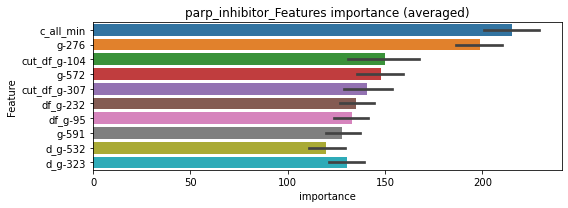

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000662517	valid_1's binary_logloss: 0.0114499
Early stopping, best iteration is:
[1326]	training's binary_logloss: 0.0005614	valid_1's binary_logloss: 0.0111179


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000655672	valid_1's binary_logloss: 0.0146409
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000563653	valid_1's binary_logloss: 0.0142087


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.00074001	valid_1's binary_logloss: 0.00669144


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000962134	valid_1's binary_logloss: 0.0187933


parp_inhibitor logloss: 0.012703788449746631


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0563049	valid_1's binary_logloss: 0.131804
Early stopping, best iteration is:
[1520]	training's binary_logloss: 0.0371638	valid_1's binary_logloss: 0.125324
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0560282	valid_1's binary_logloss: 0.132575
Early stopping, best iteration is:
[1502]	training's binary_logloss: 0.0374718	valid_1's binary_logloss: 0.126128
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0559007	valid_1's binary_logloss: 0.138513
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0419048	valid_1's binary_logloss: 0.13413
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0569059	valid_1's binary_logloss: 0.130791
[2000]	training's binary_logloss: 0.0280829	valid_1's binary_logloss: 0.120126
Early stopping, best

1 / 3, AUC score:0.968, PR-AUC:0.939
y_Threshold: 0.0638541, Threshold: 0.0965144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 561 → Positive_corect_labels: 1294/8027
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0965144, conf_0:0.06756, conf_1:0.12547
threshold: 0.0965144, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1294.0/8027, y_label_rate: 0.1612059
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0372474	valid_1's binary_logloss: 0.0880087
[2000]	training's binary_logloss: 0.0184467	valid_1's binary_logloss: 0.078378
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.0159567	valid_1's binary_logloss: 0.0772449
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0371921	valid_1's binary_logloss: 0.0878387
[2000]	training's binary_logloss: 0.0184171	valid_1's binary_logloss: 0.0778887
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0154253	valid_1's binary_logloss: 0.0762848
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0386129	valid_1's binary_logloss: 0.0797626
[2000]	training's binary_logloss: 0.0191434	valid_1's binary_logloss: 0.0690677
Early stopping, best iteration is:
[2513]	training's binary_logloss: 0.0150142	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0578107, Threshold: 0.0965144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 1233.0/7905
p_label_rate: 0.0070316 Vs.target_rate: 0.01247
Num_p_label: 28.0, Expected: 49.7, Threshold: 0.0965144, conf_0:0.07721, conf_1:0.11582
threshold: 0.0965144, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1233.0/7905, y_label_rate: 0.1559772
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.029499	valid_1's binary_logloss: 0.06339
[2000]	training's binary_logloss: 0.0146733	valid_1's binary_logloss: 0.0536229
[3000]	training's binary_logloss: 0.00957094	valid_1's binary_logloss: 0.0505928
Early stopping, best iteration is:
[3065]	training's binary_logloss: 0.00936741	valid_1's binary_logloss: 0.0504855
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0294766	valid_1's binary_logloss: 0.0613668
[2000]	training's binary_logloss: 0.0146283	valid_1's binary_logloss: 0.0515369
[3000]	training's binary_logloss: 0.00951767	valid_1's binary_logloss: 0.047955
Early stopping, best iteration is:
[3004]	training's binary_logloss: 0.00950331	valid_1's binary_logloss: 0.0479378
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0302127	valid_1's binary_logloss: 0.053063
[2000]	training's binary_log

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0542505, Threshold: 0.0965144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1195.0/7829
p_label_rate: 0.0087896 Vs.target_rate: 0.01247
Num_p_label: 35.0, Expected: 49.7, Threshold: 0.0965144, conf_0:0.08686, conf_1:0.10617
threshold: 0.0965144, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1195.0/7829, y_label_rate: 0.1526376


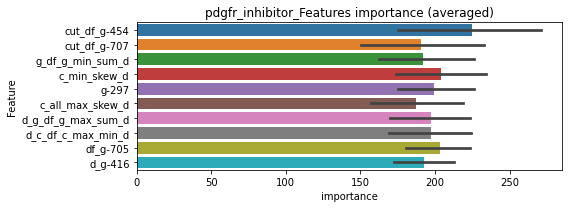

len(train_index) : 5871
len(valid_index) : 1958
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336061	valid_1's binary_logloss: 0.0508295
[2000]	training's binary_logloss: 0.0178457	valid_1's binary_logloss: 0.0385022
[3000]	training's binary_logloss: 0.0118833	valid_1's binary_logloss: 0.0340808
[4000]	training's binary_logloss: 0.00886252	valid_1's binary_logloss: 0.03172
Early stopping, best iteration is:
[4809]	training's binary_logloss: 0.00734331	valid_1's binary_logloss: 0.0305811


len(train_index) : 5872
len(valid_index) : 1957
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0331847	valid_1's binary_logloss: 0.0525719
[2000]	training's binary_logloss: 0.017594	valid_1's binary_logloss: 0.0399514
[3000]	training's binary_logloss: 0.0117133	valid_1's binary_logloss: 0.0354297
[4000]	training's binary_logloss: 0.0087503	valid_1's binary_logloss: 0.0329409
[5000]	training's binary_logloss: 0.00697468	valid_1's binary_logloss: 0.0314171
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.00670624	valid_1's binary_logloss: 0.0311949


len(train_index) : 5872
len(valid_index) : 1957
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323177	valid_1's binary_logloss: 0.0602832
[2000]	training's binary_logloss: 0.0172175	valid_1's binary_logloss: 0.0489561
[3000]	training's binary_logloss: 0.0114411	valid_1's binary_logloss: 0.0449665
Early stopping, best iteration is:
[3785]	training's binary_logloss: 0.00902176	valid_1's binary_logloss: 0.0434935


len(train_index) : 5872
len(valid_index) : 1957
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340918	valid_1's binary_logloss: 0.0485057
[2000]	training's binary_logloss: 0.0180368	valid_1's binary_logloss: 0.0353923
[3000]	training's binary_logloss: 0.0119851	valid_1's binary_logloss: 0.0305567
[4000]	training's binary_logloss: 0.00896855	valid_1's binary_logloss: 0.0280662
[5000]	training's binary_logloss: 0.00715102	valid_1's binary_logloss: 0.0266109
[6000]	training's binary_logloss: 0.00593858	valid_1's binary_logloss: 0.0256453
[7000]	training's binary_logloss: 0.00507884	valid_1's binary_logloss: 0.0249524
Early stopping, best iteration is:
[7421]	training's binary_logloss: 0.00480032	valid_1's binary_logloss: 0.0247008


pdgfr_inhibitor logloss: 0.032492325505410334
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000303859	valid_1's binary_logloss: 0.000878954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000376626	valid_1's binary_logloss: 0.00416869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.00250519
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017407, Threshold: 0.0088878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0088878, conf_0:0.00622, conf_1:0.01155
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0388878


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000306272	valid_1's binary_logloss: 0.00117478


threshold: 0.0388878, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.0388878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.0388878, conf_0:0.03111, conf_1:0.04667
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0688878
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0988878
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1288878
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1588878


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.1588878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1588878, conf_0:0.14300, conf_1:0.17478
threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


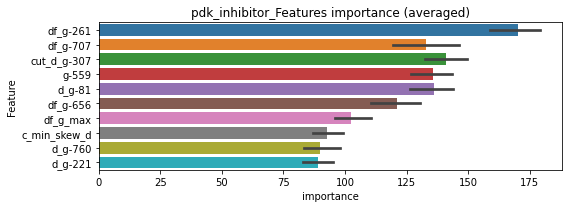

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000310779	valid_1's binary_logloss: 0.00064394
Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.000297397	valid_1's binary_logloss: 0.000622109


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000307505	valid_1's binary_logloss: 0.00331871
Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000294346	valid_1's binary_logloss: 0.00329347


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000310295	valid_1's binary_logloss: 0.0021001
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000303173	valid_1's binary_logloss: 0.00209454


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000309431	valid_1's binary_logloss: 0.000758684
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000300287	valid_1's binary_logloss: 0.000744571


pdk_inhibitor logloss: 0.0016888973719010529


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0783215	valid_1's binary_logloss: 0.132882
Early stopping, best iteration is:
[1347]	training's binary_logloss: 0.0632853	valid_1's binary_logloss: 0.130008
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0763649	valid_1's binary_logloss: 0.142368
Early stopping, best iteration is:
[1250]	training's binary_logloss: 0.065095	valid_1's binary_logloss: 0.140622
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.078389	valid_1's binary_logloss: 0.133018
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.071176	valid_1's binary_logloss: 0.13159
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0800418	valid_1's binary_logloss: 0.13019
Early stopping, best iteration is:
[1537]	training's binary_logloss: 0.0577312	valid_1's binary_logloss

1 / 3, AUC score:0.948, PR-AUC:0.912
y_Threshold: 0.0671189, Threshold: 0.0949811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 649 → Positive_corect_labels: 1195/7639
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0949811, conf_0:0.06649, conf_1:0.12348
threshold: 0.0949811, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1195.0/7639, y_label_rate: 0.1564341
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343523	valid_1's binary_logloss: 0.0597758
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0195763	valid_1's binary_logloss: 0.054052
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0364215	valid_1's binary_logloss: 0.0547691
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.022244	valid_1's binary_logloss: 0.0480652
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0348951	valid_1's binary_logloss: 0.0597762
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0201158	valid_1's binary_logloss: 0.0536281
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0368796	valid_1's binary_logloss: 0.0491217
[2000]	training's binary_logloss: 0.0200951	valid_1's binary_logloss: 0.0414042
[3000]	traini

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0426515, Threshold: 0.0949811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1150.0/7549
p_label_rate: 0.0000000 Vs.target_rate: 0.01109
Num_p_label: 0.0, Expected: 44.1, Threshold: 0.0949811, conf_0:0.07598, conf_1:0.11398
threshold: 0.0949811, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1150.0/7549, y_label_rate: 0.1523381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0232693	valid_1's binary_logloss: 0.0317484
[2000]	training's binary_logloss: 0.0127341	valid_1's binary_logloss: 0.0250301
[3000]	training's binary_logloss: 0.00846324	valid_1's binary_logloss: 0.022596
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.00665359	valid_1's binary_logloss: 0.0216291
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.022109	valid_1's binary_logloss: 0.0352788
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0127482	valid_1's binary_logloss: 0.0291853
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0231505	valid_1's binary_logloss: 0.034172
[2000]	training's binary_logloss: 0.012719	valid_1's binary_logloss: 0.0273423
[3000]	training's binary_logloss: 0.00845071	valid_1's binary_logloss: 0.0249466
Early stopping, best iterati

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0345466, Threshold: 0.0949811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1128.0/7505
p_label_rate: 0.0002511 Vs.target_rate: 0.01109
Num_p_label: 1.0, Expected: 44.1, Threshold: 0.0949811, conf_0:0.08548, conf_1:0.10448
threshold: 0.0949811, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 1128.0/7505, y_label_rate: 0.1502998


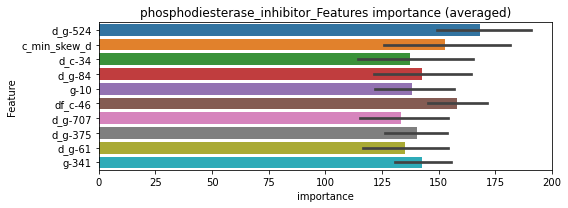

len(train_index) : 5628
len(valid_index) : 1877
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0240374	valid_1's binary_logloss: 0.0251995
[2000]	training's binary_logloss: 0.0130284	valid_1's binary_logloss: 0.0144747
[3000]	training's binary_logloss: 0.00906268	valid_1's binary_logloss: 0.0109767
[4000]	training's binary_logloss: 0.00698017	valid_1's binary_logloss: 0.00926445
[5000]	training's binary_logloss: 0.00563573	valid_1's binary_logloss: 0.00816258
[6000]	training's binary_logloss: 0.00472849	valid_1's binary_logloss: 0.00746019
[7000]	training's binary_logloss: 0.00406327	valid_1's binary_logloss: 0.0069259
[8000]	training's binary_logloss: 0.00356356	valid_1's binary_logloss: 0.00651626
[9000]	training's binary_logloss: 0.00317534	valid_1's binary_logloss: 0.00619702
[10000]	training's binary_logloss: 0.00286351	valid_1's binary_logloss: 0.00592409
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00286351	valid_1's binary_logloss: 0.00

len(train_index) : 5629
len(valid_index) : 1876
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0231791	valid_1's binary_logloss: 0.0304086
[2000]	training's binary_logloss: 0.0123789	valid_1's binary_logloss: 0.0194496
[3000]	training's binary_logloss: 0.0085834	valid_1's binary_logloss: 0.0156826
[4000]	training's binary_logloss: 0.00658996	valid_1's binary_logloss: 0.013959
[5000]	training's binary_logloss: 0.00532031	valid_1's binary_logloss: 0.0129219
[6000]	training's binary_logloss: 0.00446003	valid_1's binary_logloss: 0.0121979
[7000]	training's binary_logloss: 0.00383095	valid_1's binary_logloss: 0.0116861
[8000]	training's binary_logloss: 0.00336521	valid_1's binary_logloss: 0.0112576
[9000]	training's binary_logloss: 0.00299722	valid_1's binary_logloss: 0.0109496
Early stopping, best iteration is:
[9431]	training's binary_logloss: 0.00285909	valid_1's binary_logloss: 0.0108488


len(train_index) : 5629
len(valid_index) : 1876
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0227831	valid_1's binary_logloss: 0.0309639
[2000]	training's binary_logloss: 0.0121305	valid_1's binary_logloss: 0.0204936
[3000]	training's binary_logloss: 0.00840867	valid_1's binary_logloss: 0.0170711
[4000]	training's binary_logloss: 0.00647689	valid_1's binary_logloss: 0.0156288
[5000]	training's binary_logloss: 0.00524082	valid_1's binary_logloss: 0.0146995
[6000]	training's binary_logloss: 0.00439165	valid_1's binary_logloss: 0.0140801
Early stopping, best iteration is:
[6768]	training's binary_logloss: 0.00389577	valid_1's binary_logloss: 0.01374


len(train_index) : 5629
len(valid_index) : 1876
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0228542	valid_1's binary_logloss: 0.0312159
[2000]	training's binary_logloss: 0.0121206	valid_1's binary_logloss: 0.020398
[3000]	training's binary_logloss: 0.00843455	valid_1's binary_logloss: 0.0170456
[4000]	training's binary_logloss: 0.00646573	valid_1's binary_logloss: 0.0155333
[5000]	training's binary_logloss: 0.00522606	valid_1's binary_logloss: 0.0146316
[6000]	training's binary_logloss: 0.00437792	valid_1's binary_logloss: 0.0140401
Early stopping, best iteration is:
[6747]	training's binary_logloss: 0.00389821	valid_1's binary_logloss: 0.0137484


phosphodiesterase_inhibitor logloss: 0.011065001519167816
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000341788	valid_1's binary_logloss: 0.00455987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000344932	valid_1's binary_logloss: 0.00613354
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.00194627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000349001	valid_1's binary_logloss: 0.00262725


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020529, Threshold: 0.0072677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0072677, conf_0:0.00509, conf_1:0.00945
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0372677
threshold: 0.0372677, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0372677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0372677, conf_0:0.02981, conf_1:0.04472
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0672677
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0672677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0672677, conf_0:0.06054, conf_1:0.07399
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


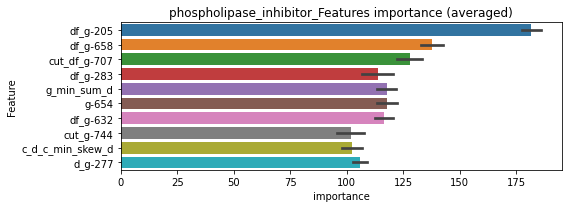

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000384086	valid_1's binary_logloss: 0.00273989
Early stopping, best iteration is:
[1210]	training's binary_logloss: 0.00034957	valid_1's binary_logloss: 0.00265283


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000374012	valid_1's binary_logloss: 0.00464471
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000355729	valid_1's binary_logloss: 0.00459548


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000385175	valid_1's binary_logloss: 0.00173981
Early stopping, best iteration is:
[1206]	training's binary_logloss: 0.000352658	valid_1's binary_logloss: 0.00169848


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000377545	valid_1's binary_logloss: 0.00190736
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.000333423	valid_1's binary_logloss: 0.0018028


phospholipase_inhibitor logloss: 0.002687388622871749


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0836276	valid_1's binary_logloss: 0.145062
Early stopping, best iteration is:
[1655]	training's binary_logloss: 0.056125	valid_1's binary_logloss: 0.135836
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0803132	valid_1's binary_logloss: 0.162546
Early stopping, best iteration is:
[1557]	training's binary_logloss: 0.05662	valid_1's binary_logloss: 0.155954
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0847367	valid_1's binary_logloss: 0.135424
[2000]	training's binary_logloss: 0.0477079	valid_1's binary_logloss: 0.122586
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0407415	valid_1's binary_logloss: 0.120427
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0859982	valid_1's binary_logloss: 0.129987
Early stopping, best i

1 / 3, AUC score:0.965, PR-AUC:0.932
y_Threshold: 0.0702996, Threshold: 0.1013926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 322 → Positive_corect_labels: 656/4134
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1013926, conf_0:0.07097, conf_1:0.13181
Num_p_label: 8.0, Expected: 25.2, Adj_threshold_1: 0.1313926
threshold: 0.1313926, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/4134, y_label_rate: 0.1586841
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0476701	valid_1's binary_logloss: 0.101165
[2000]	training's binary_logloss: 0.0259345	valid_1's binary_logloss: 0.0880741
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0247094	valid_1's binary_logloss: 0.0871852
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0501786	valid_1's binary_logloss: 0.0863093
[2000]	training's binary_logloss: 0.0275914	valid_1's binary_logloss: 0.0739648
Early stopping, best iteration is:
[2113]	training's binary_logloss: 0.0261954	valid_1's binary_logloss: 0.0733794
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0559248	valid_1's binary_logloss: 0.0622538
[2000]	training's binary_logloss: 0.0307009	valid_1's binary_logloss: 0.0431856
[3000]	training's binary_logloss: 0.0205785	valid_1's binary_logloss: 0.0362908
[4000]	training's binary_log

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0576841, Threshold: 0.1313926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 631.0/4084
p_label_rate: 0.0005023 Vs.target_rate: 0.00634
Num_p_label: 2.0, Expected: 25.2, Threshold: 0.1313926, conf_0:0.10511, conf_1:0.15767
threshold: 0.1313926, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 631.0/4084, y_label_rate: 0.1545054
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.039813	valid_1's binary_logloss: 0.0715959
[2000]	training's binary_logloss: 0.0212067	valid_1's binary_logloss: 0.058381
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0201763	valid_1's binary_logloss: 0.0578231
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0417912	valid_1's binary_logloss: 0.0585022
[2000]	training's binary_logloss: 0.0226978	valid_1's binary_logloss: 0.0435825
[3000]	training's binary_logloss: 0.0152593	valid_1's binary_logloss: 0.0383866
[4000]	training's binary_logloss: 0.0114169	valid_1's binary_logloss: 0.0358969
Early stopping, best iteration is:
[3971]	training's binary_logloss: 0.0114956	valid_1's binary_logloss: 0.0358846
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0423246	valid_1's binary_logloss: 0.0574615
[2000]	training's binary_logl

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0455375, Threshold: 0.1313926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 623.0/4068
p_label_rate: 0.0002511 Vs.target_rate: 0.00634
Num_p_label: 1.0, Expected: 25.2, Threshold: 0.1313926, conf_0:0.11825, conf_1:0.14453
threshold: 0.1313926, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 623.0/4068, y_label_rate: 0.1531465


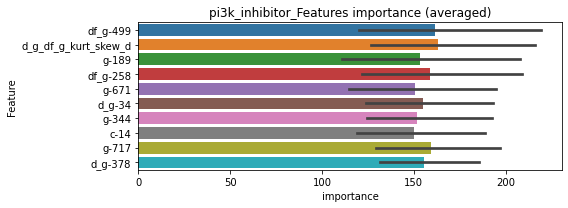

len(train_index) : 3051
len(valid_index) : 1017
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0534834	valid_1's binary_logloss: 0.0693891
[2000]	training's binary_logloss: 0.0292673	valid_1's binary_logloss: 0.0474967
[3000]	training's binary_logloss: 0.0200752	valid_1's binary_logloss: 0.0402669
[4000]	training's binary_logloss: 0.0152419	valid_1's binary_logloss: 0.0370187
[5000]	training's binary_logloss: 0.0122491	valid_1's binary_logloss: 0.0351124
[6000]	training's binary_logloss: 0.0102169	valid_1's binary_logloss: 0.0337536
Early stopping, best iteration is:
[6278]	training's binary_logloss: 0.00975048	valid_1's binary_logloss: 0.0334074


len(train_index) : 3051
len(valid_index) : 1017
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0492018	valid_1's binary_logloss: 0.0858915
[2000]	training's binary_logloss: 0.026603	valid_1's binary_logloss: 0.0644566
[3000]	training's binary_logloss: 0.0183416	valid_1's binary_logloss: 0.0573119
[4000]	training's binary_logloss: 0.0139485	valid_1's binary_logloss: 0.0541829
Early stopping, best iteration is:
[4083]	training's binary_logloss: 0.013675	valid_1's binary_logloss: 0.0538812


len(train_index) : 3051
len(valid_index) : 1017
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0539835	valid_1's binary_logloss: 0.064253
[2000]	training's binary_logloss: 0.0294118	valid_1's binary_logloss: 0.0419013
[3000]	training's binary_logloss: 0.020236	valid_1's binary_logloss: 0.0345813
[4000]	training's binary_logloss: 0.0153452	valid_1's binary_logloss: 0.0308902
[5000]	training's binary_logloss: 0.0123514	valid_1's binary_logloss: 0.0285566
[6000]	training's binary_logloss: 0.0103195	valid_1's binary_logloss: 0.026991
[7000]	training's binary_logloss: 0.0088486	valid_1's binary_logloss: 0.0257553
Early stopping, best iteration is:
[7050]	training's binary_logloss: 0.00878105	valid_1's binary_logloss: 0.0256905


len(train_index) : 3051
len(valid_index) : 1017
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0532489	valid_1's binary_logloss: 0.0671794
[2000]	training's binary_logloss: 0.0291067	valid_1's binary_logloss: 0.0455564
[3000]	training's binary_logloss: 0.0200711	valid_1's binary_logloss: 0.0385237
[4000]	training's binary_logloss: 0.015216	valid_1's binary_logloss: 0.0352233
[5000]	training's binary_logloss: 0.0122623	valid_1's binary_logloss: 0.0334236
Early stopping, best iteration is:
[4992]	training's binary_logloss: 0.0122792	valid_1's binary_logloss: 0.0334099


pi3k_inhibitor logloss: 0.03659724278615769
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000416481	valid_1's binary_logloss: 0.00431885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423025	valid_1's binary_logloss: 0.0048987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000416862	valid_1's binary_logloss: 0.00126668
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023141, Threshold: 0.0076017, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000406063	valid_1's binary_logloss: 0.00688213


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0076017, conf_0:0.00532, conf_1:0.00988
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0376017
threshold: 0.0376017, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03008, conf_1:0.04512
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03384, conf_1:0.04136
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


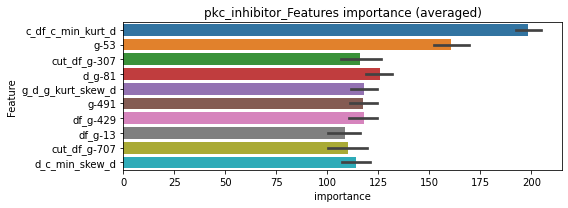

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000453839	valid_1's binary_logloss: 0.00501844
Early stopping, best iteration is:
[1253]	training's binary_logloss: 0.000409325	valid_1's binary_logloss: 0.00486468


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00045337	valid_1's binary_logloss: 0.00476097
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000423048	valid_1's binary_logloss: 0.00469269


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000457096	valid_1's binary_logloss: 0.00108932
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.0010032


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000470287	valid_1's binary_logloss: 0.00539679


pkc_inhibitor logloss: 0.003989515883779252
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000591296	valid_1's binary_logloss: 0.0230529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00056468	valid_1's binary_logloss: 0.00995056
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000684819	valid_1's binary_logloss: 0.0141656
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052834, Threshold: 0.0231491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0231491, conf_0:0.01620, conf_1:0.03009
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0531491


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113494	valid_1's binary_logloss: 0.0289167


threshold: 0.0531491, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000596199	valid_1's binary_logloss: 0.0179022
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000519621	valid_1's binary_logloss: 0.0146445
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000531024	valid_1's binary_logloss: 0.0150026
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0408890, Threshold: 0.0531491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000879823	valid_1's binary_logloss: 0.0138202


p_label_rate: 0.0135610 Vs.target_rate: 0.00231
Num_p_label: 54.0, Expected: 9.2, Threshold: 0.0531491, conf_0:0.04252, conf_1:0.06378
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0831491
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1131491
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_3: 0.1431491
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.1731491
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_5: 0.2031491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.2331491
threshold: 0.2331491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0126771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00055593	valid_1's binary_logloss: 0.0176898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000614339	valid_1's binary_logloss: 0.0136931
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0396138, Threshold: 0.2331491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.2331491, conf_0:0.20983, conf_1:0.25646


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000801197	valid_1's binary_logloss: 0.0179518


Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2631491
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2931491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.3231491
threshold: 0.3231491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


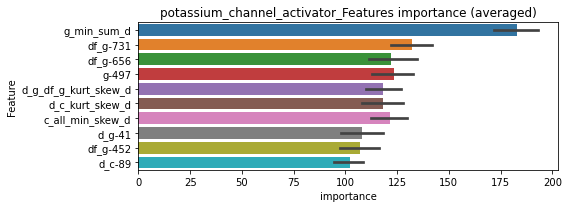

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000662903	valid_1's binary_logloss: 0.0197248


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000608859	valid_1's binary_logloss: 0.00595664
Early stopping, best iteration is:
[1404]	training's binary_logloss: 0.000507337	valid_1's binary_logloss: 0.00563089


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000602172	valid_1's binary_logloss: 0.010518
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000582508	valid_1's binary_logloss: 0.0104591


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000632984	valid_1's binary_logloss: 0.00901365


potassium_channel_activator logloss: 0.011209232543325082
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0648819	valid_1's binary_logloss: 0.122528
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0488436	valid_1's binary_logloss: 0.116835
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0651681	valid_1's binary_logloss: 0.116137
[2000]	training's binary_logloss: 0.0371158	valid_1's binary_logloss: 0.107484
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0355481	valid_1's binary_logloss: 0.107011
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0716174	valid_1's binary_logloss: 0.0878175
[2000]	training's binary_logloss: 0.0407388	valid_1's binary_logloss: 0.0743231
[3000]	training's binary_logloss: 0.0271697	valid_1's binary_logloss: 0.0698615
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.0264719	valid_1's binary_logloss: 0.06955

1 / 3, AUC score:0.980, PR-AUC:0.960
y_Threshold: 0.0523212, Threshold: 0.0786687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 220 → Positive_corect_labels: 610/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0786687, conf_0:0.05507, conf_1:0.10227
Num_p_label: 10.0, Expected: 16.4, Adj_threshold_1: 0.1086687
threshold: 0.1086687, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 610.0/3707, y_label_rate: 0.1645535
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0476191	valid_1's binary_logloss: 0.0681828
[2000]	training's binary_logloss: 0.0264275	valid_1's binary_logloss: 0.0561493
[3000]	training's binary_logloss: 0.0177526	valid_1's binary_logloss: 0.052182
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.0173165	valid_1's binary_logloss: 0.0519465
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0433999	valid_1's binary_logloss: 0.0870575
[2000]	training's binary_logloss: 0.0239663	valid_1's binary_logloss: 0.0777116
Early stopping, best iteration is:
[2007]	training's binary_logloss: 0.0238855	valid_1's binary_logloss: 0.0776112
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0470691	valid_1's binary_logloss: 0.0690209
[2000]	training's binary_logloss: 0.0261605	valid_1's binary_logloss: 0.0566786
[3000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0438380, Threshold: 0.1086687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 594.0/3675
p_label_rate: 0.0025113 Vs.target_rate: 0.00412
Num_p_label: 10.0, Expected: 16.4, Threshold: 0.1086687, conf_0:0.08693, conf_1:0.13040
threshold: 0.1086687, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 594.0/3675, y_label_rate: 0.1616327
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0388622	valid_1's binary_logloss: 0.062118
[2000]	training's binary_logloss: 0.0213391	valid_1's binary_logloss: 0.04958
[3000]	training's binary_logloss: 0.0143213	valid_1's binary_logloss: 0.0448586
Early stopping, best iteration is:
[3068]	training's binary_logloss: 0.0139863	valid_1's binary_logloss: 0.0446765
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0401827	valid_1's binary_logloss: 0.0522437
[2000]	training's binary_logloss: 0.022168	valid_1's binary_logloss: 0.0400515
[3000]	training's binary_logloss: 0.0149453	valid_1's binary_logloss: 0.0359424
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.0117622	valid_1's binary_logloss: 0.0341689
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0370594	valid_1's binary_logloss: 0.0707109
[2000]	training's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0428003, Threshold: 0.1086687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 587.0/3661
p_label_rate: 0.0022602 Vs.target_rate: 0.00412
Num_p_label: 9.0, Expected: 16.4, Threshold: 0.1086687, conf_0:0.09780, conf_1:0.11954
threshold: 0.1086687, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 587.0/3661, y_label_rate: 0.1603387


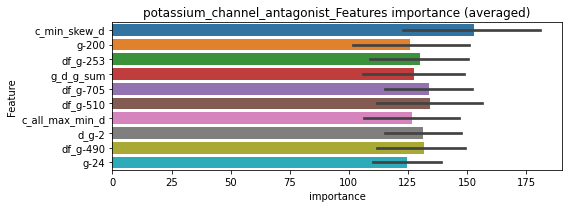

len(train_index) : 2745
len(valid_index) : 916
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0488483	valid_1's binary_logloss: 0.0625558
[2000]	training's binary_logloss: 0.0279213	valid_1's binary_logloss: 0.0454218
[3000]	training's binary_logloss: 0.0194051	valid_1's binary_logloss: 0.0395363
[4000]	training's binary_logloss: 0.014694	valid_1's binary_logloss: 0.0367418
[5000]	training's binary_logloss: 0.0117607	valid_1's binary_logloss: 0.0349795
Early stopping, best iteration is:
[4999]	training's binary_logloss: 0.0117645	valid_1's binary_logloss: 0.0349787


len(train_index) : 2746
len(valid_index) : 915
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0473435	valid_1's binary_logloss: 0.0711862
[2000]	training's binary_logloss: 0.0271281	valid_1's binary_logloss: 0.0538563
[3000]	training's binary_logloss: 0.0188717	valid_1's binary_logloss: 0.0480002
[4000]	training's binary_logloss: 0.014325	valid_1's binary_logloss: 0.0450921
Early stopping, best iteration is:
[4292]	training's binary_logloss: 0.0133492	valid_1's binary_logloss: 0.0444714


len(train_index) : 2746
len(valid_index) : 915
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0507431	valid_1's binary_logloss: 0.0564228
[2000]	training's binary_logloss: 0.0293218	valid_1's binary_logloss: 0.0387978
[3000]	training's binary_logloss: 0.0203656	valid_1's binary_logloss: 0.0327178
[4000]	training's binary_logloss: 0.0153976	valid_1's binary_logloss: 0.029717
[5000]	training's binary_logloss: 0.0123125	valid_1's binary_logloss: 0.0278906
[6000]	training's binary_logloss: 0.0102514	valid_1's binary_logloss: 0.0267383
[7000]	training's binary_logloss: 0.00875921	valid_1's binary_logloss: 0.0259047
Early stopping, best iteration is:
[7258]	training's binary_logloss: 0.00844412	valid_1's binary_logloss: 0.0256994


len(train_index) : 2746
len(valid_index) : 915
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0484195	valid_1's binary_logloss: 0.0649805
[2000]	training's binary_logloss: 0.0279892	valid_1's binary_logloss: 0.0473979
[3000]	training's binary_logloss: 0.0195699	valid_1's binary_logloss: 0.0413162
[4000]	training's binary_logloss: 0.0148156	valid_1's binary_logloss: 0.0383532
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.0139169	valid_1's binary_logloss: 0.0376969


potassium_channel_antagonist logloss: 0.03571140106199704
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0703801	valid_1's binary_logloss: 0.139612
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.046755	valid_1's binary_logloss: 0.131359
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0740624	valid_1's binary_logloss: 0.130676
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0437493	valid_1's binary_logloss: 0.118719
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0786883	valid_1's binary_logloss: 0.0992162
[2000]	training's binary_logloss: 0.0446591	valid_1's binary_logloss: 0.084046
[3000]	training's binary_logloss: 0.0296291	valid_1's binary_logloss: 0.0788964
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0273028	valid_1's binary_logloss: 0.0781228
Training until validation scores don't improve for 29 rounds
[1000]	training's

1 / 3, AUC score:0.976, PR-AUC:0.954
y_Threshold: 0.0571120, Threshold: 0.0953656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 238 → Positive_corect_labels: 602/3693
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0953656, conf_0:0.06676, conf_1:0.12398
Num_p_label: 6.0, Expected: 19.2, Adj_threshold_1: 0.1253656
threshold: 0.1253656, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 602.0/3693, y_label_rate: 0.1630111
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.04814	valid_1's binary_logloss: 0.099507
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0311793	valid_1's binary_logloss: 0.0909827
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0521078	valid_1's binary_logloss: 0.076454
[2000]	training's binary_logloss: 0.0284816	valid_1's binary_logloss: 0.0620093
[3000]	training's binary_logloss: 0.0190334	valid_1's binary_logloss: 0.0570535
Early stopping, best iteration is:
[3439]	training's binary_logloss: 0.0165457	valid_1's binary_logloss: 0.0557442
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0544007	valid_1's binary_logloss: 0.0651052
[2000]	training's binary_logloss: 0.029864	valid_1's binary_logloss: 0.0494742
[3000]	training's binary_logloss: 0.0200043	valid_1's binary_logloss: 0.0440871
[4000]	training's binary_logloss

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0595013, Threshold: 0.1253656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 579.0/3647
p_label_rate: 0.0025113 Vs.target_rate: 0.00483
Num_p_label: 10.0, Expected: 19.2, Threshold: 0.1253656, conf_0:0.10029, conf_1:0.15044
threshold: 0.1253656, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 579.0/3647, y_label_rate: 0.1587606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421766	valid_1's binary_logloss: 0.0619126
[2000]	training's binary_logloss: 0.0228959	valid_1's binary_logloss: 0.0463945
[3000]	training's binary_logloss: 0.0153949	valid_1's binary_logloss: 0.0406195
[4000]	training's binary_logloss: 0.0115269	valid_1's binary_logloss: 0.0378028
Early stopping, best iteration is:
[4338]	training's binary_logloss: 0.0106085	valid_1's binary_logloss: 0.0371201
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404384	valid_1's binary_logloss: 0.0677266
[2000]	training's binary_logloss: 0.0220534	valid_1's binary_logloss: 0.0546686
[3000]	training's binary_logloss: 0.0148458	valid_1's binary_logloss: 0.0501108
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.0136127	valid_1's binary_logloss: 0.0494025
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0443224, Threshold: 0.1253656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 568.0/3625
p_label_rate: 0.0037670 Vs.target_rate: 0.00483
Num_p_label: 15.0, Expected: 19.2, Threshold: 0.1253656, conf_0:0.11283, conf_1:0.13790
threshold: 0.1253656, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 568.0/3625, y_label_rate: 0.1566897


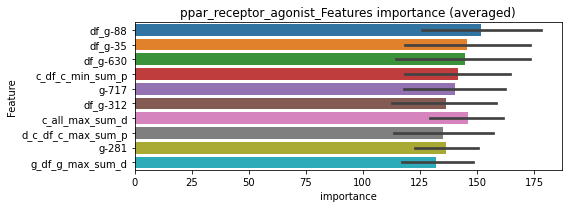

len(train_index) : 2718
len(valid_index) : 907
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0505201	valid_1's binary_logloss: 0.067393
[2000]	training's binary_logloss: 0.0279982	valid_1's binary_logloss: 0.0462219
[3000]	training's binary_logloss: 0.0193806	valid_1's binary_logloss: 0.0390446
[4000]	training's binary_logloss: 0.0147173	valid_1's binary_logloss: 0.0352826
[5000]	training's binary_logloss: 0.0118847	valid_1's binary_logloss: 0.0331676
[6000]	training's binary_logloss: 0.00991201	valid_1's binary_logloss: 0.0314028
Early stopping, best iteration is:
[6280]	training's binary_logloss: 0.00947929	valid_1's binary_logloss: 0.0310119


len(train_index) : 2719
len(valid_index) : 906
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0501502	valid_1's binary_logloss: 0.0645737
[2000]	training's binary_logloss: 0.0276479	valid_1's binary_logloss: 0.045641
[3000]	training's binary_logloss: 0.0191708	valid_1's binary_logloss: 0.0394754
[4000]	training's binary_logloss: 0.0145603	valid_1's binary_logloss: 0.0365303
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.0121345	valid_1's binary_logloss: 0.0350513


len(train_index) : 2719
len(valid_index) : 906
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0506107	valid_1's binary_logloss: 0.064288
[2000]	training's binary_logloss: 0.0281875	valid_1's binary_logloss: 0.0433785
[3000]	training's binary_logloss: 0.0194632	valid_1's binary_logloss: 0.0359864
[4000]	training's binary_logloss: 0.014765	valid_1's binary_logloss: 0.0321352
[5000]	training's binary_logloss: 0.0119427	valid_1's binary_logloss: 0.0297854
[6000]	training's binary_logloss: 0.00995064	valid_1's binary_logloss: 0.0280993
[7000]	training's binary_logloss: 0.00855135	valid_1's binary_logloss: 0.0269938
[8000]	training's binary_logloss: 0.00749113	valid_1's binary_logloss: 0.0260313
Early stopping, best iteration is:
[7984]	training's binary_logloss: 0.00750614	valid_1's binary_logloss: 0.0260249


len(train_index) : 2719
len(valid_index) : 906
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0482513	valid_1's binary_logloss: 0.0716008
[2000]	training's binary_logloss: 0.0264769	valid_1's binary_logloss: 0.0527855
[3000]	training's binary_logloss: 0.0182697	valid_1's binary_logloss: 0.0466611
[4000]	training's binary_logloss: 0.0138165	valid_1's binary_logloss: 0.0439869
Early stopping, best iteration is:
[4254]	training's binary_logloss: 0.0130182	valid_1's binary_logloss: 0.0434865


ppar_receptor_agonist logloss: 0.03389285062751825
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000366358	valid_1's binary_logloss: 0.0053949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000385224	valid_1's binary_logloss: 0.00698382
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000387371	valid_1's binary_logloss: 0.00666135
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021134, Threshold: 0.0048970, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000388687	valid_1's binary_logloss: 0.00764665


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048970, conf_0:0.00343, conf_1:0.00637
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0348970
threshold: 0.0348970, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.02792, conf_1:0.04188


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.03141, conf_1:0.03839
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


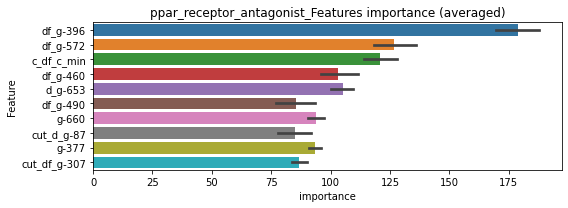

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000426326	valid_1's binary_logloss: 0.00401112
Early stopping, best iteration is:
[1279]	training's binary_logloss: 0.000378977	valid_1's binary_logloss: 0.00392797


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000422084	valid_1's binary_logloss: 0.00571338
Early stopping, best iteration is:
[1225]	training's binary_logloss: 0.000382294	valid_1's binary_logloss: 0.00555692


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000494719	valid_1's binary_logloss: 0.0051335


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000461231	valid_1's binary_logloss: 0.00645013


ppar_receptor_antagonist logloss: 0.00526745935757421
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0741264	valid_1's binary_logloss: 0.155683
Early stopping, best iteration is:
[1507]	training's binary_logloss: 0.0542649	valid_1's binary_logloss: 0.148874
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0785887	valid_1's binary_logloss: 0.128913
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.05644	valid_1's binary_logloss: 0.120383
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0797865	valid_1's binary_logloss: 0.118544
[2000]	training's binary_logloss: 0.0457386	valid_1's binary_logloss: 0.103724
Early stopping, best iteration is:
[2728]	training's binary_logloss: 0.0336424	valid_1's binary_logloss: 0.099532
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0810872	valid_1's binary_logloss: 0.117185
[2000]	training's bin

1 / 3, AUC score:0.973, PR-AUC:0.945
y_Threshold: 0.0625119, Threshold: 0.2242294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 250 → Positive_corect_labels: 594/3671
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2242294, conf_0:0.15696, conf_1:0.29150
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_1: 0.2542294
Num_p_label: 22.0, Expected: 19.9, Adj_threshold_2: 0.2842294
threshold: 0.2842294, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 594.0/3671, y_label_rate: 0.1618088
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0508812	valid_1's binary_logloss: 0.0873581
[2000]	training's binary_logloss: 0.0285583	valid_1's binary_logloss: 0.074073
[3000]	training's binary_logloss: 0.0192624	valid_1's binary_logloss: 0.069254
Early stopping, best iteration is:
[3302]	training's binary_logloss: 0.017503	valid_1's binary_logloss: 0.0684591
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0530909	valid_1's binary_logloss: 0.0770303
[2000]	training's binary_logloss: 0.0296845	valid_1's binary_logloss: 0.0629015
[3000]	training's binary_logloss: 0.0198973	valid_1's binary_logloss: 0.0576354
Early stopping, best iteration is:
[3446]	training's binary_logloss: 0.0173089	valid_1's binary_logloss: 0.0563253
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.051962	valid_1's binary_logloss: 0.083568
[2000]	training's binary_logloss

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0719706, Threshold: 0.2842294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 562.0/3607
p_label_rate: 0.0236062 Vs.target_rate: 0.00500
Num_p_label: 94.0, Expected: 19.9, Threshold: 0.2842294, conf_0:0.22738, conf_1:0.34108
Num_p_label: 83.0, Expected: 19.9, Adj_threshold_1: 0.3142294
Num_p_label: 72.0, Expected: 19.9, Adj_threshold_2: 0.3442294
Num_p_label: 64.0, Expected: 19.9, Adj_threshold_3: 0.3742294
Num_p_label: 51.0, Expected: 19.9, Adj_threshold_4: 0.4042294
Num_p_label: 41.0, Expected: 19.9, Adj_threshold_5: 0.4342294
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_6: 0.4642294
threshold: 0.4642294, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 562.0/3607, y_label_rate: 0.1558082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.035947	valid_1's binary_logloss: 0.0549902
[2000]	training's binary_logloss: 0.0196024	valid_1's binary_logloss: 0.0428274
[3000]	training's binary_logloss: 0.0132946	valid_1's binary_logloss: 0.038692
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0110637	valid_1's binary_logloss: 0.0373471
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0350613	valid_1's binary_logloss: 0.0581577
[2000]	training's binary_logloss: 0.0189998	valid_1's binary_logloss: 0.044004
Early stopping, best iteration is:
[2841]	training's binary_logloss: 0.0135351	valid_1's binary_logloss: 0.0395532
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0363239	valid_1's binary_logloss: 0.0511382
[2000]	training's binary_logloss: 0.0197443	valid_1's binary_logloss: 0.0371204
[3000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0561271, Threshold: 0.4642294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 547.0/3577
p_label_rate: 0.0208438 Vs.target_rate: 0.00500
Num_p_label: 83.0, Expected: 19.9, Threshold: 0.4642294, conf_0:0.41781, conf_1:0.51065
Num_p_label: 72.0, Expected: 19.9, Adj_threshold_1: 0.4942294
Num_p_label: 60.0, Expected: 19.9, Adj_threshold_2: 0.5242294
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_3: 0.5542294
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_4: 0.5842294
threshold: 0.5842294, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 547.0/3577, y_label_rate: 0.1529214


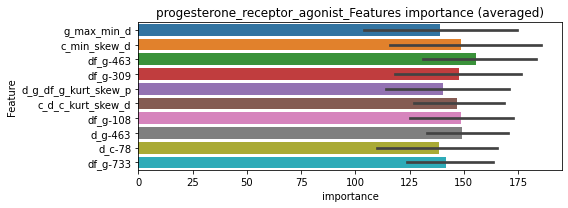

len(train_index) : 2682
len(valid_index) : 895
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0412792	valid_1's binary_logloss: 0.0545512
[2000]	training's binary_logloss: 0.0207715	valid_1's binary_logloss: 0.0334238
[3000]	training's binary_logloss: 0.0139611	valid_1's binary_logloss: 0.0264087
[4000]	training's binary_logloss: 0.0106642	valid_1's binary_logloss: 0.023258
[5000]	training's binary_logloss: 0.0086362	valid_1's binary_logloss: 0.0213423
[6000]	training's binary_logloss: 0.0072714	valid_1's binary_logloss: 0.0199606
[7000]	training's binary_logloss: 0.00628168	valid_1's binary_logloss: 0.019099
[8000]	training's binary_logloss: 0.0055205	valid_1's binary_logloss: 0.0183646
[9000]	training's binary_logloss: 0.00493508	valid_1's binary_logloss: 0.0177522
Early stopping, best iteration is:
[9320]	training's binary_logloss: 0.00476831	valid_1's binary_logloss: 0.0175927


len(train_index) : 2683
len(valid_index) : 894
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0396608	valid_1's binary_logloss: 0.0609723
[2000]	training's binary_logloss: 0.0196632	valid_1's binary_logloss: 0.040063
[3000]	training's binary_logloss: 0.0131449	valid_1's binary_logloss: 0.033399
[4000]	training's binary_logloss: 0.00999126	valid_1's binary_logloss: 0.0303265
[5000]	training's binary_logloss: 0.00806467	valid_1's binary_logloss: 0.0286025
[6000]	training's binary_logloss: 0.00679603	valid_1's binary_logloss: 0.0274129
[7000]	training's binary_logloss: 0.00588097	valid_1's binary_logloss: 0.0266983
[8000]	training's binary_logloss: 0.00517468	valid_1's binary_logloss: 0.0260743
Early stopping, best iteration is:
[8388]	training's binary_logloss: 0.00494726	valid_1's binary_logloss: 0.0258666


len(train_index) : 2683
len(valid_index) : 894
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0414666	valid_1's binary_logloss: 0.050808
[2000]	training's binary_logloss: 0.0210168	valid_1's binary_logloss: 0.0290529
[3000]	training's binary_logloss: 0.0142535	valid_1's binary_logloss: 0.0219573
[4000]	training's binary_logloss: 0.0108804	valid_1's binary_logloss: 0.0186184
[5000]	training's binary_logloss: 0.00878059	valid_1's binary_logloss: 0.0165896
[6000]	training's binary_logloss: 0.00739924	valid_1's binary_logloss: 0.0152345
[7000]	training's binary_logloss: 0.00639201	valid_1's binary_logloss: 0.0142399
[8000]	training's binary_logloss: 0.00562146	valid_1's binary_logloss: 0.013445
[9000]	training's binary_logloss: 0.00502123	valid_1's binary_logloss: 0.0128545
[10000]	training's binary_logloss: 0.00453575	valid_1's binary_logloss: 0.0123797
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00453575	valid_1's binary_logloss: 0.0123797


len(train_index) : 2683
len(valid_index) : 894
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0425041	valid_1's binary_logloss: 0.049975
[2000]	training's binary_logloss: 0.0217032	valid_1's binary_logloss: 0.0276595
[3000]	training's binary_logloss: 0.014746	valid_1's binary_logloss: 0.0202018
[4000]	training's binary_logloss: 0.0112783	valid_1's binary_logloss: 0.0166025
[5000]	training's binary_logloss: 0.00911528	valid_1's binary_logloss: 0.0144045
[6000]	training's binary_logloss: 0.00767796	valid_1's binary_logloss: 0.0128975
[7000]	training's binary_logloss: 0.00662978	valid_1's binary_logloss: 0.0118052
[8000]	training's binary_logloss: 0.00582475	valid_1's binary_logloss: 0.0109262
[9000]	training's binary_logloss: 0.00519981	valid_1's binary_logloss: 0.0102405
[10000]	training's binary_logloss: 0.00470103	valid_1's binary_logloss: 0.00968895
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00470103	valid_1's binary_logloss: 0.00968895


progesterone_receptor_agonist logloss: 0.01638232401389133
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000277713	valid_1's binary_logloss: 0.000907973
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000279951	valid_1's binary_logloss: 0.00204665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00028484	valid_1's binary_logloss: 0.000812225
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016934, Threshold: 0.0095456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0095456, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0395456


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000282549	valid_1's binary_logloss: 0.0023644


threshold: 0.0395456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.0395456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0395456, conf_0:0.03164, conf_1:0.04745
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0695456
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0995456
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1295456
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1595456


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.1595456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1595456, conf_0:0.14359, conf_1:0.17550
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


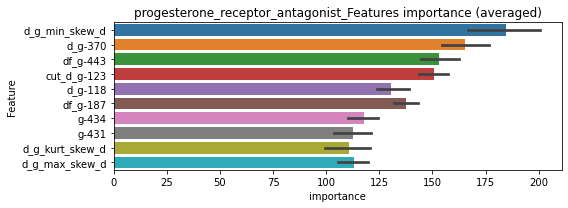

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000287698	valid_1's binary_logloss: 0.000726792
Early stopping, best iteration is:
[1238]	training's binary_logloss: 0.000267795	valid_1's binary_logloss: 0.000689753


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000283768	valid_1's binary_logloss: 0.0011433
Early stopping, best iteration is:
[1209]	training's binary_logloss: 0.000266919	valid_1's binary_logloss: 0.00109862


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000288286	valid_1's binary_logloss: 0.000550674
Early stopping, best iteration is:
[1209]	training's binary_logloss: 0.000271601	valid_1's binary_logloss: 0.00052376


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00028528	valid_1's binary_logloss: 0.00170832
Early stopping, best iteration is:
[1167]	training's binary_logloss: 0.000270005	valid_1's binary_logloss: 0.00167304


progesterone_receptor_antagonist logloss: 0.000996115858346675
prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000409494	valid_1's binary_logloss: 0.00539462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420728	valid_1's binary_logloss: 0.0141561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00118925	valid_1's binary_logloss: 0.0214538
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000398748	valid_1's binary_logloss: 0.00375294


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0032271, Threshold: 0.0146420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0146420, conf_0:0.01025, conf_1:0.01903
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0446420
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0746420
threshold: 0.0746420, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000803904	valid_1's binary_logloss: 0.0143284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00176678
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000403523	valid_1's binary_logloss: 0.00211551
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0260777, Threshold: 0.0746420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000408588	valid_1's binary_logloss: 0.00739352


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0746420, conf_0:0.05971, conf_1:0.08957
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1046420
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.1346420
threshold: 0.1346420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000467034	valid_1's binary_logloss: 0.00481321
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00041	valid_1's binary_logloss: 0.0038407
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000761023	valid_1's binary_logloss: 0.0187836
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185647, Threshold: 0.1346420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000432244	valid_1's binary_logloss: 0.00952587


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, Expected: 6.0, Threshold: 0.1346420, conf_0:0.12118, conf_1:0.14811
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1646420
threshold: 0.1646420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


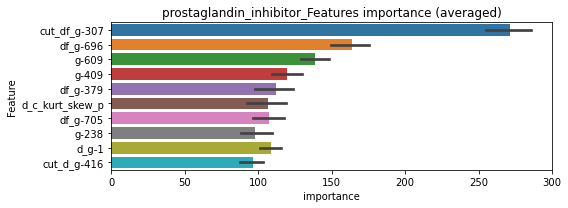

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000453796	valid_1's binary_logloss: 0.00438438
Early stopping, best iteration is:
[1177]	training's binary_logloss: 0.000415673	valid_1's binary_logloss: 0.00428648


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000455805	valid_1's binary_logloss: 0.00447112
Early stopping, best iteration is:
[1324]	training's binary_logloss: 0.000401781	valid_1's binary_logloss: 0.00428919


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000953113	valid_1's binary_logloss: 0.0144523
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000460823	valid_1's binary_logloss: 0.00300324
Early stopping, best iteration is:
[1255]	training's binary_logloss: 0.000413072	valid_1's binary_logloss: 0.00283757


prostaglandin_inhibitor logloss: 0.006466074139658745
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00136171	valid_1's binary_logloss: 0.0520613
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0010062	valid_1's binary_logloss: 0.0395992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000765255	valid_1's binary_logloss: 0.0323504
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000885718	valid_1's binary_logloss: 0.0317803


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0077072, Threshold: 0.0354928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0354928, conf_0:0.02484, conf_1:0.04614
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_1: 0.0654928
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0954928
threshold: 0.0954928, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000898656	valid_1's binary_logloss: 0.044534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000717253	valid_1's binary_logloss: 0.0290786
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00131727	valid_1's binary_logloss: 0.043775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00127809	valid_1's binary_logloss: 0.0226384


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0293022, Threshold: 0.0954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0150678 Vs.target_rate: 0.00353
Num_p_label: 60.0, Expected: 14.0, Threshold: 0.0954928, conf_0:0.07639, conf_1:0.11459
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_1: 0.1254928
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_2: 0.1554928
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1854928
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2154928
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_5: 0.2454928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_6: 0.2754928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3054928
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_8: 0.3354928
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_9: 0.3654928
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3954928
threshold: 0.3954928, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00078403	valid_1's binary_logloss: 0.0349538
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00124099	valid_1's binary_logloss: 0.0348159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000637854	valid_1's binary_logloss: 0.0204702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000722974	valid_1's binary_logloss: 0.0258839


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0242031, Threshold: 0.3954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0085384 Vs.target_rate: 0.00353
Num_p_label: 34.0, Expected: 14.0, Threshold: 0.3954928, conf_0:0.35594, conf_1:0.43504
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_1: 0.4254928
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.4554928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_3: 0.4854928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_4: 0.5154928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_5: 0.5454928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_6: 0.5754928
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_7: 0.6054928
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_8: 0.6354928
threshold: 0.6354928, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


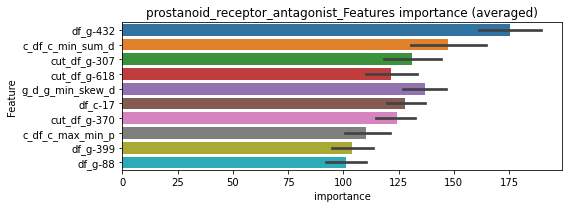

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00119251	valid_1's binary_logloss: 0.0296266


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00101268	valid_1's binary_logloss: 0.0178628


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00091264	valid_1's binary_logloss: 0.0240667


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000968454	valid_1's binary_logloss: 0.0227311


prostanoid_receptor_antagonist logloss: 0.023573390812019566


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0945192	valid_1's binary_logloss: 0.225332
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.0759715	valid_1's binary_logloss: 0.220823
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0934854	valid_1's binary_logloss: 0.226769
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.0722668	valid_1's binary_logloss: 0.222519
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0951464	valid_1's binary_logloss: 0.218444
Early stopping, best iteration is:
[1294]	training's binary_logloss: 0.0754025	valid_1's binary_logloss: 0.215107
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0947736	valid_1's binary_logloss: 0.221669
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.0864255	valid_1's binary_lo

1 / 3, AUC score:0.888, PR-AUC:0.827
y_Threshold: 0.1123230, Threshold: 0.1864876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1352 → Positive_corect_labels: 1574/10922
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1864876, conf_0:0.13054, conf_1:0.24243
threshold: 0.1864876, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1574.0/10922, y_label_rate: 0.1441128
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0465351	valid_1's binary_logloss: 0.113328
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0242864	valid_1's binary_logloss: 0.103481
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0472257	valid_1's binary_logloss: 0.109115
[2000]	training's binary_logloss: 0.023609	valid_1's binary_logloss: 0.0974476
Early stopping, best iteration is:
[2370]	training's binary_logloss: 0.0196325	valid_1's binary_logloss: 0.0953108
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0477849	valid_1's binary_logloss: 0.108096
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0271948	valid_1's binary_logloss: 0.0975799
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0496678	valid_1's binary_logloss: 0.0954379
[2000]	training'

2 / 3, AUC score:0.990, PR-AUC:0.970
y_Threshold: 0.0840058, Threshold: 0.1864876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 256 → Positive_corect_labels: 1446.0/10666
p_label_rate: 0.0085384 Vs.target_rate: 0.03049
Num_p_label: 34.0, Expected: 121.4, Threshold: 0.1864876, conf_0:0.14919, conf_1:0.22379
threshold: 0.1864876, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1446.0/10666, y_label_rate: 0.1355710
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0350552	valid_1's binary_logloss: 0.0735077
[2000]	training's binary_logloss: 0.0173864	valid_1's binary_logloss: 0.0609795
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0133966	valid_1's binary_logloss: 0.0577236
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357238	valid_1's binary_logloss: 0.0712208
[2000]	training's binary_logloss: 0.0177639	valid_1's binary_logloss: 0.0586804
[3000]	training's binary_logloss: 0.01147	valid_1's binary_logloss: 0.053961
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.0114599	valid_1's binary_logloss: 0.0539532
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357645	valid_1's binary_logloss: 0.0726917
[2000]	training's binary_logloss: 0.0177809	valid_1's binary_logloss: 0.0587621
[3000]	training's binary_loglo

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0752220, Threshold: 0.1864876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1396.0/10566
p_label_rate: 0.0107986 Vs.target_rate: 0.03049
Num_p_label: 43.0, Expected: 121.4, Threshold: 0.1864876, conf_0:0.16784, conf_1:0.20514
threshold: 0.1864876, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1396.0/10566, y_label_rate: 0.1321219


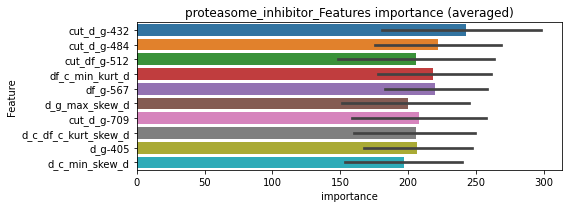

len(train_index) : 7924
len(valid_index) : 2642
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0422271	valid_1's binary_logloss: 0.0756925
[2000]	training's binary_logloss: 0.0212786	valid_1's binary_logloss: 0.0569009
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.0142852	valid_1's binary_logloss: 0.05089


len(train_index) : 7924
len(valid_index) : 2642
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0427203	valid_1's binary_logloss: 0.0750695
[2000]	training's binary_logloss: 0.0217697	valid_1's binary_logloss: 0.0562919
[3000]	training's binary_logloss: 0.0143146	valid_1's binary_logloss: 0.049966
[4000]	training's binary_logloss: 0.01049	valid_1's binary_logloss: 0.0465719
Early stopping, best iteration is:
[4392]	training's binary_logloss: 0.0095369	valid_1's binary_logloss: 0.0457567


len(train_index) : 7925
len(valid_index) : 2641
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0438376	valid_1's binary_logloss: 0.070146
[2000]	training's binary_logloss: 0.0221887	valid_1's binary_logloss: 0.0490198
[3000]	training's binary_logloss: 0.0146036	valid_1's binary_logloss: 0.0413843
[4000]	training's binary_logloss: 0.010752	valid_1's binary_logloss: 0.0373342
[5000]	training's binary_logloss: 0.00856055	valid_1's binary_logloss: 0.0350138
[6000]	training's binary_logloss: 0.00709428	valid_1's binary_logloss: 0.0332803
Early stopping, best iteration is:
[6013]	training's binary_logloss: 0.00707759	valid_1's binary_logloss: 0.0332601


len(train_index) : 7925
len(valid_index) : 2641
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0432941	valid_1's binary_logloss: 0.0687948
[2000]	training's binary_logloss: 0.0217318	valid_1's binary_logloss: 0.0503531
[3000]	training's binary_logloss: 0.0143124	valid_1's binary_logloss: 0.0439308
[4000]	training's binary_logloss: 0.0105176	valid_1's binary_logloss: 0.0404617
Early stopping, best iteration is:
[4434]	training's binary_logloss: 0.00947908	valid_1's binary_logloss: 0.0395403


proteasome_inhibitor logloss: 0.042362922290715845
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491676	valid_1's binary_logloss: 0.0174223
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050961	valid_1's binary_logloss: 0.0117172
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000523487	valid_1's binary_logloss: 0.00583239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00058109	valid_1's binary_logloss: 0.0154698


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039932, Threshold: 0.0096547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0096547, conf_0:0.00676, conf_1:0.01255
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0396547
threshold: 0.0396547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.0151766
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052394	valid_1's binary_logloss: 0.0102765
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000494301	valid_1's binary_logloss: 0.00459526
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162039, Threshold: 0.0396547, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000666029	valid_1's binary_logloss: 0.01562


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03172, conf_1:0.04759
threshold: 0.0396547, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000513262	valid_1's binary_logloss: 0.0142952
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00049938	valid_1's binary_logloss: 0.00446279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000488633	valid_1's binary_logloss: 0.00284595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000509717	valid_1's binary_logloss: 0.0103807


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390119, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03569, conf_1:0.04362
threshold: 0.0396547, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


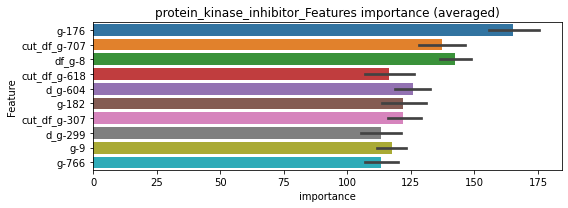

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000567833	valid_1's binary_logloss: 0.01246
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000533044	valid_1's binary_logloss: 0.012338


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00058495	valid_1's binary_logloss: 0.00495842
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000551342	valid_1's binary_logloss: 0.00485795


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000584673	valid_1's binary_logloss: 0.00326464
Early stopping, best iteration is:
[1330]	training's binary_logloss: 0.00049893	valid_1's binary_logloss: 0.00304613


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000575455	valid_1's binary_logloss: 0.0110694
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000534858	valid_1's binary_logloss: 0.01091


protein_kinase_inhibitor logloss: 0.007789876229977939
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033932	valid_1's binary_logloss: 0.00348367
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000327376	valid_1's binary_logloss: 0.00299297
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000327845	valid_1's binary_logloss: 0.000816911
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0051329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051329, conf_0:0.00359, conf_1:0.00667
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0351329


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340892	valid_1's binary_logloss: 0.00255995


threshold: 0.0351329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000330331	valid_1's binary_logloss: 0.00273311
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0350095, Threshold: 0.0351329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0351329, conf_0:0.02811, conf_1:0.04216
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0651329


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000330331	valid_1's binary_logloss: 0.00273311
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0350095, Threshold: 0.0651329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0651329, conf_0:0.05862, conf_1:0.07165


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


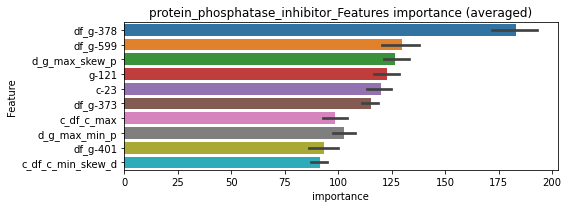

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000363115	valid_1's binary_logloss: 0.00337271
Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.00033398	valid_1's binary_logloss: 0.00329543


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000358486	valid_1's binary_logloss: 0.00235451
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.000325031	valid_1's binary_logloss: 0.00227334


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000365925	valid_1's binary_logloss: 0.000964759
Early stopping, best iteration is:
[1337]	training's binary_logloss: 0.000327154	valid_1's binary_logloss: 0.000912989


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000365818	valid_1's binary_logloss: 0.00269295
Early stopping, best iteration is:
[1183]	training's binary_logloss: 0.000338282	valid_1's binary_logloss: 0.00259641


protein_phosphatase_inhibitor logloss: 0.002271041309259126
protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.065388	valid_1's binary_logloss: 0.130744
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.0420147	valid_1's binary_logloss: 0.122468
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.068253	valid_1's binary_logloss: 0.117789
Early stopping, best iteration is:
[1674]	training's binary_logloss: 0.0455033	valid_1's binary_logloss: 0.107444
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0718768	valid_1's binary_logloss: 0.0939953
[2000]	training's binary_logloss: 0.0410031	valid_1's binary_logloss: 0.0805434
[3000]	training's binary_logloss: 0.0273856	valid_1's binary_logloss: 0.075518
Early stopping, best iteration is:
[2995]	training's binary_logloss: 0.0274378	valid_1's binary_logloss: 0.0754859
Training until validation scores don't improve for 29 rounds
[1000]	training's 

1 / 3, AUC score:0.981, PR-AUC:0.961
y_Threshold: 0.0538667, Threshold: 0.1053106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 224 → Positive_corect_labels: 608/3703
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1053106, conf_0:0.07372, conf_1:0.13690
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_1: 0.1353106
Num_p_label: 20.0, Expected: 17.2, Adj_threshold_2: 0.1653106
threshold: 0.1653106, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 608.0/3703, y_label_rate: 0.1641912
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.045703	valid_1's binary_logloss: 0.0858211
[2000]	training's binary_logloss: 0.0251299	valid_1's binary_logloss: 0.0740521
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0238617	valid_1's binary_logloss: 0.0734033
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0465815	valid_1's binary_logloss: 0.0818665
[2000]	training's binary_logloss: 0.0256235	valid_1's binary_logloss: 0.0694594
[3000]	training's binary_logloss: 0.017085	valid_1's binary_logloss: 0.0655017
Early stopping, best iteration is:
[3021]	training's binary_logloss: 0.0169607	valid_1's binary_logloss: 0.0654506
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0507354	valid_1's binary_logloss: 0.0645406
[2000]	training's binary_logloss: 0.0276935	valid_1's binary_logloss: 0.0501266
[3000]	training's binary_logl

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0503870, Threshold: 0.1653106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 589.0/3665
p_label_rate: 0.0062783 Vs.target_rate: 0.00433
Num_p_label: 25.0, Expected: 17.2, Threshold: 0.1653106, conf_0:0.13225, conf_1:0.19837
threshold: 0.1653106, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 589.0/3665, y_label_rate: 0.1607094
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0398491	valid_1's binary_logloss: 0.0548238
[2000]	training's binary_logloss: 0.0216118	valid_1's binary_logloss: 0.0418145
[3000]	training's binary_logloss: 0.0145857	valid_1's binary_logloss: 0.0370847
[4000]	training's binary_logloss: 0.0109056	valid_1's binary_logloss: 0.0348273
Early stopping, best iteration is:
[4228]	training's binary_logloss: 0.0103047	valid_1's binary_logloss: 0.0343781
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0360842	valid_1's binary_logloss: 0.073964
[2000]	training's binary_logloss: 0.0197545	valid_1's binary_logloss: 0.0632549
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0188394	valid_1's binary_logloss: 0.0625511
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0418875	valid_1's binary_logloss: 0.0527294
[2000]	training's binary_log

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0420097, Threshold: 0.1653106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 583.0/3653
p_label_rate: 0.0065294 Vs.target_rate: 0.00433
Num_p_label: 26.0, Expected: 17.2, Threshold: 0.1653106, conf_0:0.14878, conf_1:0.18184
Num_p_label: 22.0, Expected: 17.2, Adj_threshold_1: 0.1953106
threshold: 0.1953106, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 583.0/3653, y_label_rate: 0.1595949


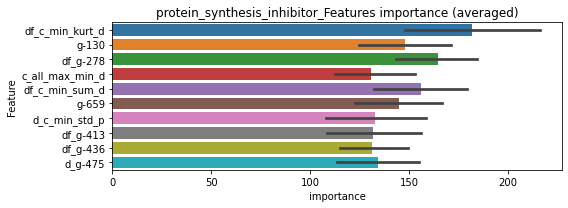

len(train_index) : 2739
len(valid_index) : 914
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0491087	valid_1's binary_logloss: 0.0679646
[2000]	training's binary_logloss: 0.0280256	valid_1's binary_logloss: 0.0498719
[3000]	training's binary_logloss: 0.0194071	valid_1's binary_logloss: 0.0436899
[4000]	training's binary_logloss: 0.0146612	valid_1's binary_logloss: 0.0405029
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.0121846	valid_1's binary_logloss: 0.0389838


len(train_index) : 2740
len(valid_index) : 913
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0501362	valid_1's binary_logloss: 0.0658247
[2000]	training's binary_logloss: 0.028689	valid_1's binary_logloss: 0.0472593
[3000]	training's binary_logloss: 0.0198079	valid_1's binary_logloss: 0.0408426
[4000]	training's binary_logloss: 0.0149452	valid_1's binary_logloss: 0.0375446
Early stopping, best iteration is:
[4609]	training's binary_logloss: 0.0129818	valid_1's binary_logloss: 0.0362226


len(train_index) : 2740
len(valid_index) : 913
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0485265	valid_1's binary_logloss: 0.0710143
[2000]	training's binary_logloss: 0.0275455	valid_1's binary_logloss: 0.0538122
[3000]	training's binary_logloss: 0.0190228	valid_1's binary_logloss: 0.0479166
[4000]	training's binary_logloss: 0.0143759	valid_1's binary_logloss: 0.0450685
Early stopping, best iteration is:
[4439]	training's binary_logloss: 0.0129854	valid_1's binary_logloss: 0.0442933


len(train_index) : 2740
len(valid_index) : 913
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0504084	valid_1's binary_logloss: 0.0592656
[2000]	training's binary_logloss: 0.0289554	valid_1's binary_logloss: 0.0412366
[3000]	training's binary_logloss: 0.0200581	valid_1's binary_logloss: 0.0345622
[4000]	training's binary_logloss: 0.0151908	valid_1's binary_logloss: 0.0311716
[5000]	training's binary_logloss: 0.0121661	valid_1's binary_logloss: 0.0291141
[6000]	training's binary_logloss: 0.01014	valid_1's binary_logloss: 0.0278048
[7000]	training's binary_logloss: 0.0086783	valid_1's binary_logloss: 0.0268594
Early stopping, best iteration is:
[7265]	training's binary_logloss: 0.0083583	valid_1's binary_logloss: 0.0266514


protein_synthesis_inhibitor logloss: 0.03653844200505049
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000319232	valid_1's binary_logloss: 0.00183819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000311157	valid_1's binary_logloss: 0.00410234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000306367	valid_1's binary_logloss: 0.000725335
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014579, Threshold: 0.0050326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050326, conf_0:0.00352, conf_1:0.00654
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350326


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.000916248


threshold: 0.0350326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.02803, conf_1:0.04204


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.03153, conf_1:0.03854


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


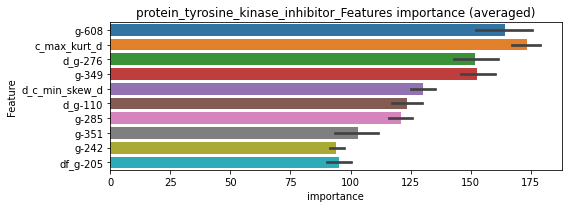

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000334023	valid_1's binary_logloss: 0.00223053
Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.000300868	valid_1's binary_logloss: 0.00217223


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000334352	valid_1's binary_logloss: 0.00333787
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000322873	valid_1's binary_logloss: 0.00330733


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000336709	valid_1's binary_logloss: 0.00062769
Early stopping, best iteration is:
[1408]	training's binary_logloss: 0.000301238	valid_1's binary_logloss: 0.000568319


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000332468	valid_1's binary_logloss: 0.000704348
Early stopping, best iteration is:
[1380]	training's binary_logloss: 0.000298545	valid_1's binary_logloss: 0.000648629


protein_tyrosine_kinase_inhibitor logloss: 0.0016744639869501396
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000579168	valid_1's binary_logloss: 0.0221115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000556911	valid_1's binary_logloss: 0.0083508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000557115	valid_1's binary_logloss: 0.00396741
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000551139	valid_1's binary_logloss: 0.0131059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050874, Threshold: 0.0126784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0126784, conf_0:0.00887, conf_1:0.01648
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0426784
threshold: 0.0426784, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000564801	valid_1's binary_logloss: 0.021631
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000565573	valid_1's binary_logloss: 0.00735881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00056168	valid_1's binary_logloss: 0.00366455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00054118	valid_1's binary_logloss: 0.0117699


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258194, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03414, conf_1:0.05121
threshold: 0.0426784, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0011398	valid_1's binary_logloss: 0.0263916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000574396	valid_1's binary_logloss: 0.00972992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000618206	valid_1's binary_logloss: 0.0154786
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00055656	valid_1's binary_logloss: 0.00887168


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280362, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03841, conf_1:0.04695
threshold: 0.0426784, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


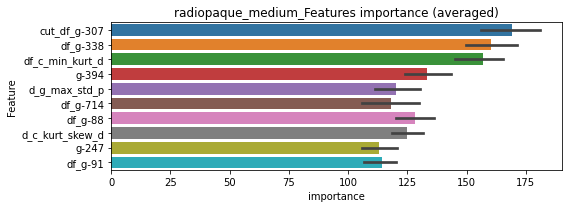

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000880296	valid_1's binary_logloss: 0.0130167


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000649981	valid_1's binary_logloss: 0.0115712
Early stopping, best iteration is:
[1253]	training's binary_logloss: 0.000559049	valid_1's binary_logloss: 0.0110607


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000665249	valid_1's binary_logloss: 0.00626034
Early stopping, best iteration is:
[1393]	training's binary_logloss: 0.000547482	valid_1's binary_logloss: 0.00593823


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000855826	valid_1's binary_logloss: 0.0168664


radiopaque_medium logloss: 0.011720909985649345
raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0843228	valid_1's binary_logloss: 0.219694
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0552442	valid_1's binary_logloss: 0.213414
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0825158	valid_1's binary_logloss: 0.223468
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.0701523	valid_1's binary_logloss: 0.219792
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0873653	valid_1's binary_logloss: 0.20158
Early stopping, best iteration is:
[1470]	training's binary_logloss: 0.061309	valid_1's binary_logloss: 0.19264
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0861474	valid_1's binary_logloss: 0.193363
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.057655	valid_1's binary_loglos

1 / 3, AUC score:0.916, PR-AUC:0.862
y_Threshold: 0.1053672, Threshold: 0.3534038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 375 → Positive_corect_labels: 529/3534
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.3534038, conf_0:0.24738, conf_1:0.45942
threshold: 0.3534038, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 529.0/3534, y_label_rate: 0.1496887
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0503782	valid_1's binary_logloss: 0.129944
Early stopping, best iteration is:
[1207]	training's binary_logloss: 0.0421476	valid_1's binary_logloss: 0.124664
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0528712	valid_1's binary_logloss: 0.110662
[2000]	training's binary_logloss: 0.0270618	valid_1's binary_logloss: 0.0944708
Early stopping, best iteration is:
[2686]	training's binary_logloss: 0.0200897	valid_1's binary_logloss: 0.0900459
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0547104	valid_1's binary_logloss: 0.096393
[2000]	training's binary_logloss: 0.0281662	valid_1's binary_logloss: 0.0769821
[3000]	training's binary_logloss: 0.0186372	valid_1's binary_logloss: 0.0704003
Early stopping, best iteration is:
[3613]	training's binary_logloss: 0.0154128	valid_1's binary_logloss: 0.0682

2 / 3, AUC score:0.994, PR-AUC:0.979
y_Threshold: 0.1094983, Threshold: 0.3534038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 486.0/3448
p_label_rate: 0.0394274 Vs.target_rate: 0.00936
Num_p_label: 157.0, Expected: 37.3, Threshold: 0.3534038, conf_0:0.28272, conf_1:0.42408
Num_p_label: 149.0, Expected: 37.3, Adj_threshold_1: 0.3834038
Num_p_label: 138.0, Expected: 37.3, Adj_threshold_2: 0.4134038
Num_p_label: 132.0, Expected: 37.3, Adj_threshold_3: 0.4434038
Num_p_label: 124.0, Expected: 37.3, Adj_threshold_4: 0.4734038
Num_p_label: 118.0, Expected: 37.3, Adj_threshold_5: 0.5034038
Num_p_label: 107.0, Expected: 37.3, Adj_threshold_6: 0.5334038
Num_p_label: 96.0, Expected: 37.3, Adj_threshold_7: 0.5634038
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_8: 0.5934038
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_9: 0.6234038
Num_p_label: 59.0, Expected: 37.3, Adj_threshold_10: 0.6534038
threshold: 0.6534038, positive_p_label: 59.0/3982, p_label_rate: 0.01

Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0407095	valid_1's binary_logloss: 0.0864985
[2000]	training's binary_logloss: 0.020544	valid_1's binary_logloss: 0.0706607
[3000]	training's binary_logloss: 0.0135897	valid_1's binary_logloss: 0.0651637
Early stopping, best iteration is:
[3238]	training's binary_logloss: 0.0125659	valid_1's binary_logloss: 0.0643342
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0415019	valid_1's binary_logloss: 0.0762139
[2000]	training's binary_logloss: 0.0208955	valid_1's binary_logloss: 0.0595452
[3000]	training's binary_logloss: 0.0138676	valid_1's binary_logloss: 0.0537351
[4000]	training's binary_logloss: 0.0103652	valid_1's binary_logloss: 0.0507527
Early stopping, best iteration is:
[4063]	training's binary_logloss: 0.0102	valid_1's binary_logloss: 0.0505362
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_loglos

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0785273, Threshold: 0.6534038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 465.0/3406
p_label_rate: 0.0351582 Vs.target_rate: 0.00936
Num_p_label: 140.0, Expected: 37.3, Threshold: 0.6534038, conf_0:0.58806, conf_1:0.71874
Num_p_label: 131.0, Expected: 37.3, Adj_threshold_1: 0.6834038
Num_p_label: 117.0, Expected: 37.3, Adj_threshold_2: 0.7134038
Num_p_label: 109.0, Expected: 37.3, Adj_threshold_3: 0.7434038
Num_p_label: 104.0, Expected: 37.3, Adj_threshold_4: 0.7734038
Num_p_label: 91.0, Expected: 37.3, Adj_threshold_5: 0.8034038
Num_p_label: 73.0, Expected: 37.3, Adj_threshold_6: 0.8334038
Num_p_label: 44.0, Expected: 37.3, Adj_threshold_7: 0.8634038
threshold: 0.8634038, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 465.0/3406, y_label_rate: 0.1365238


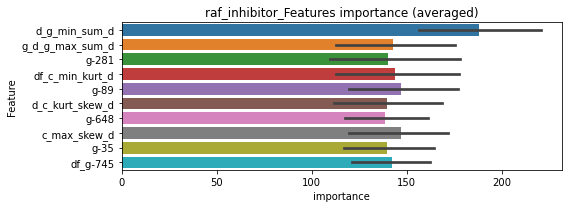

len(train_index) : 2554
len(valid_index) : 852
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471682	valid_1's binary_logloss: 0.090595
[2000]	training's binary_logloss: 0.0241734	valid_1's binary_logloss: 0.0665218
[3000]	training's binary_logloss: 0.0161563	valid_1's binary_logloss: 0.0577971
[4000]	training's binary_logloss: 0.0120794	valid_1's binary_logloss: 0.0534342
Early stopping, best iteration is:
[4271]	training's binary_logloss: 0.0113021	valid_1's binary_logloss: 0.0525978


len(train_index) : 2554
len(valid_index) : 852
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0515633	valid_1's binary_logloss: 0.0690094
[2000]	training's binary_logloss: 0.0265592	valid_1's binary_logloss: 0.0449848
[3000]	training's binary_logloss: 0.0178409	valid_1's binary_logloss: 0.0364543
[4000]	training's binary_logloss: 0.013414	valid_1's binary_logloss: 0.0319941
[5000]	training's binary_logloss: 0.0107109	valid_1's binary_logloss: 0.0291896
[6000]	training's binary_logloss: 0.00891648	valid_1's binary_logloss: 0.0271044
[7000]	training's binary_logloss: 0.00764804	valid_1's binary_logloss: 0.0256027
[8000]	training's binary_logloss: 0.0066966	valid_1's binary_logloss: 0.0244532
Early stopping, best iteration is:
[8837]	training's binary_logloss: 0.00608148	valid_1's binary_logloss: 0.0236562


len(train_index) : 2555
len(valid_index) : 851
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0491885	valid_1's binary_logloss: 0.0809947
[2000]	training's binary_logloss: 0.0252375	valid_1's binary_logloss: 0.0588416
[3000]	training's binary_logloss: 0.0168929	valid_1's binary_logloss: 0.0511521
[4000]	training's binary_logloss: 0.0126733	valid_1's binary_logloss: 0.047278
[5000]	training's binary_logloss: 0.0101218	valid_1's binary_logloss: 0.044819
Early stopping, best iteration is:
[5191]	training's binary_logloss: 0.00975011	valid_1's binary_logloss: 0.0443887


len(train_index) : 2555
len(valid_index) : 851
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0492831	valid_1's binary_logloss: 0.078369
[2000]	training's binary_logloss: 0.025136	valid_1's binary_logloss: 0.0555224
[3000]	training's binary_logloss: 0.0167962	valid_1's binary_logloss: 0.0477913
[4000]	training's binary_logloss: 0.0125833	valid_1's binary_logloss: 0.043964
Early stopping, best iteration is:
[4661]	training's binary_logloss: 0.0107992	valid_1's binary_logloss: 0.0423533


raf_inhibitor logloss: 0.04074745196779613
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000241248	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000247485	valid_1's binary_logloss: 0.000999958
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000235575	valid_1's binary_logloss: 0.00113212
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009881, Threshold: 0.0110296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110296, conf_0:0.00772, conf_1:0.01434
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0410296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0710296
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1010296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1310296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1610296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1910296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2210296
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2510296


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000244599	valid_1's binary_logloss: 0.00128497


threshold: 0.2510296, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.2510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2510296, conf_0:0.20082, conf_1:0.30124
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2810296
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3110296
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3410296
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3710296
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4010296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4310296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.4610296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.4910296
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.5210296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5510296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.5510296, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.5510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.5510296, conf_0:0.49593, conf_1:0.60613
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5810296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6110296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6410296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6710296
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7010296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.7010296, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


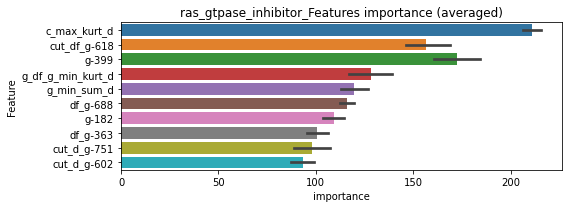

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000237673	valid_1's binary_logloss: 0.00103661
Early stopping, best iteration is:
[1327]	training's binary_logloss: 0.00022192	valid_1's binary_logloss: 0.00100786


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000236801	valid_1's binary_logloss: 0.000623047
Early stopping, best iteration is:
[1172]	training's binary_logloss: 0.000225921	valid_1's binary_logloss: 0.000608381


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000235798	valid_1's binary_logloss: 0.00038531
Early stopping, best iteration is:
[1205]	training's binary_logloss: 0.000224271	valid_1's binary_logloss: 0.000368309


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000236584	valid_1's binary_logloss: 0.001065
Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.00022693	valid_1's binary_logloss: 0.00104332


ras_gtpase_inhibitor logloss: 0.0007570353935253417
retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000600013	valid_1's binary_logloss: 0.0199899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000591521	valid_1's binary_logloss: 0.0124193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00120843	valid_1's binary_logloss: 0.0268694
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00070928	valid_1's binary_logloss: 0.019116


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0079338, Threshold: 0.1120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1120765, conf_0:0.07845, conf_1:0.14570
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.1420765
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1720765
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_3: 0.2020765
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.2320765
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2620765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2920765
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_7: 0.3220765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_8: 0.3520765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.3820765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.4120765
threshold: 0.4120765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000568118	valid_1's binary_logloss: 0.012655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00056491	valid_1's binary_logloss: 0.0124414
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000819545	valid_1's binary_logloss: 0.022134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000613118	valid_1's binary_logloss: 0.0154896


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0573141, Threshold: 0.4120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00281
Num_p_label: 27.0, Expected: 11.2, Threshold: 0.4120765, conf_0:0.32966, conf_1:0.49449
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4420765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4720765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_3: 0.5020765
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5320765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5620765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5920765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6220765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6520765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6820765
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
===========

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000578602	valid_1's binary_logloss: 0.0150932
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000560712	valid_1's binary_logloss: 0.00858464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000558078	valid_1's binary_logloss: 0.00988236
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000588664	valid_1's binary_logloss: 0.0205978


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509075, Threshold: 0.6820765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6820765, conf_0:0.61387, conf_1:0.75028
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


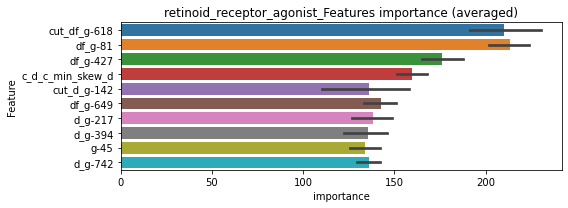

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00119114	valid_1's binary_logloss: 0.0163256


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000705603	valid_1's binary_logloss: 0.0118619
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000701343	valid_1's binary_logloss: 0.0118336


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000704264	valid_1's binary_logloss: 0.0142947
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000676477	valid_1's binary_logloss: 0.01422


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00069748	valid_1's binary_logloss: 0.0133857
Early stopping, best iteration is:
[1359]	training's binary_logloss: 0.000566405	valid_1's binary_logloss: 0.0127315


retinoid_receptor_agonist logloss: 0.013777835143164708
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000158996	valid_1's binary_logloss: 0.0002558
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.00118872
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000157251	valid_1's binary_logloss: 0.00019166
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004254, Threshold: 0.0018458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018458, conf_0:0.00129, conf_1:0.00240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318458
threshold: 0.0318458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157616	valid_1's binary_logloss: 0.00019353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0318458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, Expected: 1.0, Threshold: 0.0318458, conf_0:0.02548, conf_1:0.03821
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0618458
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0918458
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0918458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0918458, conf_0:0.08266, conf_1:0.10103


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


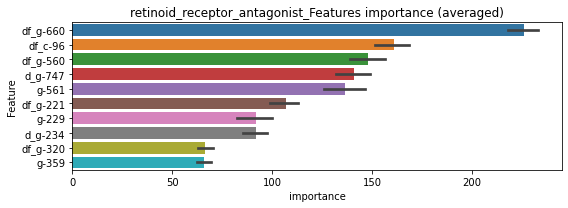

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168386	valid_1's binary_logloss: 0.000222771
Early stopping, best iteration is:
[1713]	training's binary_logloss: 0.000148143	valid_1's binary_logloss: 0.000199108


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167642	valid_1's binary_logloss: 0.000428383
Early stopping, best iteration is:
[1657]	training's binary_logloss: 0.000147914	valid_1's binary_logloss: 0.000397067


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000168233	valid_1's binary_logloss: 0.000187421
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.00014772	valid_1's binary_logloss: 0.000165055


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000166904	valid_1's binary_logloss: 0.000221648
Early stopping, best iteration is:
[1727]	training's binary_logloss: 0.000147218	valid_1's binary_logloss: 0.000196566


retinoid_receptor_antagonist logloss: 0.00023943819503504494
rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000386481	valid_1's binary_logloss: 0.00556873
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000390844	valid_1's binary_logloss: 0.00220317
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000401822	valid_1's binary_logloss: 0.00156343
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000402581	valid_1's binary_logloss: 0.00728983


y_Threshold: 0.0027323, Threshold: 0.0088430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0088430, conf_0:0.00619, conf_1:0.01150
Num_p_label: 8.0, Expected: 5.9, Adj_threshold_1: 0.0388430
threshold: 0.0388430, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0388430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00147
Num_p_label: 18.0, Expected: 5.9, Threshold: 0.0388430, conf_0:0.03107, conf_1:0.04661
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0688430
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


y_Threshold: 0.0524811, Threshold: 0.0688430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0688430, conf_0:0.06196, conf_1:0.07573
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


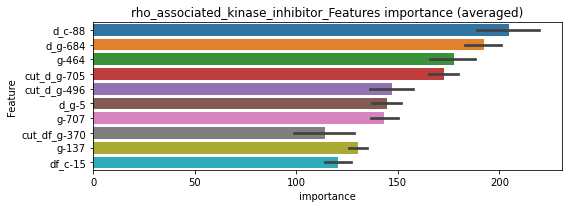

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00045926	valid_1's binary_logloss: 0.00451649
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000398646	valid_1's binary_logloss: 0.00435668


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000463733	valid_1's binary_logloss: 0.00216481
Early stopping, best iteration is:
[1426]	training's binary_logloss: 0.000388856	valid_1's binary_logloss: 0.00195801


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000468386	valid_1's binary_logloss: 0.00157189
Early stopping, best iteration is:
[1521]	training's binary_logloss: 0.000384832	valid_1's binary_logloss: 0.00142239


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000455546	valid_1's binary_logloss: 0.00710668
Early stopping, best iteration is:
[1227]	training's binary_logloss: 0.000404385	valid_1's binary_logloss: 0.0069615


rho_associated_kinase_inhibitor logloss: 0.0036747791526883194
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00045847	valid_1's binary_logloss: 0.00513725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000433463	valid_1's binary_logloss: 0.0154395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000428876	valid_1's binary_logloss: 0.00324159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000440358	valid_1's binary_logloss: 0.00648012


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042946, Threshold: 0.0172027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0172027, conf_0:0.01204, conf_1:0.02236
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0472027
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0772027
threshold: 0.0772027, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000404445	valid_1's binary_logloss: 0.00482408
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000420041	valid_1's binary_logloss: 0.0185881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418135	valid_1's binary_logloss: 0.00157872
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238538, Threshold: 0.0772027, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00042239	valid_1's binary_logloss: 0.00569731


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0080362 Vs.target_rate: 0.00155
Num_p_label: 32.0, Expected: 6.2, Threshold: 0.0772027, conf_0:0.06176, conf_1:0.09264
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.1072027
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.1372027
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.1672027
threshold: 0.1672027, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000414741	valid_1's binary_logloss: 0.0100752
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000400609	valid_1's binary_logloss: 0.00149188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000412601	valid_1's binary_logloss: 0.00153715
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0511186, Threshold: 0.1672027, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000432285	valid_1's binary_logloss: 0.00801213


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00155
Num_p_label: 14.0, Expected: 6.2, Threshold: 0.1672027, conf_0:0.15048, conf_1:0.18392
threshold: 0.1672027, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


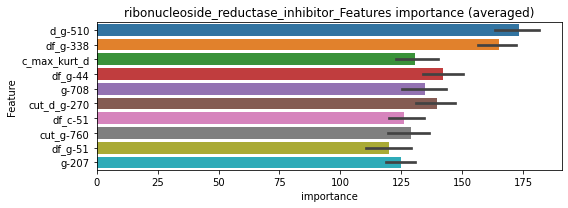

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000463949	valid_1's binary_logloss: 0.00709232
Early stopping, best iteration is:
[1227]	training's binary_logloss: 0.000419169	valid_1's binary_logloss: 0.00695641


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000477293	valid_1's binary_logloss: 0.00167181
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.000419756	valid_1's binary_logloss: 0.00154026


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000477178	valid_1's binary_logloss: 0.0014041
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.000424076	valid_1's binary_logloss: 0.0012874


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000465716	valid_1's binary_logloss: 0.00703264
Early stopping, best iteration is:
[1183]	training's binary_logloss: 0.000423549	valid_1's binary_logloss: 0.00693296


ribonucleoside_reductase_inhibitor logloss: 0.004179985286559526
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000354943	valid_1's binary_logloss: 0.00148762
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00033819	valid_1's binary_logloss: 0.00385745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345819	valid_1's binary_logloss: 0.000897793
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020960, Threshold: 0.0057738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0057738, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0357738


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.000996872


threshold: 0.0357738, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000341108	valid_1's binary_logloss: 0.00306665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1007288, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, Expected: 4.2, Threshold: 0.0357738, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0657738


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0957738
threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000341108	valid_1's binary_logloss: 0.00306665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1007288, Threshold: 0.0957738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0957738, conf_0:0.08620, conf_1:0.10535
threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


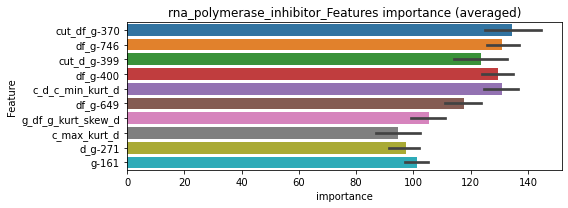

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367968	valid_1's binary_logloss: 0.00147061
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000344165	valid_1's binary_logloss: 0.00142446


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000364366	valid_1's binary_logloss: 0.00214884
Early stopping, best iteration is:
[1240]	training's binary_logloss: 0.000335421	valid_1's binary_logloss: 0.0020729


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000368213	valid_1's binary_logloss: 0.000841578
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.000344985	valid_1's binary_logloss: 0.000795522


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000369141	valid_1's binary_logloss: 0.000858123
Early stopping, best iteration is:
[1207]	training's binary_logloss: 0.000345514	valid_1's binary_logloss: 0.000813342


rna_polymerase_inhibitor logloss: 0.00127680685764513


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0840234	valid_1's binary_logloss: 0.140136
Early stopping, best iteration is:
[1622]	training's binary_logloss: 0.0578145	valid_1's binary_logloss: 0.134153
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0811637	valid_1's binary_logloss: 0.152864
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.0761829	valid_1's binary_logloss: 0.151983
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0847556	valid_1's binary_logloss: 0.134747
Early stopping, best iteration is:
[1203]	training's binary_logloss: 0.0745615	valid_1's binary_logloss: 0.131636
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0846247	valid_1's binary_logloss: 0.135377
Early stopping, best iteration is:
[1918]	training's binary_logloss: 0.0502425	valid_1's binary_lo

1 / 3, AUC score:0.949, PR-AUC:0.912
y_Threshold: 0.0679937, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 556 → Positive_corect_labels: 1008/6458
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.07106, conf_1:0.13197
threshold: 0.1015146, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1008.0/6458, y_label_rate: 0.1560855
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0400531	valid_1's binary_logloss: 0.0622591
[2000]	training's binary_logloss: 0.0223505	valid_1's binary_logloss: 0.0533793
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0177686	valid_1's binary_logloss: 0.0514564
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0380972	valid_1's binary_logloss: 0.0644193
[2000]	training's binary_logloss: 0.0211848	valid_1's binary_logloss: 0.0572829
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0185482	valid_1's binary_logloss: 0.0565108
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0389863	valid_1's binary_logloss: 0.0599534
[2000]	training's binary_logloss: 0.0217142	valid_1's binary_logloss: 0.0520142
Early stopping, best iteration is:
[2654]	training's binary_logloss: 0.0163181	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0543363, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 956.0/6354
p_label_rate: 0.0148167 Vs.target_rate: 0.00991
Num_p_label: 59.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.08121, conf_1:0.12182
threshold: 0.1015146, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 956.0/6354, y_label_rate: 0.1504564
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0207359	valid_1's binary_logloss: 0.0316262
[2000]	training's binary_logloss: 0.011233	valid_1's binary_logloss: 0.0239544
[3000]	training's binary_logloss: 0.00764658	valid_1's binary_logloss: 0.0214137
Early stopping, best iteration is:
[3592]	training's binary_logloss: 0.00639343	valid_1's binary_logloss: 0.0206012
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0224555	valid_1's binary_logloss: 0.0245856
[2000]	training's binary_logloss: 0.0123279	valid_1's binary_logloss: 0.0159074
[3000]	training's binary_logloss: 0.0084196	valid_1's binary_logloss: 0.0130219
[4000]	training's binary_logloss: 0.00632283	valid_1's binary_logloss: 0.0114968
[5000]	training's binary_logloss: 0.00506744	valid_1's binary_logloss: 0.0105501
[6000]	training's binary_logloss: 0.00423096	valid_1's binary_logloss: 0.00993854
[7000]	training's binary_logloss: 0.00

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0716575, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 945.0/6332
p_label_rate: 0.0188348 Vs.target_rate: 0.00991
Num_p_label: 75.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.09136, conf_1:0.11167
Num_p_label: 64.0, Expected: 39.5, Adj_threshold_1: 0.1315146
Num_p_label: 54.0, Expected: 39.5, Adj_threshold_2: 0.1615146
threshold: 0.1615146, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 945.0/6332, y_label_rate: 0.1492419


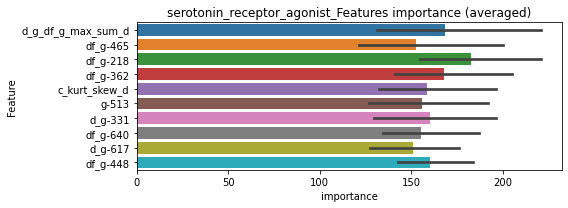

len(train_index) : 4749
len(valid_index) : 1583
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0246985	valid_1's binary_logloss: 0.0341911
[2000]	training's binary_logloss: 0.0123237	valid_1's binary_logloss: 0.0206912
[3000]	training's binary_logloss: 0.00835924	valid_1's binary_logloss: 0.016476
[4000]	training's binary_logloss: 0.00637857	valid_1's binary_logloss: 0.0145307
[5000]	training's binary_logloss: 0.00515871	valid_1's binary_logloss: 0.0133557
[6000]	training's binary_logloss: 0.00435156	valid_1's binary_logloss: 0.0125476
[7000]	training's binary_logloss: 0.00376715	valid_1's binary_logloss: 0.0120231
[8000]	training's binary_logloss: 0.0033364	valid_1's binary_logloss: 0.0116133
[9000]	training's binary_logloss: 0.00299314	valid_1's binary_logloss: 0.011283
Early stopping, best iteration is:
[9408]	training's binary_logloss: 0.00287193	valid_1's binary_logloss: 0.0111897


len(train_index) : 4749
len(valid_index) : 1583
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.024459	valid_1's binary_logloss: 0.0333094
[2000]	training's binary_logloss: 0.0121814	valid_1's binary_logloss: 0.0201578
[3000]	training's binary_logloss: 0.00825351	valid_1's binary_logloss: 0.0158537
[4000]	training's binary_logloss: 0.00629334	valid_1's binary_logloss: 0.0137094
[5000]	training's binary_logloss: 0.00510578	valid_1's binary_logloss: 0.0124396
[6000]	training's binary_logloss: 0.00430192	valid_1's binary_logloss: 0.0115385
[7000]	training's binary_logloss: 0.0037237	valid_1's binary_logloss: 0.0109244
[8000]	training's binary_logloss: 0.00329916	valid_1's binary_logloss: 0.0104249
[9000]	training's binary_logloss: 0.00295676	valid_1's binary_logloss: 0.0100588
[10000]	training's binary_logloss: 0.00268461	valid_1's binary_logloss: 0.00979113
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00268461	valid_1's binary_logloss: 0.00979113


len(train_index) : 4749
len(valid_index) : 1583
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0245596	valid_1's binary_logloss: 0.0308198
[2000]	training's binary_logloss: 0.012215	valid_1's binary_logloss: 0.0177697
[3000]	training's binary_logloss: 0.00829283	valid_1's binary_logloss: 0.0135767
[4000]	training's binary_logloss: 0.00634139	valid_1's binary_logloss: 0.0115774
[5000]	training's binary_logloss: 0.00513687	valid_1's binary_logloss: 0.010461
[6000]	training's binary_logloss: 0.0043324	valid_1's binary_logloss: 0.00961174
[7000]	training's binary_logloss: 0.00375236	valid_1's binary_logloss: 0.00909008
[8000]	training's binary_logloss: 0.00331871	valid_1's binary_logloss: 0.00867372
[9000]	training's binary_logloss: 0.00298001	valid_1's binary_logloss: 0.00833021
[10000]	training's binary_logloss: 0.00270603	valid_1's binary_logloss: 0.00812287
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00270603	valid_1's binary_logloss: 0.008122

len(train_index) : 4749
len(valid_index) : 1583
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253126	valid_1's binary_logloss: 0.0311501
[2000]	training's binary_logloss: 0.0126292	valid_1's binary_logloss: 0.0179353
[3000]	training's binary_logloss: 0.00860256	valid_1's binary_logloss: 0.0139163
[4000]	training's binary_logloss: 0.00657562	valid_1's binary_logloss: 0.0119255
[5000]	training's binary_logloss: 0.00532325	valid_1's binary_logloss: 0.0106486
[6000]	training's binary_logloss: 0.00447966	valid_1's binary_logloss: 0.00982764
[7000]	training's binary_logloss: 0.00388117	valid_1's binary_logloss: 0.00929388
[8000]	training's binary_logloss: 0.00343221	valid_1's binary_logloss: 0.00884172
[9000]	training's binary_logloss: 0.00307549	valid_1's binary_logloss: 0.00848314
[10000]	training's binary_logloss: 0.00279439	valid_1's binary_logloss: 0.00823988
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00279439	valid_1's binary_logloss: 0.008

serotonin_receptor_agonist logloss: 0.009335889719991922


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.106855	valid_1's binary_logloss: 0.192079
Early stopping, best iteration is:
[1616]	training's binary_logloss: 0.073478	valid_1's binary_logloss: 0.186838
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.104842	valid_1's binary_logloss: 0.209991
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0985062	valid_1's binary_logloss: 0.208297
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.108226	valid_1's binary_logloss: 0.192849
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0725616	valid_1's binary_logloss: 0.18563
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.110541	valid_1's binary_logloss: 0.186455
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.065946	valid_1's binary_logloss: 

1 / 3, AUC score:0.912, PR-AUC:0.857
y_Threshold: 0.0904353, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 815 → Positive_corect_labels: 1081/7305
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.08656, conf_1:0.16075
threshold: 0.1236530, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1081.0/7305, y_label_rate: 0.1479808
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0552025	valid_1's binary_logloss: 0.0843468
[2000]	training's binary_logloss: 0.0296389	valid_1's binary_logloss: 0.07092
[3000]	training's binary_logloss: 0.019656	valid_1's binary_logloss: 0.0665137
Early stopping, best iteration is:
[2993]	training's binary_logloss: 0.0197053	valid_1's binary_logloss: 0.0664796
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0549195	valid_1's binary_logloss: 0.0856119
[2000]	training's binary_logloss: 0.0295418	valid_1's binary_logloss: 0.0723804
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0231569	valid_1's binary_logloss: 0.0696637
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0544979	valid_1's binary_logloss: 0.0892506
[2000]	training's binary_logloss: 0.0291536	valid_1's binary_logloss: 0.0760891
Early stopping, best iteration

2 / 3, AUC score:0.993, PR-AUC:0.980
y_Threshold: 0.0632833, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 1006.0/7155
p_label_rate: 0.0015068 Vs.target_rate: 0.01696
Num_p_label: 6.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.09892, conf_1:0.14838
threshold: 0.1236530, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 1006.0/7155, y_label_rate: 0.1406010
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0376445	valid_1's binary_logloss: 0.0528866
[2000]	training's binary_logloss: 0.0198318	valid_1's binary_logloss: 0.0387942
[3000]	training's binary_logloss: 0.013194	valid_1's binary_logloss: 0.0345093
Early stopping, best iteration is:
[3257]	training's binary_logloss: 0.0121103	valid_1's binary_logloss: 0.0337898
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0362025	valid_1's binary_logloss: 0.0568793
[2000]	training's binary_logloss: 0.0188949	valid_1's binary_logloss: 0.0436159
[3000]	training's binary_logloss: 0.0126448	valid_1's binary_logloss: 0.0395229
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.0104142	valid_1's binary_logloss: 0.0382495
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0354905	valid_1's binary_logloss: 0.0613344
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0607974, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 978.0/7099
p_label_rate: 0.0057760 Vs.target_rate: 0.01696
Num_p_label: 23.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.11129, conf_1:0.13602
threshold: 0.1236530, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 978.0/7099, y_label_rate: 0.1377659


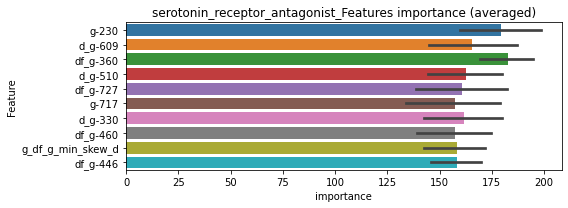

len(train_index) : 5324
len(valid_index) : 1775
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0391526	valid_1's binary_logloss: 0.0555697
[2000]	training's binary_logloss: 0.0209261	valid_1's binary_logloss: 0.0373034
[3000]	training's binary_logloss: 0.0142248	valid_1's binary_logloss: 0.0308477
[4000]	training's binary_logloss: 0.0107198	valid_1's binary_logloss: 0.0275144
[5000]	training's binary_logloss: 0.00860314	valid_1's binary_logloss: 0.0256098
[6000]	training's binary_logloss: 0.00717761	valid_1's binary_logloss: 0.0242692
Early stopping, best iteration is:
[6270]	training's binary_logloss: 0.00686162	valid_1's binary_logloss: 0.0239216


len(train_index) : 5324
len(valid_index) : 1775
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041294	valid_1's binary_logloss: 0.0484502
[2000]	training's binary_logloss: 0.022319	valid_1's binary_logloss: 0.0300163
[3000]	training's binary_logloss: 0.0152111	valid_1's binary_logloss: 0.023464
[4000]	training's binary_logloss: 0.0114567	valid_1's binary_logloss: 0.0200835
[5000]	training's binary_logloss: 0.00915541	valid_1's binary_logloss: 0.0180723
[6000]	training's binary_logloss: 0.0076342	valid_1's binary_logloss: 0.0166904
[7000]	training's binary_logloss: 0.00652687	valid_1's binary_logloss: 0.0156743
[8000]	training's binary_logloss: 0.00572016	valid_1's binary_logloss: 0.0149054
[9000]	training's binary_logloss: 0.00508995	valid_1's binary_logloss: 0.0143113
Early stopping, best iteration is:
[9649]	training's binary_logloss: 0.00474678	valid_1's binary_logloss: 0.0140132


len(train_index) : 5324
len(valid_index) : 1775
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0392741	valid_1's binary_logloss: 0.0577813
[2000]	training's binary_logloss: 0.0210648	valid_1's binary_logloss: 0.0396001
[3000]	training's binary_logloss: 0.0143815	valid_1's binary_logloss: 0.0329934
[4000]	training's binary_logloss: 0.0108416	valid_1's binary_logloss: 0.0297194
[5000]	training's binary_logloss: 0.00869397	valid_1's binary_logloss: 0.0279152
[6000]	training's binary_logloss: 0.00728574	valid_1's binary_logloss: 0.0266501
Early stopping, best iteration is:
[6316]	training's binary_logloss: 0.00692408	valid_1's binary_logloss: 0.0263337


len(train_index) : 5325
len(valid_index) : 1774
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0396865	valid_1's binary_logloss: 0.0561059
[2000]	training's binary_logloss: 0.0211862	valid_1's binary_logloss: 0.0379387
[3000]	training's binary_logloss: 0.0143572	valid_1's binary_logloss: 0.0312675
[4000]	training's binary_logloss: 0.0107842	valid_1's binary_logloss: 0.0280156
[5000]	training's binary_logloss: 0.00864203	valid_1's binary_logloss: 0.0261432
[6000]	training's binary_logloss: 0.00721513	valid_1's binary_logloss: 0.0249476
[7000]	training's binary_logloss: 0.00617452	valid_1's binary_logloss: 0.0240855
Early stopping, best iteration is:
[7381]	training's binary_logloss: 0.00585563	valid_1's binary_logloss: 0.0238277


serotonin_receptor_antagonist logloss: 0.022023768779739224
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000481631	valid_1's binary_logloss: 0.0139622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000481793	valid_1's binary_logloss: 0.0176506
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000480233	valid_1's binary_logloss: 0.00588243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000471486	valid_1's binary_logloss: 0.0163946


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030273, Threshold: 0.0328197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0328197, conf_0:0.02297, conf_1:0.04267
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_1: 0.0628197
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_2: 0.0928197
threshold: 0.0928197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000480925	valid_1's binary_logloss: 0.0129391
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000535192	valid_1's binary_logloss: 0.0182474
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000493064	valid_1's binary_logloss: 0.00651777
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341137, Threshold: 0.0928197, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000513819	valid_1's binary_logloss: 0.0170887


Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0198393 Vs.target_rate: 0.00185
Num_p_label: 79.0, Expected: 7.4, Threshold: 0.0928197, conf_0:0.07426, conf_1:0.11138
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1228197
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1528197
Num_p_label: 47.0, Expected: 7.4, Adj_threshold_3: 0.1828197
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.2128197
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_5: 0.2428197
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_6: 0.2728197
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_7: 0.3028197
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_8: 0.3328197
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_9: 0.3628197
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_10: 0.3928197
threshold: 0.3928197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000485023	valid_1's binary_logloss: 0.0162296
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0004572	valid_1's binary_logloss: 0.0113446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000465141	valid_1's binary_logloss: 0.0128431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000481083	valid_1's binary_logloss: 0.00472428


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250144, Threshold: 0.3928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3928197, conf_0:0.35354, conf_1:0.43210
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_1: 0.4228197
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_2: 0.4528197
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_3: 0.4828197
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.5128197
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5428197
threshold: 0.5428197, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


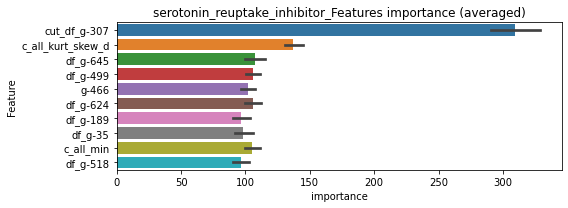

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000541115	valid_1's binary_logloss: 0.0137816


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000515217	valid_1's binary_logloss: 0.010734
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.00049838	valid_1's binary_logloss: 0.0106808


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2852


Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000732717	valid_1's binary_logloss: 0.0116014


len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000519574	valid_1's binary_logloss: 0.00569484
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000493998	valid_1's binary_logloss: 0.00560702


serotonin_reuptake_inhibitor logloss: 0.01041865850992438
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000401039	valid_1's binary_logloss: 0.00710632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000417287	valid_1's binary_logloss: 0.0181088
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000423317	valid_1's binary_logloss: 0.00355157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403025	valid_1's binary_logloss: 0.00330737


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023838, Threshold: 0.0316626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0316626, conf_0:0.02216, conf_1:0.04116
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0616626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0916626
threshold: 0.0916626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000396152	valid_1's binary_logloss: 0.00534393
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000387288	valid_1's binary_logloss: 0.0168173
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410211	valid_1's binary_logloss: 0.00311375
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000398856	valid_1's binary_logloss: 0.00303131


y_Threshold: 0.0234161, Threshold: 0.0916626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0916626, conf_0:0.07333, conf_1:0.11000
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1216626
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1516626
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1816626
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2116626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.2416626
threshold: 0.2416626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000404784	valid_1's binary_logloss: 0.0143452
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000411384	valid_1's binary_logloss: 0.00449857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000407545	valid_1's binary_logloss: 0.00216446
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242347, Threshold: 0.2416626, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000389809	valid_1's binary_logloss: 0.0107854


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2416626, conf_0:0.21750, conf_1:0.26583
threshold: 0.2416626, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


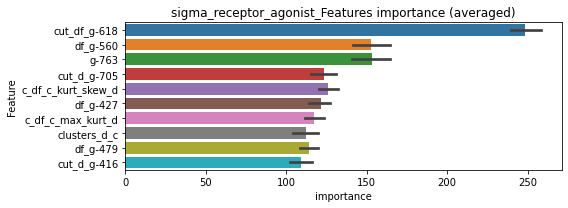

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000475452	valid_1's binary_logloss: 0.0127974


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000451937	valid_1's binary_logloss: 0.00529631
Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000411336	valid_1's binary_logloss: 0.00516064


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00045547	valid_1's binary_logloss: 0.00199243
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.0004059	valid_1's binary_logloss: 0.00190586


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000449427	valid_1's binary_logloss: 0.0115747
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.0004132	valid_1's binary_logloss: 0.01144


sigma_receptor_agonist logloss: 0.007826087126478691
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.00994236
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000436789	valid_1's binary_logloss: 0.00881885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000424891	valid_1's binary_logloss: 0.00417025
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000437351	valid_1's binary_logloss: 0.00454057


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029876, Threshold: 0.0092375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0092375, conf_0:0.00647, conf_1:0.01201
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0392375
threshold: 0.0392375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03139, conf_1:0.04708
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03531, conf_1:0.04316
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


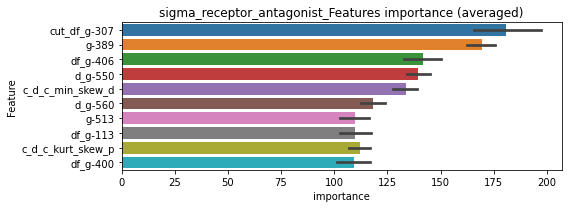

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00048534	valid_1's binary_logloss: 0.00749688
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000472222	valid_1's binary_logloss: 0.0074367


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000488289	valid_1's binary_logloss: 0.00819868
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000485069	valid_1's binary_logloss: 0.00817983


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000494918	valid_1's binary_logloss: 0.00440353
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000436066	valid_1's binary_logloss: 0.00424857


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000497268	valid_1's binary_logloss: 0.00453533
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000475088	valid_1's binary_logloss: 0.00443566


sigma_receptor_antagonist logloss: 0.006076431922370554
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000331594	valid_1's binary_logloss: 0.00147418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000321768	valid_1's binary_logloss: 0.00633852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000331626	valid_1's binary_logloss: 0.000684224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330593	valid_1's binary_logloss: 0.000934356


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016507, Threshold: 0.0050948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0050948, conf_0:0.00357, conf_1:0.00662
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0350948
threshold: 0.0350948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.02808, conf_1:0.04211


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.03159, conf_1:0.03860


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


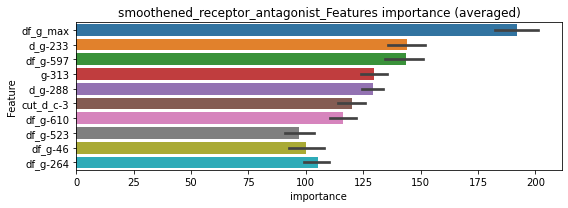

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000371816	valid_1's binary_logloss: 0.00120505
Early stopping, best iteration is:
[1326]	training's binary_logloss: 0.000330591	valid_1's binary_logloss: 0.00112971


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367186	valid_1's binary_logloss: 0.00439838
Early stopping, best iteration is:
[1210]	training's binary_logloss: 0.000333669	valid_1's binary_logloss: 0.00428201


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000371512	valid_1's binary_logloss: 0.000738626
Early stopping, best iteration is:
[1402]	training's binary_logloss: 0.000325762	valid_1's binary_logloss: 0.000658672


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000369907	valid_1's binary_logloss: 0.000939406
Early stopping, best iteration is:
[1358]	training's binary_logloss: 0.000325397	valid_1's binary_logloss: 0.000858475


smoothened_receptor_antagonist logloss: 0.0017327674882596576


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0804497	valid_1's binary_logloss: 0.128476
Early stopping, best iteration is:
[1539]	training's binary_logloss: 0.0577551	valid_1's binary_logloss: 0.123862
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0764219	valid_1's binary_logloss: 0.14793
Early stopping, best iteration is:
[1104]	training's binary_logloss: 0.071376	valid_1's binary_logloss: 0.147218
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0799299	valid_1's binary_logloss: 0.127219
Early stopping, best iteration is:
[1372]	training's binary_logloss: 0.0628184	valid_1's binary_logloss: 0.123868
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0789335	valid_1's binary_logloss: 0.135513
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0526815	valid_1's binary_logl

1 / 3, AUC score:0.953, PR-AUC:0.916
y_Threshold: 0.0652498, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 637 → Positive_corect_labels: 1191/7595
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.06538, conf_1:0.12143
threshold: 0.0934057, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1191.0/7595, y_label_rate: 0.1568137
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0365897	valid_1's binary_logloss: 0.0637108
[2000]	training's binary_logloss: 0.0199004	valid_1's binary_logloss: 0.0568243
Early stopping, best iteration is:
[2264]	training's binary_logloss: 0.0175395	valid_1's binary_logloss: 0.0560543
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0373238	valid_1's binary_logloss: 0.0560968
[2000]	training's binary_logloss: 0.0200775	valid_1's binary_logloss: 0.0491765
Early stopping, best iteration is:
[2477]	training's binary_logloss: 0.016133	valid_1's binary_logloss: 0.0477065
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0373633	valid_1's binary_logloss: 0.0575922
[2000]	training's binary_logloss: 0.0200245	valid_1's binary_logloss: 0.0501992
Early stopping, best iteration is:
[2056]	training's binary_logloss: 0.0194766	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0433548, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 1142.0/7497
p_label_rate: 0.0015068 Vs.target_rate: 0.01121
Num_p_label: 6.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.07472, conf_1:0.11209
threshold: 0.0934057, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 1142.0/7497, y_label_rate: 0.1523276
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248329	valid_1's binary_logloss: 0.0317856
[2000]	training's binary_logloss: 0.0133186	valid_1's binary_logloss: 0.0245129
[3000]	training's binary_logloss: 0.00880534	valid_1's binary_logloss: 0.0219513
[4000]	training's binary_logloss: 0.00650131	valid_1's binary_logloss: 0.0207176
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.00622714	valid_1's binary_logloss: 0.0205179
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0225912	valid_1's binary_logloss: 0.043132
[2000]	training's binary_logloss: 0.0122001	valid_1's binary_logloss: 0.0372872
Early stopping, best iteration is:
[2293]	training's binary_logloss: 0.0106713	valid_1's binary_logloss: 0.0365335
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0239852	valid_1's binary_logloss: 0.0368118
[2000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0326965, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1122.0/7457
p_label_rate: 0.0010045 Vs.target_rate: 0.01121
Num_p_label: 4.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.08407, conf_1:0.10275
threshold: 0.0934057, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 1122.0/7457, y_label_rate: 0.1504627


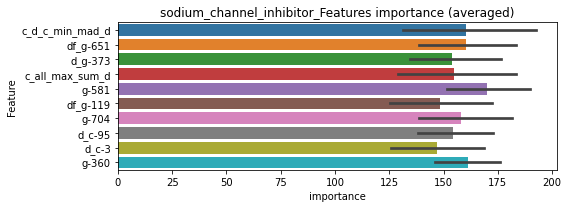

len(train_index) : 5592
len(valid_index) : 1865
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0260285	valid_1's binary_logloss: 0.0283527
[2000]	training's binary_logloss: 0.0141862	valid_1's binary_logloss: 0.0171386
[3000]	training's binary_logloss: 0.00982759	valid_1's binary_logloss: 0.0135867
[4000]	training's binary_logloss: 0.00740204	valid_1's binary_logloss: 0.0117029
[5000]	training's binary_logloss: 0.00593163	valid_1's binary_logloss: 0.0106137
[6000]	training's binary_logloss: 0.00493147	valid_1's binary_logloss: 0.00978684
[7000]	training's binary_logloss: 0.00422405	valid_1's binary_logloss: 0.00925423
[8000]	training's binary_logloss: 0.00369859	valid_1's binary_logloss: 0.00881746
[9000]	training's binary_logloss: 0.00329008	valid_1's binary_logloss: 0.00848051
[10000]	training's binary_logloss: 0.00296136	valid_1's binary_logloss: 0.00821643
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00296136	valid_1's binary_logloss: 0.008

len(train_index) : 5593
len(valid_index) : 1864
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0249998	valid_1's binary_logloss: 0.0330842
[2000]	training's binary_logloss: 0.0135032	valid_1's binary_logloss: 0.0218597
[3000]	training's binary_logloss: 0.00937944	valid_1's binary_logloss: 0.0184154
[4000]	training's binary_logloss: 0.00705991	valid_1's binary_logloss: 0.0164113
[5000]	training's binary_logloss: 0.00567559	valid_1's binary_logloss: 0.0153751
[6000]	training's binary_logloss: 0.00473658	valid_1's binary_logloss: 0.014538
Early stopping, best iteration is:
[6667]	training's binary_logloss: 0.00425937	valid_1's binary_logloss: 0.0141563


len(train_index) : 5593
len(valid_index) : 1864
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0246917	valid_1's binary_logloss: 0.0316777
[2000]	training's binary_logloss: 0.0132953	valid_1's binary_logloss: 0.0213836
[3000]	training's binary_logloss: 0.00928108	valid_1's binary_logloss: 0.0182103
[4000]	training's binary_logloss: 0.00704078	valid_1's binary_logloss: 0.0165914
[5000]	training's binary_logloss: 0.00565106	valid_1's binary_logloss: 0.0156655
[6000]	training's binary_logloss: 0.00471778	valid_1's binary_logloss: 0.0150591
[7000]	training's binary_logloss: 0.00404128	valid_1's binary_logloss: 0.0146495
Early stopping, best iteration is:
[7150]	training's binary_logloss: 0.00395447	valid_1's binary_logloss: 0.0145872


len(train_index) : 5593
len(valid_index) : 1864
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0246989	valid_1's binary_logloss: 0.0340399
[2000]	training's binary_logloss: 0.0133123	valid_1's binary_logloss: 0.0225001
[3000]	training's binary_logloss: 0.00926223	valid_1's binary_logloss: 0.0188789
[4000]	training's binary_logloss: 0.00698102	valid_1's binary_logloss: 0.0170664
[5000]	training's binary_logloss: 0.00561125	valid_1's binary_logloss: 0.0159827
Early stopping, best iteration is:
[5383]	training's binary_logloss: 0.00521169	valid_1's binary_logloss: 0.0156544


sodium_channel_inhibitor logloss: 0.01315292372595905
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000393727	valid_1's binary_logloss: 0.00582477
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000405387	valid_1's binary_logloss: 0.00561067
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000406683	valid_1's binary_logloss: 0.00446424
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022949, Threshold: 0.0062193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000403004	valid_1's binary_logloss: 0.00249726


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0062193, conf_0:0.00435, conf_1:0.00809
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0362193
threshold: 0.0362193, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.02898, conf_1:0.04346
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.03260, conf_1:0.03984
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


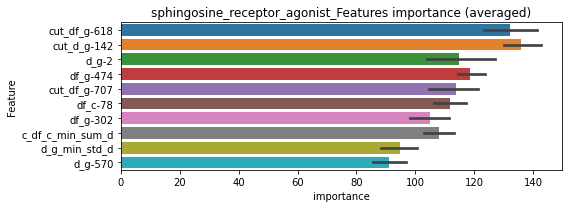

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000431031	valid_1's binary_logloss: 0.0039762
Early stopping, best iteration is:
[1141]	training's binary_logloss: 0.000402127	valid_1's binary_logloss: 0.0039237


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000426044	valid_1's binary_logloss: 0.00379638
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.000390582	valid_1's binary_logloss: 0.00368699


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000437313	valid_1's binary_logloss: 0.00329311
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000418069	valid_1's binary_logloss: 0.00326091


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000435352	valid_1's binary_logloss: 0.00227461
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.00038891	valid_1's binary_logloss: 0.00214386


sphingosine_receptor_agonist logloss: 0.0032547055428742955
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000838864	valid_1's binary_logloss: 0.0506197
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00106538	valid_1's binary_logloss: 0.0367246
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000619879	valid_1's binary_logloss: 0.00376112
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000878765	valid_1's binary_logloss: 0.0318531


1 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0063855, Threshold: 0.0346430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0346430, conf_0:0.02425, conf_1:0.04504
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_1: 0.0646430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_2: 0.0946430
threshold: 0.0946430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000686419	valid_1's binary_logloss: 0.0223518
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000807823	valid_1's binary_logloss: 0.0368935
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00121995	valid_1's binary_logloss: 0.021282
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000598751	valid_1's binary_logloss: 0.015597


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0237866, Threshold: 0.0946430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0095429 Vs.target_rate: 0.00298
Num_p_label: 38.0, Expected: 11.9, Threshold: 0.0946430, conf_0:0.07571, conf_1:0.11357
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_1: 0.1246430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1546430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1846430
threshold: 0.1846430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000621069	valid_1's binary_logloss: 0.0228495
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000605606	valid_1's binary_logloss: 0.0206857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000571588	valid_1's binary_logloss: 0.0163085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000554911	valid_1's binary_logloss: 0.0121343


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0197454, Threshold: 0.1846430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0060271 Vs.target_rate: 0.00298
Num_p_label: 24.0, Expected: 11.9, Threshold: 0.1846430, conf_0:0.16618, conf_1:0.20311
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_1: 0.2146430
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.2446430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2746430
threshold: 0.2746430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


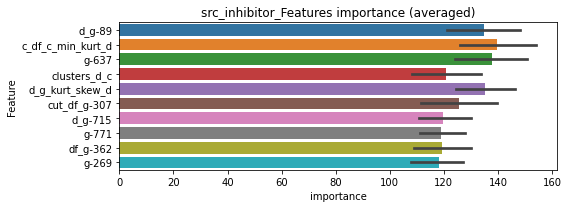

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.0010038	valid_1's binary_logloss: 0.0245978


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000728948	valid_1's binary_logloss: 0.0123785
Early stopping, best iteration is:
[1221]	training's binary_logloss: 0.000629379	valid_1's binary_logloss: 0.0119708


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000723288	valid_1's binary_logloss: 0.0153101
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000718085	valid_1's binary_logloss: 0.0152625


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000765124	valid_1's binary_logloss: 0.0152936


src_inhibitor logloss: 0.016783219072390294
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000912989	valid_1's binary_logloss: 0.037644
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000796518	valid_1's binary_logloss: 0.0304979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000896976	valid_1's binary_logloss: 0.034007
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000658237	valid_1's binary_logloss: 0.0262682


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0085797, Threshold: 0.2436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2436510, conf_0:0.17056, conf_1:0.31675
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2736510
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.3036510
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_3: 0.3336510
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_4: 0.3636510
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.3936510
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_6: 0.4236510
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4536510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4836510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_9: 0.5136510
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.5436510
threshold: 0.5436510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00063434	valid_1's binary_logloss: 0.0247305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00108964	valid_1's binary_logloss: 0.0336989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000646382	valid_1's binary_logloss: 0.0276127
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000795345	valid_1's binary_logloss: 0.0354915


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0333286, Threshold: 0.5436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0110497 Vs.target_rate: 0.00332
Num_p_label: 44.0, Expected: 13.2, Threshold: 0.5436510, conf_0:0.43492, conf_1:0.65238
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.5736510
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.6036510
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6336510
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.6636510
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_5: 0.6936510
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_6: 0.7236510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_7: 0.7536510
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_8: 0.7836510
threshold: 0.7836510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3784, y_label_rate: 0.1704545
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000651459	valid_1's binary_logloss: 0.0230485
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000848975	valid_1's binary_logloss: 0.0264468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102233	valid_1's binary_logloss: 0.0369388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000610416	valid_1's binary_logloss: 0.0164532


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431788, Threshold: 0.7836510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0060271 Vs.target_rate: 0.00332
Num_p_label: 24.0, Expected: 13.2, Threshold: 0.7836510, conf_0:0.70529, conf_1:0.86202
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8136510
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8436510
threshold: 0.8436510, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


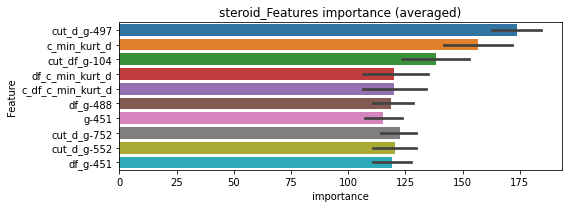

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00117739	valid_1's binary_logloss: 0.0269125


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000754002	valid_1's binary_logloss: 0.0221663
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000737306	valid_1's binary_logloss: 0.0221458


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00122537	valid_1's binary_logloss: 0.0168787


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000770796	valid_1's binary_logloss: 0.0151857
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000747163	valid_1's binary_logloss: 0.0150404


steroid logloss: 0.020246603032342145
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000307072	valid_1's binary_logloss: 0.00131952
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000311225	valid_1's binary_logloss: 0.000831622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000308988	valid_1's binary_logloss: 0.00075208
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015542, Threshold: 0.0049558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0049558, conf_0:0.00347, conf_1:0.00644
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0349558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000310375	valid_1's binary_logloss: 0.00110023


threshold: 0.0349558, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0349558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0349558, conf_0:0.02796, conf_1:0.04195
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0649558
threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0649558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0649558, conf_0:0.05846, conf_1:0.07145
threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


positive_y_label: 656.0/3807, y_label_rate: 0.1723142


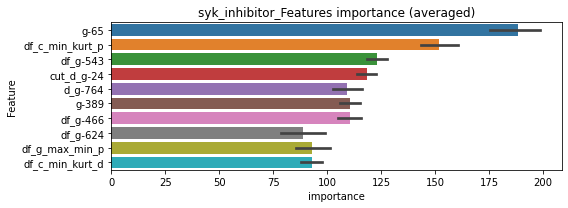

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000331131	valid_1's binary_logloss: 0.00155087
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000314128	valid_1's binary_logloss: 0.00151404


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000330159	valid_1's binary_logloss: 0.000792148
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000309087	valid_1's binary_logloss: 0.000755303


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000329259	valid_1's binary_logloss: 0.000618311
Early stopping, best iteration is:
[1293]	training's binary_logloss: 0.00030532	valid_1's binary_logloss: 0.000580372


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000329271	valid_1's binary_logloss: 0.000947879
Early stopping, best iteration is:
[1263]	training's binary_logloss: 0.000303771	valid_1's binary_logloss: 0.000898697


syk_inhibitor logloss: 0.0009371132012628203
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000618208	valid_1's binary_logloss: 0.0313891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000553834	valid_1's binary_logloss: 0.0114483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000592874	valid_1's binary_logloss: 0.00689343
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000536768	valid_1's binary_logloss: 0.0130147


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0049040, Threshold: 0.0115926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0115926, conf_0:0.00811, conf_1:0.01507
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0415926
threshold: 0.0415926, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00072263	valid_1's binary_logloss: 0.0290511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000539828	valid_1's binary_logloss: 0.0117722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000550692	valid_1's binary_logloss: 0.00627124
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000559881	valid_1's binary_logloss: 0.0132225


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266480, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03327, conf_1:0.04991
threshold: 0.0415926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000539358	valid_1's binary_logloss: 0.0102648
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000595693	valid_1's binary_logloss: 0.0163228
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000855582	valid_1's binary_logloss: 0.0183694
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000616268	valid_1's binary_logloss: 0.0248208


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173614, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03743, conf_1:0.04575
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0715926
threshold: 0.0715926, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


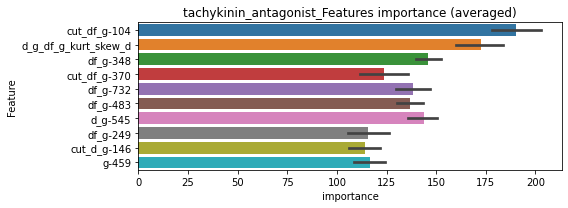

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00120243	valid_1's binary_logloss: 0.0270753
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000669332	valid_1's binary_logloss: 0.0135484
Early stopping, best iteration is:
[1214]	training's binary_logloss: 0.000579551	valid_1's binary_logloss: 0.0133104


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000678623	valid_1's binary_logloss: 0.0082273
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.000580756	valid_1's binary_logloss: 0.00788574


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


tachykinin_antagonist logloss: 0.020224230293846956


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.001223	valid_1's binary_logloss: 0.0326386


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000401371	valid_1's binary_logloss: 0.002557
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000412444	valid_1's binary_logloss: 0.00260742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000406982	valid_1's binary_logloss: 0.00122322
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027181, Threshold: 0.0074640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000436245	valid_1's binary_logloss: 0.005378


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0074640, conf_0:0.00522, conf_1:0.00970
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0374640
threshold: 0.0374640, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.02997, conf_1:0.04496
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.03372, conf_1:0.04121
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


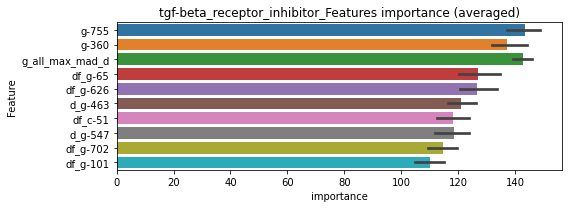

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000461102	valid_1's binary_logloss: 0.00195056
Early stopping, best iteration is:
[1409]	training's binary_logloss: 0.0003967	valid_1's binary_logloss: 0.00179104


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000466174	valid_1's binary_logloss: 0.00304409
Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000427168	valid_1's binary_logloss: 0.00288596


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000472012	valid_1's binary_logloss: 0.00136913
Early stopping, best iteration is:
[1468]	training's binary_logloss: 0.000394909	valid_1's binary_logloss: 0.0011925


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000698617	valid_1's binary_logloss: 0.004762


tgf-beta_receptor_inhibitor logloss: 0.0026573934094816583
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000301038	valid_1's binary_logloss: 0.00234225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000293253	valid_1's binary_logloss: 0.00241053
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000303873	valid_1's binary_logloss: 0.0005641
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020204, Threshold: 0.0066030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0066030, conf_0:0.00462, conf_1:0.00858
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0366030


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000311886	valid_1's binary_logloss: 0.00200125


threshold: 0.0366030, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.0366030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, Expected: 3.2, Threshold: 0.0366030, conf_0:0.02928, conf_1:0.04392
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0666030
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0966030
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1266030


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.1266030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.1266030, conf_0:0.11394, conf_1:0.13926


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


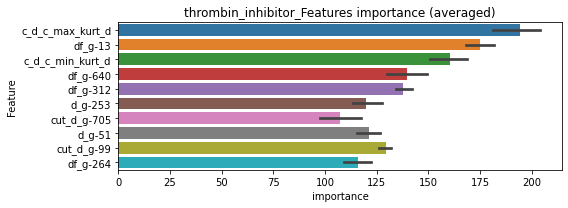

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318675	valid_1's binary_logloss: 0.00259781
Early stopping, best iteration is:
[1235]	training's binary_logloss: 0.000296479	valid_1's binary_logloss: 0.00253415


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000316684	valid_1's binary_logloss: 0.0016353
Early stopping, best iteration is:
[1212]	training's binary_logloss: 0.000293959	valid_1's binary_logloss: 0.00157559


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000322775	valid_1's binary_logloss: 0.000599099
Early stopping, best iteration is:
[1209]	training's binary_logloss: 0.000301004	valid_1's binary_logloss: 0.000564325


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000320878	valid_1's binary_logloss: 0.000796658
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.000301409	valid_1's binary_logloss: 0.000764459


thrombin_inhibitor logloss: 0.0013601729253939964
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000471725	valid_1's binary_logloss: 0.00732977
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000481448	valid_1's binary_logloss: 0.00865571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460589	valid_1's binary_logloss: 0.00180324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000451307	valid_1's binary_logloss: 0.00222276


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029208, Threshold: 0.0130184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130184, conf_0:0.00911, conf_1:0.01692
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430184
threshold: 0.0430184, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000451978	valid_1's binary_logloss: 0.00862687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000449164	valid_1's binary_logloss: 0.00875352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446147	valid_1's binary_logloss: 0.00175392
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00183912


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168215, Threshold: 0.0430184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00155
Num_p_label: 34.0, Expected: 6.2, Threshold: 0.0430184, conf_0:0.03441, conf_1:0.05162
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730184
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1030184
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330184
threshold: 0.1330184, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000494984	valid_1's binary_logloss: 0.00692059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446966	valid_1's binary_logloss: 0.00264211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000450866	valid_1's binary_logloss: 0.00117287
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0494331, Threshold: 0.1330184, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000487432	valid_1's binary_logloss: 0.00516442


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.1330184, conf_0:0.11972, conf_1:0.14632
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1630184
threshold: 0.1630184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


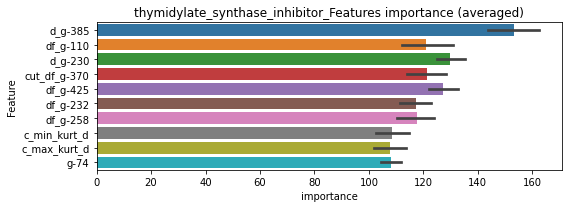

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000500448	valid_1's binary_logloss: 0.0051176
Early stopping, best iteration is:
[1253]	training's binary_logloss: 0.000443664	valid_1's binary_logloss: 0.00494453


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000511364	valid_1's binary_logloss: 0.00278685
Early stopping, best iteration is:
[1317]	training's binary_logloss: 0.000447747	valid_1's binary_logloss: 0.00266959


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000510805	valid_1's binary_logloss: 0.00134503
Early stopping, best iteration is:
[1314]	training's binary_logloss: 0.000449203	valid_1's binary_logloss: 0.00121712


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000503985	valid_1's binary_logloss: 0.00528011
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000472083	valid_1's binary_logloss: 0.00518221


thymidylate_synthase_inhibitor logloss: 0.003503717163843597
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000365974	valid_1's binary_logloss: 0.00530838
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.00916575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000382388	valid_1's binary_logloss: 0.00140194
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024085, Threshold: 0.0129624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369072	valid_1's binary_logloss: 0.00254071


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0129624, conf_0:0.00907, conf_1:0.01685
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0429624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0729624
threshold: 0.0729624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368107	valid_1's binary_logloss: 0.00434072
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000362472	valid_1's binary_logloss: 0.00984303
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000372156	valid_1's binary_logloss: 0.000955814
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125477, Threshold: 0.0729624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358823	valid_1's binary_logloss: 0.00181325


p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0729624, conf_0:0.05837, conf_1:0.08755
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_1: 0.1029624
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1329624
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1629624
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1929624
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2229624
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_6: 0.2529624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_7: 0.2829624
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000360248	valid_1's binary_logloss: 0.00658326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036222	valid_1's binary_logloss: 0.00141892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000363256	valid_1's binary_logloss: 0.00173878
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240388, Threshold: 0.2829624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351657	valid_1's binary_logloss: 0.00894083


p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.2829624, conf_0:0.25467, conf_1:0.31126
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


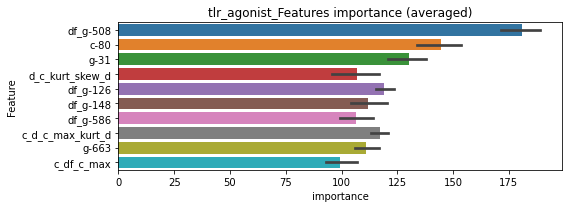

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397206	valid_1's binary_logloss: 0.00787158
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000384901	valid_1's binary_logloss: 0.0077995


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402785	valid_1's binary_logloss: 0.00134613
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000365633	valid_1's binary_logloss: 0.00126558


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402041	valid_1's binary_logloss: 0.00482437
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.000378587	valid_1's binary_logloss: 0.00478195


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000402001	valid_1's binary_logloss: 0.00169855
Early stopping, best iteration is:
[1360]	training's binary_logloss: 0.00035669	valid_1's binary_logloss: 0.00159839


tlr_agonist logloss: 0.0038614081347314363
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000191042	valid_1's binary_logloss: 0.000265607
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000189656	valid_1's binary_logloss: 0.00105762
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.000240826
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005461, Threshold: 0.0010670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010670, conf_0:0.00075, conf_1:0.00139
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310670
threshold: 0.0310670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000192503	valid_1's binary_logloss: 0.000230496


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02485, conf_1:0.03728
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02796, conf_1:0.03417
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


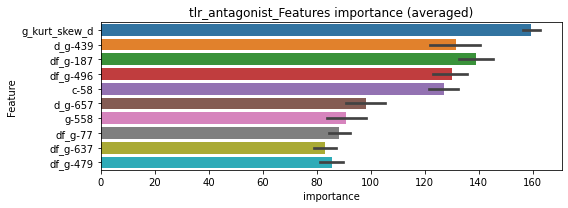

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000204048	valid_1's binary_logloss: 0.00027312
Early stopping, best iteration is:
[1448]	training's binary_logloss: 0.000185381	valid_1's binary_logloss: 0.000249271


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000203522	valid_1's binary_logloss: 0.0003587
Early stopping, best iteration is:
[1453]	training's binary_logloss: 0.000184611	valid_1's binary_logloss: 0.000330973


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000205728	valid_1's binary_logloss: 0.00026152
Early stopping, best iteration is:
[1331]	training's binary_logloss: 0.000188209	valid_1's binary_logloss: 0.000239697


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000204267	valid_1's binary_logloss: 0.000274599
Early stopping, best iteration is:
[1349]	training's binary_logloss: 0.000186691	valid_1's binary_logloss: 0.000253758


tlr_antagonist logloss: 0.00026841984061395805
tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000442029	valid_1's binary_logloss: 0.0081001
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000462764	valid_1's binary_logloss: 0.00964053
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000441108	valid_1's binary_logloss: 0.00499116
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037332, Threshold: 0.0250028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456026	valid_1's binary_logloss: 0.0115059


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0250028, conf_0:0.01750, conf_1:0.03250
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0550028
threshold: 0.0550028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.0550028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0550028, conf_0:0.04400, conf_1:0.06600
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0850028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1150028
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1450028
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.1450028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.1450028, conf_0:0.13050, conf_1:0.15950
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


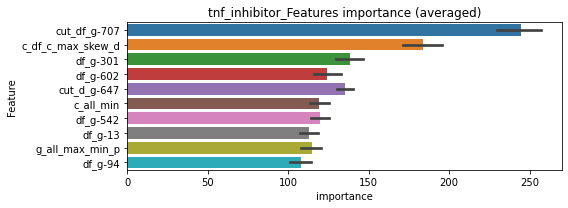

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000486481	valid_1's binary_logloss: 0.00756748
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000454021	valid_1's binary_logloss: 0.00746133


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000487212	valid_1's binary_logloss: 0.00834104
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.000458867	valid_1's binary_logloss: 0.00821468


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000494338	valid_1's binary_logloss: 0.00271425
Early stopping, best iteration is:
[1222]	training's binary_logloss: 0.000451037	valid_1's binary_logloss: 0.00260033


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000484193	valid_1's binary_logloss: 0.00730158
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000455471	valid_1's binary_logloss: 0.00718622


tnf_inhibitor logloss: 0.006366123516324248
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0759583	valid_1's binary_logloss: 0.163801
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.06177	valid_1's binary_logloss: 0.158064
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0808878	valid_1's binary_logloss: 0.130627
[2000]	training's binary_logloss: 0.045734	valid_1's binary_logloss: 0.116554
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0368966	valid_1's binary_logloss: 0.113172
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0867172	valid_1's binary_logloss: 0.105547
[2000]	training's binary_logloss: 0.0490562	valid_1's binary_logloss: 0.0844634
[3000]	training's binary_logloss: 0.0327263	valid_1's binary_logloss: 0.0755862
[4000]	training's binary_logloss: 0.0242552	valid_1's binary_logloss: 0.0710926
Early stopping, best iteration is:
[

1 / 3, AUC score:0.980, PR-AUC:0.953
y_Threshold: 0.0636758, Threshold: 0.1685979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 236 → Positive_corect_labels: 603/3695
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.1685979, conf_0:0.11802, conf_1:0.21918
Num_p_label: 19.0, Expected: 21.2, Adj_threshold_1: 0.1985979
threshold: 0.1985979, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 603.0/3695, y_label_rate: 0.1631935
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0556813	valid_1's binary_logloss: 0.110039
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0321624	valid_1's binary_logloss: 0.0983841
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0602183	valid_1's binary_logloss: 0.0879963
[2000]	training's binary_logloss: 0.0334837	valid_1's binary_logloss: 0.0716509
Early stopping, best iteration is:
[2804]	training's binary_logloss: 0.0240989	valid_1's binary_logloss: 0.0665748
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0598951	valid_1's binary_logloss: 0.0875125
[2000]	training's binary_logloss: 0.0332791	valid_1's binary_logloss: 0.0708327
[3000]	training's binary_logloss: 0.0223996	valid_1's binary_logloss: 0.0641715
[4000]	training's binary_logloss: 0.0167538	valid_1's binary_logloss: 0.0609906
Early stopping, best iterati

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0770922, Threshold: 0.1985979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 566.0/3621
p_label_rate: 0.0356605 Vs.target_rate: 0.00533
Num_p_label: 142.0, Expected: 21.2, Threshold: 0.1985979, conf_0:0.15888, conf_1:0.23832
Num_p_label: 126.0, Expected: 21.2, Adj_threshold_1: 0.2285979
Num_p_label: 107.0, Expected: 21.2, Adj_threshold_2: 0.2585979
Num_p_label: 92.0, Expected: 21.2, Adj_threshold_3: 0.2885979
Num_p_label: 73.0, Expected: 21.2, Adj_threshold_4: 0.3185979
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_5: 0.3485979
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_6: 0.3785979
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_7: 0.4085979
threshold: 0.4085979, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 566.0/3621, y_label_rate: 0.1563104
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0429217	valid_1's binary_logloss: 0.0645471
[2000]	training's binary_logloss: 0.0232632	valid_1's binary_logloss: 0.0475487
[3000]	training's binary_logloss: 0.0157306	valid_1's binary_logloss: 0.0417211
[4000]	training's binary_logloss: 0.0118121	valid_1's binary_logloss: 0.0387145
Early stopping, best iteration is:
[4337]	training's binary_logloss: 0.0108726	valid_1's binary_logloss: 0.0378156
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.039799	valid_1's binary_logloss: 0.0722228
[2000]	training's binary_logloss: 0.0213693	valid_1's binary_logloss: 0.057327
[3000]	training's binary_logloss: 0.0144065	valid_1's binary_logloss: 0.0521848
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0119355	valid_1's binary_logloss: 0.0504697
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0749490, Threshold: 0.4085979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 551.0/3591
p_label_rate: 0.0313913 Vs.target_rate: 0.00533
Num_p_label: 125.0, Expected: 21.2, Threshold: 0.4085979, conf_0:0.36774, conf_1:0.44946
Num_p_label: 113.0, Expected: 21.2, Adj_threshold_1: 0.4385979
Num_p_label: 99.0, Expected: 21.2, Adj_threshold_2: 0.4685979
Num_p_label: 83.0, Expected: 21.2, Adj_threshold_3: 0.4985979
Num_p_label: 76.0, Expected: 21.2, Adj_threshold_4: 0.5285979
Num_p_label: 61.0, Expected: 21.2, Adj_threshold_5: 0.5585979
Num_p_label: 49.0, Expected: 21.2, Adj_threshold_6: 0.5885979
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_7: 0.6185979
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_8: 0.6485979
threshold: 0.6485979, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 551.0/3591, y_label_rate: 0.1534392


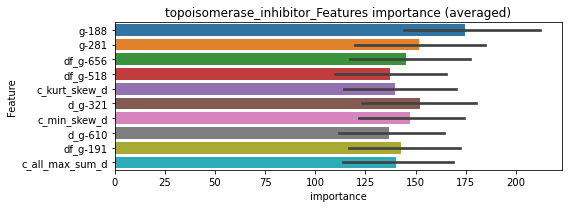

len(train_index) : 2693
len(valid_index) : 898
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0483083	valid_1's binary_logloss: 0.0935269
[2000]	training's binary_logloss: 0.0248791	valid_1's binary_logloss: 0.0743081
Early stopping, best iteration is:
[2944]	training's binary_logloss: 0.0172932	valid_1's binary_logloss: 0.0686704


len(train_index) : 2693
len(valid_index) : 898
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0515229	valid_1's binary_logloss: 0.0650796
[2000]	training's binary_logloss: 0.0273487	valid_1's binary_logloss: 0.0398874
[3000]	training's binary_logloss: 0.0187	valid_1's binary_logloss: 0.0311277
[4000]	training's binary_logloss: 0.0140892	valid_1's binary_logloss: 0.0265087
[5000]	training's binary_logloss: 0.0113005	valid_1's binary_logloss: 0.0237942
[6000]	training's binary_logloss: 0.00945795	valid_1's binary_logloss: 0.0218487
[7000]	training's binary_logloss: 0.00813161	valid_1's binary_logloss: 0.0205049
[8000]	training's binary_logloss: 0.00713899	valid_1's binary_logloss: 0.0194702
[9000]	training's binary_logloss: 0.00635407	valid_1's binary_logloss: 0.0186323
[10000]	training's binary_logloss: 0.00572779	valid_1's binary_logloss: 0.0180334
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00572779	valid_1's binary_logloss: 0.0180334


len(train_index) : 2693
len(valid_index) : 898
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0522871	valid_1's binary_logloss: 0.065123
[2000]	training's binary_logloss: 0.0275943	valid_1's binary_logloss: 0.0395741
[3000]	training's binary_logloss: 0.0188483	valid_1's binary_logloss: 0.0308595
[4000]	training's binary_logloss: 0.014175	valid_1's binary_logloss: 0.0262324
[5000]	training's binary_logloss: 0.0113743	valid_1's binary_logloss: 0.023595
[6000]	training's binary_logloss: 0.0095238	valid_1's binary_logloss: 0.0218013
[7000]	training's binary_logloss: 0.00819348	valid_1's binary_logloss: 0.0205454
[8000]	training's binary_logloss: 0.00720135	valid_1's binary_logloss: 0.0195569
[9000]	training's binary_logloss: 0.00642247	valid_1's binary_logloss: 0.0187772
[10000]	training's binary_logloss: 0.00579535	valid_1's binary_logloss: 0.0181742
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00579535	valid_1's binary_logloss: 0.0181742


len(train_index) : 2694
len(valid_index) : 897
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0521828	valid_1's binary_logloss: 0.0631432
[2000]	training's binary_logloss: 0.0276263	valid_1's binary_logloss: 0.0380212
[3000]	training's binary_logloss: 0.0188497	valid_1's binary_logloss: 0.0295053
[4000]	training's binary_logloss: 0.0142293	valid_1's binary_logloss: 0.0249668
[5000]	training's binary_logloss: 0.0114098	valid_1's binary_logloss: 0.0221993
[6000]	training's binary_logloss: 0.00954724	valid_1's binary_logloss: 0.0203538
[7000]	training's binary_logloss: 0.00822095	valid_1's binary_logloss: 0.0189487
[8000]	training's binary_logloss: 0.00723874	valid_1's binary_logloss: 0.0179459
[9000]	training's binary_logloss: 0.00644556	valid_1's binary_logloss: 0.0171217
[10000]	training's binary_logloss: 0.00581177	valid_1's binary_logloss: 0.0164147
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00581177	valid_1's binary_logloss: 0.0164147


topoisomerase_inhibitor logloss: 0.030327072745940042
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000310852	valid_1's binary_logloss: 0.000695179
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000305043	valid_1's binary_logloss: 0.00218979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000311142	valid_1's binary_logloss: 0.00184727
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015714, Threshold: 0.0145277, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000308445	valid_1's binary_logloss: 0.00151548


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0145277, conf_0:0.01017, conf_1:0.01889
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0445277
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0745277
threshold: 0.0745277, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.0745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, Expected: 3.0, Threshold: 0.0745277, conf_0:0.05962, conf_1:0.08943
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.1045277
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1345277
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.1645277
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1945277
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.2245277
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.2545277
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.2845277
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3145277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_9: 0.3445277
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.3745277
threshold: 0.3745277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.3745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.3745277, conf_0:0.33707, conf_1:0.41198
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4045277
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4345277
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.4645277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.4945277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.5245277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5545277
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5845277
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6145277
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6445277
threshold: 0.6445277, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


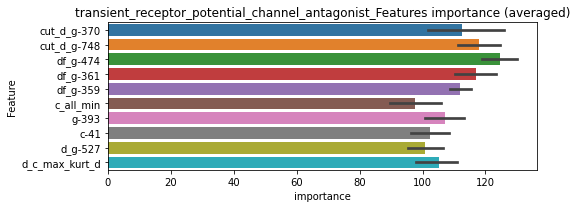

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000324373	valid_1's binary_logloss: 0.000715082
Early stopping, best iteration is:
[1289]	training's binary_logloss: 0.000301703	valid_1's binary_logloss: 0.000675723


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000320645	valid_1's binary_logloss: 0.00215588
Early stopping, best iteration is:
[1170]	training's binary_logloss: 0.000302872	valid_1's binary_logloss: 0.00211204


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000325961	valid_1's binary_logloss: 0.00182985
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000314012	valid_1's binary_logloss: 0.00180283


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000323483	valid_1's binary_logloss: 0.00140477
Early stopping, best iteration is:
[1245]	training's binary_logloss: 0.000301833	valid_1's binary_logloss: 0.0013584


transient_receptor_potential_channel_antagonist logloss: 0.0014873531669323417
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000158342	valid_1's binary_logloss: 0.000345099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000153771	valid_1's binary_logloss: 0.000445348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000154988	valid_1's binary_logloss: 0.000180942
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004272, Threshold: 0.0011997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011997, conf_0:0.00084, conf_1:0.00156
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311997
threshold: 0.0311997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000155404	valid_1's binary_logloss: 0.000211069


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0311997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0311997, conf_0:0.02496, conf_1:0.03744
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0611997
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0611997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0611997, conf_0:0.05508, conf_1:0.06732
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


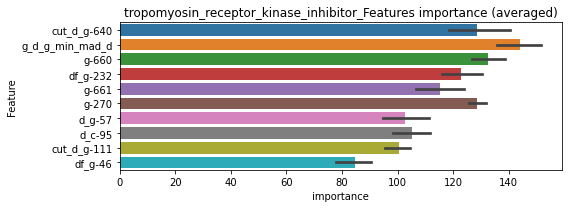

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167411	valid_1's binary_logloss: 0.000257289
Early stopping, best iteration is:
[1381]	training's binary_logloss: 0.000149275	valid_1's binary_logloss: 0.000232602


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000166845	valid_1's binary_logloss: 0.000471343
Early stopping, best iteration is:
[1484]	training's binary_logloss: 0.000147928	valid_1's binary_logloss: 0.000434906


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000167868	valid_1's binary_logloss: 0.00020174
Early stopping, best iteration is:
[1439]	training's binary_logloss: 0.000150116	valid_1's binary_logloss: 0.000181112


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00016776	valid_1's binary_logloss: 0.000197949
Early stopping, best iteration is:
[1434]	training's binary_logloss: 0.000148754	valid_1's binary_logloss: 0.000176013


tropomyosin_receptor_kinase_inhibitor logloss: 0.0002561522021687229
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000366067	valid_1's binary_logloss: 0.00126781
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00035611	valid_1's binary_logloss: 0.00275712
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000369646	valid_1's binary_logloss: 0.00192
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020056, Threshold: 0.0075674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000368987	valid_1's binary_logloss: 0.000955798


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0075674, conf_0:0.00530, conf_1:0.00984
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0375674
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0675674
threshold: 0.0675674, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.0675674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, Expected: 4.2, Threshold: 0.0675674, conf_0:0.05405, conf_1:0.08108
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0975674
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.1275674
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.1275674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.1275674, conf_0:0.11481, conf_1:0.14032
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


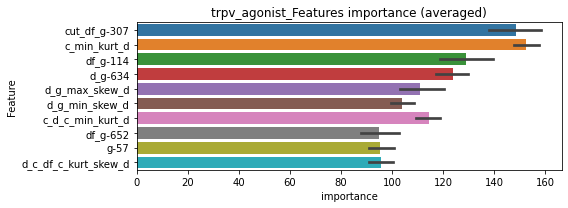

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000396647	valid_1's binary_logloss: 0.00126827
Early stopping, best iteration is:
[1237]	training's binary_logloss: 0.00036384	valid_1's binary_logloss: 0.00119685


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00039235	valid_1's binary_logloss: 0.00199307
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000371522	valid_1's binary_logloss: 0.00194533


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000395251	valid_1's binary_logloss: 0.00103472
Early stopping, best iteration is:
[1367]	training's binary_logloss: 0.000357695	valid_1's binary_logloss: 0.000966351


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00039563	valid_1's binary_logloss: 0.000869455
Early stopping, best iteration is:
[1355]	training's binary_logloss: 0.00035797	valid_1's binary_logloss: 0.000799488


trpv_agonist logloss: 0.001227252872101974
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000631799	valid_1's binary_logloss: 0.0246699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000493433	valid_1's binary_logloss: 0.00767099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000480227	valid_1's binary_logloss: 0.00258733
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0040533, Threshold: 0.0168847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0168847, conf_0:0.01182, conf_1:0.02195
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_1: 0.0468847


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00111902	valid_1's binary_logloss: 0.0242701


threshold: 0.0468847, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000486863	valid_1's binary_logloss: 0.0105661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00070393	valid_1's binary_logloss: 0.0101211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.0004827	valid_1's binary_logloss: 0.0101404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000473046	valid_1's binary_logloss: 0.0144977


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0142948, Threshold: 0.0468847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00202
Num_p_label: 27.0, Expected: 8.0, Threshold: 0.0468847, conf_0:0.03751, conf_1:0.05626
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0768847
threshold: 0.0768847, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000484371	valid_1's binary_logloss: 0.0103192
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00055499	valid_1's binary_logloss: 0.017466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000493243	valid_1's binary_logloss: 0.00851379
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00048026	valid_1's binary_logloss: 0.00280906


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0160416, Threshold: 0.0768847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0768847, conf_0:0.06920, conf_1:0.08457
threshold: 0.0768847, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


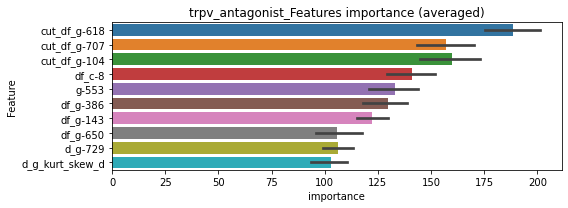

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000560125	valid_1's binary_logloss: 0.0100417
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.00051943	valid_1's binary_logloss: 0.00991929


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000740292	valid_1's binary_logloss: 0.0168703


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000610084	valid_1's binary_logloss: 0.00782173


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000561833	valid_1's binary_logloss: 0.00422484
Early stopping, best iteration is:
[1275]	training's binary_logloss: 0.000484954	valid_1's binary_logloss: 0.00394701


trpv_antagonist logloss: 0.00963983205326871


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0868018	valid_1's binary_logloss: 0.149816
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.0512195	valid_1's binary_logloss: 0.140952
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0888456	valid_1's binary_logloss: 0.142428
Early stopping, best iteration is:
[1917]	training's binary_logloss: 0.0515567	valid_1's binary_logloss: 0.13225
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0859852	valid_1's binary_logloss: 0.153355
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.0520653	valid_1's binary_logloss: 0.144868
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0858923	valid_1's binary_logloss: 0.154885
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.0586132	valid_1's binary_log

1 / 3, AUC score:0.955, PR-AUC:0.915
y_Threshold: 0.0725413, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 662 → Positive_corect_labels: 1236/7884
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.07806, conf_1:0.14497
threshold: 0.1115123, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1236.0/7884, y_label_rate: 0.1567732
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0488258	valid_1's binary_logloss: 0.0876608
[2000]	training's binary_logloss: 0.0260303	valid_1's binary_logloss: 0.0771985
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0248563	valid_1's binary_logloss: 0.0766256
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0488765	valid_1's binary_logloss: 0.08128
[2000]	training's binary_logloss: 0.0259854	valid_1's binary_logloss: 0.0708709
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.0202122	valid_1's binary_logloss: 0.0685772
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0503057	valid_1's binary_logloss: 0.0757067
[2000]	training's binary_logloss: 0.0268658	valid_1's binary_logloss: 0.0636642
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.022759	valid_1's binary_logloss: 0.061

2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0558548, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 130 → Positive_corect_labels: 1171.0/7754
p_label_rate: 0.0025113 Vs.target_rate: 0.01327
Num_p_label: 10.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.08921, conf_1:0.13381
threshold: 0.1115123, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 1171.0/7754, y_label_rate: 0.1510188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357234	valid_1's binary_logloss: 0.0563212
[2000]	training's binary_logloss: 0.0189566	valid_1's binary_logloss: 0.0431369
[3000]	training's binary_logloss: 0.0124403	valid_1's binary_logloss: 0.0386213
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.00921836	valid_1's binary_logloss: 0.0366897
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0353964	valid_1's binary_logloss: 0.0559351
[2000]	training's binary_logloss: 0.0186389	valid_1's binary_logloss: 0.044144
[3000]	training's binary_logloss: 0.0122454	valid_1's binary_logloss: 0.0399004
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0122066	valid_1's binary_logloss: 0.0398889
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0349644	valid_1's binary_logloss: 0.0576214
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0340315, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1149.0/7710
p_label_rate: 0.0000000 Vs.target_rate: 0.01327
Num_p_label: 0.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.10036, conf_1:0.12266
threshold: 0.1115123, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1149.0/7710, y_label_rate: 0.1490272


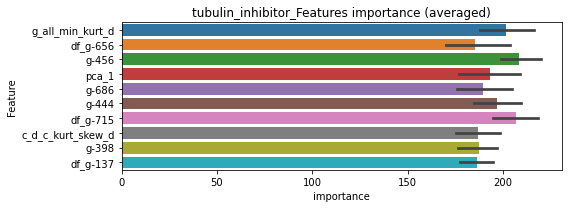

len(train_index) : 5782
len(valid_index) : 1928
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0422954	valid_1's binary_logloss: 0.0508631
[2000]	training's binary_logloss: 0.0230933	valid_1's binary_logloss: 0.0329144
[3000]	training's binary_logloss: 0.0157681	valid_1's binary_logloss: 0.0272287
[4000]	training's binary_logloss: 0.0118209	valid_1's binary_logloss: 0.0242984
[5000]	training's binary_logloss: 0.00942257	valid_1's binary_logloss: 0.0225882
[6000]	training's binary_logloss: 0.00782664	valid_1's binary_logloss: 0.0214713
Early stopping, best iteration is:
[6814]	training's binary_logloss: 0.00686573	valid_1's binary_logloss: 0.0207803


len(train_index) : 5782
len(valid_index) : 1928
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0403969	valid_1's binary_logloss: 0.0596926
[2000]	training's binary_logloss: 0.0216658	valid_1's binary_logloss: 0.0425479
[3000]	training's binary_logloss: 0.0146946	valid_1's binary_logloss: 0.0371374
[4000]	training's binary_logloss: 0.0109621	valid_1's binary_logloss: 0.0344847
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.0102468	valid_1's binary_logloss: 0.0340315


len(train_index) : 5783
len(valid_index) : 1927
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0419223	valid_1's binary_logloss: 0.053154
[2000]	training's binary_logloss: 0.0228883	valid_1's binary_logloss: 0.0355438
[3000]	training's binary_logloss: 0.0155817	valid_1's binary_logloss: 0.029584
[4000]	training's binary_logloss: 0.0116404	valid_1's binary_logloss: 0.0265875
[5000]	training's binary_logloss: 0.00927877	valid_1's binary_logloss: 0.0247754
[6000]	training's binary_logloss: 0.00771085	valid_1's binary_logloss: 0.0235915
[7000]	training's binary_logloss: 0.00658907	valid_1's binary_logloss: 0.022745
Early stopping, best iteration is:
[7250]	training's binary_logloss: 0.00634586	valid_1's binary_logloss: 0.0225367


len(train_index) : 5783
len(valid_index) : 1927
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0406258	valid_1's binary_logloss: 0.0585034
[2000]	training's binary_logloss: 0.0217776	valid_1's binary_logloss: 0.0405663
[3000]	training's binary_logloss: 0.0147634	valid_1's binary_logloss: 0.0348591
[4000]	training's binary_logloss: 0.011035	valid_1's binary_logloss: 0.0320065
[5000]	training's binary_logloss: 0.00881408	valid_1's binary_logloss: 0.030374
Early stopping, best iteration is:
[5360]	training's binary_logloss: 0.00821317	valid_1's binary_logloss: 0.0299098


tubulin_inhibitor logloss: 0.02681470965421186
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000730203	valid_1's binary_logloss: 0.0374405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0016925	valid_1's binary_logloss: 0.0351582
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000811516	valid_1's binary_logloss: 0.0204015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00097803	valid_1's binary_logloss: 0.0338618


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0066807, Threshold: 0.0654613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0654613, conf_0:0.04582, conf_1:0.08510
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.0954613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1254613
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1554613
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1854613
threshold: 0.1854613, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000665136	valid_1's binary_logloss: 0.023556
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000699046	valid_1's binary_logloss: 0.0223813
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000813546	valid_1's binary_logloss: 0.0194321
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000795993	valid_1's binary_logloss: 0.036984


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0213968, Threshold: 0.1854613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.1854613, conf_0:0.14837, conf_1:0.22255
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.2154613
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.2454613
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_3: 0.2754613
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_4: 0.3054613
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.3354613
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_6: 0.3654613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_7: 0.3954613
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4254613
threshold: 0.4254613, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000587186	valid_1's binary_logloss: 0.021493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000728794	valid_1's binary_logloss: 0.0295397
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000658302	valid_1's binary_logloss: 0.0239731
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000652235	valid_1's binary_logloss: 0.0202716


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0256288, Threshold: 0.4254613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.4254613, conf_0:0.38292, conf_1:0.46801
threshold: 0.4254613, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


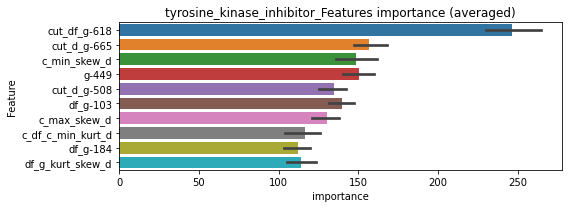

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000726323	valid_1's binary_logloss: 0.0135598
Early stopping, best iteration is:
[1129]	training's binary_logloss: 0.000664607	valid_1's binary_logloss: 0.0132406


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00108655	valid_1's binary_logloss: 0.0251438


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00107671	valid_1's binary_logloss: 0.0314777


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00217547	valid_1's binary_logloss: 0.0238689


tyrosine_kinase_inhibitor logloss: 0.02343262016612667
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000239278	valid_1's binary_logloss: 0.00255787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238503	valid_1's binary_logloss: 0.00068939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.0002388	valid_1's binary_logloss: 0.000321361
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008597, Threshold: 0.0023451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023451, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323451
threshold: 0.0323451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000236753	valid_1's binary_logloss: 0.00223279


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0323451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0323451, conf_0:0.02588, conf_1:0.03881
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623451
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0623451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623451, conf_0:0.05611, conf_1:0.06858
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


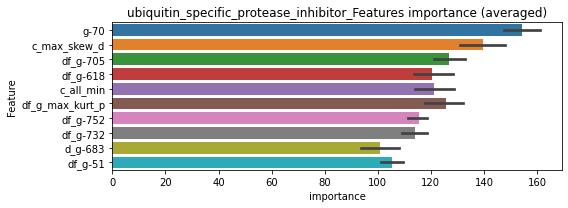

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000253001	valid_1's binary_logloss: 0.00241799
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000246457	valid_1's binary_logloss: 0.00240521


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000253755	valid_1's binary_logloss: 0.000461143
Early stopping, best iteration is:
[1444]	training's binary_logloss: 0.000233091	valid_1's binary_logloss: 0.000431291


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000257158	valid_1's binary_logloss: 0.000320474
Early stopping, best iteration is:
[1373]	training's binary_logloss: 0.000235942	valid_1's binary_logloss: 0.000294521


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000253937	valid_1's binary_logloss: 0.00157553
Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000238992	valid_1's binary_logloss: 0.00154785


ubiquitin_specific_protease_inhibitor logloss: 0.0011699454642718696


mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0747628	valid_1's binary_logloss: 0.129832
[2000]	training's binary_logloss: 0.0414251	valid_1's binary_logloss: 0.119601
Early stopping, best iteration is:
[2234]	training's binary_logloss: 0.0371693	valid_1's binary_logloss: 0.118383
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0724358	valid_1's binary_logloss: 0.140351
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.0486501	valid_1's binary_logloss: 0.132386
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.074934	valid_1's binary_logloss: 0.130781
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.055484	valid_1's binary_logloss: 0.123006
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0784051	valid_1's binary_logloss: 0.113463
[2000]	training's bin

1 / 3, AUC score:0.973, PR-AUC:0.947
y_Threshold: 0.0607710, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 350 → Positive_corect_labels: 844/5209
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.05925, conf_1:0.11004
threshold: 0.0846436, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 844.0/5209, y_label_rate: 0.1620273
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0518181	valid_1's binary_logloss: 0.0776072
[2000]	training's binary_logloss: 0.0282421	valid_1's binary_logloss: 0.0634684
[3000]	training's binary_logloss: 0.0187137	valid_1's binary_logloss: 0.0581859
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.0171159	valid_1's binary_logloss: 0.0574164
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0489833	valid_1's binary_logloss: 0.0942825
Early stopping, best iteration is:
[1839]	training's binary_logloss: 0.0287551	valid_1's binary_logloss: 0.0826312
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519069	valid_1's binary_logloss: 0.0755748
[2000]	training's binary_logloss: 0.0280836	valid_1's binary_logloss: 0.0626437
[3000]	training's binary_logloss: 0.0185574	valid_1's binary_logloss: 0.0578133
Early stopping, best iterat

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0548632, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 809.0/5139
p_label_rate: 0.0045203 Vs.target_rate: 0.00714
Num_p_label: 18.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.06771, conf_1:0.10157
threshold: 0.0846436, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 809.0/5139, y_label_rate: 0.1574236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0402795	valid_1's binary_logloss: 0.0603203
[2000]	training's binary_logloss: 0.0216134	valid_1's binary_logloss: 0.0463676
[3000]	training's binary_logloss: 0.0143857	valid_1's binary_logloss: 0.0414392
[4000]	training's binary_logloss: 0.0106795	valid_1's binary_logloss: 0.0393083
Early stopping, best iteration is:
[3971]	training's binary_logloss: 0.0107524	valid_1's binary_logloss: 0.0392293
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0380048	valid_1's binary_logloss: 0.0729831
[2000]	training's binary_logloss: 0.0205285	valid_1's binary_logloss: 0.0614413
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0195089	valid_1's binary_logloss: 0.0607601
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404576	valid_1's binary_logloss: 0.0630069
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0406991, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 791.0/5103
p_label_rate: 0.0060271 Vs.target_rate: 0.00714
Num_p_label: 24.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.07618, conf_1:0.09311
threshold: 0.0846436, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 791.0/5103, y_label_rate: 0.1550069


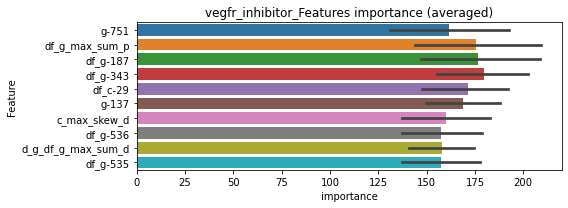

len(train_index) : 3827
len(valid_index) : 1276
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0475365	valid_1's binary_logloss: 0.0524817
[2000]	training's binary_logloss: 0.0266441	valid_1's binary_logloss: 0.0338593
[3000]	training's binary_logloss: 0.018378	valid_1's binary_logloss: 0.0274498
[4000]	training's binary_logloss: 0.0138334	valid_1's binary_logloss: 0.023895
[5000]	training's binary_logloss: 0.0110593	valid_1's binary_logloss: 0.0218029
[6000]	training's binary_logloss: 0.00918518	valid_1's binary_logloss: 0.0202269
[7000]	training's binary_logloss: 0.00784828	valid_1's binary_logloss: 0.0191366
[8000]	training's binary_logloss: 0.00686132	valid_1's binary_logloss: 0.0182922
[9000]	training's binary_logloss: 0.00609335	valid_1's binary_logloss: 0.01763
Early stopping, best iteration is:
[9305]	training's binary_logloss: 0.00588939	valid_1's binary_logloss: 0.0174387


len(train_index) : 3827
len(valid_index) : 1276
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0454455	valid_1's binary_logloss: 0.0598499
[2000]	training's binary_logloss: 0.0252437	valid_1's binary_logloss: 0.0422781
[3000]	training's binary_logloss: 0.0174068	valid_1's binary_logloss: 0.0363176
[4000]	training's binary_logloss: 0.0131304	valid_1's binary_logloss: 0.0332574
[5000]	training's binary_logloss: 0.010497	valid_1's binary_logloss: 0.031569
[6000]	training's binary_logloss: 0.00872952	valid_1's binary_logloss: 0.0302261
Early stopping, best iteration is:
[6924]	training's binary_logloss: 0.00755131	valid_1's binary_logloss: 0.029359


len(train_index) : 3827
len(valid_index) : 1276
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0440623	valid_1's binary_logloss: 0.0692883
[2000]	training's binary_logloss: 0.0244892	valid_1's binary_logloss: 0.0526891
[3000]	training's binary_logloss: 0.0167905	valid_1's binary_logloss: 0.0470361
Early stopping, best iteration is:
[3542]	training's binary_logloss: 0.0142697	valid_1's binary_logloss: 0.0451707


len(train_index) : 3828
len(valid_index) : 1275
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0444225	valid_1's binary_logloss: 0.0653936
[2000]	training's binary_logloss: 0.024499	valid_1's binary_logloss: 0.0480278
[3000]	training's binary_logloss: 0.0168911	valid_1's binary_logloss: 0.0421817
[4000]	training's binary_logloss: 0.0127222	valid_1's binary_logloss: 0.0391769
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.0118806	valid_1's binary_logloss: 0.0386166


vegfr_inhibitor logloss: 0.03264508142072736
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000370475	valid_1's binary_logloss: 0.00235469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000361799	valid_1's binary_logloss: 0.00259905
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00162773
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023522, Threshold: 0.0083625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083625, conf_0:0.00585, conf_1:0.01087
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383625


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000393633	valid_1's binary_logloss: 0.00655536


threshold: 0.0383625, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0383625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0383625, conf_0:0.03069, conf_1:0.04603
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683625
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983625


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0983625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983625, conf_0:0.08853, conf_1:0.10820


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


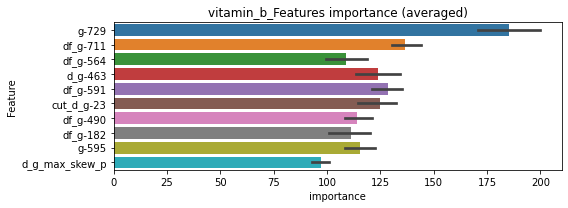

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000378012	valid_1's binary_logloss: 0.00164239
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000359633	valid_1's binary_logloss: 0.00159499


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00038066	valid_1's binary_logloss: 0.0016463
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000357346	valid_1's binary_logloss: 0.00160424


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000382809	valid_1's binary_logloss: 0.00136145
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000364812	valid_1's binary_logloss: 0.00131936


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000383702	valid_1's binary_logloss: 0.00486669
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000365294	valid_1's binary_logloss: 0.00480932


vitamin_b logloss: 0.002331535667396918
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000475473	valid_1's binary_logloss: 0.00762279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00044715	valid_1's binary_logloss: 0.00681044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00044981	valid_1's binary_logloss: 0.00471942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000455607	valid_1's binary_logloss: 0.00636758


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030247, Threshold: 0.0141003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0141003, conf_0:0.00987, conf_1:0.01833
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.0441003
threshold: 0.0441003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000465072	valid_1's binary_logloss: 0.0080092
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00705609
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000450427	valid_1's binary_logloss: 0.00519398
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000433087	valid_1's binary_logloss: 0.00737403


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202189, Threshold: 0.0441003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, Expected: 6.5, Threshold: 0.0441003, conf_0:0.03528, conf_1:0.05292
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0741003
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_2: 0.1041003
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000434307	valid_1's binary_logloss: 0.0113504
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000428897	valid_1's binary_logloss: 0.00525585
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000440312	valid_1's binary_logloss: 0.00122139
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0249868, Threshold: 0.1041003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000469261	valid_1's binary_logloss: 0.00799921


p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.1041003, conf_0:0.09369, conf_1:0.11451
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


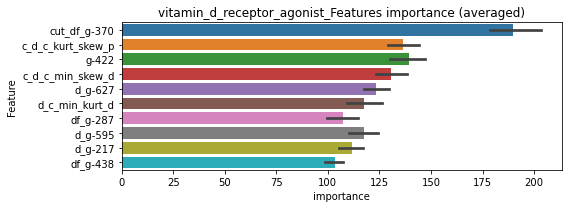

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000545159	valid_1's binary_logloss: 0.0120028


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000503109	valid_1's binary_logloss: 0.00461353
Early stopping, best iteration is:
[1225]	training's binary_logloss: 0.000447213	valid_1's binary_logloss: 0.00443426


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000509471	valid_1's binary_logloss: 0.00134689
Early stopping, best iteration is:
[1279]	training's binary_logloss: 0.0004506	valid_1's binary_logloss: 0.00122189


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000499948	valid_1's binary_logloss: 0.00788244
Early stopping, best iteration is:
[1209]	training's binary_logloss: 0.000447596	valid_1's binary_logloss: 0.0076542


vitamin_d_receptor_agonist logloss: 0.006329766977387802
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000370373	valid_1's binary_logloss: 0.0022413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385505	valid_1's binary_logloss: 0.00418155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000379693	valid_1's binary_logloss: 0.00206049
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025372, Threshold: 0.0112124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000365238	valid_1's binary_logloss: 0.00501873


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112124, conf_0:0.00785, conf_1:0.01458
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0412124
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0712124
threshold: 0.0712124, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.0712124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0712124, conf_0:0.05697, conf_1:0.08545
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.1012124
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1312124
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1612124
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.1612124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1612124, conf_0:0.14509, conf_1:0.17733
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


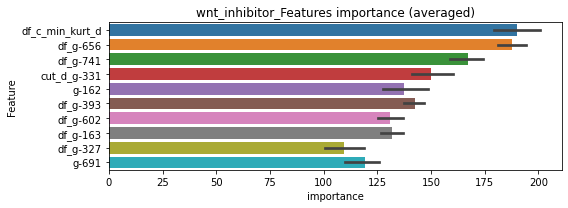

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000419162	valid_1's binary_logloss: 0.00175931
Early stopping, best iteration is:
[1382]	training's binary_logloss: 0.000363334	valid_1's binary_logloss: 0.00164796


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000421997	valid_1's binary_logloss: 0.00298667
Early stopping, best iteration is:
[1251]	training's binary_logloss: 0.000377408	valid_1's binary_logloss: 0.00287723


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000427289	valid_1's binary_logloss: 0.00309219
Early stopping, best iteration is:
[1272]	training's binary_logloss: 0.000381166	valid_1's binary_logloss: 0.00298811


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000419936	valid_1's binary_logloss: 0.0032099
Early stopping, best iteration is:
[1389]	training's binary_logloss: 0.000361672	valid_1's binary_logloss: 0.00303747


wnt_inhibitor logloss: 0.002638141684216493


CV:0.012562162117648474


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

[('adenosine_receptor_antagonist', 0.05251741800027811),
 ('atpase_inhibitor', 0.040764187750331464),
 ('aurora_kinase_inhibitor', 0.05767091692382249),
 ('bacterial_dna_gyrase_inhibitor', 0.03884798461466691),
 ('bacterial_dna_inhibitor', 0.0976389873802852),
 ('cdk_inhibitor', 0.038325063724818635),
 ('cyclooxygenase_inhibitor', 0.08417713917198273),
 ('dopamine_receptor_agonist', 0.05200518673505776),
 ('hdac_inhibitor', 0.05383718983824337),
 ('immunosuppressant', 0.040881339006336836),
 ('kit_inhibitor', 0.030086660566580662),
 ('monoamine_oxidase_inhibitor', 0.03376784689767527),
 ('mtor_inhibitor', 0.05569854216927875),
 ('nfkb_inhibitor', 0.0831085857466776),
 ('pdgfr_inhibitor', 0.032492325505410334),
 ('pi3k_inhibitor', 0.03659724278615769),
 ('potassium_channel_antagonist', 0.03571140106199704),
 ('ppar_receptor_agonist', 0.03389285062751825),
 ('proteasome_inhibitor', 0.042362922290715845),
 ('protein_synthesis_inhibitor', 0.03653844200505049),
 ('raf_inhibitor', 0.04074745